# MSDS 498 Capstone

In [1]:
# If you never installed TextBlob before you need to run this cell
!pip install TextBlob
!pip install docx2txt
!pip install python-docx
!pip install plotnine
!pip install pyLDAvis
!pip install spacy
#!pip install pyLDAvis.gensim_models
!python -m spacy download en_core_web_sm
!pip install tabulate
!pip install dataframe_image

2023-05-25 06:34:49.021819: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-05-25 06:34:49.022161: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-05-25 06:34:57.917664: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2023-05-25 06:34:57.917700: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-25 06:34:57.922273: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: DESKTOP-G5B225B
2023-05-25 06:34:57.922368: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: DESKTOP-G5B225B


[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


# 1. Importing Necessary Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import collections
import torch 
import docx2txt
import docx
import string
from string import digits
from numpy import mean   
import unicodedata

import nltk
from nltk.corpus import stopwords
from nltk import bigrams
from textblob import TextBlob
from torch import nn
from torch import optim

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from torch.utils.data import DataLoader, Dataset

from docx import Document
import re
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg

from tqdm import tqdm
from collections import Counter
import ast
import scipy.stats as stats



from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()
from sklearn.feature_extraction.text import TfidfTransformer
import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
#import spacy

import pickle
import re
import pyLDAvis
from pyLDAvis import gensim_models

import pyLDAvis.sklearn
from nltk.stem.snowball import SnowballStemmer

from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import FreqDist
from nltk import classify
from nltk import NaiveBayesClassifier
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer as si
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re, string
from transformers import pipeline, AutoModelForTokenClassification, AutoTokenizer

import spacy
%matplotlib inline

from tabulate import tabulate
import dataframe_image as dfi

Loading BokehJS ...

C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\tensorflow\core\framework\tensor_shape_pb2.py:18: DeprecationWarning: Call to deprecated create function FileDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\tensorflow\core\framework\tensor_shape_pb2.py:36: DeprecationWarning: Call to deprecated create function FieldDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\tensorflow\core\framework\tensor_shape_pb2.py:43: DeprecationWarning: Call to deprecated create function FieldDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\tensorflow

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\PAIN IN MY
[nltk_data]     ASS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# 2. Loading Documents

In [165]:
data = pd.read_excel('TASS_FULL.xlsx')

In [166]:
data

Unnamed: 0                                              title  \
0              0  Kherson Region head denies reports about withd...   
1              1  Zelensky’s trip to Kherson Region another imit...   
2              2  Over 70 munitions fired by Kiev troops towards...   
3              3  Kiev troops fire three HIMARS rockets towards ...   
4              4  Medvedev says inappropriate to talk about time...   
...          ...                                                ...   
7826        7826          Blasts heard in Kiev, Mariupol — agencies   
7827        7827  Ukrainian president declares martial law acros...   
7828        7828  Direct attack against Russia to result in over...   
7829        7829           Putin urges Ukrainian military to disarm   
7830        7830  Decision taken on denazification, demilitariza...   

                                      link          uploadtime  \
0     https://tass.com/emergencies/1593733       23 MAR, 15:13   
1           https://tass.com/world/1593745       23 MAR, 15:23   
2     https://tass.com/emergencies/1593787       23 MAR, 19:04   
3     https://tass.com/emergencies/1593807       23 MAR, 23:11   
4        https://tass.com/politics/1593819       24 MAR, 00:12   
...                                    ...                 ...   
7826     https://tass.com/politics/1409293  23 FEB 2022, 23:23   
7827        https://tass.com/world/1409273  23 FEB 2022, 23:00   
7828     https://tass.com/politics/1409247  23 FEB 2022, 22:30   
7829     https://tass.com/politics/1409229  23 FEB 2022, 22:20   
7830     https://tass.com/politics/1409189  23 FEB 2022, 22:12   

                                                content  
0     GENICHESK, March 23. /TASS/. Russian military ...  
1     GENICHESK, March 23. /TASS/. Reports about Ukr...  
2     DONETSK, March 24. /TASS/. The Ukrainian armed...  
3     DONETSK, March 24. /TASS/. The Ukrainian milit...  
4     MOSCOW, March 24. /TASS/. Deputy Chairman of t...  
...                                                 ...  
7826  LONDON, February 24. /TASS/. Sounds similar to...  
7827  The Ukrainian authorities are declaring martia...  
7828  MOSCOW, February 24. /TASS/. Russia remains on...  
7829  © Russian Presidential Press and Information O...  
7830                         © Mikhail Metzel/POOL/TASS  

[7831 rows x 5 columns]

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7831 entries, 0 to 7830
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7831 non-null   int64 
 1   title       7831 non-null   object
 2   link        7831 non-null   object
 3   uploadtime  7831 non-null   object
 4   content     7830 non-null   object
dtypes: int64(1), object(4)
memory usage: 306.0+ KB


# 3. PreProcessing Data

### 3.1 Processing Our Content and Title Column

In [168]:
stop_words = stopwords.words('english')

In [169]:
#First let's remove all punctuation from our dataset.
data1 = data
data1['content']=data1['content'].astype(str)
data1['content']=data1['content'].str.replace(r'[^\w\s]','')

data1['title']=data1['title'].astype(str)
data1['title']=data1['title'].str.replace(r'[^\w\s]','')

C:\Users\PAIN IN MY ASS\AppData\Local\Temp\ipykernel_32836\386572278.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
C:\Users\PAIN IN MY ASS\AppData\Local\Temp\ipykernel_32836\386572278.py:7: FutureWarning: The default value of regex will change from True to False in a future version.


In [170]:
#Next let's remove all stopwords from our dataset.
data1['content']=data1['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
data1['content']=data1['content'].str.lower()   

data1['title']=data1['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
data1['title']=data1['title'].str.lower()    

In [171]:
#Next we shall trim off the header of each article to just get the text of the article itself
data1['content']=data1['content'].apply(lambda x: ' '.join(x.split(' ')[4:]))

In [172]:
#Next we are going to change all references of Ukrainian to Ukraine, Russian to Russia, and remove said from the corpus
data1['content']=data1['content'].replace({'ukrainian':'ukraine','russian':'russia','said':''}, regex =True)

In [173]:
data1

Unnamed: 0                                              title  \
0              0  kherson region head denies reports withdrawal ...   
1              1  zelenskys trip kherson region another imitatio...   
2              2  over 70 munitions fired kiev troops towards dp...   
3              3  kiev troops fire three himars rockets towards ...   
4              4  medvedev says inappropriate talk timeframes sp...   
...          ...                                                ...   
7826        7826                blasts heard kiev mariupol agencies   
7827        7827  ukrainian president declares martial law acros...   
7828        7828  direct attack russia result overthrow potentia...   
7829        7829              putin urges ukrainian military disarm   
7830        7830  decision taken denazification demilitarization...   

                                      link          uploadtime  \
0     https://tass.com/emergencies/1593733       23 MAR, 15:13   
1           https://tass.com/world/1593745       23 MAR, 15:23   
2     https://tass.com/emergencies/1593787       23 MAR, 19:04   
3     https://tass.com/emergencies/1593807       23 MAR, 23:11   
4        https://tass.com/politics/1593819       24 MAR, 00:12   
...                                    ...                 ...   
7826     https://tass.com/politics/1409293  23 FEB 2022, 23:23   
7827        https://tass.com/world/1409273  23 FEB 2022, 23:00   
7828     https://tass.com/politics/1409247  23 FEB 2022, 22:30   
7829     https://tass.com/politics/1409229  23 FEB 2022, 22:20   
7830     https://tass.com/politics/1409189  23 FEB 2022, 22:12   

                                                content  
0     russia military forces remain novaya kakhovka ...  
1     reports ukraine president vladimir zelenskys v...  
2     the ukraine armed forces fired total 74 muniti...  
3     the ukraine military fired three rockets usmad...  
4     deputy chairman russia security council dmitry...  
...                                                 ...  
7826  sounds similar artillery fire heard ukraine ca...  
7827  martial law across country president vladimir ...  
7828  russia remains one strongest nuclear powers pl...  
7829                                         officetass  
7830                                                     

[7831 rows x 5 columns]

### 3.1.1 Stemming Processing

In [174]:
stemmer=SnowballStemmer('english')
data1['content_unstemmed']=data1['content'].str.split()

In [175]:
data1['content_stemmed']=data1['content_unstemmed'].apply(lambda x: [stemmer.stem(y) for y in x])
data1['content_stemmed']

0       [russia, militari, forc, remain, novaya, kakho...
1       [report, ukrain, presid, vladimir, zelenski, v...
2       [the, ukrain, arm, forc, fire, total, 74, muni...
3       [the, ukrain, militari, fire, three, rocket, u...
4       [deputi, chairman, russia, secur, council, dmi...
                              ...                        
7826    [sound, similar, artilleri, fire, heard, ukrai...
7827    [martial, law, across, countri, presid, vladim...
7828    [russia, remain, one, strongest, nuclear, powe...
7829                                         [officetass]
7830                                                   []
Name: content_stemmed, Length: 7831, dtype: object

### 3.2 Processing our upload column to datetime

In [176]:
#Time to convert all upload times to datetime 
def search_words(text):
    result = re.findall(r'\b[^\d\W]+\b', text)
    return " ".join(result)
i=0
months=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
data1['Day']=data1['uploadtime'].str[:2]
#data1['Month']=data1['uploadtime'].str[3:6]
data1['Month']=data1['uploadtime'].apply(lambda x : search_words(x))
data1['Year']=np.where(data1['uploadtime'].str.len()>14,'2022','2023')
data1['Hour']=data1['uploadtime'].str[-5:-3]
data1['Minute']=data1['uploadtime'].str[-2:]

In [177]:
data1['Month']=data1['Month'].astype(str)
data1['MDate']=data1[['Month','Year']].agg(', '.join,axis=1)
data1['Date']=data1[['Day','Month','Year']].agg('-'.join,axis=1)

In [178]:
data1

Unnamed: 0                                              title  \
0              0  kherson region head denies reports withdrawal ...   
1              1  zelenskys trip kherson region another imitatio...   
2              2  over 70 munitions fired kiev troops towards dp...   
3              3  kiev troops fire three himars rockets towards ...   
4              4  medvedev says inappropriate talk timeframes sp...   
...          ...                                                ...   
7826        7826                blasts heard kiev mariupol agencies   
7827        7827  ukrainian president declares martial law acros...   
7828        7828  direct attack russia result overthrow potentia...   
7829        7829              putin urges ukrainian military disarm   
7830        7830  decision taken denazification demilitarization...   

                                      link          uploadtime  \
0     https://tass.com/emergencies/1593733       23 MAR, 15:13   
1           https://tass.com/world/1593745       23 MAR, 15:23   
2     https://tass.com/emergencies/1593787       23 MAR, 19:04   
3     https://tass.com/emergencies/1593807       23 MAR, 23:11   
4        https://tass.com/politics/1593819       24 MAR, 00:12   
...                                    ...                 ...   
7826     https://tass.com/politics/1409293  23 FEB 2022, 23:23   
7827        https://tass.com/world/1409273  23 FEB 2022, 23:00   
7828     https://tass.com/politics/1409247  23 FEB 2022, 22:30   
7829     https://tass.com/politics/1409229  23 FEB 2022, 22:20   
7830     https://tass.com/politics/1409189  23 FEB 2022, 22:12   

                                                content  \
0     russia military forces remain novaya kakhovka ...   
1     reports ukraine president vladimir zelenskys v...   
2     the ukraine armed forces fired total 74 muniti...   
3     the ukraine military fired three rockets usmad...   
4     deputy chairman russia security council dmitry...   
...                                                 ...   
7826  sounds similar artillery fire heard ukraine ca...   
7827  martial law across country president vladimir ...   
7828  russia remains one strongest nuclear powers pl...   
7829                                         officetass   
7830                                                      

                                      content_unstemmed  \
0     [russia, military, forces, remain, novaya, kak...   
1     [reports, ukraine, president, vladimir, zelens...   
2     [the, ukraine, armed, forces, fired, total, 74...   
3     [the, ukraine, military, fired, three, rockets...   
4     [deputy, chairman, russia, security, council, ...   
...                                                 ...   
7826  [sounds, similar, artillery, fire, heard, ukra...   
7827  [martial, law, across, country, president, vla...   
7828  [russia, remains, one, strongest, nuclear, pow...   
7829                                       [officetass]   
7830                                                 []   

                                        content_stemmed Day Month  Year Hour  \
0     [russia, militari, forc, remain, novaya, kakho...  23   MAR  2023   15   
1     [report, ukrain, presid, vladimir, zelenski, v...  23   MAR  2023   15   
2     [the, ukrain, arm, forc, fire, total, 74, muni...  23   MAR  2023   19   
3     [the, ukrain, militari, fire, three, rocket, u...  23   MAR  2023   23   
4     [deputi, chairman, russia, secur, council, dmi...  24   MAR  2023   00   
...                                                 ...  ..   ...   ...  ...   
7826  [sound, similar, artilleri, fire, heard, ukrai...  23   FEB  2022   23   
7827  [martial, law, across, countri, presid, vladim...  23   FEB  2022   23   
7828  [russia, remain, one, strongest, nuclear, powe...  23   FEB  2022   22   
7829                                       [officetass]  23   FEB  2022   22   
7830                                                 []  23   

### 3.3 Getting our Categories by the TASS article categories

In [179]:
data1['Category']=data1['link'].str.replace('https://tass.com/','')
data1['Category']=data1['Category'].str.replace('/','')
data1['Category']=data1['Category'].str.replace('\d+','',regex=True)

<>:3: DeprecationWarning: invalid escape sequence \d
<>:3: DeprecationWarning: invalid escape sequence \d
C:\Users\PAIN IN MY ASS\AppData\Local\Temp\ipykernel_32836\3286745648.py:3: DeprecationWarning: invalid escape sequence \d
C:\Users\PAIN IN MY ASS\AppData\Local\Temp\ipykernel_32836\3286745648.py:1: FutureWarning: The default value of regex will change from True to False in a future version.


In [180]:
data1['Category']

0       emergencies
1             world
2       emergencies
3       emergencies
4          politics
           ...     
7826       politics
7827          world
7828       politics
7829       politics
7830       politics
Name: Category, Length: 7831, dtype: object

# 4. Exploratory Data Analysis

In [181]:
#Lets see how categories shift from day to day
df = data1

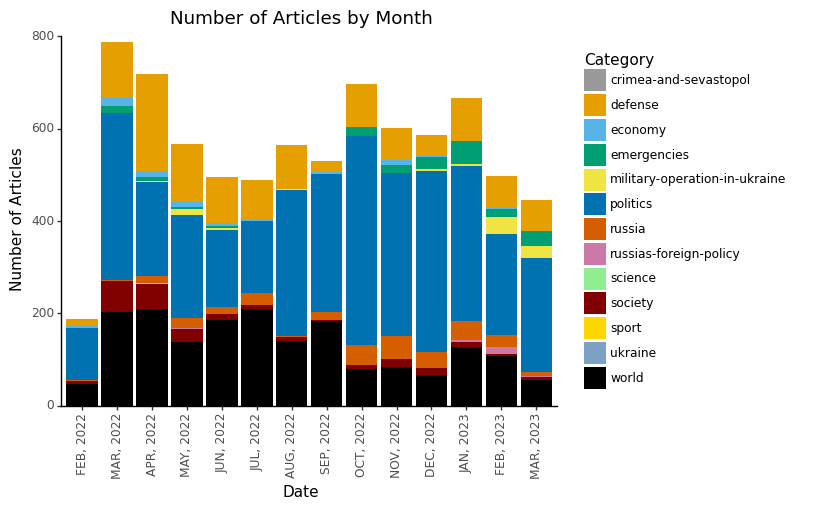

<ggplot: (77342391787)>

In [191]:
plt.rcParams['figure.figsize']=(20,20)
cbp1 = ["#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7","#90ee90", "#800000","#FFD700",  "#7da1c4", "#000000", "#94a596" ]
order = ['FEB, 2022','MAR, 2022','APR, 2022','MAY, 2022','JUN, 2022','JUL, 2022','AUG, 2022','SEP, 2022','OCT, 2022','NOV, 2022','DEC, 2022','JAN, 2023','FEB, 2023','MAR, 2023']
(ggplot(df)+aes(x='MDate',fill='Category')+geom_bar(position='stack',size=20)+labs(y='Number of Articles',x='Date',title='Number of Articles by Month')+scale_x_discrete(limits=order)+scale_y_continuous(expand=(0,0),limits = (0,800))+theme_classic()+theme(axis_text_x = element_text(angle=90))+scale_fill_manual(values=cbp1))

<AxesSubplot:xlabel='MDate'>

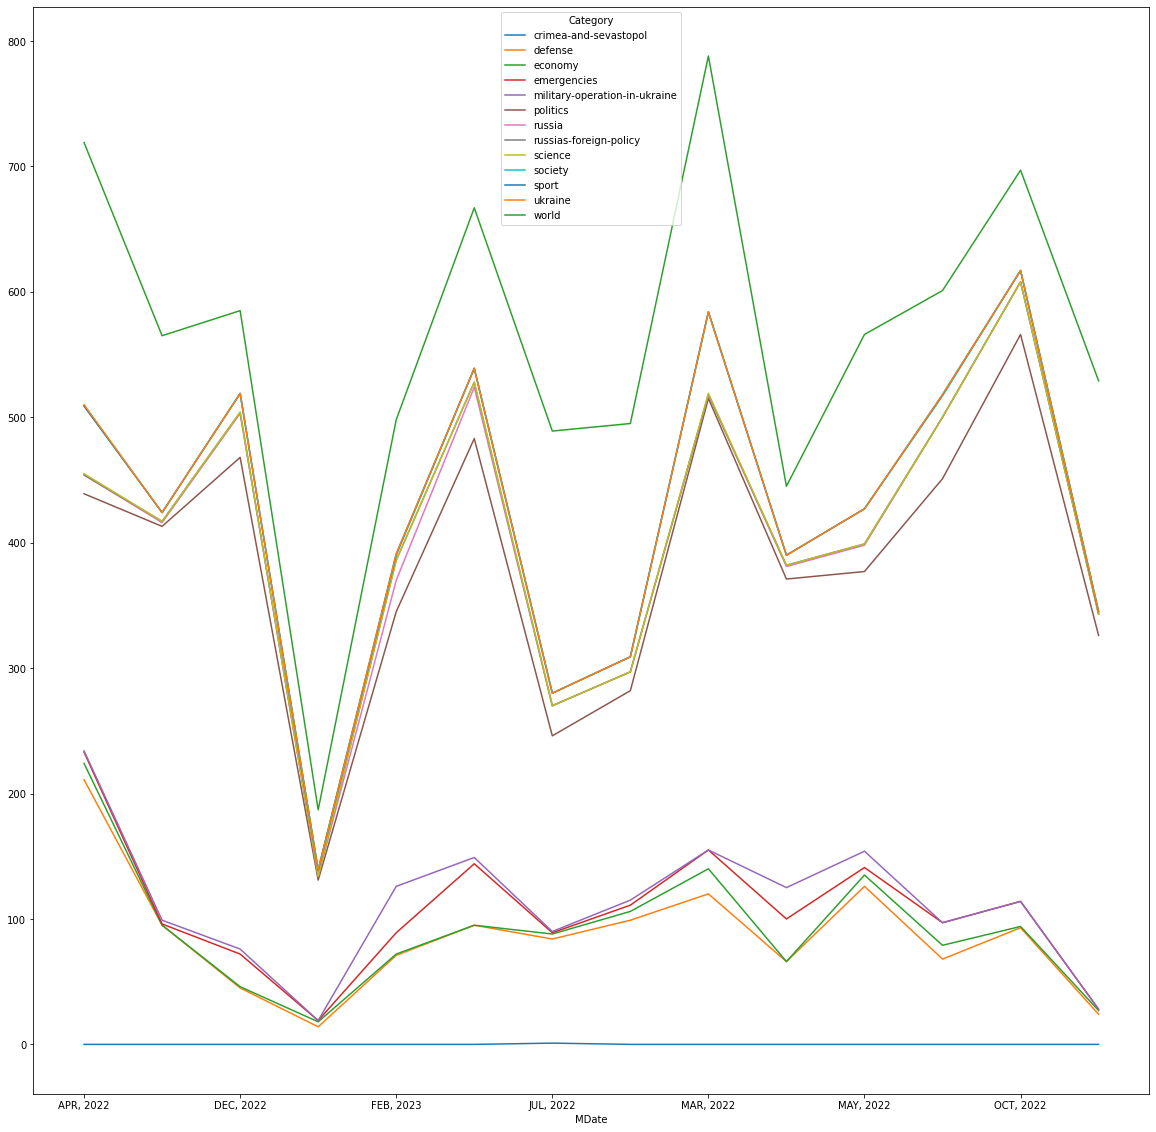

In [183]:
df.groupby(['MDate','Category']).size().unstack().plot(kind='line',stacked=True)

In [184]:
countDF=data1.groupby(['MDate']).count()
countDF

Unnamed: 0  title  link  uploadtime  content  content_unstemmed  \
MDate                                                                        
APR, 2022         719    719   719         719      719                719   
AUG, 2022         565    565   565         565      565                565   
DEC, 2022         585    585   585         585      585                585   
FEB, 2022         187    187   187         187      187                187   
FEB, 2023         498    498   498         498      498                498   
JAN, 2023         667    667   667         667      667                667   
JUL, 2022         489    489   489         489      489                489   
JUN, 2022         495    495   495         495      495                495   
MAR, 2022         788    788   788         788      788                788   
MAR, 2023         445    445   445         445      445                445   
MAY, 2022         566    566   566         566      566                566   
NOV, 2022         601    601   601         601      601                601   
OCT, 2022         697    697   697         697      697                697   
SEP, 2022         529    529   529         529      529                529   

           content_stemmed  Day  Month  Year  Hour  Minute  Date  Category  
MDate                                                                       
APR, 2022              719  719    719   719   719     719   719       719  
AUG, 2022              565  565    565   565   565     565   565       565  
DEC, 2022              585  585    585   585   585     585   585       585  
FEB, 2022              187  187    187   187   187     187   187       187  
FEB, 2023              498  498    498   498   498     498   498       498  
JAN, 2023              667  667    667   667   667     667   667       667  
JUL, 2022              489  489    489   489   489     489   489       489  
JUN, 2022              495  495    495   495   495     495   495       495  
MAR, 2022              788  788    788   788   788     788   788       788  
MAR, 2023              445  445    445   445   445     445   445       445  
MAY, 2022              566  566    566   566   566     566   566       566  
NOV, 2022              601  601    601   601   601     601   601       601  
OCT, 2022              697  697    697   697   697     697   697       697  
SEP, 2022              529  529    529   529   529     529   529       529

In [192]:
data2 = data.copy()

# 5. Topic Modelling on Total Corpus

In [193]:
NUM_SAMPLES = 7700
content_df = data1['content']
header_df = data1['title']
sample_df = data1.sample(NUM_SAMPLES,replace=False).reset_index(drop=True)

In [194]:
sample_df.shape

(7700, 15)

In [195]:
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = cv.fit_transform(sample_df['content'])

In [196]:
dtm

<7700x13266 sparse matrix of type '<class 'numpy.int64'>'
	with 476729 stored elements in Compressed Sparse Row format>

In [197]:
feature_names = cv.get_feature_names()
len(feature_names)

C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


13266

In [198]:
feature_names[6500:]

['ironworks',
 'irpen',
 'irrecoverable',
 'irrefutable',
 'irrelevant',
 'irreparable',
 'irreplaceable',
 'irresponsible',
 'irresponsibly',
 'irretrievable',
 'irreversible',
 'isaac',
 'isamz',
 'ishchenka',
 'isis',
 'iskander',
 'iskanderm',
 'iskra',
 'islam',
 'islamic',
 'island',
 'islands',
 'ismail',
 'isnt',
 'isolate',
 'isolated',
 'isolation',
 'isotopes',
 'israel',
 'israeli',
 'israels',
 'issuance',
 'issue',
 'issued',
 'issues',
 'issuing',
 'istanbul',
 'istanbulbased',
 'istanbuls',
 'italian',
 'italy',
 'italys',
 'itd',
 'item',
 'items',
 'itll',
 'iv',
 'ivan',
 'ivanodaryevka',
 'ivanofrankovsk',
 'ivanopolye',
 'ivanov',
 'ivanovka',
 'ivanovo',
 'ivanovtass',
 'ivashchenko',
 'ive',
 'ivin',
 'izium',
 'izmail',
 'izolenta',
 'izvestia',
 'izyum',
 'jabhat',
 'jaeger',
 'jaguar',
 'jail',
 'jails',
 'jaishankar',
 'jake',
 'jamaica',
 'james',
 'jamming',
 'jan',
 'janis',
 'january',
 'japan',
 'japanese',
 'japans',
 'japaridzetass',
 'jaroslav',
 'jav

In [199]:
NUM_TOPICS = 15
LDA_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=30, random_state=42)

In [200]:
LDA_model.fit(dtm)

LatentDirichletAllocation(max_iter=30, n_components=15, random_state=42)

In [201]:
len(feature_names)

13266

In [202]:
import random
for index in range(15):
    random_word_ID = random.randint(0,13278)
    print(cv.get_feature_names()[random_word_ID])

severodonetsk
nizhnyaya
voluntary
phones
concentrations
1379
akhmadkhadzhi
received
spending
paused
parcels
circles
345
procedures
project


In [203]:
len(LDA_model.components_[0])

13266

In [204]:
#single topic
a_topic = LDA_model.components_[0]

#indices of this array
a_topic.argsort()

array([10203, 12103,  6915, ...,  9861, 12275,  1321], dtype=int64)

In [205]:
#top 10 words for a given topic
top_10_words_indices = a_topic.argsort()[-10:]

for i in top_10_words_indices:
    print(cv.get_feature_names()[i])

heard
region
alert
reported
kiev
explosions
raid
regions
ukraine
air


In [206]:
for i, topic in enumerate(LDA_model.components_):
    print('THE TOP {} WORDS FOR TOPIC #{}'.format(10,i))
    print([cv.get_feature_names()[index] for index in topic.argsort()[-10:]])
    print('\n')

THE TOP 10 WORDS FOR TOPIC #0
['heard', 'region', 'alert', 'reported', 'kiev', 'explosions', 'raid', 'regions', 'ukraine', 'air']


THE TOP 10 WORDS FOR TOPIC #1
['severodonetsk', 'industrial', 'national', 'weapons', 'guard', 'office', 'kadyrov', 'plant', 'service', 'press']


THE TOP 10 WORDS FOR TOPIC #2
['foreign', 'zelensky', 'kiev', 'putin', 'minister', 'vladimir', 'talks', 'president', 'russia', 'ukraine']


THE TOP 10 WORDS FOR TOPIC #3
['people', 'crimes', 'information', 'servicemen', 'defense', 'committee', 'war', 'ministry', 'russia', 'ukraine']


THE TOP 10 WORDS FOR TOPIC #4
['nuclear', 'russia', 'vladimir', 'forces', 'power', 'region', 'rogov', 'plant', 'ukraine', 'zaporozhye']


THE TOP 10 WORDS FOR TOPIC #5
['russias', 'national', 'mikhail', 'center', 'defense', 'mariupol', 'mizintsev', 'ukraine', 'russia', 'humanitarian']


THE TOP 10 WORDS FOR TOPIC #6
['kiev', 'vladimir', 'donbass', 'putin', 'president', 'special', 'operation', 'military', 'ukraine', 'russia']


THE T

In [207]:
final_topics = LDA_model.transform(dtm)
final_topics.shape

(7700, 15)

In [208]:
sample_df['Topic N*']=final_topics.argmax(axis=1)

In [209]:
sample_df.head()

Unnamed: 0                                              title  \
0        2632  nikopol ukraines dnepropetrovsk region rocked ...   
1         101  russian forces wipe three ukrainian subversive...   
2          81  ghillie suits ukrainian troops helpful russian...   
3        4175  over 446 tonnes humanitarian aid delivered dpr...   
4        3514  kherson region official vows protect locals up...   

                                link          uploadtime  \
0     https://tass.com/world/1534527   9 NOV 2022, 15:31   
1  https://tass.com/politics/1596483       30 MAR, 04:20   
2  https://tass.com/politics/1595765       28 MAR, 21:34   
3   https://tass.com/defense/1496933  22 AUG 2022, 14:55   
4  https://tass.com/politics/1515207  29 SEP 2022, 06:42   

                                             content  \
0  explosions heard city nikopol dnepropetrovsk r...   
1  russia forces eliminated three ukraine subvers...   
2  ghillie suits received earlier ukraine troops ...   
3  more 446 tonnes humanitarian cargoes delivered...   
4  authorities kherson region ensure security loc...   

                                   content_unstemmed  \
0  [explosions, heard, city, nikopol, dnepropetro...   
1  [russia, forces, eliminated, three, ukraine, s...   
2  [ghillie, suits, received, earlier, ukraine, t...   
3  [more, 446, tonnes, humanitarian, cargoes, del...   
4  [authorities, kherson, region, ensure, securit...   

                                     content_stemmed Day Month  Year Hour  \
0  [explos, heard, citi, nikopol, dnepropetrovsk,...  9    NOV  2022   15   
1  [russia, forc, elimin, three, ukrain, subversi...  30   MAR  2023   04   
2  [ghilli, suit, receiv, earlier, ukrain, troop,...  28   MAR  2023   21   
3  [more, 446, tonn, humanitarian, cargo, deliv, ...  22   AUG  2022   14   
4  [author, kherson, region, ensur, secur, local,...  29   SEP  2022   06   

  Minute      MDate         Date  Category  Topic N*  
0     31  NOV, 2022  9 -NOV-2022     world         0  
1     20  MAR, 2023  30-MAR-2023  politics        11  
2     34  MAR, 2023  28-MAR-2023  politics        10  
3     55  AUG, 2022  22-AUG-2022   defense         5  
4     42  SEP, 2022  29-SEP-2022  politics        12

In [210]:
pyLDAvis.enable_notebook()

In [211]:
panel=pyLDAvis.sklearn.prepare(LDA_model, dtm, cv, mds='tsne')
panel

C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
11     114.344879  114.308296       1        1  12.954499
2      105.821045  -93.749626       2        1  10.975366
8     -138.334473   95.320763       3        1  10.071571
10      -7.436697  111.259697       4        1   9.072709
6     -207.550629 -105.472603       5        1   8.840798
3       52.817650   14.603765       6        1   8.316239
9      168.010849    6.806950       7        1   7.208915
13     -94.169601 -157.789551       8        1   6.048383
5     -122.849174  -39.059418       9        1   5.768407
4      -94.894264  195.408295      10        1   5.303275
7       24.927401 -180.464874      11        1   4.768392
12     -53.413467   26.832108      12        1   4.460115
14     -12.255850  -72.093201      13        1   2.971313
0     -224.217957   28.070581      14        1   1.740550
1       36.154255  209.427582      15        1   1.499467, topic_info=           Term         Freq         Total Category  logprob  loglift
8295    nuclear  2069.000000   2069.000000  Default  30.0000  30.0000
8798    peoples  4708.000000   4708.000000  Default  29.0000  29.0000
1321        air  1663.000000   1663.000000  Default  28.0000  28.0000
4154    donetsk  4069.000000   4069.000000  Default  27.0000  27.0000
8970      plant  2026.000000   2026.000000  Default  26.0000  26.0000
...         ...          ...           ...      ...      ...      ...
11767      tass    77.645346   1937.642923  Topic15  -4.8424   0.9830
11110   special    79.275088   3186.510097  Topic15  -4.8216   0.5063
12275   ukraine    91.662953  20135.066778  Topic15  -4.6764  -1.1920
7697   military    78.076665   6492.740898  Topic15  -4.8369  -0.2207
11982      told    71.384251   2204.968294  Topic15  -4.9265   0.7697

[1111 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
49         8  0.937594     101
112        5  0.986442  115000
128        7  0.918413   120mm
128       10  0.052481   120mm
134        7  0.959452     122
...      ...       ...     ...
13247      8  0.015852    zone
13247     10  0.122856    zone
13247     11  0.388383    zone
13247     14  0.003963    zone
13247     15  0.134745    zone

[3018 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 3, 9, 11, 7, 4, 10, 14, 6, 5, 8, 13, 15, 1, 2])

In [212]:
naDF = data1.loc[data1['content'].str.contains('nazi', case=False)]
naDF = naDF.groupby(['MDate']).count()
naDF.reset_index(inplace=True)

In [213]:
naDF

MDate  Unnamed: 0  title  link  uploadtime  content  \
0   APR, 2022         159    159   159         159      159   
1   AUG, 2022          44     44    44          44       44   
2   DEC, 2022          19     19    19          19       19   
3   FEB, 2022          20     20    20          20       20   
4   FEB, 2023          10     10    10          10       10   
5   JAN, 2023          23     23    23          23       23   
6   JUL, 2022          54     54    54          54       54   
7   JUN, 2022          58     58    58          58       58   
8   MAR, 2022         230    230   230         230      230   
9   MAR, 2023           6      6     6           6        6   
10  MAY, 2022         105    105   105         105      105   
11  NOV, 2022          35     35    35          35       35   
12  OCT, 2022          43     43    43          43       43   
13  SEP, 2022          32     32    32          32       32   

    content_unstemmed  content_stemmed  Day  Month  Year  Hour  Minute  Date  \
0                 159              159  159    159   159   159     159   159   
1                  44               44   44     44    44    44      44    44   
2                  19               19   19     19    19    19      19    19   
3                  20               20   20     20    20    20      20    20   
4                  10               10   10     10    10    10      10    10   
5                  23               23   23     23    23    23      23    23   
6                  54               54   54     54    54    54      54    54   
7                  58               58   58     58    58    58      58    58   
8                 230              230  230    230   230   230     230   230   
9                   6                6    6      6     6     6       6     6   
10                105              105  105    105   105   105     105   105   
11                 35               35   35     35    35    35      35    35   
12                 43               43   43     43    43    43      43    43   
13                 32               32   32     32    32    32      32    32   

    Category  
0        159  
1         44  
2         19  
3         20  
4         10  
5         23  
6         54  
7         58  
8        230  
9          6  
10       105  
11        35  
12        43  
13        32

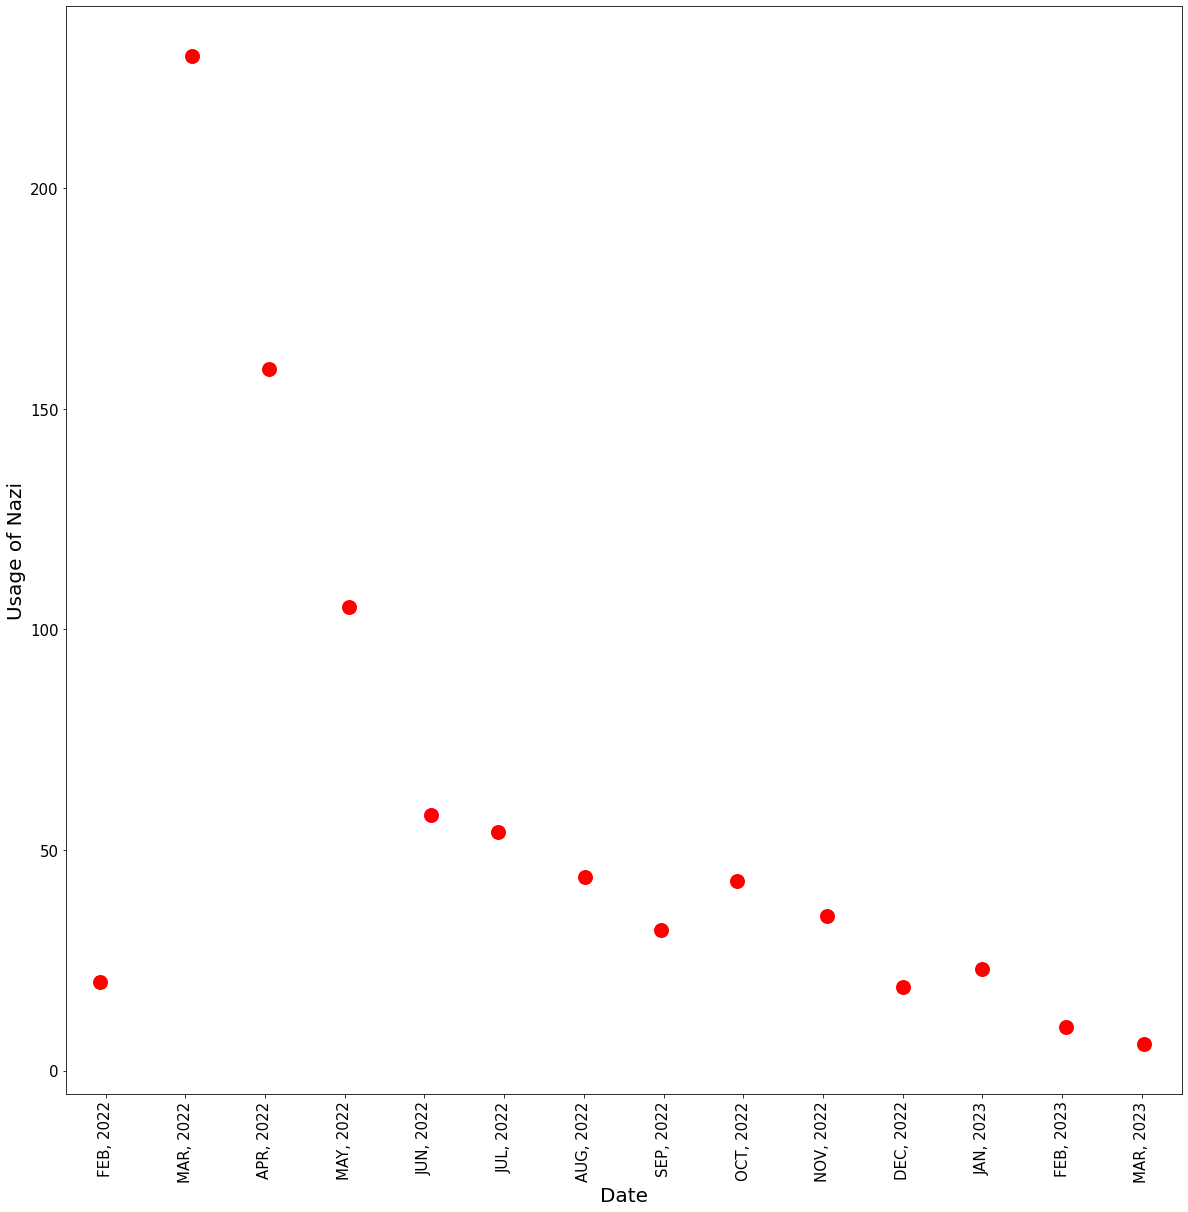

In [301]:
myplot=sns.stripplot(x = "MDate",y='content',data = naDF,order=order,color='red',size=15)
myplot.set_xticklabels(myplot.get_xticklabels(), rotation=90)
myplot.set_xlabel('Date',fontsize=20)
myplot.set_ylabel('Usage of Nazi',fontsize=20)
myplot.tick_params(labelsize=15)

Text(0, 0.5, 'Usage of NATO')

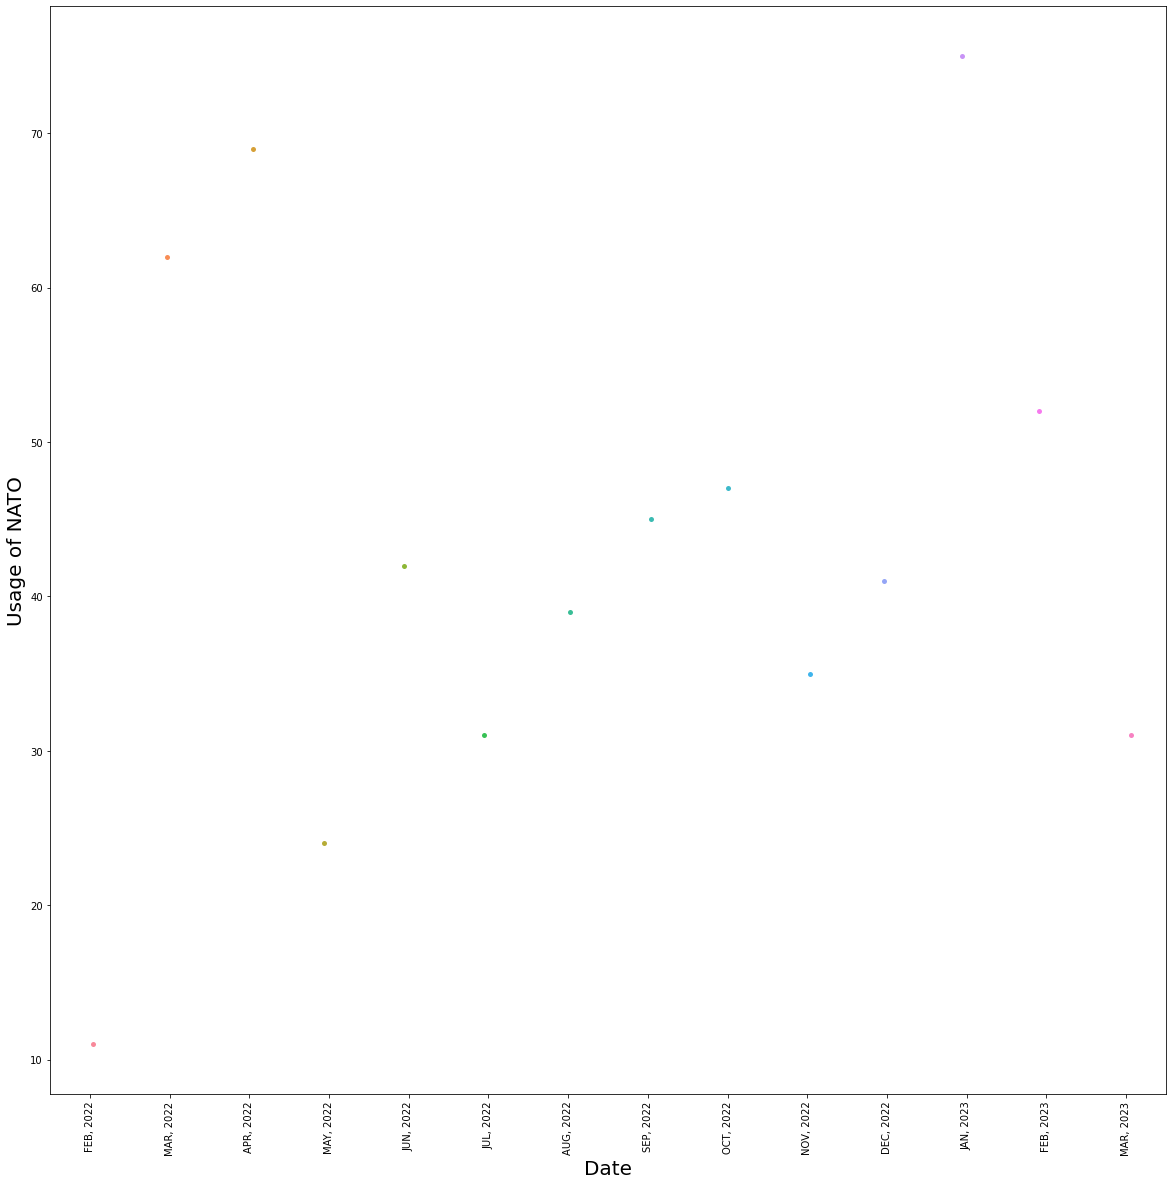

In [223]:
natoDF = data1.loc[data1['content'].str.contains('nato', case=False)]
natoDF = natoDF.groupby(['MDate']).count()
natoDF.reset_index(inplace=True)
myplot2=sns.stripplot(x = "MDate",y='content',data = natoDF,order=order)
myplot2.set_xticklabels(myplot.get_xticklabels(), rotation=90)
myplot2.set_xlabel('Date',fontsize=20)
myplot2.set_ylabel('Usage of NATO',fontsize=20)

Text(0, 0.5, 'Usage of Genocide')

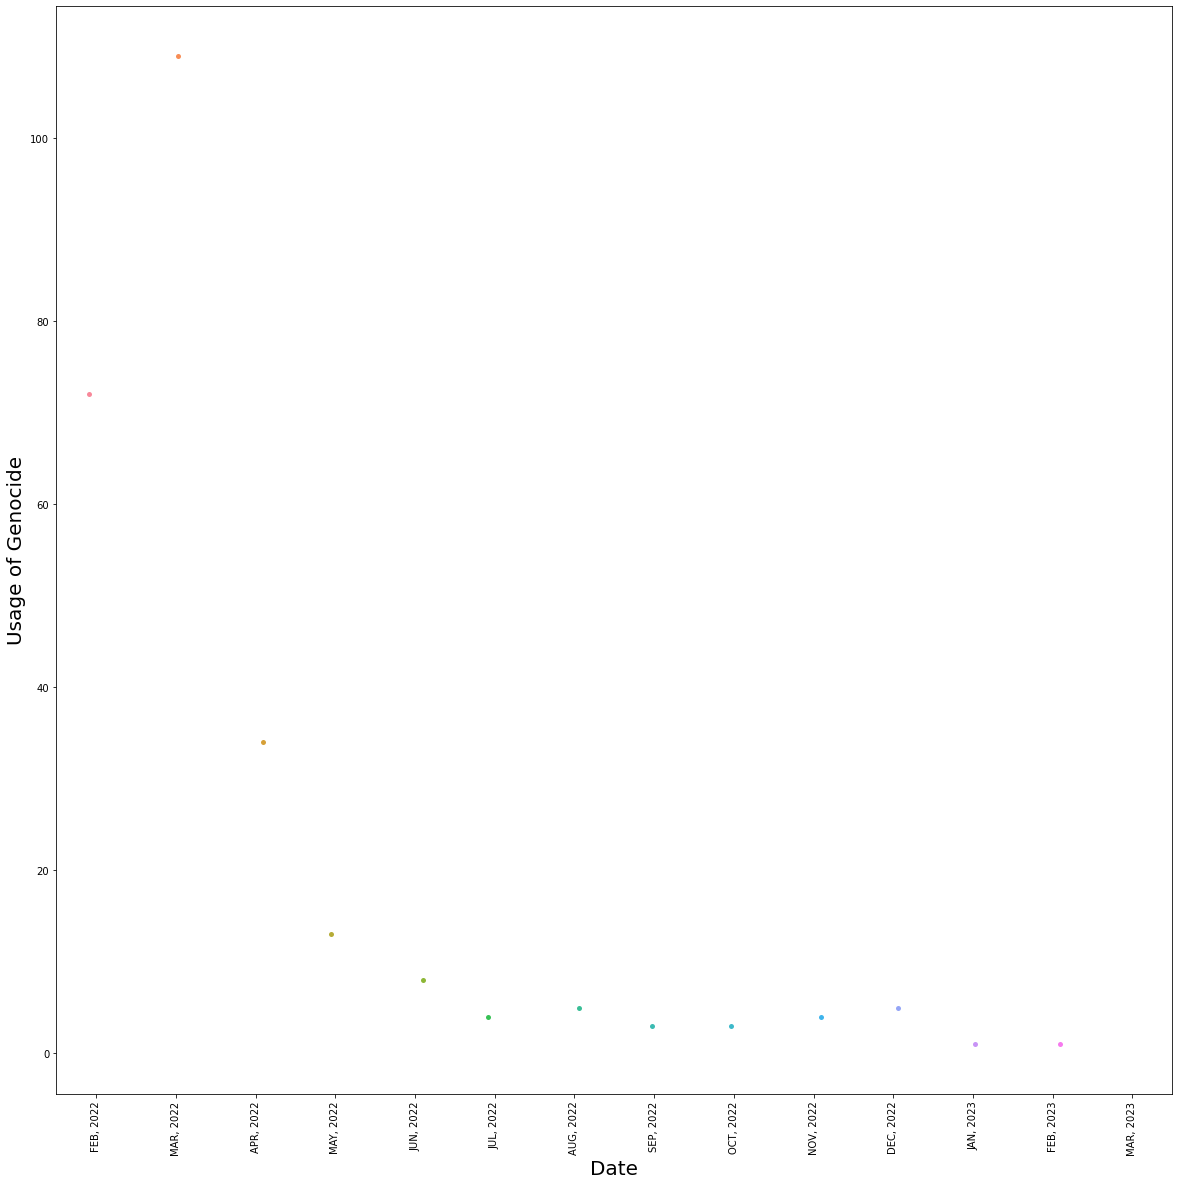

In [224]:
genDF = data1.loc[data1['content'].str.contains('genocide', case=False)]
genDF = genDF.groupby(['MDate']).count()
genDF.reset_index(inplace=True)
myplot3=sns.stripplot(x = "MDate",y='content',data = genDF,order=order)
myplot3.set_xticklabels(myplot.get_xticklabels(), rotation=90)
myplot3.set_xlabel('Date',fontsize=20)
myplot3.set_ylabel('Usage of Genocide',fontsize=20)

Text(0, 0.5, 'Usage of Escalation')

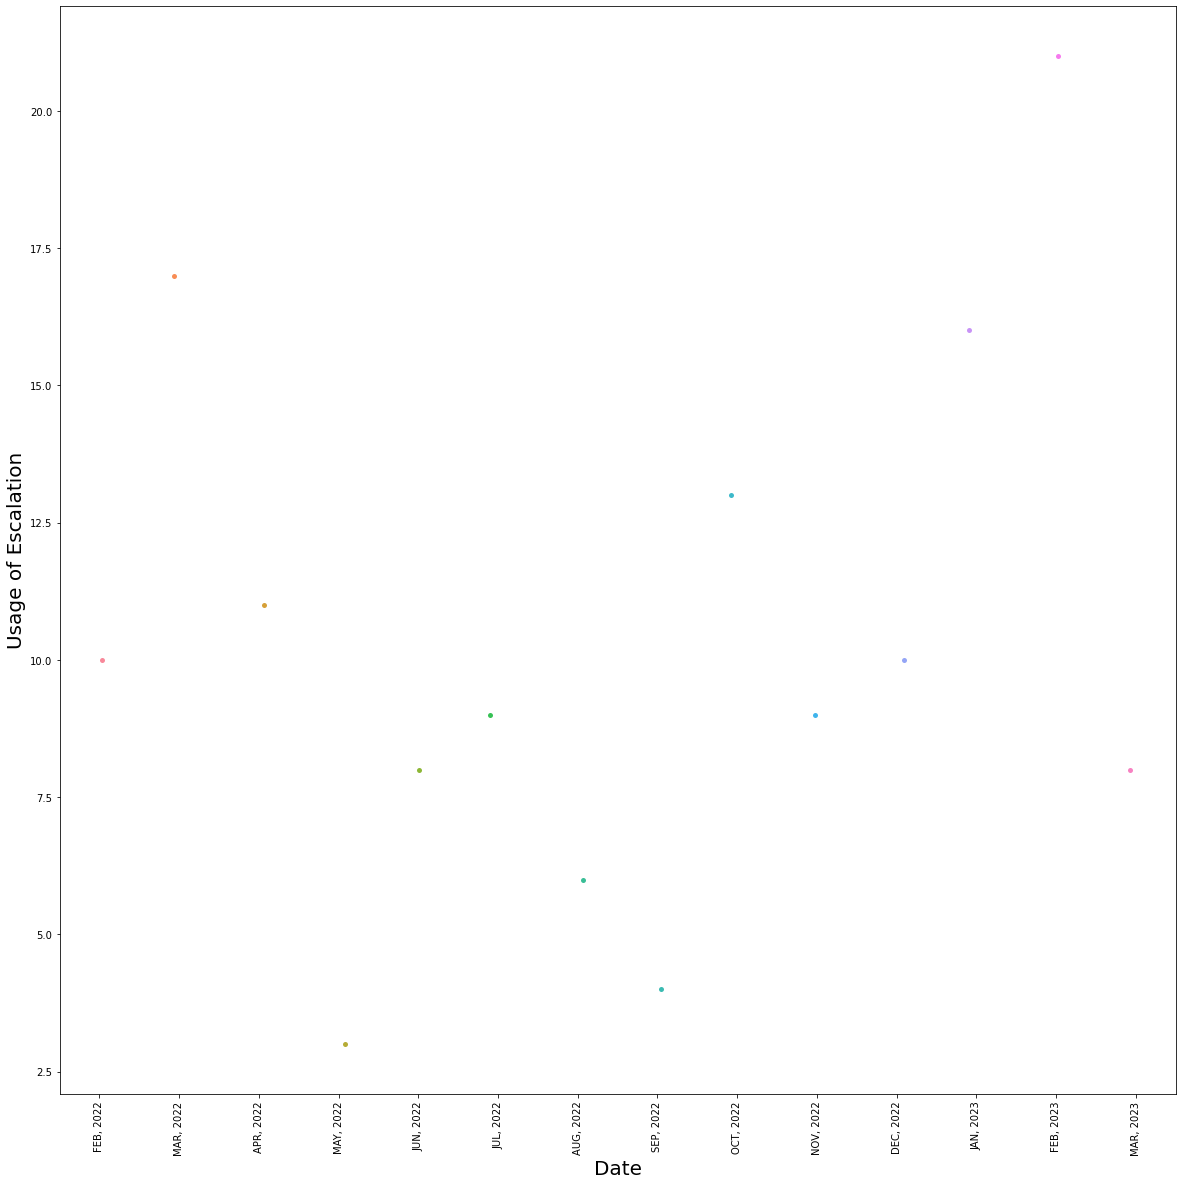

In [225]:
escDF = data1.loc[data1['content'].str.contains('escalation', case=False)]
escDF = escDF.groupby(['MDate']).count()
escDF.reset_index(inplace=True)
myplot4=sns.stripplot(x = "MDate",y='content',data = escDF,order=order)
myplot4.set_xticklabels(myplot.get_xticklabels(), rotation=90)
myplot4.set_xlabel('Date',fontsize=20)
myplot4.set_ylabel('Usage of Escalation',fontsize=20)

## 5.1 Topic Modelling on Different Resolutions

In [226]:
#Creating dataframes for each month to use in our LDA analysis

feb22df = data1[data1['MDate'] == 'FEB, 2022']
mar22df = data1[data1['MDate'] == 'MAR, 2022']
apr22df = data1[data1['MDate'] == 'APR, 2022']
may22df = data1[data1['MDate'] == 'MAY, 2022']
jun22df = data1[data1['MDate'] == 'JUN, 2022']
jul22df = data1[data1['MDate'] == 'JUL, 2022']
aug22df = data1[data1['MDate'] == 'AUG, 2022']
sep22df = data1[data1['MDate'] == 'SEP, 2022']
oct22df = data1[data1['MDate'] == 'OCT, 2022']
nov22df = data1[data1['MDate'] == 'NOV, 2022']
dec22df = data1[data1['MDate'] == 'DEC, 2022']
jan23df = data1[data1['MDate'] == 'JAN, 2023']
feb23df = data1[data1['MDate'] == 'FEB, 2023']
mar23df = data1[data1['MDate'] == 'MAR, 2023']

dfMlist = [feb22df,mar22df,apr22df,may22df,jun22df,jul22df,aug22df,sep22df,oct22df,nov22df,dec22df,jan23df,feb23df,mar23df]
for item in dfMlist:
    item.drop(['Unnamed: 0'], axis=1, inplace=True)

C:\Users\PAIN IN MY ASS\AppData\Local\Temp\ipykernel_32836\897043899.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\PAIN IN MY ASS\AppData\Local\Temp\ipykernel_32836\897043899.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\PAIN IN MY ASS\AppData\Local\Temp\ipykernel_32836\897043899.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\PAIN IN MY ASS\AppData\Local\Temp\ipykernel_32836\897043899.py:20: Set

In [227]:
#We are going to look at the narrative by month
MTopics = []
for item in dfMlist:
    dtm1 = cv.fit_transform(item['content'])
    LDA_model.fit(dtm1)

    for i, topic in enumerate(LDA_model.components_):
        print('THE TOP {} WORDS FOR TOPIC #{}'.format(10,i))
        print([cv.get_feature_names()[index] for index in topic.argsort()[-10:]])
        tList = [cv.get_feature_names()[index] for index in topic.argsort()[-10:]]
        print('\n')
        Topic ={
            'Month':item['MDate'].iloc[0],
            'Topic Number':i,
            'Topic Keywords':tList,
        }
        MTopics.append(Topic)

THE TOP 10 WORDS FOR TOPIC #0
['protect', 'president', 'thursday', 'years', 'people', 'regime', 'kiev', 'military', 'ukraine', 'russia']


THE TOP 10 WORDS FOR TOPIC #1
['transport', 'allies', 'military', 'joe', 'states', 'president', 'kremlin', 'russia', 'biden', 'sanctions']


THE TOP 10 WORDS FOR TOPIC #2
['shelling', 'attacks', 'power', 'members', 'deinego', 'taking', 'restore', 'supply', 'service', 'officetass']


THE TOP 10 WORDS FOR TOPIC #3
['genocide', 'russias', 'vladimir', 'special', 'putin', 'military', 'operation', 'president', 'ukraine', 'russia']


THE TOP 10 WORDS FOR TOPIC #4
['defense', 'special', 'operation', 'donbass', 'putin', 'vladimir', 'military', 'president', 'russia', 'ukraine']


THE TOP 10 WORDS FOR TOPIC #5
['nuclear', 'defense', 'force', 'forces', 'weapons', 'closed', 'strategic', 'russia', 'airspace', 'ukraine']


THE TOP 10 WORDS FOR TOPIC #6
['antirussia', 'summit', 'russias', 'council', 'europe', 'eu', 'package', 'european', 'russia', 'sanctions']


TH

C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


THE TOP 10 WORDS FOR TOPIC #0
['kremlin', 'peskov', 'military', 'special', 'operation', 'vladimir', 'putin', 'president', 'ukraine', 'russia']


THE TOP 10 WORDS FOR TOPIC #1
['lpr', 'republic', 'ukraine', 'donbass', 'february', 'republics', 'lugansk', 'dpr', 'donetsk', 'peoples']


THE TOP 10 WORDS FOR TOPIC #2
['february', 'president', 'military', 'operation', 'sergey', 'lavrov', 'minister', 'foreign', 'ukraine', 'russia']


THE TOP 10 WORDS FOR TOPIC #3
['vladimir', 'negotiations', 'held', 'march', 'belarus', 'delegation', 'round', 'russia', 'ukraine', 'talks']


THE TOP 10 WORDS FOR TOPIC #4
['plants', 'zaporozhye', 'npp', 'facilities', 'plant', 'chernobyl', 'russia', 'ukraine', 'nuclear', 'power']


THE TOP 10 WORDS FOR TOPIC #5
['bastrykin', 'noted', 'red', 'cross', 'prisoners', 'rights', 'human', 'russia', 'ukraine', 'committee']


THE TOP 10 WORDS FOR TOPIC #6
['service', 'support', 'operation', 'mass', 'foreign', 'press', 'media', 'information', 'ukraine', 'russia']


THE TOP 

['told', 'russias', 'countries', 'president', 'western', 'talks', 'foreign', 'kiev', 'ukraine', 'russia']


THE TOP 10 WORDS FOR TOPIC #0
['special', 'defense', 'air', 'missile', 'artillery', 'vehicles', 'russia', 'military', 'ukraine', 'systems']


THE TOP 10 WORDS FOR TOPIC #1
['forces', 'republic', 'republics', 'donetsk', 'dpr', 'ukraine', 'lugansk', 'russia', 'peoples', 'lpr']


THE TOP 10 WORDS FOR TOPIC #2
['troops', 'republic', 'peoples', 'shelling', 'fired', 'killed', 'mission', 'dpr', 'donetsk', 'ukraine']


THE TOP 10 WORDS FOR TOPIC #3
['kharkov', 'kherson', 'people', 'militarycivilian', 'head', 'administration', 'regions', 'zaporozhye', 'russia', 'region']


THE TOP 10 WORDS FOR TOPIC #4
['chief', 'guterres', 'peace', 'emergencies', 'aid', 'according', 'russia', 'western', 'ministry', 'ukraine']


THE TOP 10 WORDS FOR TOPIC #5
['spokesperson', 'intimidate', 'fail', 'blasts', 'agency', 'heard', 'broke', 'attacks', 'make', 'live']


THE TOP 10 WORDS FOR TOPIC #6
['brigade', '

['russias', 'vladimir', 'regions', 'special', 'putin', 'operation', 'president', 'military', 'ukraine', 'russia']


THE TOP 10 WORDS FOR TOPIC #12
['fired', 'city', 'peoples', 'mission', 'armed', 'forces', 'shelling', 'dpr', 'donetsk', 'ukraine']


THE TOP 10 WORDS FOR TOPIC #13
['dnieper', 'city', 'chairman', 'energodar', 'movement', 'forces', 'vladimir', 'ukraine', 'rogov', 'zaporozhye']


THE TOP 10 WORDS FOR TOPIC #14
['strike', 'security', 'monday', 'infrastructure', 'power', 'kiev', 'russia', 'facilities', 'energy', 'ukraine']


THE TOP 10 WORDS FOR TOPIC #0
['howitzer', 'towed', 'reporters', 'maria', 'howitzers', 'foreign', 'zakharova', 'airport', 'russia', 'm777']


THE TOP 10 WORDS FOR TOPIC #1
['fired', 'rockets', 'control', 'center', 'troops', 'dpr', 'mission', 'shelling', 'donetsk', 'ukraine']


THE TOP 10 WORDS FOR TOPIC #2
['born', 'putin', 'president', 'people', 'military', 'russia', 'eu', 'ukraine', 'mission', 'training']


THE TOP 10 WORDS FOR TOPIC #3
['lugansk', 'off

['andrey', 'kremennaya', 'artyomovsk', 'russia', 'republic', 'lpr', 'forces', 'marochko', 'peoples', 'ukraine']


THE TOP 10 WORDS FOR TOPIC #0
['training', 'prime', 'jets', 'visit', 'fighter', 'march', 'tanks', 'kiev', 'minister', 'ukraine']


THE TOP 10 WORDS FOR TOPIC #1
['republic', 'peoples', 'dpr', 'donetsk', 'russia', 'troops', 'city', 'forces', 'artyomovsk', 'ukraine']


THE TOP 10 WORDS FOR TOPIC #2
['ministry', 'people', 'international', 'according', 'conflict', 'peace', 'kiev', 'president', 'russia', 'ukraine']


THE TOP 10 WORDS FOR TOPIC #3
['air', 'operation', 'defense', 'missiles', 'military', 'special', 'ministry', 'drone', 'ukraine', 'russia']


THE TOP 10 WORDS FOR TOPIC #4
['total', 'separate', 'people', 'systems', 'children', 'forces', 'including', 'military', 'ukraine', 'dpr']


THE TOP 10 WORDS FOR TOPIC #5
['shelling', 'bank', 'dnieper', 'russia', 'kakhovka', 'zaporozhye', 'plant', 'ukraine', 'nuclear', 'power']


THE TOP 10 WORDS FOR TOPIC #6
['control', 'killed

In [228]:
MTopics
MTopicsDF = pd.DataFrame(MTopics)
MTopicsDF

Month  Topic Number  \
0    FEB, 2022             0   
1    FEB, 2022             1   
2    FEB, 2022             2   
3    FEB, 2022             3   
4    FEB, 2022             4   
..         ...           ...   
205  MAR, 2023            10   
206  MAR, 2023            11   
207  MAR, 2023            12   
208  MAR, 2023            13   
209  MAR, 2023            14   

                                        Topic Keywords  
0    [protect, president, thursday, years, people, ...  
1    [transport, allies, military, joe, states, pre...  
2    [shelling, attacks, power, members, deinego, t...  
3    [genocide, russias, vladimir, special, putin, ...  
4    [defense, special, operation, donbass, putin, ...  
..                                                 ...  
205  [2022, special, security, crisis, putin, ukrai...  
206  [defense, area, destroyed, peoples, spokesman,...  
207  [according, told, minister, crimean, zelensky,...  
208  [destroyed, district, people, ivan, donetsk, s...  
209  [kiev, according, operation, defense, region, ...  

[210 rows x 3 columns]

In [229]:
topTopicsDF = MTopicsDF[MTopicsDF['Topic Number']==0]
topTopicsDF

Month  Topic Number  \
0    FEB, 2022             0   
15   MAR, 2022             0   
30   APR, 2022             0   
45   MAY, 2022             0   
60   JUN, 2022             0   
75   JUL, 2022             0   
90   AUG, 2022             0   
105  SEP, 2022             0   
120  OCT, 2022             0   
135  NOV, 2022             0   
150  DEC, 2022             0   
165  JAN, 2023             0   
180  FEB, 2023             0   
195  MAR, 2023             0   

                                        Topic Keywords  
0    [protect, president, thursday, years, people, ...  
15   [kremlin, peskov, military, special, operation...  
30   [ukraines, safe, ministry, kiev, defense, sea,...  
45   [region, systems, missile, vehicles, forces, a...  
60   [artillery, dpr, armed, mission, city, fired, ...  
75   [special, defense, air, missile, artillery, ve...  
90   [weapons, control, troops, military, civilians...  
105  [troops, mission, fired, killed, shelling, rep...  
120  [zone, general, grossi, ukraine, iaea, russia,...  
135  [howitzer, towed, reporters, maria, howitzers,...  
150  [armed, peoples, reported, killed, shelling, r...  
165  [criminal, administration, shell, house, speci...  
180  [west, deputy, international, kiev, countries,...  
195  [training, prime, jets, visit, fighter, march,...

In [230]:
top4DF = MTopicsDF[MTopicsDF['Topic Number']<4]

#print(tabulate(top4DF, headers=['Index','Month-Year','Topic Number','Topic Keywords'], tablefmt='fancy_grid'))
#pd.set_option('display.max_column',None)
#pd.set_option('display.max_colwidth',None)
#pd.set_option('display.width',-1)
#pd.set_option('display.max_rows',None)
top4DF
#dfi.export(top4DF, "MonthlyTop4.png",table_conversion='matplotlib')

Month  Topic Number  \
0    FEB, 2022             0   
1    FEB, 2022             1   
2    FEB, 2022             2   
3    FEB, 2022             3   
15   MAR, 2022             0   
16   MAR, 2022             1   
17   MAR, 2022             2   
18   MAR, 2022             3   
30   APR, 2022             0   
31   APR, 2022             1   
32   APR, 2022             2   
33   APR, 2022             3   
45   MAY, 2022             0   
46   MAY, 2022             1   
47   MAY, 2022             2   
48   MAY, 2022             3   
60   JUN, 2022             0   
61   JUN, 2022             1   
62   JUN, 2022             2   
63   JUN, 2022             3   
75   JUL, 2022             0   
76   JUL, 2022             1   
77   JUL, 2022             2   
78   JUL, 2022             3   
90   AUG, 2022             0   
91   AUG, 2022             1   
92   AUG, 2022             2   
93   AUG, 2022             3   
105  SEP, 2022             0   
106  SEP, 2022             1   
107  SEP, 2022             2   
108  SEP, 2022             3   
120  OCT, 2022             0   
121  OCT, 2022             1   
122  OCT, 2022             2   
123  OCT, 2022             3   
135  NOV, 2022             0   
136  NOV, 2022             1   
137  NOV, 2022             2   
138  NOV, 2022             3   
150  DEC, 2022             0   
151  DEC, 2022             1   
152  DEC, 2022             2   
153  DEC, 2022             3   
165  JAN, 2023             0   
166  JAN, 2023             1   
167  JAN, 2023             2   
168  JAN, 2023             3   
180  FEB, 2023             0   
181  FEB, 2023             1   
182  FEB, 2023             2   
183  FEB, 2023             3   
195  MAR, 2023             0   
196  MAR, 2023             1   
197  MAR, 2023             2   
198  MAR, 2023             3   

                                        Topic Keywords  
0    [protect, president, thursday, years, people, ...  
1    [transport, allies, military, joe, states, pre...  
2    [shelling, attacks, power, members, deinego, t...  
3    [genocide, russias, vladimir, special, putin, ...  
15   [kremlin, peskov, military, special, operation...  
16   [lpr, republic, ukraine, donbass, february, re...  
17   [february, president, military, operation, ser...  
18   [vladimir, negotiations, held, march, belarus,...  
30   [ukraines, safe, ministry, kiev, defense, sea,...  
31   [russia, operation, lugansk, donbass, february...  
32   [defense, mikhail, center, donetsk, including,...  
33   [press, state, zakharova, director, russias, i...  
45   [region, systems, missile, vehicles, forces, a...  
46   [foreign, russias, operation, special, vladimi...  
47   [forces, ministry, military, plant, spokesman,...  
48   [wednesday, village, governor, belgorod, regio...  
60   [artillery, dpr, armed, mission, city, fired, ...  
61   [past, pinner, according, mercenaries, court, ...  
62   [foreign, targets, defense, school, russia, ki...  
63   [residents, vladimir, zaporozhye, people, weap...  
75   [special, defense, air, missile, artillery, ve...  
76   [forces, republic, republics, donetsk, dpr, uk...  
77   [troops, republic, peoples, shelling, fired, k...  
78   [kharkov, kherson, people, militarycivilian, h...  
90   [weapons, control, troops, military, civilians...  
91   [region, plant, nuclear, energodar, militaryci...  
92   [held, prisonersofwar, combat, launch, multipl...  
93   [ukraine, secretary, antonio, artillery, russi...  
105  [troops, mission, fired, killed, shelling, rep...  
106  [moscow, military, ministry, servicemen, matti...  
107  [republic, situation, near, city, dpr, pushili...  
108  [attacked, svatovo, alaudinov, representatives...  
120  [zone, general, grossi, ukraine, iaea, russia,...  
121  [kievsky, armed, mobilization, told, region, t...  
122  [dpr, pushilin, area, lugansk, allied, ukraine...  
123  [crimea, weapons, security, biological, negoti...  
135  [howitzer, towed, reporters, maria, howitzers,...  
136  [fired, rocke

In [231]:
top3DF = MTopicsDF[MTopicsDF['Topic Number']<3]

#print(tabulate(top3DF, headers=['Index','Month-Year','Topic Number','Topic Keywords'], tablefmt='fancy_grid'))
#pd.set_option('display.max_column',None)
#pd.set_option('display.max_colwidth',None)
#pd.set_option('display.width',-1)
#pd.set_option('display.max_rows',None)
top3DF
#dfi.export(top3DF, "MonthlyTop3.png",table_conversion='matplotlib')

Month  Topic Number  \
0    FEB, 2022             0   
1    FEB, 2022             1   
2    FEB, 2022             2   
15   MAR, 2022             0   
16   MAR, 2022             1   
17   MAR, 2022             2   
30   APR, 2022             0   
31   APR, 2022             1   
32   APR, 2022             2   
45   MAY, 2022             0   
46   MAY, 2022             1   
47   MAY, 2022             2   
60   JUN, 2022             0   
61   JUN, 2022             1   
62   JUN, 2022             2   
75   JUL, 2022             0   
76   JUL, 2022             1   
77   JUL, 2022             2   
90   AUG, 2022             0   
91   AUG, 2022             1   
92   AUG, 2022             2   
105  SEP, 2022             0   
106  SEP, 2022             1   
107  SEP, 2022             2   
120  OCT, 2022             0   
121  OCT, 2022             1   
122  OCT, 2022             2   
135  NOV, 2022             0   
136  NOV, 2022             1   
137  NOV, 2022             2   
150  DEC, 2022             0   
151  DEC, 2022             1   
152  DEC, 2022             2   
165  JAN, 2023             0   
166  JAN, 2023             1   
167  JAN, 2023             2   
180  FEB, 2023             0   
181  FEB, 2023             1   
182  FEB, 2023             2   
195  MAR, 2023             0   
196  MAR, 2023             1   
197  MAR, 2023             2   

                                        Topic Keywords  
0    [protect, president, thursday, years, people, ...  
1    [transport, allies, military, joe, states, pre...  
2    [shelling, attacks, power, members, deinego, t...  
15   [kremlin, peskov, military, special, operation...  
16   [lpr, republic, ukraine, donbass, february, re...  
17   [february, president, military, operation, ser...  
30   [ukraines, safe, ministry, kiev, defense, sea,...  
31   [russia, operation, lugansk, donbass, february...  
32   [defense, mikhail, center, donetsk, including,...  
45   [region, systems, missile, vehicles, forces, a...  
46   [foreign, russias, operation, special, vladimi...  
47   [forces, ministry, military, plant, spokesman,...  
60   [artillery, dpr, armed, mission, city, fired, ...  
61   [past, pinner, according, mercenaries, court, ...  
62   [foreign, targets, defense, school, russia, ki...  
75   [special, defense, air, missile, artillery, ve...  
76   [forces, republic, republics, donetsk, dpr, uk...  
77   [troops, republic, peoples, shelling, fired, k...  
90   [weapons, control, troops, military, civilians...  
91   [region, plant, nuclear, energodar, militaryci...  
92   [held, prisonersofwar, combat, launch, multipl...  
105  [troops, mission, fired, killed, shelling, rep...  
106  [moscow, military, ministry, servicemen, matti...  
107  [republic, situation, near, city, dpr, pushili...  
120  [zone, general, grossi, ukraine, iaea, russia,...  
121  [kievsky, armed, mobilization, told, region, t...  
122  [dpr, pushilin, area, lugansk, allied, ukraine...  
135  [howitzer, towed, reporters, maria, howitzers,...  
136  [fired, rockets, control, center, troops, dpr,...  
137  [born, putin, president, people, military, rus...  
150  [armed, peoples, reported, killed, shelling, r...  
151  [told, zaporozhye, melitopol, region, rogov, p...  
152  [governor, vyacheslav, military, states, opera...  
165  [criminal, administration, shell, house, speci...  
166  [representative, protection, mikhail, ulyanov,...  
167  [shelling, mission, artillery, dpr, republic, ...  
180  [west, deputy, international, kiev, countries,...  
181  [government, send, german, countries, jets, fi...  
182  [republic, war, wounded, killed, crimes, cente...  
195  [training, prime, jets, visit, fighter, march,...  
196  [republic, peoples, dpr, donetsk, russia, troo...  
197  [ministry, people, international, according, c...

In [232]:
#Feb 2022
dtm1 = cv.fit_transform(feb22df['content'])
LDA_model.fit(dtm1)
final_topics = LDA_model.transform(dtm1)
pyLDAvis.enable_notebook()
panel=pyLDAvis.sklearn.prepare(LDA_model, dtm1, cv, mds='tsne')
panel

C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
14     114.344879  114.308296       1        1  26.274420
0      105.821045  -93.749626       2        1  25.692844
13    -138.334473   95.320763       3        1  13.130963
3       -7.436697  111.259697       4        1   8.019382
12    -207.550629 -105.472603       5        1   6.095785
4       52.817650   14.603765       6        1   5.963173
5      168.010849    6.806950       7        1   2.435200
1      -94.169601 -157.789551       8        1   2.297905
11    -122.849174  -39.059418       9        1   2.045426
6      -94.894264  195.408295      10        1   2.040401
10      24.927401 -180.464874      11        1   1.983142
8      -53.413467   26.832108      12        1   1.286770
9      -12.255850  -72.093201      13        1   1.247938
7     -224.217957   28.070581      14        1   1.123696
2       36.154255  209.427582      15        1   0.362956, topic_info=           Term        Freq       Total Category  logprob  loglift
1204    ukraine  597.000000  597.000000  Default  30.0000  30.0000
1011     russia  615.000000  615.000000  Default  29.0000  29.0000
835     peoples  101.000000  101.000000  Default  28.0000  28.0000
882   president  188.000000  188.000000  Default  27.0000  27.0000
488     foreign   45.000000   45.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
856     pointed    0.375209   15.512536  Topic15  -4.9684   1.8967
1043    service    0.854981   37.118771  Topic15  -4.1448   1.8478
1055   shelling    0.516971   26.195454  Topic15  -4.6479   1.6933
687         lpr    0.508680   41.229794  Topic15  -4.6641   1.2235
782       noted    0.403028   26.695308  Topic15  -4.8969   1.4254

[858 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
2        13  0.683461        10
4         7  0.312217        12
4        11  0.624434        12
6        13  0.826114       137
7         1  0.461838        14
...     ...       ...       ...
1275      5  0.495325  zelensky
1275      6  0.110072  zelensky
1275      7  0.082554  zelensky
1275      8  0.055036  zelensky
1275     13  0.055036  zelensky

[1729 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[15, 1, 14, 4, 13, 5, 6, 2, 12, 7, 11, 9, 10, 8, 3])

In [233]:
#Mar 2022
dtm2 = cv.fit_transform(mar22df['content'])
LDA_model.fit(dtm2)
final_topics = LDA_model.transform(dtm2)
pyLDAvis.enable_notebook()
panel=pyLDAvis.sklearn.prepare(LDA_model, dtm2, cv, mds='tsne')
panel

C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
10     114.344879  114.308296       1        1  15.087081
12     105.821045  -93.749626       2        1  14.858521
7     -138.334473   95.320763       3        1  12.146729
2       -7.436697  111.259697       4        1  11.729955
0     -207.550629 -105.472603       5        1   9.441477
3       52.817650   14.603765       6        1   7.510824
1      168.010849    6.806950       7        1   7.476225
14     -94.169601 -157.789551       8        1   6.206364
4     -122.849174  -39.059418       9        1   5.431941
6      -94.894264  195.408295      10        1   3.725117
5       24.927401 -180.464874      11        1   1.436693
8      -53.413467   26.832108      12        1   1.405696
13     -12.255850  -72.093201      13        1   1.266661
11    -224.217957   28.070581      14        1   1.265317
9       36.154255  209.427582      15        1   1.011400, topic_info=              Term         Freq        Total Category  logprob  loglift
3546         talks   356.000000   356.000000  Default  30.0000  30.0000
3723       ukraine  2552.000000  2552.000000  Default  29.0000  29.0000
1791  humanitarian   503.000000   503.000000  Default  28.0000  28.0000
2620       peoples   225.000000   225.000000  Default  27.0000  27.0000
3122         round   175.000000   175.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
3144       russias     3.835860   353.318409  Topic15  -5.2671   0.0709
2090        leader     3.430736   200.478430  Topic15  -5.3787   0.5259
2750  presidential     3.283106   106.829151  Topic15  -5.4227   1.1114
1059       defense     3.309185   568.723285  Topic15  -5.4148  -0.5529
2299      military     3.152544   938.971265  Topic15  -5.4633  -1.1027

[977 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
0         1  0.864640         0300
23        7  0.905861        122mm
48        3  0.023855           17
48        7  0.954187           17
54        1  0.036134           18
...     ...       ...          ...
3984      9  0.101715     zelensky
3984     13  0.025429     zelensky
3984     15  0.025429     zelensky
3989      6  0.882660  zhuravlevka
3993      3  0.962891        zones

[2365 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 13, 8, 3, 1, 4, 2, 15, 5, 7, 6, 9, 14, 12, 10])

In [234]:
#Apr 2022
dtm3 = cv.fit_transform(apr22df['content'])
LDA_model.fit(dtm3)
final_topics = LDA_model.transform(dtm3)
pyLDAvis.enable_notebook()
panel=pyLDAvis.sklearn.prepare(LDA_model, dtm3, cv, mds='tsne')
panel

C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4      114.344879  114.308296       1        1  14.105376
6      105.821045  -93.749626       2        1  11.102418
5     -138.334473   95.320763       3        1  10.806863
1       -7.436697  111.259697       4        1  10.367317
2     -207.550629 -105.472603       5        1   9.872514
8       52.817650   14.603765       6        1   7.956531
14     168.010849    6.806950       7        1   7.339384
0      -94.169601 -157.789551       8        1   7.070396
10    -122.849174  -39.059418       9        1   6.685876
13     -94.894264  195.408295      10        1   4.897540
9       24.927401 -180.464874      11        1   3.284020
11     -53.413467   26.832108      12        1   1.864913
3      -12.255850  -72.093201      13        1   1.759317
12    -224.217957   28.070581      14        1   1.545465
7       36.154255  209.427582      15        1   1.342071, topic_info=              Term        Freq       Total Category  logprob  loglift
1743  humanitarian  344.000000  344.000000  Default  30.0000  30.0000
630          bucha  192.000000  192.000000  Default  29.0000  29.0000
2608       peoples  272.000000  272.000000  Default  28.0000  28.0000
2299      ministry  428.000000  428.000000  Default  27.0000  27.0000
1210           dpr  219.000000  219.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
1809     including    5.020926  241.658847  Topic15  -5.1633   0.4370
772      civilians    4.853147  208.941740  Topic15  -5.1973   0.5485
3175      security    4.523530  172.994374  Topic15  -5.2676   0.6670
2297      minister    3.969968  174.752232  Topic15  -5.3981   0.5263
3877       weapons    3.919799  173.363227  Topic15  -5.4108   0.5216

[989 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         9  0.853814   0600
20        9  0.336206   1200
20       15  0.504309   1200
25       15  0.738517  122mm
33        9  0.945856   1300
...     ...       ...    ...
3969      9  0.737127   zone
3969     11  0.081903   zone
3970      5  0.875531  zones
3970      8  0.087553  zones
3972     15  0.804187    zvi

[2390 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 7, 6, 2, 3, 9, 15, 1, 11, 14, 10, 12, 4, 13, 8])

In [235]:
#May 2022
dtm4 = cv.fit_transform(may22df['content'])
LDA_model.fit(dtm4)
final_topics = LDA_model.transform(dtm4)
pyLDAvis.enable_notebook()
panel=pyLDAvis.sklearn.prepare(LDA_model, dtm4, cv, mds='tsne')
panel

C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
12     114.344879  114.308296       1        1  16.515312
1      105.821045  -93.749626       2        1  13.938203
2     -138.334473   95.320763       3        1  11.860907
0       -7.436697  111.259697       4        1   9.831869
10    -207.550629 -105.472603       5        1   6.182082
14      52.817650   14.603765       6        1   6.028669
11     168.010849    6.806950       7        1   5.800308
13     -94.169601 -157.789551       8        1   5.188114
7     -122.849174  -39.059418       9        1   5.145662
3      -94.894264  195.408295      10        1   4.148268
4       24.927401 -180.464874      11        1   3.809493
6      -53.413467   26.832108      12        1   3.640874
9      -12.255850  -72.093201      13        1   3.300631
8     -224.217957   28.070581      14        1   2.318395
5       36.154255  209.427582      15        1   2.291212, topic_info=              Term        Freq       Total Category  logprob  loglift
2511        region  222.000000  222.000000  Default  30.0000  30.0000
1971     mizintsev  191.000000  191.000000  Default  29.0000  29.0000
1508  humanitarian  197.000000  197.000000  Default  28.0000  28.0000
2561     republics  280.000000  280.000000  Default  27.0000  27.0000
407       azovstal  152.000000  152.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
2689           sea    4.546703   45.894957  Topic15  -5.4677   1.4641
1957      ministry    4.859580  191.920212  Topic15  -5.4012   0.1000
2511        region    4.764825  222.109152  Topic15  -5.4209  -0.0658
954         deputy    4.422893   68.045548  Topic15  -5.4953   1.0427
2575     residents    4.395800   62.010237  Topic15  -5.5015   1.1294

[1022 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         5  0.881789   0800
19        1  0.924036  122mm
26        5  0.810573    139
38        1  0.079624  155mm
38       12  0.875865  155mm
...     ...       ...    ...
3370     10  0.082520   zone
3370     12  0.082520   zone
3370     13  0.123781   zone
3370     14  0.041260   zone
3371      9  0.935293  zones

[2399 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 2, 3, 1, 11, 15, 12, 14, 8, 4, 5, 7, 10, 9, 6])

In [236]:
#Jun 2022
dtm5 = cv.fit_transform(jun22df['content'])
LDA_model.fit(dtm5)
final_topics = LDA_model.transform(dtm5)
pyLDAvis.enable_notebook()
panel=pyLDAvis.sklearn.prepare(LDA_model, dtm5, cv, mds='tsne')
panel

C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
14     114.344879  114.308296       1        1  16.346888
11     105.821045  -93.749626       2        1  13.164357
8     -138.334473   95.320763       3        1  12.068590
0       -7.436697  111.259697       4        1   9.335152
10    -207.550629 -105.472603       5        1   9.018536
4       52.817650   14.603765       6        1   8.263979
3      168.010849    6.806950       7        1   7.604098
1      -94.169601 -157.789551       8        1   7.532479
2     -122.849174  -39.059418       9        1   4.362474
9      -94.894264  195.408295      10        1   3.756241
12      24.927401 -180.464874      11        1   2.799241
5      -53.413467   26.832108      12        1   2.408877
13     -12.255850  -72.093201      13        1   1.549728
6     -224.217957   28.070581      14        1   1.354246
7       36.154255  209.427582      15        1   0.435113, topic_info=            Term        Freq        Total Category  logprob  loglift
1552  lisichansk   96.000000    96.000000  Default  30.0000  30.0000
1718   mizintsev  133.000000   133.000000  Default  29.0000  29.0000
879      donetsk  362.000000   362.000000  Default  28.0000  28.0000
1585         lpr  199.000000   199.000000  Default  27.0000  27.0000
2308      russia  981.000000   981.000000  Default  26.0000  26.0000
...          ...         ...          ...      ...      ...      ...
128    according    1.110215   175.104706  Topic15  -5.0480   0.3765
2731     ukraine    1.136572  1221.340062  Topic15  -5.0246  -1.5424
2716     tuesday    1.047277    94.809922  Topic15  -5.1064   0.9316
1728      monday    1.047277    67.983656  Topic15  -5.1064   1.2642
1223        head    1.047277   120.013307  Topic15  -5.1064   0.6959

[940 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0        13  0.622375      0800
1         2  0.253068        10
1         3  0.144610        10
1         4  0.361526        10
1         8  0.108458        10
...     ...       ...       ...
2906      9  0.156633  zelensky
2906     14  0.052211  zelensky
2910      6  0.896586      zone
2910      9  0.057844      zone
2910     14  0.028922      zone

[2128 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[15, 12, 9, 1, 11, 5, 4, 2, 3, 10, 13, 6, 14, 7, 8])

In [237]:
#Jul 2022
dtm6 = cv.fit_transform(jul22df['content'])
LDA_model.fit(dtm6)
final_topics = LDA_model.transform(dtm6)
pyLDAvis.enable_notebook()
panel=pyLDAvis.sklearn.prepare(LDA_model, dtm6, cv, mds='tsne')
panel

C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
7      114.344879  114.308296       1        1  15.200120
1      105.821045  -93.749626       2        1  13.764444
11    -138.334473   95.320763       3        1  12.470522
2       -7.436697  111.259697       4        1  10.562364
12    -207.550629 -105.472603       5        1  10.041501
13      52.817650   14.603765       6        1   8.566028
0      168.010849    6.806950       7        1   6.984481
3      -94.169601 -157.789551       8        1   5.203556
9     -122.849174  -39.059418       9        1   4.135350
14     -94.894264  195.408295      10        1   3.483755
6       24.927401 -180.464874      11        1   2.799598
10     -53.413467   26.832108      12        1   2.609758
8      -12.255850  -72.093201      13        1   1.979882
4     -224.217957   28.070581      14        1   1.944181
5       36.154255  209.427582      15        1   0.254460, topic_info=              Term        Freq       Total Category  logprob  loglift
864            dpr  311.000000  311.000000  Default  30.0000  30.0000
1557           lpr  199.000000  199.000000  Default  29.0000  29.0000
2251        russia  886.000000  886.000000  Default  28.0000  28.0000
2125        region  226.000000  226.000000  Default  27.0000  27.0000
1560       lugansk  201.000000  201.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
2507  subsequently    0.393112    6.966205  Topic15  -5.4896   3.0991
1574         major    0.393112   13.455204  Topic15  -5.4896   2.4408
2810          went    0.393112    9.793155  Topic15  -5.4896   2.7584
1368      involved    0.393112   14.128491  Topic15  -5.4896   2.3919
1755          news    0.393112   24.299671  Topic15  -5.4896   1.8497

[984 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
2         7  0.231393        10
2         9  0.617047        10
2        12  0.077131        10
5         3  0.850727     10000
12        4  0.922536     122mm
...     ...       ...       ...
2859      3  0.244217  zelensky
2859      5  0.195374  zelensky
2859     10  0.048843  zelensky
2859     13  0.146530  zelensky
2859     14  0.195374  zelensky

[2179 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 2, 12, 3, 13, 14, 1, 4, 10, 15, 7, 11, 9, 5, 6])

In [238]:
#Aug 2022
dtm7 = cv.fit_transform(aug22df['content'])
LDA_model.fit(dtm7)
final_topics = LDA_model.transform(dtm7)
pyLDAvis.enable_notebook()
panel=pyLDAvis.sklearn.prepare(LDA_model, dtm7, cv, mds='tsne')
panel

C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
7      114.344879  114.308296       1        1  20.483789
0      105.821045  -93.749626       2        1  11.450240
11    -138.334473   95.320763       3        1  11.199333
10      -7.436697  111.259697       4        1   8.700805
1     -207.550629 -105.472603       5        1   7.638185
4       52.817650   14.603765       6        1   7.566872
6      168.010849    6.806950       7        1   6.629651
12     -94.169601 -157.789551       8        1   5.361328
5     -122.849174  -39.059418       9        1   4.490772
9      -94.894264  195.408295      10        1   4.274845
3       24.927401 -180.464874      11        1   3.858901
8      -53.413467   26.832108      12        1   3.283407
13     -12.255850  -72.093201      13        1   2.956280
14    -224.217957   28.070581      14        1   1.128462
2       36.154255  209.427582      15        1   0.977130, topic_info=            Term         Freq        Total Category  logprob  loglift
2086     nuclear   655.000000   655.000000  Default  30.0000  30.0000
3331  zaporozhye   742.000000   742.000000  Default  29.0000  29.0000
2255       plant   534.000000   534.000000  Default  28.0000  28.0000
2308       power   490.000000   490.000000  Default  27.0000  27.0000
2652      russia  1041.000000  1041.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
1935    military     3.967239   436.111341  Topic15  -4.8901  -0.0715
2913      strike     2.611498   104.284035  Topic15  -5.3083   0.9411
167    according     2.684580   223.954495  Topic15  -5.2807   0.2044
2848   spokesman     2.528171   150.941357  Topic15  -5.3407   0.5389
1966        mlrs     2.242152    25.850317  Topic15  -5.4608   2.1834

[1037 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
5         5  0.796006  1000megawatt
10        9  0.818759         11000
25        3  0.915174           148
35        2  0.754820         155mm
35       10  0.050321         155mm
...     ...       ...           ...
3333      5  0.033732      zelensky
3333      6  0.354189      zelensky
3333      7  0.151795      zelensky
3338      8  0.944066         zones
3340     13  0.747325      zyuganov

[2470 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 1, 12, 11, 2, 5, 7, 13, 6, 10, 4, 9, 14, 15, 3])

In [239]:
#Sep 2022
dtm8 = cv.fit_transform(sep22df['content'])
LDA_model.fit(dtm8)
final_topics = LDA_model.transform(dtm8)
pyLDAvis.enable_notebook()
panel=pyLDAvis.sklearn.prepare(LDA_model, dtm8, cv, mds='tsne')
panel

C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
8      114.344879  114.308296       1        1  20.342084
10     105.821045  -93.749626       2        1  14.490140
6     -138.334473   95.320763       3        1  10.171321
13      -7.436697  111.259697       4        1   9.150061
4     -207.550629 -105.472603       5        1   7.184223
11      52.817650   14.603765       6        1   5.811253
9      168.010849    6.806950       7        1   5.690260
5      -94.169601 -157.789551       8        1   5.674840
0     -122.849174  -39.059418       9        1   5.634165
12     -94.894264  195.408295      10        1   5.161264
2       24.927401 -180.464874      11        1   3.866440
7      -53.413467   26.832108      12        1   3.016786
1      -12.255850  -72.093201      13        1   2.140128
3     -224.217957   28.070581      14        1   0.839913
14      36.154255  209.427582      15        1   0.827121, topic_info=            Term        Freq        Total Category  logprob  loglift
2134       plant  414.000000   414.000000  Default  30.0000  30.0000
2182       power  387.000000   387.000000  Default  29.0000  29.0000
1965     nuclear  424.000000   424.000000  Default  28.0000  28.0000
1409        iaea  275.000000   275.000000  Default  27.0000  27.0000
2530      russia  895.000000   895.000000  Default  26.0000  26.0000
...          ...         ...          ...      ...      ...      ...
2996     ukraine    2.929818  1108.964931  Topic15  -4.8348  -1.1413
1215     foreign    2.147887    95.045189  Topic15  -5.1452   1.0051
3221  zaporozhye    2.445046   497.706668  Topic15  -5.0156  -0.5210
2530      russia    2.068374   895.205630  Topic15  -5.1829  -1.2753
944      donbass    2.027839    91.545428  Topic15  -5.2027   0.9851

[992 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
0        12  0.761179    0345
2         5  0.893281    0620
3         5  0.893281    0700
12       12  0.855274  110140
13       12  0.855274    1114
...     ...       ...     ...
3226     12  0.036336    znpp
3228      1  0.738063    zone
3228      2  0.120500    zone
3228      7  0.105438    zone
3228     10  0.030125    zone

[2306 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 11, 7, 14, 5, 12, 10, 6, 1, 13, 3, 8, 2, 4, 15])

In [240]:
#Oct 2022
dtm9 = cv.fit_transform(oct22df['content'])
LDA_model.fit(dtm9)
final_topics = LDA_model.transform(dtm9)
pyLDAvis.enable_notebook()
panel=pyLDAvis.sklearn.prepare(LDA_model, dtm9, cv, mds='tsne')
panel

C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
8      114.344879  114.308296       1        1  19.321176
11     105.821045  -93.749626       2        1  14.607411
4     -138.334473   95.320763       3        1  11.570551
0       -7.436697  111.259697       4        1   7.588394
12    -207.550629 -105.472603       5        1   7.308129
14      52.817650   14.603765       6        1   6.342248
10     168.010849    6.806950       7        1   5.324612
7      -94.169601 -157.789551       8        1   5.126783
2     -122.849174  -39.059418       9        1   4.933244
9      -94.894264  195.408295      10        1   3.835413
1       24.927401 -180.464874      11        1   3.641896
13     -53.413467   26.832108      12        1   3.244671
5      -12.255850  -72.093201      13        1   3.241939
3     -224.217957   28.070581      14        1   1.964651
6       36.154255  209.427582      15        1   1.948883, topic_info=            Term         Freq        Total Category  logprob  loglift
2686      russia  1068.000000  1068.000000  Default  30.0000  30.0000
3434  zaporozhye   324.000000   324.000000  Default  29.0000  29.0000
2221     peoples   416.000000   416.000000  Default  28.0000  28.0000
2082     nuclear   254.000000   254.000000  Default  27.0000  27.0000
1657     kherson   392.000000   392.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
1941    ministry     9.569642   179.805946  Topic15  -4.7219   1.0046
1270     foreign     7.907834    86.803413  Topic15  -4.9126   1.5421
1899     meeting     6.173073    49.413793  Topic15  -5.1603   1.8579
3260         use     6.394435    68.095222  Topic15  -5.1251   1.5724
3362   wednesday     5.983581   123.337885  Topic15  -5.1915   0.9120

[1009 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
11        1  0.557497     12
11        8  0.393527     12
11        9  0.032794     12
13        8  0.721198   1200
28        5  0.957518  152mm
...     ...       ...    ...
3447      6  0.015353   zone
3447      8  0.046059   zone
3447      9  0.076765   zone
3447     10  0.015353   zone
3447     11  0.015353   zone

[2289 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 12, 5, 1, 13, 15, 11, 8, 3, 10, 2, 14, 6, 4, 7])

In [241]:
#Nov 2022
dtm10 = cv.fit_transform(nov22df['content'])
LDA_model.fit(dtm10)
final_topics = LDA_model.transform(dtm10)
pyLDAvis.enable_notebook()
panel=pyLDAvis.sklearn.prepare(LDA_model, dtm10, cv, mds='tsne')
panel

C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
13     114.344879  114.308296       1        1  23.209382
8      105.821045  -93.749626       2        1  15.768965
14    -138.334473   95.320763       3        1  13.529122
1       -7.436697  111.259697       4        1  11.267007
11    -207.550629 -105.472603       5        1   8.487637
3       52.817650   14.603765       6        1   5.864574
9      168.010849    6.806950       7        1   4.919934
10     -94.169601 -157.789551       8        1   3.225675
7     -122.849174  -39.059418       9        1   2.935584
4      -94.894264  195.408295      10        1   2.886083
6       24.927401 -180.464874      11        1   2.022948
2      -53.413467   26.832108      12        1   1.673701
5      -12.255850  -72.093201      13        1   1.576142
12    -224.217957   28.070581      14        1   1.495380
0       36.154255  209.427582      15        1   1.137866, topic_info=           Term         Freq        Total Category  logprob  loglift
2578     russia  1007.000000  1007.000000  Default  30.0000  30.0000
232         air   198.000000   198.000000  Default  29.0000  29.0000
2434     region   417.000000   417.000000  Default  28.0000  28.0000
2150    peoples   516.000000   516.000000  Default  27.0000  27.0000
3084    ukraine  1658.000000  1658.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
1867   military     3.733858   538.857801  Topic15  -5.0453  -0.4960
2728  situation     3.036377    88.586925  Topic15  -5.2521   1.1027
579     channel     3.079889   159.990323  Topic15  -5.2378   0.5258
3084    ukraine     3.254722  1658.335733  Topic15  -5.1826  -1.7574
2073  operation     2.609496   182.498555  Topic15  -5.4036   0.2284

[950 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
8        12  0.795676    1067
12        5  0.982918  115000
29        7  0.235441   15000
29       12  0.470882   15000
31        4  0.851102   152mm
...     ...       ...     ...
3304      1  0.044947    zone
3304      3  0.434486    zone
3304      5  0.464450    zone
3304      6  0.029965    zone
3304     11  0.014982    zone

[2064 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 9, 15, 2, 12, 4, 10, 11, 8, 5, 7, 3, 6, 13, 1])

In [242]:
#Dec 2022
dtm11 = cv.fit_transform(dec22df['content'])
LDA_model.fit(dtm11)
final_topics = LDA_model.transform(dtm11)
pyLDAvis.enable_notebook()
panel=pyLDAvis.sklearn.prepare(LDA_model, dtm11, cv, mds='tsne')
panel

C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
13     114.344879  114.308296       1        1  12.824652
4      105.821045  -93.749626       2        1  12.816255
0     -138.334473   95.320763       3        1   9.924222
7       -7.436697  111.259697       4        1   9.782460
10    -207.550629 -105.472603       5        1   9.512025
3       52.817650   14.603765       6        1   8.675498
9      168.010849    6.806950       7        1   6.971390
12     -94.169601 -157.789551       8        1   5.662773
8     -122.849174  -39.059418       9        1   5.340299
14     -94.894264  195.408295      10        1   4.223801
11      24.927401 -180.464874      11        1   4.166959
1      -53.413467   26.832108      12        1   4.103738
5      -12.255850  -72.093201      13        1   2.602960
2     -224.217957   28.070581      14        1   2.169072
6       36.154255  209.427582      15        1   1.223896, topic_info=           Term        Freq       Total Category  logprob  loglift
2074    peoples  609.000000  609.000000  Default  30.0000  30.0000
1695        lpr  288.000000  288.000000  Default  29.0000  29.0000
2496     russia  739.000000  739.000000  Default  28.0000  28.0000
1801    militia  236.000000  236.000000  Default  27.0000  27.0000
226         air  159.000000  159.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
2403   republic    4.290745  369.959800  Topic15  -4.8386  -0.0538
2074    peoples    3.845590  609.226482  Topic15  -4.9482  -0.6621
3035       used    2.534083   51.756957  Topic15  -5.3653   1.3864
2861       tass    2.653788  180.042424  Topic15  -5.3191   0.1859
591   civilians    2.557588   96.253979  Topic15  -5.3560   0.7752

[994 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1        13  0.862776   0410
4         3  0.908533   0800
7         8  0.285849  10000
7        14  0.571698  10000
20        3  0.883687    122
...     ...       ...    ...
3189      2  0.175503   zone
3189      4  0.207412   zone
3189      5  0.047864   zone
3189      8  0.542463   zone
3189     10  0.031910   zone

[2252 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 5, 1, 8, 11, 4, 10, 13, 9, 15, 12, 2, 6, 3, 7])

In [243]:
#Jan 2023
dtm12 = cv.fit_transform(jan23df['content'])
LDA_model.fit(dtm12)
final_topics = LDA_model.transform(dtm12)
pyLDAvis.enable_notebook()
panel=pyLDAvis.sklearn.prepare(LDA_model, dtm12, cv, mds='tsne')
panel

C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
9      114.344879  114.308296       1        1  18.084899
2      105.821045  -93.749626       2        1  15.883900
13    -138.334473   95.320763       3        1  10.990660
4       -7.436697  111.259697       4        1  10.434174
14    -207.550629 -105.472603       5        1   9.769968
10      52.817650   14.603765       6        1   6.966237
3      168.010849    6.806950       7        1   4.545495
6      -94.169601 -157.789551       8        1   4.424039
5     -122.849174  -39.059418       9        1   4.393768
12     -94.894264  195.408295      10        1   3.503284
7       24.927401 -180.464874      11        1   3.002014
0      -53.413467   26.832108      12        1   2.700564
1      -12.255850  -72.093201      13        1   2.161268
8     -224.217957   28.070581      14        1   2.124806
11      36.154255  209.427582      15        1   1.014924, topic_info=           Term        Freq       Total Category  logprob  loglift
3133      tanks  308.000000  308.000000  Default  30.0000  30.0000
2918    soledar  224.000000  224.000000  Default  29.0000  29.0000
2743     russia  945.000000  945.000000  Default  28.0000  28.0000
204         air  122.000000  122.000000  Default  27.0000  27.0000
564   ceasefire   88.000000   88.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
866    decision    2.258272   58.489986  Topic15  -5.3325   1.3361
1963   military    2.370951  444.870766  Topic15  -5.2838  -0.6441
2629     report    2.155649   40.664884  Topic15  -5.3790   1.6531
2743     russia    2.148030  945.789682  Topic15  -5.3826  -1.4971
3384   vladimir    2.130937  130.919109  Topic15  -5.3906   0.4723

[984 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
0         9  0.834699  0000
15        1  0.781341    12
15        2  0.057877    12
15        4  0.115754    12
15        7  0.028939    12
...     ...       ...   ...
3505      8  0.179893  zone
3505      9  0.332110  zone
3505     10  0.096865  zone
3505     11  0.055352  zone
3505     13  0.083027  zone

[2515 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 3, 14, 5, 15, 11, 4, 7, 6, 13, 8, 1, 2, 9, 12])

In [244]:
#Feb 2023
dtm13 = cv.fit_transform(feb23df['content'])
LDA_model.fit(dtm13)
final_topics = LDA_model.transform(dtm13)
pyLDAvis.enable_notebook()
panel=pyLDAvis.sklearn.prepare(LDA_model, dtm13, cv, mds='tsne')
panel

C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
12     114.344879  114.308296       1        1  13.034869
13     105.821045  -93.749626       2        1  12.622641
7     -138.334473   95.320763       3        1  11.428510
0       -7.436697  111.259697       4        1  10.335690
11    -207.550629 -105.472603       5        1   9.780890
3       52.817650   14.603765       6        1   7.521996
14     168.010849    6.806950       7        1   6.876973
9      -94.169601 -157.789551       8        1   5.421910
2     -122.849174  -39.059418       9        1   4.180577
1      -94.894264  195.408295      10        1   4.042742
10      24.927401 -180.464874      11        1   3.904591
8      -53.413467   26.832108      12        1   3.893800
5      -12.255850  -72.093201      13        1   3.379602
4     -224.217957   28.070581      14        1   1.857752
6       36.154255  209.427582      15        1   1.717456, topic_info=         Term        Freq       Total Category  logprob  loglift
2198   russia  641.000000  641.000000  Default  30.0000  30.0000
823   donetsk  193.000000  193.000000  Default  29.0000  29.0000
1801  peoples  197.000000  197.000000  Default  28.0000  28.0000
2642    units  111.000000  111.000000  Default  27.0000  27.0000
832       dpr  111.000000  111.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
2259   sergey    3.155974   30.760154  Topic15  -5.1257   1.7874
2641   united    3.370960   51.099033  Topic15  -5.0598   1.3458
2760  western    3.386617   79.603118  Topic15  -5.0552   0.9071
1547  meeting    3.189575   38.230543  Topic15  -5.1151   1.5806
2511     tass    3.230154  124.134027  Topic15  -5.1025   0.4155

[955 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
22       12  0.761409   12point
24        3  0.058781        14
24        4  0.117563        14
24        7  0.176344        14
24       10  0.587814        14
...     ...       ...       ...
2810      6  0.244342  zelensky
2810      7  0.155491  zelensky
2810     10  0.111065  zelensky
2810     13  0.088852  zelensky
2812     12  0.916584     zhang

[2147 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 14, 8, 1, 12, 4, 15, 10, 3, 2, 11, 9, 6, 5, 7])

In [245]:
#Mar 2023
dtm14 = cv.fit_transform(mar23df['content'])
LDA_model.fit(dtm14)
final_topics = LDA_model.transform(dtm14)
pyLDAvis.enable_notebook()
panel=pyLDAvis.sklearn.prepare(LDA_model, dtm14, cv, mds='tsne')
panel

C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
11     114.344879  114.308296       1        1  21.871437
1      105.821045  -93.749626       2        1  14.360657
2     -138.334473   95.320763       3        1   8.785618
6       -7.436697  111.259697       4        1   8.543234
14    -207.550629 -105.472603       5        1   8.384135
9       52.817650   14.603765       6        1   6.144479
10     168.010849    6.806950       7        1   5.510867
5      -94.169601 -157.789551       8        1   4.270312
8     -122.849174  -39.059418       9        1   4.036110
7      -94.894264  195.408295      10        1   3.668991
0       24.927401 -180.464874      11        1   3.657276
4      -53.413467   26.832108      12        1   3.476225
12     -12.255850  -72.093201      13        1   3.128954
3     -224.217957   28.070581      14        1   2.326322
13      36.154255  209.427582      15        1   1.835383, topic_info=            Term        Freq       Total Category  logprob  loglift
238   artyomovsk  131.000000  131.000000  Default  30.0000  30.0000
695      donetsk  183.000000  183.000000  Default  29.0000  29.0000
703          dpr  138.000000  138.000000  Default  28.0000  28.0000
1888      russia  515.000000  515.000000  Default  27.0000  27.0000
896       forces  282.000000  282.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
263    avdeyevka    3.001171   25.916896  Topic15  -5.0625   1.8420
1410    multiple    3.063518   33.567510  Topic15  -5.0420   1.6039
2162        tass    3.428240  131.410347  Topic15  -4.9295   0.3516
98     according    3.337994  152.048036  Topic15  -4.9562   0.1791
896       forces    3.432908  282.447295  Topic15  -4.9281  -0.4122

[953 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1         3  0.299095    100
1        15  0.598190    100
2         2  0.463219  10000
2        15  0.463219  10000
3        12  0.697524  103rd
...     ...       ...    ...
2433      6  0.333984   zone
2433      7  0.125244   zone
2433      8  0.250488   zone
2433      9  0.041748   zone
2433     14  0.083496   zone

[2176 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 2, 3, 7, 15, 10, 11, 6, 9, 8, 1, 5, 13, 4, 14])

In [246]:
data2 = data1.copy().dropna()
data2 = data2[data2['content'].str.split().map(len) > 2]
feb22dfCri = data2[(data2['MDate'] == 'FEB, 2022')&(data2['Category']=='crimea-and-sevastopol')]
feb22dfDef = data2[(data2['MDate'] == 'FEB, 2022')&(data2['Category']=='defense')]
feb22dfEco = data2[(data2['MDate'] == 'FEB, 2022')&(data2['Category']=='economy')]
feb22dfEme = data2[(data2['MDate'] == 'FEB, 2022')&(data2['Category']=='emergencies')]
feb22dfMil = data2[(data2['MDate'] == 'FEB, 2022')&(data2['Category']=='military-operation-in-ukraine')]
feb22dfPol = data2[(data2['MDate'] == 'FEB, 2022')&(data2['Category']=='politics')]
feb22dfRus = data2[(data2['MDate'] == 'FEB, 2022')&(data2['Category']=='russia')]
feb22dfRfp = data2[(data2['MDate'] == 'FEB, 2022')&(data2['Category']=='russias-foreign-policy')]
feb22dfSci = data2[(data2['MDate'] == 'FEB, 2022')&(data2['Category']=='science')]
feb22dfSoc = data2[(data2['MDate'] == 'FEB, 2022')&(data2['Category']=='society')]
feb22dfSpo = data2[(data2['MDate'] == 'FEB, 2022')&(data2['Category']=='sport')]
feb22dfUkr = data2[(data2['MDate'] == 'FEB, 2022')&(data2['Category']=='ukraine')]
feb22dfWor = data2[(data2['MDate'] == 'FEB, 2022')&(data2['Category']=='world')]

mar22dfCri = data2[(data2['MDate'] == 'MAR, 2022')&(data2['Category']=='crimea-and-sevastopol')]
mar22dfDef = data2[(data2['MDate'] == 'MAR, 2022')&(data2['Category']=='defense')]
mar22dfEco = data2[(data2['MDate'] == 'MAR, 2022')&(data2['Category']=='economy')]
mar22dfEme = data2[(data2['MDate'] == 'MAR, 2022')&(data2['Category']=='emergencies')]
mar22dfMil = data2[(data2['MDate'] == 'MAR, 2022')&(data2['Category']=='military-operation-in-ukraine')]
mar22dfPol = data2[(data2['MDate'] == 'MAR, 2022')&(data2['Category']=='politics')]
mar22dfRus = data2[(data2['MDate'] == 'MAR, 2022')&(data2['Category']=='russia')]
mar22dfRfp = data2[(data2['MDate'] == 'MAR, 2022')&(data2['Category']=='russias-foreign-policy')]
mar22dfSci = data2[(data2['MDate'] == 'MAR, 2022')&(data2['Category']=='science')]
mar22dfSoc = data2[(data2['MDate'] == 'MAR, 2022')&(data2['Category']=='society')]
mar22dfSpo = data2[(data2['MDate'] == 'MAR, 2022')&(data2['Category']=='sport')]
mar22dfUkr = data2[(data2['MDate'] == 'MAR, 2022')&(data2['Category']=='ukraine')]
mar22dfWor = data2[(data2['MDate'] == 'MAR, 2022')&(data2['Category']=='world')]

apr22dfCri = data2[(data2['MDate'] == 'APR, 2022')&(data2['Category']=='crimea-and-sevastopol')]
apr22dfDef = data2[(data2['MDate'] == 'APR, 2022')&(data2['Category']=='defense')]
apr22dfEco = data2[(data2['MDate'] == 'APR, 2022')&(data2['Category']=='economy')]
apr22dfEme = data2[(data2['MDate'] == 'APR, 2022')&(data2['Category']=='emergencies')]
apr22dfMil = data2[(data2['MDate'] == 'APR, 2022')&(data2['Category']=='military-operation-in-ukraine')]
apr22dfPol = data2[(data2['MDate'] == 'APR, 2022')&(data2['Category']=='politics')]
apr22dfRus = data2[(data2['MDate'] == 'APR, 2022')&(data2['Category']=='russia')]
apr22dfRfp = data2[(data2['MDate'] == 'APR, 2022')&(data2['Category']=='russias-foreign-policy')]
apr22dfSci = data2[(data2['MDate'] == 'APR, 2022')&(data2['Category']=='science')]
apr22dfSoc = data2[(data2['MDate'] == 'APR, 2022')&(data2['Category']=='society')]
apr22dfSpo = data2[(data2['MDate'] == 'APR, 2022')&(data2['Category']=='sport')]
apr22dfUkr = data2[(data2['MDate'] == 'APR, 2022')&(data2['Category']=='ukraine')]
apr22dfWor = data2[(data2['MDate'] == 'APR, 2022')&(data2['Category']=='world')]

may22dfCri = data2[(data2['MDate'] == 'MAY, 2022')&(data2['Category']=='crimea-and-sevastopol')]
may22dfDef = data2[(data2['MDate'] == 'MAY, 2022')&(data2['Category']=='defense')]
may22dfEco = data2[(data2['MDate'] == 'MAY, 2022')&(data2['Category']=='economy')]
may22dfEme = data2[(data2['MDate'] == 'MAY, 2022')&(data2['Category']=='emergencies')]
may22dfMil = data2[(data2['MDate'] == 'MAY, 2022')&(data2['Category']=='military-operation-in-ukraine')]
may22dfPol = data2[(data2['MDate'] == 'MAY, 2022')&(data2['Category']=='politics')]
may22dfRus = data2[(data2['MDate'] == 'MAY, 2022')&(data2['Category']=='russia')]
may22dfRfp = data2[(data2['MDate'] == 'MAY, 2022')&(data2['Category']=='russias-foreign-policy')]
may22dfSci = data2[(data2['MDate'] == 'MAY, 2022')&(data2['Category']=='science')]
may22dfSoc = data2[(data2['MDate'] == 'MAY, 2022')&(data2['Category']=='society')]
may22dfSpo = data2[(data2['MDate'] == 'MAY, 2022')&(data2['Category']=='sport')]
may22dfUkr = data2[(data2['MDate'] == 'MAY, 2022')&(data2['Category']=='ukraine')]
may22dfWor = data2[(data2['MDate'] == 'MAY, 2022')&(data2['Category']=='world')]

jun22dfCri = data2[(data2['MDate'] == 'JUN, 2022')&(data2['Category']=='crimea-and-sevastopol')]
jun22dfDef = data2[(data2['MDate'] == 'JUN, 2022')&(data2['Category']=='defense')]
jun22dfEco = data2[(data2['MDate'] == 'JUN, 2022')&(data2['Category']=='economy')]
jun22dfEme = data2[(data2['MDate'] == 'JUN, 2022')&(data2['Category']=='emergencies')]
jun22dfMil = data2[(data2['MDate'] == 'JUN, 2022')&(data2['Category']=='military-operation-in-ukraine')]
jun22dfPol = data2[(data2['MDate'] == 'JUN, 2022')&(data2['Category']=='politics')]
jun22dfRus = data2[(data2['MDate'] == 'JUN, 2022')&(data2['Category']=='russia')]
jun22dfRfp = data2[(data2['MDate'] == 'JUN, 2022')&(data2['Category']=='russias-foreign-policy')]
jun22dfSci = data2[(data2['MDate'] == 'JUN, 2022')&(data2['Category']=='science')]
jun22dfSoc = data2[(data2['MDate'] == 'JUN, 2022')&(data2['Category']=='society')]
jun22dfSpo = data2[(data2['MDate'] == 'JUN, 2022')&(data2['Category']=='sport')]
jun22dfUkr = data2[(data2['MDate'] == 'JUN, 2022')&(data2['Category']=='ukraine')]
jun22dfWor = data2[(data2['MDate'] == 'JUN, 2022')&(data2['Category']=='world')]                   
                    
jul22dfCri = data2[(data2['MDate'] == 'JUL, 2022')&(data2['Category']=='crimea-and-sevastopol')]
jul22dfDef = data2[(data2['MDate'] == 'JUL, 2022')&(data2['Category']=='defense')]
jul22dfEco = data2[(data2['MDate'] == 'JUL, 2022')&(data2['Category']=='economy')]
jul22dfEme = data2[(data2['MDate'] == 'JUL, 2022')&(data2['Category']=='emergencies')]
jul22dfMil = data2[(data2['MDate'] == 'JUL, 2022')&(data2['Category']=='military-operation-in-ukraine')]
jul22dfPol = data2[(data2['MDate'] == 'JUL, 2022')&(data2['Category']=='politics')]
jul22dfRus = data2[(data2['MDate'] == 'JUL, 2022')&(data2['Category']=='russia')]
jul22dfRfp = data2[(data2['MDate'] == 'JUL, 2022')&(data2['Category']=='russias-foreign-policy')]
jul22dfSci = data2[(data2['MDate'] == 'JUL, 2022')&(data2['Category']=='science')]
jul22dfSoc = data2[(data2['MDate'] == 'JUL, 2022')&(data2['Category']=='society')]
jul22dfSpo = data2[(data2['MDate'] == 'JUL, 2022')&(data2['Category']=='sport')]
jul22dfUkr = data2[(data2['MDate'] == 'JUL, 2022')&(data2['Category']=='ukraine')]
jul22dfWor = data2[(data2['MDate'] == 'JUL, 2022')&(data2['Category']=='world')]

aug22dfCri = data2[(data2['MDate'] == 'AUG, 2022')&(data2['Category']=='crimea-and-sevastopol')]
aug22dfDef = data2[(data2['MDate'] == 'AUG, 2022')&(data2['Category']=='defense')]
aug22dfEco = data2[(data2['MDate'] == 'AUG, 2022')&(data2['Category']=='economy')]
aug22dfEme = data2[(data2['MDate'] == 'AUG, 2022')&(data2['Category']=='emergencies')]
aug22dfMil = data2[(data2['MDate'] == 'AUG, 2022')&(data2['Category']=='military-operation-in-ukraine')]
aug22dfPol = data2[(data2['MDate'] == 'AUG, 2022')&(data2['Category']=='politics')]
aug22dfRus = data2[(data2['MDate'] == 'AUG, 2022')&(data2['Category']=='russia')]
aug22dfRfp = data2[(data2['MDate'] == 'AUG, 2022')&(data2['Category']=='russias-foreign-policy')]
aug22dfSci = data2[(data2['MDate'] == 'AUG, 2022')&(data2['Category']=='science')]
aug22dfSoc = data2[(data2['MDate'] == 'AUG, 2022')&(data2['Category']=='society')]
aug22dfSpo = data2[(data2['MDate'] == 'AUG, 2022')&(data2['Category']=='sport')]
aug22dfUkr = data2[(data2['MDate'] == 'AUG, 2022')&(data2['Category']=='ukraine')]
aug22dfWor = data2[(data2['MDate'] == 'AUG, 2022')&(data2['Category']=='world')]

sep22dfCri = data2[(data2['MDate'] == 'SEP, 2022')&(data2['Category']=='crimea-and-sevastopol')]
sep22dfDef = data2[(data2['MDate'] == 'SEP, 2022')&(data2['Category']=='defense')]
sep22dfEco = data2[(data2['MDate'] == 'SEP, 2022')&(data2['Category']=='economy')]
sep22dfEme = data2[(data2['MDate'] == 'SEP, 2022')&(data2['Category']=='emergencies')]
sep22dfMil = data2[(data2['MDate'] == 'SEP, 2022')&(data2['Category']=='military-operation-in-ukraine')]
sep22dfPol = data2[(data2['MDate'] == 'SEP, 2022')&(data2['Category']=='politics')]
sep22dfRus = data2[(data2['MDate'] == 'SEP, 2022')&(data2['Category']=='russia')]
sep22dfRfp = data2[(data2['MDate'] == 'SEP, 2022')&(data2['Category']=='russias-foreign-policy')]
sep22dfSci = data2[(data2['MDate'] == 'SEP, 2022')&(data2['Category']=='science')]
sep22dfSoc = data2[(data2['MDate'] == 'SEP, 2022')&(data2['Category']=='society')]
sep22dfSpo = data2[(data2['MDate'] == 'SEP, 2022')&(data2['Category']=='sport')]
sep22dfUkr = data2[(data2['MDate'] == 'SEP, 2022')&(data2['Category']=='ukraine')]
sep22dfWor = data2[(data2['MDate'] == 'SEP, 2022')&(data2['Category']=='world')]

oct22dfCri = data2[(data2['MDate'] == 'OCT, 2022')&(data2['Category']=='crimea-and-sevastopol')]
oct22dfDef = data2[(data2['MDate'] == 'OCT, 2022')&(data2['Category']=='defense')]
oct22dfEco = data2[(data2['MDate'] == 'OCT, 2022')&(data2['Category']=='economy')]
oct22dfEme = data2[(data2['MDate'] == 'OCT, 2022')&(data2['Category']=='emergencies')]
oct22dfMil = data2[(data2['MDate'] == 'OCT, 2022')&(data2['Category']=='military-operation-in-ukraine')]
oct22dfPol = data2[(data2['MDate'] == 'OCT, 2022')&(data2['Category']=='politics')]
oct22dfRus = data2[(data2['MDate'] == 'OCT, 2022')&(data2['Category']=='russia')]
oct22dfRfp = data2[(data2['MDate'] == 'OCT, 2022')&(data2['Category']=='russias-foreign-policy')]
oct22dfSci = data2[(data2['MDate'] == 'OCT, 2022')&(data2['Category']=='science')]
oct22dfSoc = data2[(data2['MDate'] == 'OCT, 2022')&(data2['Category']=='society')]
oct22dfSpo = data2[(data2['MDate'] == 'OCT, 2022')&(data2['Category']=='sport')]
oct22dfUkr = data2[(data2['MDate'] == 'OCT, 2022')&(data2['Category']=='ukraine')]
oct22dfWor = data2[(data2['MDate'] == 'OCT, 2022')&(data2['Category']=='world')]

nov22dfCri = data2[(data2['MDate'] == 'NOV, 2022')&(data2['Category']=='crimea-and-sevastopol')]
nov22dfDef = data2[(data2['MDate'] == 'NOV, 2022')&(data2['Category']=='defense')]
nov22dfEco = data2[(data2['MDate'] == 'NOV, 2022')&(data2['Category']=='economy')]
nov22dfEme = data2[(data2['MDate'] == 'NOV, 2022')&(data2['Category']=='emergencies')]
nov22dfMil = data2[(data2['MDate'] == 'NOV, 2022')&(data2['Category']=='military-operation-in-ukraine')]
nov22dfPol = data2[(data2['MDate'] == 'NOV, 2022')&(data2['Category']=='politics')]
nov22dfRus = data2[(data2['MDate'] == 'NOV, 2022')&(data2['Category']=='russia')]
nov22dfRfp = data2[(data2['MDate'] == 'NOV, 2022')&(data2['Category']=='russias-foreign-policy')]
nov22dfSci = data2[(data2['MDate'] == 'NOV, 2022')&(data2['Category']=='science')]
nov22dfSoc = data2[(data2['MDate'] == 'NOV, 2022')&(data2['Category']=='society')]
nov22dfSpo = data2[(data2['MDate'] == 'NOV, 2022')&(data2['Category']=='sport')]
nov22dfUkr = data2[(data2['MDate'] == 'NOV, 2022')&(data2['Category']=='ukraine')]
nov22dfWor = data2[(data2['MDate'] == 'NOV, 2022')&(data2['Category']=='world')]

dec22dfCri = data2[(data2['MDate'] == 'DEC, 2022')&(data2['Category']=='crimea-and-sevastopol')]
dec22dfDef = data2[(data2['MDate'] == 'DEC, 2022')&(data2['Category']=='defense')]
dec22dfEco = data2[(data2['MDate'] == 'DEC, 2022')&(data2['Category']=='economy')]
dec22dfEme = data2[(data2['MDate'] == 'DEC, 2022')&(data2['Category']=='emergencies')]
dec22dfMil = data2[(data2['MDate'] == 'DEC, 2022')&(data2['Category']=='military-operation-in-ukraine')]
dec22dfPol = data2[(data2['MDate'] == 'DEC, 2022')&(data2['Category']=='politics')]
dec22dfRus = data2[(data2['MDate'] == 'DEC, 2022')&(data2['Category']=='russia')]
dec22dfRfp = data2[(data2['MDate'] == 'DEC, 2022')&(data2['Category']=='russias-foreign-policy')]
dec22dfSci = data2[(data2['MDate'] == 'DEC, 2022')&(data2['Category']=='science')]
dec22dfSoc = data2[(data2['MDate'] == 'DEC, 2022')&(data2['Category']=='society')]
dec22dfSpo = data2[(data2['MDate'] == 'DEC, 2022')&(data2['Category']=='sport')]
dec22dfUkr = data2[(data2['MDate'] == 'DEC, 2022')&(data2['Category']=='ukraine')]
dec22dfWor = data2[(data2['MDate'] == 'DEC, 2022')&(data2['Category']=='world')]

jan23dfCri = data2[(data2['MDate'] == 'JAN, 2023')&(data2['Category']=='crimea-and-sevastopol')]
jan23dfDef = data2[(data2['MDate'] == 'JAN, 2023')&(data2['Category']=='defense')]
jan23dfEco = data2[(data2['MDate'] == 'JAN, 2023')&(data2['Category']=='economy')]
jan23dfEme = data2[(data2['MDate'] == 'JAN, 2023')&(data2['Category']=='emergencies')]
jan23dfMil = data2[(data2['MDate'] == 'JAN, 2023')&(data2['Category']=='military-operation-in-ukraine')]
jan23dfPol = data2[(data2['MDate'] == 'JAN, 2023')&(data2['Category']=='politics')]
jan23dfRus = data2[(data2['MDate'] == 'JAN, 2023')&(data2['Category']=='russia')]
jan23dfRfp = data2[(data2['MDate'] == 'JAN, 2023')&(data2['Category']=='russias-foreign-policy')]
jan23dfSci = data2[(data2['MDate'] == 'JAN, 2023')&(data2['Category']=='science')]
jan23dfSoc = data2[(data2['MDate'] == 'JAN, 2023')&(data2['Category']=='society')]
jan23dfSpo = data2[(data2['MDate'] == 'JAN, 2023')&(data2['Category']=='sport')]
jan23dfUkr = data2[(data2['MDate'] == 'JAN, 2023')&(data2['Category']=='ukraine')]
jan23dfWor = data2[(data2['MDate'] == 'JAN, 2023')&(data2['Category']=='world')]

feb23dfCri = data2[(data2['MDate'] == 'FEB, 2023')&(data2['Category']=='crimea-and-sevastopol')]
feb23dfDef = data2[(data2['MDate'] == 'FEB, 2023')&(data2['Category']=='defense')]
feb23dfEco = data2[(data2['MDate'] == 'FEB, 2023')&(data2['Category']=='economy')]
feb23dfEme = data2[(data2['MDate'] == 'FEB, 2023')&(data2['Category']=='emergencies')]
feb23dfMil = data2[(data2['MDate'] == 'FEB, 2023')&(data2['Category']=='military-operation-in-ukraine')]
feb23dfPol = data2[(data2['MDate'] == 'FEB, 2023')&(data2['Category']=='politics')]
feb23dfRus = data2[(data2['MDate'] == 'FEB, 2023')&(data2['Category']=='russia')]
feb23dfRfp = data2[(data2['MDate'] == 'FEB, 2023')&(data2['Category']=='russias-foreign-policy')]
feb23dfSci = data2[(data2['MDate'] == 'FEB, 2023')&(data2['Category']=='science')]
feb23dfSoc = data2[(data2['MDate'] == 'FEB, 2023')&(data2['Category']=='society')]
feb23dfSpo = data2[(data2['MDate'] == 'FEB, 2023')&(data2['Category']=='sport')]
feb23dfUkr = data2[(data2['MDate'] == 'FEB, 2023')&(data2['Category']=='ukraine')]
feb23dfWor = data2[(data2['MDate'] == 'FEB, 2023')&(data2['Category']=='world')]

mar23dfCri = data2[(data2['MDate'] == 'MAR, 2023')&(data2['Category']=='crimea-and-sevastopol')]
mar23dfDef = data2[(data2['MDate'] == 'MAR, 2023')&(data2['Category']=='defense')]
mar23dfEco = data2[(data2['MDate'] == 'MAR, 2023')&(data2['Category']=='economy')]
mar23dfEme = data2[(data2['MDate'] == 'MAR, 2023')&(data2['Category']=='emergencies')]
mar23dfMil = data2[(data2['MDate'] == 'MAR, 2023')&(data2['Category']=='military-operation-in-ukraine')]
mar23dfPol = data2[(data2['MDate'] == 'MAR, 2023')&(data2['Category']=='politics')]
mar23dfRus = data2[(data2['MDate'] == 'MAR, 2023')&(data2['Category']=='russia')]
mar23dfRfp = data2[(data2['MDate'] == 'MAR, 2023')&(data2['Category']=='russias-foreign-policy')]
mar23dfSci = data2[(data2['MDate'] == 'MAR, 2023')&(data2['Category']=='science')]
mar23dfSoc = data2[(data2['MDate'] == 'MAR, 2023')&(data2['Category']=='society')]
mar23dfSpo = data2[(data2['MDate'] == 'MAR, 2023')&(data2['Category']=='sport')]
mar23dfUkr = data2[(data2['MDate'] == 'MAR, 2023')&(data2['Category']=='ukraine')]
mar23dfWor = data2[(data2['MDate'] == 'MAR, 2023')&(data2['Category']=='world')]


dfGrpMlist = [feb22dfCri,feb22dfDef,feb22dfEco,feb22dfEme,feb22dfMil,feb22dfPol,feb22dfRus,feb22dfRfp,feb22dfSci,feb22dfSoc,feb22dfSpo,feb22dfUkr,feb22dfWor,
             mar22dfCri,mar22dfDef,mar22dfEco,mar22dfEme,mar22dfMil,mar22dfPol,mar22dfRus,mar22dfRfp,mar22dfSci,mar22dfSoc,mar22dfSpo,mar22dfUkr,mar22dfWor,
             apr22dfCri,apr22dfDef,apr22dfEco,apr22dfEme,apr22dfMil,apr22dfPol,apr22dfRus,apr22dfRfp,apr22dfSci,apr22dfSoc,apr22dfSpo,apr22dfUkr,apr22dfWor,
             may22dfCri,may22dfDef,may22dfEco,may22dfEme,may22dfMil,may22dfPol,may22dfRus,may22dfRfp,may22dfSci,may22dfSoc,may22dfSpo,may22dfUkr,may22dfWor,
             jun22dfCri,jun22dfDef,jun22dfEco,jun22dfEme,jun22dfMil,jun22dfPol,jun22dfRus,jun22dfRfp,jun22dfSci,jun22dfSoc,jun22dfSpo,jun22dfUkr,jun22dfWor,
             jul22dfCri,jul22dfDef,jul22dfEco,jul22dfEme,jul22dfMil,jul22dfPol,jul22dfRus,jul22dfRfp,jul22dfSci,jul22dfSoc,jul22dfSpo,jul22dfUkr,jul22dfWor,
             aug22dfCri,aug22dfDef,aug22dfEco,aug22dfEme,aug22dfMil,aug22dfPol,aug22dfRus,aug22dfRfp,aug22dfSci,aug22dfSoc,aug22dfSpo,aug22dfUkr,aug22dfWor,
             sep22dfCri,sep22dfDef,sep22dfEco,sep22dfEme,sep22dfMil,sep22dfPol,sep22dfRus,sep22dfRfp,sep22dfSci,sep22dfSoc,sep22dfSpo,sep22dfUkr,sep22dfWor,
             oct22dfCri,oct22dfDef,oct22dfEco,oct22dfEme,oct22dfMil,oct22dfPol,oct22dfRus,oct22dfRfp,oct22dfSci,oct22dfSoc,oct22dfSpo,oct22dfUkr,oct22dfWor,
             nov22dfCri,nov22dfDef,nov22dfEco,nov22dfEme,nov22dfMil,nov22dfPol,nov22dfRus,nov22dfRfp,nov22dfSci,nov22dfSoc,nov22dfSpo,nov22dfUkr,nov22dfWor,
             dec22dfCri,dec22dfDef,dec22dfEco,dec22dfEme,dec22dfMil,dec22dfPol,dec22dfRus,dec22dfRfp,dec22dfSci,dec22dfSoc,dec22dfSpo,dec22dfUkr,dec22dfWor,
             jan23dfCri,jan23dfDef,jan23dfEco,jan23dfEme,jan23dfMil,jan23dfPol,jan23dfRus,jan23dfRfp,jan23dfSci,jan23dfSoc,jan23dfSpo,jan23dfUkr,jan23dfWor,
             feb23dfCri,feb23dfDef,feb23dfEco,feb23dfEme,feb23dfMil,feb23dfPol,feb23dfRus,feb23dfRfp,feb23dfSci,feb23dfSoc,feb23dfSpo,feb23dfUkr,feb23dfWor,
             mar23dfCri,mar23dfDef,mar23dfEco,mar23dfEme,mar23dfMil,mar23dfPol,mar23dfRus,mar23dfRfp,mar23dfSci,mar23dfSoc,mar23dfSpo,mar23dfUkr,mar23dfWor]

In [247]:
GrpTopics=[]
cv2 = CountVectorizer(max_df=1.0, min_df=0)
for item in dfGrpMlist:
    corpus = item['content'].str.split()
    corpus = [str (item) for item in corpus]
    if item.empty == True:
        next
        
    else:
        dtmD = cv2.fit_transform(corpus)
        LDA_model.fit(dtmD)

        for i, topic in enumerate(LDA_model.components_):
            print('THE TOP {} WORDS FOR TOPIC #{}'.format(10,i))
            print([cv2.get_feature_names()[index] for index in topic.argsort()[-10:]])
            tList = [cv2.get_feature_names()[index] for index in topic.argsort()[-10:]]
            print('\n')
            GrpTopic ={
                'Month':item['MDate'].iloc[0],
                'Category':item['Category'].iloc[0],
                'Topic Number':i,
                'Topic Keywords':tList,
                'Content':item['content']
            }
            GrpTopics.append(GrpTopic)

THE TOP 10 WORDS FOR TOPIC #0
['russia', 'ukraine', 'lugansk', 'ministry', 'weapons', 'militia', 'strikes', 'told', 'forces', 'artillery']


THE TOP 10 WORDS FOR TOPIC #1
['forces', 'troops', 'operation', 'the', 'special', 'ministry', 'military', 'defense', 'ukraine', 'russia']


THE TOP 10 WORDS FOR TOPIC #2
['russia', 'ukraine', 'lugansk', 'ministry', 'weapons', 'militia', 'strikes', 'told', 'forces', 'artillery']


THE TOP 10 WORDS FOR TOPIC #3
['february', 'dpr', 'military', 'lugansk', 'republics', 'donbass', 'peoples', 'donetsk', 'ukraine', 'the']


THE TOP 10 WORDS FOR TOPIC #4
['russia', 'ukraine', 'lugansk', 'ministry', 'weapons', 'militia', 'strikes', 'told', 'forces', 'artillery']


THE TOP 10 WORDS FOR TOPIC #5
['may', 'forces', 'aircraft', 'russias', 'plane', 'transport', 'an26', 'the', 'military', 'service']


THE TOP 10 WORDS FOR TOPIC #6
['russia', 'ukraine', 'lugansk', 'ministry', 'weapons', 'militia', 'strikes', 'told', 'forces', 'artillery']


THE TOP 10 WORDS FOR TOP

C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



THE TOP 10 WORDS FOR TOPIC #2
['committee', 'destroyed', 'district', 'fallen', 'federal', 'fired', 'gunfire', 'investigative', 'damage', 'least']


THE TOP 10 WORDS FOR TOPIC #3
['committee', 'destroyed', 'district', 'fallen', 'federal', 'fired', 'gunfire', 'investigative', 'damage', 'least']


THE TOP 10 WORDS FOR TOPIC #4
['committee', 'destroyed', 'district', 'fallen', 'federal', 'fired', 'gunfire', 'investigative', 'damage', 'least']


THE TOP 10 WORDS FOR TOPIC #5
['committee', 'destroyed', 'district', 'fallen', 'federal', 'fired', 'gunfire', 'investigative', 'damage', 'least']


THE TOP 10 WORDS FOR TOPIC #6
['committee', 'destroyed', 'district', 'fallen', 'federal', 'fired', 'gunfire', 'investigative', 'damage', 'least']


THE TOP 10 WORDS FOR TOPIC #7
['committee', 'destroyed', 'district', 'fallen', 'federal', 'fired', 'gunfire', 'investigative', 'damage', 'least']


THE TOP 10 WORDS FOR TOPIC #8
['committee', 'destroyed', 'district', 'fallen', 'federal', 'fired', 'gunfire', '

THE TOP 10 WORDS FOR TOPIC #0
['full', 'humanitarian', 'defense', 'mizintsev', 'peskov', 'special', 'military', 'operation', 'russia', 'the']


THE TOP 10 WORDS FOR TOPIC #1
['lugansk', 'donetsk', 'armed', 'republic', 'russia', 'the', 'peoples', 'forces', 'ukraine', 'control']


THE TOP 10 WORDS FOR TOPIC #2
['ships', 'forces', 'hours', 'foreign', 'ports', 'defense', 'mizintsev', 'donetsk', 'russia', 'ukraine']


THE TOP 10 WORDS FOR TOPIC #3
['the', 'kiev', 'forces', 'civilians', 'humanitarian', 'authorities', 'mizintsev', 'people', 'ukraine', 'russia']


THE TOP 10 WORDS FOR TOPIC #4
['armed', 'worship', 'units', 'the', 'ukraine', 'weapons', 'defense', 'military', 'ministry', 'russia']


THE TOP 10 WORDS FOR TOPIC #5
['spokesman', 'konashenkov', 'he', 'mines', 'base', 'black', 'nato', 'sea', 'ukraine', 'fuel']


THE TOP 10 WORDS FOR TOPIC #6
['food', 'military', 'delivered', 'peoples', 'lugansk', 'kherson', 'ukraine', 'humanitarian', 'tonnes', 'russia']


THE TOP 10 WORDS FOR TOPIC #

['instructed', 'ordered', 'service', 'russias', 'responsible', 'reports', 'identify', 'press', 'evidence', 'sunday']


THE TOP 10 WORDS FOR TOPIC #11
['instructed', 'ordered', 'service', 'russias', 'responsible', 'reports', 'identify', 'press', 'evidence', 'sunday']


THE TOP 10 WORDS FOR TOPIC #12
['leave', 'gunfire', 'zaporozhye', 'bastrykin', 'committee', 'committees', 'chairman', 'alexander', 'investigative', 'civilians']


THE TOP 10 WORDS FOR TOPIC #13
['instructed', 'ordered', 'service', 'russias', 'responsible', 'reports', 'identify', 'press', 'evidence', 'sunday']


THE TOP 10 WORDS FOR TOPIC #14
['instructed', 'ordered', 'service', 'russias', 'responsible', 'reports', 'identify', 'press', 'evidence', 'sunday']


THE TOP 10 WORDS FOR TOPIC #0
['he', 'going', 'get', 'exposed', 'expertise', 'examined', 'european', 'employees', 'implemented', 'years']


THE TOP 10 WORDS FOR TOPIC #1
['he', 'going', 'get', 'exposed', 'expertise', 'examined', 'european', 'employees', 'implemented',

['air', 'kiev', 'region', 'surrendered', 'wednesday', 'kursk', 'defense', 'ukraine', 'the', 'russia']


THE TOP 10 WORDS FOR TOPIC #12
['the', 'targets', 'defense', 'military', 'kalibr', 'cruise', 'ukraine', 'ministry', 'missiles', 'russia']


THE TOP 10 WORDS FOR TOPIC #13
['systems', 'konashenkov', 'defense', 'forces', 'spokesman', 'missile', 'vehicles', 'russia', 'military', 'ukraine']


THE TOP 10 WORDS FOR TOPIC #14
['mikhail', 'russias', 'the', 'civilians', 'national', 'defense', 'mizintsev', 'ukraine', 'humanitarian', 'russia']


THE TOP 10 WORDS FOR TOPIC #0
['russia', 'russias', 'ukraine', 'situation', 'mikhail', 'metzeltass', 'peskov', 'photocarolyn', 'ap', 'kaster']


THE TOP 10 WORDS FOR TOPIC #1
['russia', 'russias', 'ukraine', 'situation', 'mikhail', 'metzeltass', 'peskov', 'photocarolyn', 'ap', 'kaster']


THE TOP 10 WORDS FOR TOPIC #2
['russia', 'russias', 'ukraine', 'situation', 'photocarolyn', 'ap', 'kaster', 'mikhail', 'metzeltass', 'peskov']


THE TOP 10 WORDS FOR T

['we', 'he', 'countries', 'ambassador', 'uk', 'chemical', 'peskov', 'weapons', 'russia', 'ukraine']


THE TOP 10 WORDS FOR TOPIC #11
['moscow', 'operation', 'donbass', 'vladimir', 'putin', 'military', 'president', 'the', 'ukraine', 'russia']


THE TOP 10 WORDS FOR TOPIC #12
['kherson', 'people', 'chemical', 'shelling', 'russias', 'weapons', 'defense', 'the', 'ukraine', 'russia']


THE TOP 10 WORDS FOR TOPIC #13
['special', 'defense', 'bucha', 'operation', 'forces', 'ministry', 'the', 'military', 'ukraine', 'russia']


THE TOP 10 WORDS FOR TOPIC #14
['monitoring', 'foreign', 'the', 'operation', 'special', 'russia', 'dpr', 'ukraine', 'mission', 'osce']


THE TOP 10 WORDS FOR TOPIC #0
['casualties', 'ukraine', 'armed', 'russia', 'channel', 'the', 'getty', 'via', 'images', 'stressed']


THE TOP 10 WORDS FOR TOPIC #1
['casualties', 'ukraine', 'armed', 'russia', 'channel', 'the', 'getty', 'via', 'images', 'stressed']


THE TOP 10 WORDS FOR TOPIC #2
['farm', 'near', 'armys', 'port', 'crops', 

THE TOP 10 WORDS FOR TOPIC #0
['georgia', 'president', 'the', 'we', 'south', 'russias', 'council', 'security', 'ukraine', 'russia']


THE TOP 10 WORDS FOR TOPIC #1
['special', 'vladimir', 'moscow', 'putin', 'the', 'military', 'operation', 'president', 'russia', 'ukraine']


THE TOP 10 WORDS FOR TOPIC #2
['plant', 'weapons', 'chemical', 'we', 'the', 'mariupol', 'countries', 'us', 'russia', 'ukraine']


THE TOP 10 WORDS FOR TOPIC #3
['forces', 'civilians', 'town', 'kiev', 'march', 'ministry', 'the', 'ukraine', 'russia', 'bucha']


THE TOP 10 WORDS FOR TOPIC #4
['spokesman', 'seamen', 'un', 'security', 'the', 'they', 'azovstal', 'ukraine', 'russia', 'mariupol']


THE TOP 10 WORDS FOR TOPIC #5
['two', 'operation', 'special', 'destroyed', 'vehicles', 'forces', 'konashenkov', 'russia', 'military', 'ukraine']


THE TOP 10 WORDS FOR TOPIC #6
['tortures', 'evacuated', 'donetsk', 'prisoners', 'peoples', 'the', 'foreign', 'dpr', 'russia', 'ukraine']


THE TOP 10 WORDS FOR TOPIC #7
['vladimir', 'i

['february', 'republics', 'wounded', 'killed', 'day', 'two', 'donetsk', 'dpr', 'peoples', 'ukraine']


THE TOP 10 WORDS FOR TOPIC #1
['take', 'according', 'still', 'shelled', 'forces', 'popasnaya', 'troops', 'lpr', 'ukraine', 'city']


THE TOP 10 WORDS FOR TOPIC #2
['channel', 'ukraine', 'military', 'trishintass', 'nikolai', 'saturday', 'denis', 'pushilin', 'forces', 'according']


THE TOP 10 WORDS FOR TOPIC #3
['channel', 'ukraine', 'military', 'trishintass', 'nikolai', 'saturday', 'denis', 'pushilin', 'forces', 'according']


THE TOP 10 WORDS FOR TOPIC #4
['arrived', 'past', 'operation', 'special', 'military', 'according', 'unhcr', 'ukraine', '24', 'refugees']


THE TOP 10 WORDS FOR TOPIC #5
['headquarters', 'saturday', 'forces', 'ukraine', 'western', 'power', 'nato', 'military', 'slutsky', 'russia']


THE TOP 10 WORDS FOR TOPIC #6
['channel', 'ukraine', 'military', 'trishintass', 'nikolai', 'saturday', 'denis', 'pushilin', 'forces', 'according']


THE TOP 10 WORDS FOR TOPIC #7
['cen

THE TOP 10 WORDS FOR TOPIC #0
['vladimir', 'russias', 'military', 'special', 'republics', 'donbass', 'president', 'operation', 'russia', 'ukraine']


THE TOP 10 WORDS FOR TOPIC #1
['region', 'food', 'ministry', 'help', '40', 'place', 'tonnes', 'delivered', 'aid', 'humanitarian']


THE TOP 10 WORDS FOR TOPIC #2
['zoos', 'absentia', 'shelters', 'treatment', 'arrest', 'court', 'detention', 'ukraine', 'the', 'russia']


THE TOP 10 WORDS FOR TOPIC #3
['these', 'prisoners', 'ukraine', 'people', 'civilian', 'access', 'international', 'held', 'the', 'icrc']


THE TOP 10 WORDS FOR TOPIC #4
['on', 'office', 'ukraine', 'kremlin', 'press', 'forces', 'civilians', 'militants', 'azovstal', 'russia']


THE TOP 10 WORDS FOR TOPIC #5
['kiev', 'lpr', 'civilians', 'military', 'lugansk', 'special', 'mikhail', 'ukraines', 'center', 'metzelpooltass']


THE TOP 10 WORDS FOR TOPIC #6
['ports', 'sanctions', 'operation', 'country', 'lugansk', 'medicines', 'world', 'ukraine', 'the', 'russia']


THE TOP 10 WORDS F

['aircraft', 'spokesman', 'drones', 'saturday', 'total', 'ukraine', 'igor', 'konashenkov', 'anton', 'novoderezhkintass']


THE TOP 10 WORDS FOR TOPIC #13
['aircraft', 'spokesman', 'drones', 'saturday', 'total', 'ukraine', 'igor', 'konashenkov', 'anton', 'novoderezhkintass']


THE TOP 10 WORDS FOR TOPIC #14
['aircraft', 'spokesman', 'drones', 'saturday', 'total', 'ukraine', 'igor', 'konashenkov', 'anton', 'novoderezhkintass']


THE TOP 10 WORDS FOR TOPIC #0
['istanbul', 'on', 'moscow', 'putin', 'the', 'vladimir', 'president', 'kiev', 'ukraine', 'russia']


THE TOP 10 WORDS FOR TOPIC #1
['ports', 'militants', 'plant', 'forces', 'putin', 'ministry', 'defense', 'the', 'ukraine', 'russia']


THE TOP 10 WORDS FOR TOPIC #2
['on', 'troops', 'forces', 'council', 'earlier', 'according', 'peoples', 'the', 'ukraine', 'russia']


THE TOP 10 WORDS FOR TOPIC #3
['foreign', 'zakharova', 'systems', 'would', 'kiev', 'rocket', 'the', 'us', 'ukraine', 'russia']


THE TOP 10 WORDS FOR TOPIC #4
['done', 'pr



THE TOP 10 WORDS FOR TOPIC #13
['authorities', 'wednesday', 'nato', 'price', 'republic', 'war', 'british', 'international', 'russia', 'ukraine']


THE TOP 10 WORDS FOR TOPIC #14
['told', 'defense', 'kherson', 'region', 'the', 'lisichansk', 'city', 'ukraine', 'forces', 'russia']


THE TOP 10 WORDS FOR TOPIC #0
['ap', 'dmitry', 'file', 'photoseth', 'polyansky', 'representative', 'un', 'wenig']


THE TOP 10 WORDS FOR TOPIC #1
['ap', 'dmitry', 'file', 'photoseth', 'polyansky', 'representative', 'un', 'wenig']


THE TOP 10 WORDS FOR TOPIC #2
['ap', 'dmitry', 'file', 'photoseth', 'polyansky', 'representative', 'un', 'wenig']


THE TOP 10 WORDS FOR TOPIC #3
['ap', 'dmitry', 'file', 'photoseth', 'polyansky', 'representative', 'un', 'wenig']


THE TOP 10 WORDS FOR TOPIC #4
['ap', 'dmitry', 'file', 'photoseth', 'polyansky', 'representative', 'un', 'wenig']


THE TOP 10 WORDS FOR TOPIC #5
['ap', 'dmitry', 'file', 'photoseth', 'polyansky', 'representative', 'un', 'wenig']


THE TOP 10 WORDS FOR 

THE TOP 10 WORDS FOR TOPIC #0
['militarycivilian', 'plant', 'nuclear', 'administration', 'power', 'ukraine', 'russia', 'region', 'zaporozhye', 'the']


THE TOP 10 WORDS FOR TOPIC #1
['peoples', 'donetsk', 'defense', 'special', 'military', 'operation', 'dpr', 'the', 'ukraine', 'russia']


THE TOP 10 WORDS FOR TOPIC #2
['added', 'government', 'ticks', 'research', 'london', 'weapons', 'us', 'infections', 'ukraine', 'russia']


THE TOP 10 WORDS FOR TOPIC #3
['head', 'control', 'region', 'nuclear', 'administration', 'power', 'plant', 'ukraine', 'the', 'russia']


THE TOP 10 WORDS FOR TOPIC #4
['tuesday', 'russia', 'film', 'saboteurs', 'staged', 'videos', 'mizintsev', 'plans', 'territorial', 'defense']


THE TOP 10 WORDS FOR TOPIC #5
['country', 'dmitry', 'they', 'press', 'set', 'much', 'ministrytass', 'peskov', 'bobylevtass', 'sergei']


THE TOP 10 WORDS FOR TOPIC #6
['this', 'kremlin', 'us', 'added', 'representative', 'russia', 'ukraine', 'vershinin', 'news', 'people']


THE TOP 10 WORDS F

THE TOP 10 WORDS FOR TOPIC #0
['around', 'russia', 'ministry', 'zaporozhye', 'international', 'the', 'medical', 'plant', 'electricity', 'nuclear']


THE TOP 10 WORDS FOR TOPIC #1
['still', 'black', 'russia', 'humanitarian', 'mizintsev', 'ports', 'sea', 'the', 'tonnes', 'ukraine']


THE TOP 10 WORDS FOR TOPIC #2
['armed', 'according', 'mines', 'the', 'troops', 'peoples', 'forces', 'mercenaries', 'russia', 'ukraine']


THE TOP 10 WORDS FOR TOPIC #3
['forces', 'defense', 'region', 'infrastructure', 'tokmak', 'mines', 'military', 'tuesday', 'the', 'ukraine']


THE TOP 10 WORDS FOR TOPIC #4
['republic', 'peoples', 'artillery', 'konashenkov', 'spokesman', 'forces', 'region', 'military', 'russia', 'ukraine']


THE TOP 10 WORDS FOR TOPIC #5
['providing', 'sniper', 'pairs', 'the', 'foreign', 'special', 'ministry', 'ukraine', 'assault', 'russia']


THE TOP 10 WORDS FOR TOPIC #6
['10', 'the', 'russia', 'platoon', 'operating', 'merchant', 'ships', 'vessels', 'grain', 'ukraine']


THE TOP 10 WORDS 

THE TOP 10 WORDS FOR TOPIC #0
['national', 'russias', 'chief', 'joint', 'colonelgeneral', 'headquarters', 'mikhail', 'russia', 'defense', 'saturday']


THE TOP 10 WORDS FOR TOPIC #1
['national', 'russias', 'chief', 'joint', 'colonelgeneral', 'headquarters', 'mikhail', 'russia', 'defense', 'saturday']


THE TOP 10 WORDS FOR TOPIC #2
['national', 'russias', 'chief', 'joint', 'colonelgeneral', 'headquarters', 'mikhail', 'russia', 'defense', 'saturday']


THE TOP 10 WORDS FOR TOPIC #3
['national', 'russias', 'chief', 'joint', 'colonelgeneral', 'headquarters', 'mikhail', 'russia', 'defense', 'saturday']


THE TOP 10 WORDS FOR TOPIC #4
['national', 'russias', 'chief', 'joint', 'colonelgeneral', 'headquarters', 'mikhail', 'russia', 'defense', 'saturday']


THE TOP 10 WORDS FOR TOPIC #5
['national', 'russias', 'chief', 'joint', 'colonelgeneral', 'headquarters', 'mikhail', 'russia', 'defense', 'saturday']


THE TOP 10 WORDS FOR TOPIC #6
['national', 'russias', 'chief', 'joint', 'colonelgeneral'

THE TOP 10 WORDS FOR TOPIC #0
['dpr', 'vicinity', 'troops', 'russia', 'krasny', 'liman', 'military', 'ukraine', 'the', 'forces']


THE TOP 10 WORDS FOR TOPIC #1
['shells', 'day', 'zaporozhye', 'konashenkov', 'missile', 'city', 'forces', 'ukraine', 'artillery', 'armed']


THE TOP 10 WORDS FOR TOPIC #2
['sunday', 'ukraine', 'ministry', 'armed', 'journalists', 'igor', 'destroyed', 'special', 'operation', 'drones']


THE TOP 10 WORDS FOR TOPIC #3
['result', 'pieces', 'people', 'tass', 'three', 'ukraines', 'taken', 'ferry', 'one', 'according']


THE TOP 10 WORDS FOR TOPIC #4
['forces', 'ministry', 'force', 'airborne', 'special', 'operation', 'military', 'the', 'russia', 'defense']


THE TOP 10 WORDS FOR TOPIC #5
['republic', 'defense', 'brigade', 'nikolaev', 'artillery', 'russia', 'armed', 'region', 'ukraine', 'forces']


THE TOP 10 WORDS FOR TOPIC #6
['sunday', 'ukraine', 'ministry', 'armed', 'journalists', 'igor', 'destroyed', 'special', 'operation', 'drones']


THE TOP 10 WORDS FOR TOPIC

THE TOP 10 WORDS FOR TOPIC #0
['operation', 'sunday', 'peoples', 'forces', 'he', 'according', 'the', 'ukraine', 'reported', 'center']


THE TOP 10 WORDS FOR TOPIC #1
['city', 'malkevich', 'ukraine', 'media', 'killed', 'people', 'bucha', 'reports', 'izyum', 'russia']


THE TOP 10 WORDS FOR TOPIC #2
['khutor', 'governor', 'district', 'region', 'people', 'on', 'belgorod', 'ukraine', 'shelling', 'village']


THE TOP 10 WORDS FOR TOPIC #3
['woman', 'two', 'regional', 'three', 'people', 'shelling', 'saturday', 'khutor', 'krasny', 'settlement']


THE TOP 10 WORDS FOR TOPIC #4
['operation', 'sunday', 'peoples', 'forces', 'he', 'according', 'the', 'ukraine', 'reported', 'center']


THE TOP 10 WORDS FOR TOPIC #5
['kadyrov', 'interesting', 'team', 'surprise', 'head', 'the', 'special', 'ukraine', 'forces', 'fighters']


THE TOP 10 WORDS FOR TOPIC #6
['he', 'ukraine', 'moscow', 'zelensky', 'talk', 'peskov', 'situation', 'kremlin', 'conditions', 'spokesman']


THE TOP 10 WORDS FOR TOPIC #7
['dpr', '

THE TOP 10 WORDS FOR TOPIC #0
['explosions', 'citys', 'heard', 'region', 'donetsk', 'local', 'village', 'total', 'city', 'ukraines']


THE TOP 10 WORDS FOR TOPIC #1
['two', 'yeliseyev', 'people', 'killed', 'kherson', 'reported', 'wounded', 'shelling', 'the', 'crossing']


THE TOP 10 WORDS FOR TOPIC #2
['republic', 'dpr', 'wednesday', 'tass', 'city', 'according', 'donetsk', 'ukraines', 'tanks', 'fuel']


THE TOP 10 WORDS FOR TOPIC #3
['explosions', 'citys', 'heard', 'region', 'donetsk', 'local', 'village', 'total', 'city', 'ukraines']


THE TOP 10 WORDS FOR TOPIC #4
['man', 'power', 'injured', 'fire', 'several', 'district', 'villages', 'governor', 'mortar', 'shelling']


THE TOP 10 WORDS FOR TOPIC #5
['explosions', 'citys', 'heard', 'region', 'donetsk', 'local', 'village', 'total', 'city', 'ukraines']


THE TOP 10 WORDS FOR TOPIC #6
['troops', 'novaya', 'area', 'kherson', 'artemovsk', 'kakhovka', 'forces', 'the', 'region', 'ukraine']


THE TOP 10 WORDS FOR TOPIC #7
['lpr', 'also', 'one'

['mission', 'servicemen', 'eu', 'told', 'systems', 'forces', 'russia', 'president', 'the', 'ukraine']


THE TOP 10 WORDS FOR TOPIC #13
['ministry', 'iranian', 'secretariat', 'buildings', 'the', 'iran', 'russia', 'drones', 'un', 'ukraine']


THE TOP 10 WORDS FOR TOPIC #14
['around', 'grossi', 'zone', 'director', 'statement', 'general', 'the', 'ukraine', 'iaea', 'nuclear']


THE TOP 10 WORDS FOR TOPIC #0
['military', 'in', 'republic', 'spokesman', 'vehicles', 'konashenkov', 'troops', 'region', 'russia', 'ukraine']


THE TOP 10 WORDS FOR TOPIC #1
['region', 'hydroelectric', 'power', 'kakhovskaya', 'difficult', 'city', 'rogov', 'plant', 'zaporozhye', 'vladimir']


THE TOP 10 WORDS FOR TOPIC #2
['bank', 'military', 'dpr', 'rogozin', 'ukraine', 'group', 'center', 'aleshky', 'forces', 'russia']


THE TOP 10 WORDS FOR TOPIC #3
['kiev', 'peoples', 'kherson', 'forces', 'region', 'also', 'hit', 'dpr', 'the', 'ukraine']


THE TOP 10 WORDS FOR TOPIC #4
['city', 'zaporozhye', 'plant', 'shelling', 'f

['marochko', 'lugansk', 'republic', 'forces', 'dpr', 'ukraine', 'the', 'militia', 'lpr', 'peoples']


THE TOP 10 WORDS FOR TOPIC #14
['towed', 'slutsky', 'friday', 'facilities', 'foreign', 'defense', 'sevastopol', 'the', 'according', 'ukraine']


THE TOP 10 WORDS FOR TOPIC #0
['regime', 'putin', 'kherson', 'people', 'peoples', 'republic', 'donetsk', 'kiev', 'regions', 'russia']


THE TOP 10 WORDS FOR TOPIC #1
['kinburn', 'spit', 'guarantees', 'military', 'the', 'operation', 'security', 'special', 'ukraine', 'russia']


THE TOP 10 WORDS FOR TOPIC #2
['bobylevtass', 'sergei', 'donetsks', 'launches', 'kirovsky', 'chairman', 'dmitry', 'medvedev', 'shtukinapooltass', 'ekaterina']


THE TOP 10 WORDS FOR TOPIC #3
['troops', 'channel', 'novaya', 'head', 'one', 'lpr', 'people', 'kakhovka', 'russia', 'ukraine']


THE TOP 10 WORDS FOR TOPIC #4
['rifle', 'three', 'dpr', 'spokesman', 'past', 'militia', 'ukraine', 'military', 'lpr', 'peoples']


THE TOP 10 WORDS FOR TOPIC #5
['military', 'forces', '

['we', 'trained', 'infrastructure', 'training', 'people', 'military', 'eu', 'the', 'energy', 'ukraine']


THE TOP 10 WORDS FOR TOPIC #14
['according', 'cities', 'ministry', 'infrastructure', 'kiev', 'the', 'facilities', 'electricity', 'power', 'ukraine']


THE TOP 10 WORDS FOR TOPIC #0
['baby', 'armed', 'born', 'kulemzin', 'shelling', 'voroshilovsky', 'the', 'facilities', 'donetsk', 'ukraine']


THE TOP 10 WORDS FOR TOPIC #1
['apartment', 'downtown', 'shells', 'hit', 'there', 'ukraine', 'administration', 'told', 'donetsk', 'tass']


THE TOP 10 WORDS FOR TOPIC #2
['kharkov', 'there', 'armed', 'noted', 'cherneshchina', 'marochko', 'additional', 'tass', 'svatovo', 'front']


THE TOP 10 WORDS FOR TOPIC #3
['grossi', 'according', 'region', 'plant', 'the', 'artillery', 'strikes', 'nuclear', 'russia', 'zaporozhye']


THE TOP 10 WORDS FOR TOPIC #4
['sergei', 'bobylevtass', 'pushilin', 'denis', 'agreements', '260', '86', 'situation', 'defence', 'ministrytass']


THE TOP 10 WORDS FOR TOPIC #5
['

['konashenkov', 'spokesman', 'reported', 'in', 'republic', 'donetsk', 'forces', 'peoples', 'russia', 'ukraine']


THE TOP 10 WORDS FOR TOPIC #0
['injured', 'people', 'shelling', 'reported', 'gladkov', 'the', 'wounded', 'region', 'one', 'belgorod']


THE TOP 10 WORDS FOR TOPIC #1
['spokesman', 'information', 'told', 'peskov', 'putin', 'vladimir', 'campaign', 'mobilization', 'president', 'russia']


THE TOP 10 WORDS FOR TOPIC #2
['using', 'armed', 'shelled', '155mm', 'mission', 'troops', 'donetsk', 'fired', 'shells', 'ukraine']


THE TOP 10 WORDS FOR TOPIC #3
['issues', 'rockets', 'mission', 'donetsks', 'grad', 'dpr', 'fired', 'ukraine', 'center', 'donetsk']


THE TOP 10 WORDS FOR TOPIC #4
['rockets', 'strike', 'himars', 'time', 'wounded', 'ukraines', 'city', 'ukraine', 'shelling', 'alchevsk']


THE TOP 10 WORDS FOR TOPIC #5
['energodar', 'lines', 'guards', 'reservoir', 'artillery', 'shelling', 'russia', 'ukraine', 'the', 'zaporozhye']


THE TOP 10 WORDS FOR TOPIC #6
['reported', 'agency


THE TOP 10 WORDS FOR TOPIC #14
['kiev', 'republic', 'weapons', 'russias', 'tanks', 'forces', 'chechen', 'military', 'ukraine', 'russia']


THE TOP 10 WORDS FOR TOPIC #0
['control', 'coordination', 'center', 'joint', 'mm', 'dpr', 'the', 'mission', 'donetsk', 'ukraine']


THE TOP 10 WORDS FOR TOPIC #1
['left', 'monday', 'shells', 'ukraine', 'kakhovka', 'region', 'city', 'ukraines', 'defense', 'russia']


THE TOP 10 WORDS FOR TOPIC #2
['damaged', 'attack', 'tuesday', 'telegram', 'village', 'person', 'hurt', 'governor', 'one', 'shelling']


THE TOP 10 WORDS FOR TOPIC #3
['shells', 'life', 'resident', 'mayor', 'civilian', 'injured', 'the', 'shelling', 'gorlovka', 'ukraine']


THE TOP 10 WORDS FOR TOPIC #4
['shelled', 'statement', 'military', 'mm', 'fired', 'dpr', 'mission', 'donetsk', 'the', 'ukraine']


THE TOP 10 WORDS FOR TOPIC #5
['city', 'forces', 'ukraine', 'armed', 'according', 'telegram', 'shells', 'valentin', 'sprinchaktass', 'plant']


THE TOP 10 WORDS FOR TOPIC #6
['according', 

['russia', 'the', 'tanks', 'kiev', 'military', 'provide', 'tereshenkotass', 'tatyana', 'moskalkova', 'mikhail']


THE TOP 10 WORDS FOR TOPIC #1
['russia', 'the', 'tanks', 'kiev', 'military', 'provide', 'tereshenkotass', 'tatyana', 'moskalkova', 'mikhail']


THE TOP 10 WORDS FOR TOPIC #2
['military', 'conflict', 'send', 'would', 'kiev', 'challenger', 'ukraine', 'british', 'the', 'tanks']


THE TOP 10 WORDS FOR TOPIC #3
['russia', 'the', 'tanks', 'kiev', 'military', 'provide', 'tereshenkotass', 'tatyana', 'moskalkova', 'mikhail']


THE TOP 10 WORDS FOR TOPIC #4
['russia', 'the', 'tanks', 'kiev', 'military', 'provide', 'tereshenkotass', 'tatyana', 'moskalkova', 'mikhail']


THE TOP 10 WORDS FOR TOPIC #5
['russia', 'the', 'tanks', 'kiev', 'military', 'provide', 'tereshenkotass', 'tatyana', 'moskalkova', 'mikhail']


THE TOP 10 WORDS FOR TOPIC #6
['russia', 'the', 'tanks', 'kiev', 'military', 'provide', 'tereshenkotass', 'tatyana', 'moskalkova', 'mikhail']


THE TOP 10 WORDS FOR TOPIC #7
['

THE TOP 10 WORDS FOR TOPIC #0
['minister', 'mere', 'measures', 'channel', 'linear', 'later', 'last', 'know', 'missiles', 'we']


THE TOP 10 WORDS FOR TOPIC #1
['minister', 'mere', 'measures', 'channel', 'linear', 'later', 'last', 'know', 'missiles', 'we']


THE TOP 10 WORDS FOR TOPIC #2
['minister', 'mere', 'measures', 'channel', 'linear', 'later', 'last', 'know', 'missiles', 'we']


THE TOP 10 WORDS FOR TOPIC #3
['minister', 'mere', 'measures', 'channel', 'linear', 'later', 'last', 'know', 'missiles', 'we']


THE TOP 10 WORDS FOR TOPIC #4
['minister', 'mere', 'measures', 'channel', 'linear', 'later', 'last', 'know', 'missiles', 'we']


THE TOP 10 WORDS FOR TOPIC #5
['minister', 'mere', 'measures', 'channel', 'linear', 'later', 'last', 'know', 'missiles', 'we']


THE TOP 10 WORDS FOR TOPIC #6
['minister', 'mere', 'measures', 'channel', 'linear', 'later', 'last', 'know', 'missiles', 'we']


THE TOP 10 WORDS FOR TOPIC #7
['minister', 'mere', 'measures', 'channel', 'linear', 'later', 'las

THE TOP 10 WORDS FOR TOPIC #0
['session', 'russias', 'it', 'special', 'nebenzya', 'general', 'russia', 'resolution', 'un', 'ukraine']


THE TOP 10 WORDS FOR TOPIC #1
['deputy', 'medvedev', 'artem', 'militaryindustrial', 'geodakyantass', 'chairman', 'commission', 'council', 'dmitry', 'security']


THE TOP 10 WORDS FOR TOPIC #2
['mikhail', 'zone', 'iaea', 'we', 'plants', 'the', 'ukraine', 'power', 'galuzin', 'nuclear']


THE TOP 10 WORDS FOR TOPIC #3
['countries', 'united', 'nebenzya', 'vasily', 'nations', 'proxy', 'peace', 'us', 'war', 'russia']


THE TOP 10 WORDS FOR TOPIC #4
['ministry', 'president', 'nebenzya', 'vasily', 'nations', 'russia', 'foreign', 'zakharova', 'maria', 'ministrytass']


THE TOP 10 WORDS FOR TOPIC #5
['regime', 'the', 'kiev', 'western', 'war', 'russia', 'ukraine', 'shelling', 'hospital', 'novoaidar']


THE TOP 10 WORDS FOR TOPIC #6
['talks', 'lies', 'possible', 'the', 'time', 'donbass', 'agreements', 'ukraine', 'russia', 'minsk']


THE TOP 10 WORDS FOR TOPIC #7
[

THE TOP 10 WORDS FOR TOPIC #0
['would', 'peoples', 'troops', 'republic', 'dpr', 'forces', 'russia', 'city', 'ukraine', 'artyomovsk']


THE TOP 10 WORDS FOR TOPIC #1
['vehicles', 'ammunition', 'general', 'defense', 'munitions', 'ukraines', 'agricultural', 'use', 'uranium', 'depleted']


THE TOP 10 WORDS FOR TOPIC #2
['recorded', 'violation', 'along', 'district', 'one', 'people', 'martakert', 'defense', 'ministry', 'russia']


THE TOP 10 WORDS FOR TOPIC #3
['rocket', 'multiple', 'forces', 'peoples', 'republic', 'defense', 'russia', 'military', 'ukraine', 'vehicles']


THE TOP 10 WORDS FOR TOPIC #4
['defenses', 'measures', 'head', 'authorities', 'regional', 'taken', 'added', 'defensive', 'aksyonov', 'crimea']


THE TOP 10 WORDS FOR TOPIC #5
['artyomovsk', 'troops', 'donetsk', 'defense', 'one', 'military', 'forces', 'the', 'russia', 'ukraine']


THE TOP 10 WORDS FOR TOPIC #6
['m777', '84', 'usmade', 'firing', 'plans', 'reznikov', 'several', 'in', 'artillery', 'ukraine']


THE TOP 10 WORDS 



THE TOP 10 WORDS FOR TOPIC #2
['according', 'artillery', 'past', 'dpr', 'peoples', 'republic', 'sprinchaktass', 'valentin', 'darya', 'morozova']


THE TOP 10 WORDS FOR TOPIC #3
['according', 'artillery', 'past', 'dpr', 'peoples', 'republic', 'sprinchaktass', 'valentin', 'darya', 'morozova']


THE TOP 10 WORDS FOR TOPIC #4
['injured', 'civilians', 'forces', 'killed', 'donetsk', 'in', 'armed', 'dpr', 'shelling', 'two']


THE TOP 10 WORDS FOR TOPIC #5
['peoples', '63', 'munitions', 'reported', '14', 'fire', 'donetsk', 'dpr', 'mission', 'ukraine']


THE TOP 10 WORDS FOR TOPIC #6
['according', 'artillery', 'past', 'dpr', 'peoples', 'republic', 'sprinchaktass', 'valentin', 'darya', 'morozova']


THE TOP 10 WORDS FOR TOPIC #7
['according', 'artillery', 'past', 'dpr', 'peoples', 'republic', 'sprinchaktass', 'valentin', 'darya', 'morozova']


THE TOP 10 WORDS FOR TOPIC #8
['according', 'artillery', 'past', 'dpr', 'peoples', 'republic', 'sprinchaktass', 'valentin', 'darya', 'morozova']


THE T

In [248]:
CatDF = pd.DataFrame(GrpTopics)
CatDF

Month Category  Topic Number  \
0     FEB, 2022  defense             0   
1     FEB, 2022  defense             1   
2     FEB, 2022  defense             2   
3     FEB, 2022  defense             3   
4     FEB, 2022  defense             4   
...         ...      ...           ...   
1720  MAR, 2023    world            10   
1721  MAR, 2023    world            11   
1722  MAR, 2023    world            12   
1723  MAR, 2023    world            13   
1724  MAR, 2023    world            14   

                                         Topic Keywords  \
0     [russia, ukraine, lugansk, ministry, weapons, ...   
1     [forces, troops, operation, the, special, mini...   
2     [russia, ukraine, lugansk, ministry, weapons, ...   
3     [february, dpr, military, lugansk, republics, ...   
4     [russia, ukraine, lugansk, ministry, weapons, ...   
...                                                 ...   
1720  [zaluzhny, ap, military, ukraine, decision, st...   
1721  [chinas, chinese, spokesperson, ukraine, would...   
1722  [administration, weapons, we, munitions, accor...   
1723  [the, tass, humanitarian, take, situation, con...   
1724  [zelenskys, president, financial, told, minist...   

                                                Content  
0     7669    kremlin spokesman dmitry peskov redire...  
1     7669    kremlin spokesman dmitry peskov redire...  
2     7669    kremlin spokesman dmitry peskov redire...  
3     7669    kremlin spokesman dmitry peskov redire...  
4     7669    kremlin spokesman dmitry peskov redire...  
...                                                 ...  
1720  1      reports ukraine president vladimir zele...  
1721  1      reports ukraine president vladimir zele...  
1722  1      reports ukraine president vladimir zele...  
1723  1      reports ukraine president vladimir zele...  
1724  1      reports ukraine president vladimir zele...  

[1725 rows x 5 columns]

In [249]:
defDF = CatDF[CatDF['Category']=='defense']
defDF = defDF[defDF['Topic Number']<3]
defDF = defDF.drop(['Content'],axis=1)
defDF.reset_index(inplace=True)
defDF = defDF.drop(['index'],axis=1)
dfi.export(defDF, "Febdef.png",table_conversion='matplotlib')
defDF

Month Category  Topic Number  \
0   FEB, 2022  defense             0   
1   FEB, 2022  defense             1   
2   FEB, 2022  defense             2   
3   MAR, 2022  defense             0   
4   MAR, 2022  defense             1   
5   MAR, 2022  defense             2   
6   APR, 2022  defense             0   
7   APR, 2022  defense             1   
8   APR, 2022  defense             2   
9   MAY, 2022  defense             0   
10  MAY, 2022  defense             1   
11  MAY, 2022  defense             2   
12  JUN, 2022  defense             0   
13  JUN, 2022  defense             1   
14  JUN, 2022  defense             2   
15  JUL, 2022  defense             0   
16  JUL, 2022  defense             1   
17  JUL, 2022  defense             2   
18  AUG, 2022  defense             0   
19  AUG, 2022  defense             1   
20  AUG, 2022  defense             2   
21  SEP, 2022  defense             0   
22  SEP, 2022  defense             1   
23  SEP, 2022  defense             2   
24  OCT, 2022  defense             0   
25  OCT, 2022  defense             1   
26  OCT, 2022  defense             2   
27  NOV, 2022  defense             0   
28  NOV, 2022  defense             1   
29  NOV, 2022  defense             2   
30  DEC, 2022  defense             0   
31  DEC, 2022  defense             1   
32  DEC, 2022  defense             2   
33  JAN, 2023  defense             0   
34  JAN, 2023  defense             1   
35  JAN, 2023  defense             2   
36  FEB, 2023  defense             0   
37  FEB, 2023  defense             1   
38  FEB, 2023  defense             2   
39  MAR, 2023  defense             0   
40  MAR, 2023  defense             1   
41  MAR, 2023  defense             2   

                                       Topic Keywords  
0   [russia, ukraine, lugansk, ministry, weapons, ...  
1   [forces, troops, operation, the, special, mini...  
2   [russia, ukraine, lugansk, ministry, weapons, ...  
3   [full, humanitarian, defense, mizintsev, pesko...  
4   [lugansk, donetsk, armed, republic, russia, th...  
5   [ships, forces, hours, foreign, ports, defense...  
6   [destruction, international, according, kiev, ...  
7   [defense, military, missiles, su35, enemy, pil...  
8   [liberated, nikolayev, mariupol, swiftly, raid...  
9   [vehicle, russia, reconnaissance, press, natio...  
10  [ports, forces, black, corridor, miles, ships,...  
11  [military, day, operation, russia, the, tass, ...  
12  [firing, the, artillery, street, vehicles, mul...  
13  [war, the, control, severodonetsk, surrendered...  
14  [rockets, reported, territory, island, snake, ...  
15  [за, сообщил, днр, луганской, народной, forces...  
16  [centralized, restored, controlled, towns, hum...  
17  [sunday, day, five, ukraine, according, fleets...  
18  [around, russia, ministry, zaporozhye, interna...  
19  [still, black, russia, humanitarian, mizintsev...  
20  [armed, according, mines, the, troops, peoples...  
21  [dpr, vicinity, troops, russia, krasny, liman,...  
22  [shells, day, zaporozhye, konashenkov, missile...  
23  [sunday, ukraine, ministry, armed, journalists...  
24  [kakhovka, bank, stremousov, the, governor, sa...  
25  [lugansk, peoples, enemy, russia, back, armed,...  
26  [delivered, targets, firing, communications, r...  
27  [military, in, republic, spokesman, vehicles, ...  
28  [region, hydroelectric, power, kakhovskaya, di...  
29  [bank, military, dpr, rogozin, ukraine, group,...  
30  [baby, armed, born, kulemzin, shelling, vorosh...  
31  [apartment, downtown, shells, hit, there, ukra...  
32  [kharkov, there, armed, noted, cherneshchina, ...  
33  [combat, christmas, 1200, engagement, ukraine,...  
34  [liman, attack, heroes, wagner, defense, repor...  
35  [dpr, in, city, control, the, zaporozhye, arty...  
36  [donetsk, vehicles, destroyed, day, artillery,...  
37  [changes, batch, enterprises, russia, special,...  
38  [chasov, head, region, snigirevka, bank, russi...  
39  [would, peoples, troops, republic, dpr, for

In [250]:
criDF = CatDF[CatDF['Category']=='crimea-and-sevastopol']
criDF = criDF[criDF['Topic Number']<3]
criDF = criDF.drop(['Content'],axis=1)
criDF.reset_index(inplace=True)
criDF = criDF.drop(['index'],axis=1)
dfi.export(criDF, "cri.png",table_conversion='matplotlib')
criDF

Month               Category  Topic Number  \
0  JUL, 2022  crimea-and-sevastopol             0   
1  JUL, 2022  crimea-and-sevastopol             1   
2  JUL, 2022  crimea-and-sevastopol             2   

                                      Topic Keywords  
0  [ap, dmitry, file, photoseth, polyansky, repre...  
1  [ap, dmitry, file, photoseth, polyansky, repre...  
2  [ap, dmitry, file, photoseth, polyansky, repre...

In [251]:
ecoDF = CatDF[CatDF['Category']=='economy']
ecoDF = ecoDF[ecoDF['Topic Number']<3]
ecoDF = ecoDF.drop(['Content'],axis=1)
ecoDF.reset_index(inplace=True)
ecoDF=ecoDF.drop(['index'],axis=1)
dfi.export(ecoDF, "eco.png",table_conversion='matplotlib')
ecoDF

Month Category  Topic Number  \
0   FEB, 2022  economy             0   
1   FEB, 2022  economy             1   
2   FEB, 2022  economy             2   
3   MAR, 2022  economy             0   
4   MAR, 2022  economy             1   
5   MAR, 2022  economy             2   
6   APR, 2022  economy             0   
7   APR, 2022  economy             1   
8   APR, 2022  economy             2   
9   MAY, 2022  economy             0   
10  MAY, 2022  economy             1   
11  MAY, 2022  economy             2   
12  JUN, 2022  economy             0   
13  JUN, 2022  economy             1   
14  JUN, 2022  economy             2   
15  JUL, 2022  economy             0   
16  JUL, 2022  economy             1   
17  JUL, 2022  economy             2   
18  SEP, 2022  economy             0   
19  SEP, 2022  economy             1   
20  SEP, 2022  economy             2   
21  OCT, 2022  economy             0   
22  OCT, 2022  economy             1   
23  OCT, 2022  economy             2   
24  NOV, 2022  economy             0   
25  NOV, 2022  economy             1   
26  NOV, 2022  economy             2   
27  FEB, 2023  economy             0   
28  FEB, 2023  economy             1   
29  FEB, 2023  economy             2   

                                       Topic Keywords  
0   [uk, present, ticket, train, close, time, comp...  
1   [uk, present, ticket, train, close, time, comp...  
2   [uk, present, ticket, train, close, time, comp...  
3   [carried, media, mass, become, google, prevent...  
4   [nuland, political, victoria, epaefealex, sena...  
5   [russia, president, information, press, klimen...  
6   [russia, russias, ukraine, situation, mikhail,...  
7   [russia, russias, ukraine, situation, mikhail,...  
8   [russia, russias, ukraine, situation, photocar...  
9   [special, the, 24, russia, 2022, time, may, mo...  
10  [underway, discussed, guterres, consultations,...  
11  [borge, we, territories, world, operation, pre...  
12  [in, june, on, may, the, ukraine, epaefeukrain...  
13  [obrador, mexican, american, lopez, president,...  
14  [city, tass, told, arrived, russia, metal, mar...  
15  [according, wednesday, energy, military, gener...  
16  [added, tass, seaport, fullfledged, director, ...  
17  [according, wednesday, energy, military, gener...  
18  [provides, the, ukraine, second, statement, on...  
19  [provides, the, ukraine, second, statement, on...  
20  [provides, the, ukraine, second, statement, on...  
21  [important, includes, law, leader, meeting, mo...  
22  [important, includes, law, leader, meeting, mo...  
23  [important, includes, law, leader, meeting, mo...  
24  [channel, told, as, tass, according, ukraine, ...  
25  [channel, told, as, tass, according, ukraine, ...  
26  [channel, told, as, tass, according, ukraine, ...  
27  [minister, mere, measures, channel, linear, la...  
28  [minister, mere, measures, channel, linear, la...  
29  [minister, mere, measures, channel, linear, la...

In [252]:
emeDF = CatDF[CatDF['Category']=='emergencies']
emeDF = emeDF[emeDF['Topic Number']<3]
emeDF = emeDF.drop(['Content'],axis=1)
emeDF.reset_index(inplace=True)
emeDF=emeDF.drop(['index'],axis=1)
dfi.export(emeDF, "eme.png",table_conversion='matplotlib')
emeDF

Month     Category  Topic Number  \
0   FEB, 2022  emergencies             0   
1   FEB, 2022  emergencies             1   
2   FEB, 2022  emergencies             2   
3   MAR, 2022  emergencies             0   
4   MAR, 2022  emergencies             1   
5   MAR, 2022  emergencies             2   
6   APR, 2022  emergencies             0   
7   APR, 2022  emergencies             1   
8   APR, 2022  emergencies             2   
9   MAY, 2022  emergencies             0   
10  MAY, 2022  emergencies             1   
11  MAY, 2022  emergencies             2   
12  JUN, 2022  emergencies             0   
13  JUN, 2022  emergencies             1   
14  JUN, 2022  emergencies             2   
15  JUL, 2022  emergencies             0   
16  JUL, 2022  emergencies             1   
17  JUL, 2022  emergencies             2   
18  AUG, 2022  emergencies             0   
19  AUG, 2022  emergencies             1   
20  AUG, 2022  emergencies             2   
21  SEP, 2022  emergencies             0   
22  SEP, 2022  emergencies             1   
23  SEP, 2022  emergencies             2   
24  OCT, 2022  emergencies             0   
25  OCT, 2022  emergencies             1   
26  OCT, 2022  emergencies             2   
27  NOV, 2022  emergencies             0   
28  NOV, 2022  emergencies             1   
29  NOV, 2022  emergencies             2   
30  DEC, 2022  emergencies             0   
31  DEC, 2022  emergencies             1   
32  DEC, 2022  emergencies             2   
33  JAN, 2023  emergencies             0   
34  JAN, 2023  emergencies             1   
35  JAN, 2023  emergencies             2   
36  FEB, 2023  emergencies             0   
37  FEB, 2023  emergencies             1   
38  FEB, 2023  emergencies             2   
39  MAR, 2023  emergencies             0   
40  MAR, 2023  emergencies             1   
41  MAR, 2023  emergencies             2   

                                       Topic Keywords  
0   [committee, destroyed, district, fallen, feder...  
1   [committee, destroyed, district, fallen, feder...  
2   [committee, destroyed, district, fallen, feder...  
3   [one, center, according, fire, city, friday, e...  
4   [we, special, us, russia, official, kireyev, i...  
5   [troops, civilians, on, killed, 21, mission, p...  
6   [belgorod, russia, russias, ukraine, the, head...  
7   [nationalists, february, office, killed, 24, s...  
8   [belgorod, russia, russias, ukraine, the, head...  
9   [vyacheslav, earlier, region, governor, accord...  
10  [vyacheslav, earlier, region, governor, accord...  
11  [injured, the, solokhi, one, killed, tv, bfm, ...  
12  [tuesday, injured, group, russia, attacked, al...  
13  [tuesday, injured, group, russia, attacked, al...  
14  [tuesday, injured, group, russia, attacked, al...  
15  [establishment, foreign, friday, guilty, under...  
16  [establishment, foreign, friday, guilty, under...  
17  [establishment, foreign, friday, guilty, under...  
18  [dpr, donetsk, crime, correspondent, committee...  
19  [dpr, donetsk, crime, correspondent, committee...  
20  [dpr, donetsk, crime, correspondent, committee...  
21  [electricity, line, hospital, head, he, gas, f...  
22  [electricity, line, hospital, head, he, gas, f...  
23  [electricity, line, hospital, head, he, gas, f...  
24  [explosions, citys, heard, region, donetsk, lo...  
25  [two, yeliseyev, people, killed, kherson, repo...  
26  [republic, dpr, wednesday, tass, city, accordi...  
27  [forces, lprs, gas, city, armed, citys, lugans...  
28  [forces, lprs, gas, city, armed, citys, lugans...  
29  [center, coordination, control, joint, ukraine...  
30  [raid, region, air, heard, strana, outlet, med...  
31  [exp122, marochko, troops, hospital, told, don...  
32  [launchers, wednesday, republic, hours, pm, do...  
33  [control, coordination, center, joint, mm, dpr...  
34  [left, monday, shells, ukraine, kakhovka, regi...  
35  [damaged, attack, tuesday, telegram, village, ...  
36  [infrastructure, reported, 25, no, hous

In [253]:
milDF = CatDF[CatDF['Category']=='military-operation-in-ukraine']
milDF = milDF[milDF['Topic Number']<3]
milDF = milDF.drop(['Content'],axis=1)
milDF.reset_index(inplace=True)
milDF=milDF.drop(['index'],axis=1)
dfi.export(milDF, "mil.png",table_conversion='matplotlib')
milDF

Month                       Category  Topic Number  \
0   APR, 2022  military-operation-in-ukraine             0   
1   APR, 2022  military-operation-in-ukraine             1   
2   APR, 2022  military-operation-in-ukraine             2   
3   MAY, 2022  military-operation-in-ukraine             0   
4   MAY, 2022  military-operation-in-ukraine             1   
5   MAY, 2022  military-operation-in-ukraine             2   
6   JUN, 2022  military-operation-in-ukraine             0   
7   JUN, 2022  military-operation-in-ukraine             1   
8   JUN, 2022  military-operation-in-ukraine             2   
9   JUL, 2022  military-operation-in-ukraine             0   
10  JUL, 2022  military-operation-in-ukraine             1   
11  JUL, 2022  military-operation-in-ukraine             2   
12  AUG, 2022  military-operation-in-ukraine             0   
13  AUG, 2022  military-operation-in-ukraine             1   
14  AUG, 2022  military-operation-in-ukraine             2   
15  DEC, 2022  military-operation-in-ukraine             0   
16  DEC, 2022  military-operation-in-ukraine             1   
17  DEC, 2022  military-operation-in-ukraine             2   
18  JAN, 2023  military-operation-in-ukraine             0   
19  JAN, 2023  military-operation-in-ukraine             1   
20  JAN, 2023  military-operation-in-ukraine             2   
21  FEB, 2023  military-operation-in-ukraine             0   
22  FEB, 2023  military-operation-in-ukraine             1   
23  FEB, 2023  military-operation-in-ukraine             2   
24  MAR, 2023  military-operation-in-ukraine             0   
25  MAR, 2023  military-operation-in-ukraine             1   
26  MAR, 2023  military-operation-in-ukraine             2   

                                       Topic Keywords  
0   [gather, galaktionov, front, flashed, everythi...  
1   [gather, galaktionov, front, flashed, everythi...  
2   [gather, galaktionov, front, flashed, everythi...  
3   [february, republics, wounded, killed, day, tw...  
4   [take, according, still, shelled, forces, popa...  
5   [channel, ukraine, military, trishintass, niko...  
6   [aircraft, spokesman, drones, saturday, total,...  
7   [aircraft, spokesman, drones, saturday, total,...  
8   [aircraft, spokesman, drones, saturday, total,...  
9   [crossed, defense, despite, difficulties, head...  
10  [crossed, defense, despite, difficulties, head...  
11  [crossed, defense, despite, difficulties, head...  
12  [entrenches, mopped, city, donetsk, dpr, peopl...  
13  [settlements, military, carried, underway, tue...  
14  [settlements, military, carried, underway, tue...  
15  [day, two, ukraines, five, supplies, monday, c...  
16  [day, two, ukraines, five, supplies, monday, c...  
17  [day, two, ukraines, five, supplies, monday, c...  
18  [russia, destroyed, two, republic, according, ...  
19  [russia, destroyed, two, republic, according, ...  
20  [russia, destroyed, two, republic, according, ...  
21  [shell, launched, without, systems, used, ukra...  
22  [on, getting, according, russia, rogov, direct...  
23  [according, wrote, channel, citys, attack, tel...  
24  [hospital, nuclear, plant, militarycivilian, i...  
25  [killed, year, 252, beginning, since, alone, i...  
26  [kherson, ugledar, mobilization, shelling, fir...

In [254]:
polDF = CatDF[CatDF['Category']=='politics']
polDF = polDF[polDF['Topic Number']<3]
polDF = polDF.drop(['Content'],axis=1)
polDF.reset_index(inplace=True)
polDF=polDF.drop(['index'],axis=1)
dfi.export(polDF, "pol.png",table_conversion='matplotlib')
polDF

Month  Category  Topic Number  \
0   FEB, 2022  politics             0   
1   FEB, 2022  politics             1   
2   FEB, 2022  politics             2   
3   MAR, 2022  politics             0   
4   MAR, 2022  politics             1   
5   MAR, 2022  politics             2   
6   APR, 2022  politics             0   
7   APR, 2022  politics             1   
8   APR, 2022  politics             2   
9   MAY, 2022  politics             0   
10  MAY, 2022  politics             1   
11  MAY, 2022  politics             2   
12  JUN, 2022  politics             0   
13  JUN, 2022  politics             1   
14  JUN, 2022  politics             2   
15  JUL, 2022  politics             0   
16  JUL, 2022  politics             1   
17  JUL, 2022  politics             2   
18  AUG, 2022  politics             0   
19  AUG, 2022  politics             1   
20  AUG, 2022  politics             2   
21  SEP, 2022  politics             0   
22  SEP, 2022  politics             1   
23  SEP, 2022  politics             2   
24  OCT, 2022  politics             0   
25  OCT, 2022  politics             1   
26  OCT, 2022  politics             2   
27  NOV, 2022  politics             0   
28  NOV, 2022  politics             1   
29  NOV, 2022  politics             2   
30  DEC, 2022  politics             0   
31  DEC, 2022  politics             1   
32  DEC, 2022  politics             2   
33  JAN, 2023  politics             0   
34  JAN, 2023  politics             1   
35  JAN, 2023  politics             2   
36  FEB, 2023  politics             0   
37  FEB, 2023  politics             1   
38  FEB, 2023  politics             2   
39  MAR, 2023  politics             0   
40  MAR, 2023  politics             1   
41  MAR, 2023  politics             2   

                                       Topic Keywords  
0   [vladimir, putin, president, ministry, operati...  
1   [volodin, dumatass, kryazhevpooltass, alexande...  
2   [started, arrived, start, spokesman, belarus, ...  
3   [donbass, republics, special, defense, ministr...  
4   [kiev, civilians, general, operation, forces, ...  
5   [many, dpr, peskov, russias, basurin, peoples,...  
6   [theater, ministrys, defense, tuesday, buildin...  
7   [news, russia, fake, forces, ukraine, evidence...  
8   [february, lpr, donbass, lugansk, donetsk, rep...  
9   [according, committee, information, reported, ...  
10  [army, foreign, prisoner, dialogue, zakharova,...  
11  [donetsk, administration, putin, residents, vl...  
12  [istanbul, on, moscow, putin, the, vladimir, p...  
13  [ports, militants, plant, forces, putin, minis...  
14  [on, troops, forces, council, earlier, accordi...  
15  [militarycivilian, plant, nuclear, administrat...  
16  [peoples, donetsk, defense, special, military,...  
17  [added, government, ticks, research, london, w...  
18  [m777, russia, us, systems, system, himars, pe...  
19  [according, sabotage, damage, accident, foreig...  
20  [dpr, special, donbass, republics, peoples, op...  
21  [region, militarycivilian, administration, the...  
22  [security, kiev, power, iaea, zaporozhye, plan...  
23  [general, npp, iaea, the, zaporozhye, power, p...  
24  [eu, poland, part, artillery, mig29, countries...  
25  [monday, infrastructure, defense, energy, faci...  
26  [kiev, would, we, putin, crimean, the, preside...  
27  [city, people, evacuation, left, ukraine, dnie...  
28  [president, meeting, operation, mines, securit...  
29  [the, ministry, countries, conflict, spokeswom...  
30  [combat, forces, us, military, systems, the, d...  
31  [civilians, killed, peoples, mission, republic...  
32  [us, security, international, icrc, the, counc...  
33  [since, putin, pushilin, military, french, ope...  
34  [statement, time, zaporozhye, military, forces...  
35  [air, past, russia, military, power, peoples, ...  
36  [far, russias, also, minister, moscow, pointed...  
37  [fighter, british, european, kiev, the, milita...  
38  [osce, mission, attacks, hospitals, internatio...  
39  

In [255]:
rusDF = CatDF[CatDF['Category']=='russia']
rusDF = rusDF[rusDF['Topic Number']<3]
rusDF = rusDF.drop(['Content'],axis=1)
rusDF.reset_index(inplace=True)
rusDF=rusDF.drop(['index'],axis=1)
dfi.export(rusDF, "rus.png",table_conversion='matplotlib')
rusDF

Month Category  Topic Number  \
0   FEB, 2022   russia             0   
1   FEB, 2022   russia             1   
2   FEB, 2022   russia             2   
3   MAR, 2022   russia             0   
4   MAR, 2022   russia             1   
5   MAR, 2022   russia             2   
6   APR, 2022   russia             0   
7   APR, 2022   russia             1   
8   APR, 2022   russia             2   
9   MAY, 2022   russia             0   
10  MAY, 2022   russia             1   
11  MAY, 2022   russia             2   
12  JUN, 2022   russia             0   
13  JUN, 2022   russia             1   
14  JUN, 2022   russia             2   
15  JUL, 2022   russia             0   
16  JUL, 2022   russia             1   
17  JUL, 2022   russia             2   
18  AUG, 2022   russia             0   
19  AUG, 2022   russia             1   
20  AUG, 2022   russia             2   
21  SEP, 2022   russia             0   
22  SEP, 2022   russia             1   
23  SEP, 2022   russia             2   
24  OCT, 2022   russia             0   
25  OCT, 2022   russia             1   
26  OCT, 2022   russia             2   
27  NOV, 2022   russia             0   
28  NOV, 2022   russia             1   
29  NOV, 2022   russia             2   
30  DEC, 2022   russia             0   
31  DEC, 2022   russia             1   
32  DEC, 2022   russia             2   
33  JAN, 2023   russia             0   
34  JAN, 2023   russia             1   
35  JAN, 2023   russia             2   
36  FEB, 2023   russia             0   
37  FEB, 2023   russia             1   
38  FEB, 2023   russia             2   
39  MAR, 2023   russia             0   
40  MAR, 2023   russia             1   
41  MAR, 2023   russia             2   

                                       Topic Keywords  
0   [thursday, vladimir, status, neutral, military...  
1   [russias, president, vladimir, russia, foreign...  
2   [russias, president, vladimir, russia, foreign...  
3   [instructed, ordered, service, russias, respon...  
4   [instructed, ordered, service, russias, respon...  
5   [instructed, ordered, service, russias, respon...  
6   [casualties, ukraine, armed, russia, channel, ...  
7   [casualties, ukraine, armed, russia, channel, ...  
8   [farm, near, armys, port, crops, mizintsev, ce...  
9   [day, three, systems, rocket, past, destroyed,...  
10  [lpr, peoples, republic, kadyrov, town, ukrain...  
11  [region, putin, border, rostov, peoples, ukrai...  
12  [29733, 1664, 307423, 3502, 288318, 29000, 193...  
13  [evacuate, joint, headquarters, coordination, ...  
14  [city, positions, general, set, school, depots...  
15  [mikhail, border, centers, residents, control,...  
16  [mikhail, peskov, karpukhintass, border, cente...  
17  [center, mikhail, kharkov, evacuation, college...  
18  [national, russias, chief, joint, colonelgener...  
19  [national, russias, chief, joint, colonelgener...  
20  [national, russias, chief, joint, colonelgener...  
21  [operation, sunday, peoples, forces, he, accor...  
22  [city, malkevich, ukraine, media, killed, peop...  
23  [khutor, governor, district, region, people, o...  
24  [bank, saturday, the, governor, armed, defense...  
25  [necessary, zaporozhye, lugansk, kherson, repu...  
26  [left, killed, forces, plant, bank, the, power...  
27  [regime, putin, kherson, people, peoples, repu...  
28  [kinburn, spit, guarantees, military, the, ope...  
29  [bobylevtass, sergei, donetsks, launches, kiro...  
30  [injured, people, shelling, reported, gladkov,...  
31  [spokesman, information, told, peskov, putin, ...  
32  [using, armed, shelled, 155mm, mission, troops...  
33  [joint, coordination, control, center, attacks...  
34  [us, liberated, moscow, two, ukraine, mm, dron...  
35  [donetsk, republic, peoples, rockets, two, att...  
36  [medvedchuk, peace, troops, chemicals, using, ...  
37  [building, teams, body, rescue, saturday, ukra...  
38  [crimes, reported, various, civilians, front, ...  
39  [according, artillery, past, dpr, peoples, 

In [256]:
rfpDF = CatDF[CatDF['Category']=='russias-foreign-policy']
rfpDF = rfpDF[rfpDF['Topic Number']<3]
rfpDF = rfpDF.drop(['Content'],axis=1)
rfpDF.reset_index(inplace=True)
rfpDF=rfpDF.drop(['index'],axis=1)
dfi.export(rfpDF, "rfp.png",table_conversion='matplotlib')
rfpDF

Month                Category  Topic Number  \
0   MAY, 2022  russias-foreign-policy             0   
1   MAY, 2022  russias-foreign-policy             1   
2   MAY, 2022  russias-foreign-policy             2   
3   AUG, 2022  russias-foreign-policy             0   
4   AUG, 2022  russias-foreign-policy             1   
5   AUG, 2022  russias-foreign-policy             2   
6   DEC, 2022  russias-foreign-policy             0   
7   DEC, 2022  russias-foreign-policy             1   
8   DEC, 2022  russias-foreign-policy             2   
9   JAN, 2023  russias-foreign-policy             0   
10  JAN, 2023  russias-foreign-policy             1   
11  JAN, 2023  russias-foreign-policy             2   
12  FEB, 2023  russias-foreign-policy             0   
13  FEB, 2023  russias-foreign-policy             1   
14  FEB, 2023  russias-foreign-policy             2   
15  MAR, 2023  russias-foreign-policy             0   
16  MAR, 2023  russias-foreign-policy             1   
17  MAR, 2023  russias-foreign-policy             2   

                                       Topic Keywords  
0   [hostages, holed, hides, handed, group, goal, ...  
1   [hostages, holed, hides, handed, group, goal, ...  
2   [hostages, holed, hides, handed, group, goal, ...  
3   [officers, now, no, when, multiple, missile, m...  
4   [officers, now, no, when, multiple, missile, m...  
5   [officers, now, no, when, multiple, missile, m...  
6     [anton, novoderzhavintass, volodin, vyacheslav]  
7     [anton, novoderzhavintass, volodin, vyacheslav]  
8     [anton, novoderzhavintass, volodin, vyacheslav]  
9   [russia, the, tanks, kiev, military, provide, ...  
10  [russia, the, tanks, kiev, military, provide, ...  
11  [military, conflict, send, would, kiev, challe...  
12  [session, russias, it, special, nebenzya, gene...  
13  [deputy, medvedev, artem, militaryindustrial, ...  
14  [mikhail, zone, iaea, we, plants, the, ukraine...  
15  [failure, fallen, fatherland, federation, fore...  
16  [failure, fallen, fatherland, federation, fore...  
17  [failure, fallen, fatherland, federation, fore...

In [257]:
sciDF = CatDF[CatDF['Category']=='science']
sciDF = sciDF[sciDF['Topic Number']<3]
sciDF = sciDF.drop(['Content'],axis=1)
sciDF.reset_index(inplace=True)
sciDF=sciDF.drop(['index'],axis=1)
dfi.export(sciDF, "sci.png",table_conversion='matplotlib')
sciDF

Month Category  Topic Number  \
0  MAR, 2022  science             0   
1  MAR, 2022  science             1   
2  MAR, 2022  science             2   
3  APR, 2022  science             0   
4  APR, 2022  science             1   
5  APR, 2022  science             2   

                                      Topic Keywords  
0  [he, going, get, exposed, expertise, examined,...  
1  [he, going, get, exposed, expertise, examined,...  
2  [he, going, get, exposed, expertise, examined,...  
3  [insulted, joe, joint, junta, kiev, moral, naz...  
4  [insulted, joe, joint, junta, kiev, moral, naz...  
5  [insulted, joe, joint, junta, kiev, moral, naz...

In [258]:
socDF = CatDF[CatDF['Category']=='society']
socDF = socDF[socDF['Topic Number']<3]
socDF = socDF.drop(['Content'],axis=1)
socDF.reset_index(inplace=True)
socDF=socDF.drop(['index'],axis=1)
dfi.export(socDF, "soc.png",table_conversion='matplotlib')
socDF

Month Category  Topic Number  \
0   FEB, 2022  society             0   
1   FEB, 2022  society             1   
2   FEB, 2022  society             2   
3   MAR, 2022  society             0   
4   MAR, 2022  society             1   
5   MAR, 2022  society             2   
6   APR, 2022  society             0   
7   APR, 2022  society             1   
8   APR, 2022  society             2   
9   MAY, 2022  society             0   
10  MAY, 2022  society             1   
11  MAY, 2022  society             2   
12  JUN, 2022  society             0   
13  JUN, 2022  society             1   
14  JUN, 2022  society             2   
15  JUL, 2022  society             0   
16  JUL, 2022  society             1   
17  JUL, 2022  society             2   
18  AUG, 2022  society             0   
19  AUG, 2022  society             1   
20  AUG, 2022  society             2   
21  SEP, 2022  society             0   
22  SEP, 2022  society             1   
23  SEP, 2022  society             2   
24  OCT, 2022  society             0   
25  OCT, 2022  society             1   
26  OCT, 2022  society             2   
27  NOV, 2022  society             0   
28  NOV, 2022  society             1   
29  NOV, 2022  society             2   
30  DEC, 2022  society             0   
31  DEC, 2022  society             1   
32  DEC, 2022  society             2   
33  JAN, 2023  society             0   
34  JAN, 2023  society             1   
35  JAN, 2023  society             2   
36  FEB, 2023  society             0   
37  FEB, 2023  society             1   
38  FEB, 2023  society             2   
39  MAR, 2023  society             0   
40  MAR, 2023  society             1   
41  MAR, 2023  society             2   

                                       Topic Keywords  
0   [earlier, morning, civilian, last, noted, russ...  
1   [pushilin, dpr, electricity, shortage, liberat...  
2   [earlier, morning, civilian, last, noted, russ...  
3   [food, aid, the, delivered, donbass, ministry,...  
4   [residential, three, donetsk, shellings, damag...  
5   [power, kiev, agreed, fsb, guard, side, nation...  
6   [two, united, told, back, tass, humanitarian, ...  
7   [the, children, day, including, republics, hum...  
8   [armed, civilians, guard, investigative, natio...  
9   [vladimir, russias, military, special, republi...  
10  [region, food, ministry, help, 40, place, tonn...  
11  [zoos, absentia, shelters, treatment, arrest, ...  
12  [settlement, general, local, troops, fire, mon...  
13  [security, the, zaporozhye, vladimir, tass, me...  
14  [ministry, ukraines, order, president, militar...  
15  [on, asked, it, authorities, tass, told, head,...  
16  [ivashchenko, experts, cluster, residents, tec...  
17  [peoples, general, special, putin, group, defe...  
18  [russia, troops, ukraine, head, general, accor...  
19  [russia, troops, ukraine, head, general, accor...  
20  [russia, troops, ukraine, head, general, accor...  
21  [red, despite, later, order, facility, safety,...  
22  [red, despite, later, order, facility, safety,...  
23  [red, despite, later, order, facility, safety,...  
24  [republican, war, peoples, servicemen, the, pr...  
25  [peoples, human, former, russia, ukraine, told...  
26  [peoples, human, former, russia, ukraine, told...  
27  [wrote, pasechnik, captivity, 35, militia, ret...  
28  [according, mine, potential, pushilin, trishin...  
29  [poles, authorities, security, kherson, human,...  
30  [artyomovsk, personnel, units, combat, tass, f...  
31  [entire, there, work, example, people, heroes,...  
32  [reported, friday, time, ukraine, services, la...  
33  [donbass, orthodox, restore, church, russia, d...  
34  [ukraine, part, fadeichevtass, sergei, tatyana...  
35  [foreign, cant, say, president, sentences, ser...  
36  [at, wounded, russia, it, telegram, wrote, cha...  
37  [telegram, it, wounded, ukraine, woman, city, ...  
38  [lugansk, regions, military, operation, lpr, d...  
39  [vladimir, 40, killed, himars, he, troops, 

In [259]:
spoDF = CatDF[CatDF['Category']=='sport']
spoDF = spoDF[spoDF['Topic Number']<3]
spoDF = spoDF.drop(['Content'],axis=1)
spoDF.reset_index(inplace=True)
spoDF=spoDF.drop(['index'],axis=1)
dfi.export(spoDF, "spo.png",table_conversion='matplotlib')
spoDF

Month Category  Topic Number  \
0  NOV, 2022    sport             0   
1  NOV, 2022    sport             1   
2  NOV, 2022    sport             2   
3  FEB, 2023    sport             0   
4  FEB, 2023    sport             1   
5  FEB, 2023    sport             2   

                                      Topic Keywords  
0  [operation, late, issued, in, impose, governme...  
1  [operation, late, issued, in, impose, governme...  
2  [operation, late, issued, in, impose, governme...  
3  [fight, fernando, exemption, european, draw, d...  
4  [fight, fernando, exemption, european, draw, d...  
5  [fight, fernando, exemption, european, draw, d...

In [260]:
ukrDF = CatDF[CatDF['Category']=='ukraine']
ukrDF = ukrDF[ukrDF['Topic Number']<3]
ukrDF = ukrDF.drop(['Content'],axis=1)
ukrDF.reset_index(inplace=True)
ukrDF=ukrDF.drop(['index'],axis=1)
dfi.export(ukrDF, "ukr.png",table_conversion='matplotlib')
ukrDF

Month Category  Topic Number  \
0  APR, 2022  ukraine             0   
1  APR, 2022  ukraine             1   
2  APR, 2022  ukraine             2   

                                      Topic Keywords  
0  [friendship, four, facilities, escalated, day,...  
1  [peoples, homes, three, the, attacks, donetsk,...  
2  [friendship, four, facilities, escalated, day,...

In [261]:
worDF = CatDF[CatDF['Category']=='world']
worDF = worDF[worDF['Topic Number']<3]
worDF = worDF.drop(['Content'],axis=1)
worDF.reset_index(inplace=True)
worDF=worDF.drop(['index'],axis=1)
dfi.export(worDF, "wor.png",table_conversion='matplotlib')
worDF

Month Category  Topic Number  \
0   FEB, 2022    world             0   
1   FEB, 2022    world             1   
2   FEB, 2022    world             2   
3   MAR, 2022    world             0   
4   MAR, 2022    world             1   
5   MAR, 2022    world             2   
6   APR, 2022    world             0   
7   APR, 2022    world             1   
8   APR, 2022    world             2   
9   MAY, 2022    world             0   
10  MAY, 2022    world             1   
11  MAY, 2022    world             2   
12  JUN, 2022    world             0   
13  JUN, 2022    world             1   
14  JUN, 2022    world             2   
15  JUL, 2022    world             0   
16  JUL, 2022    world             1   
17  JUL, 2022    world             2   
18  AUG, 2022    world             0   
19  AUG, 2022    world             1   
20  AUG, 2022    world             2   
21  SEP, 2022    world             0   
22  SEP, 2022    world             1   
23  SEP, 2022    world             2   
24  OCT, 2022    world             0   
25  OCT, 2022    world             1   
26  OCT, 2022    world             2   
27  NOV, 2022    world             0   
28  NOV, 2022    world             1   
29  NOV, 2022    world             2   
30  DEC, 2022    world             0   
31  DEC, 2022    world             1   
32  DEC, 2022    world             2   
33  JAN, 2023    world             0   
34  JAN, 2023    world             1   
35  JAN, 2023    world             2   
36  FEB, 2023    world             0   
37  FEB, 2023    world             1   
38  FEB, 2023    world             2   
39  MAR, 2023    world             0   
40  MAR, 2023    world             1   
41  MAR, 2023    world             2   

                                       Topic Keywords  
0   [ukraine, presidential, artyom, ivanovtass, ch...  
1   [country, military, donbass, the, ready, zelen...  
2   [operation, president, one, in, war, stop, pre...  
3   [february, march, round, putin, president, vla...  
4   [need, continue, side, un, we, prisoners, vide...  
5   [moscow, operation, the, states, united, sanct...  
6   [georgia, president, the, we, south, russias, ...  
7   [special, vladimir, moscow, putin, the, milita...  
8   [plant, weapons, chemical, we, the, mariupol, ...  
9   [republics, announced, vladimir, donetsk, pres...  
10  [operation, donbass, russia, february, republi...  
11  [tuesday, artillery, official, radars, air, ro...  
12  [cities, defense, weapons, countries, in, the,...  
13  [release, kim, korean, koreas, north, people, ...  
14  [we, city, president, forces, the, lpr, troops...  
15  [militarycivilian, shipyard, centers, kherson,...  
16  [interim, brigade, artyomovsk, assault, kharko...  
17  [krasnyi, luch, area, forces, administration, ...  
18  [the, center, kiev, unity, difficult, economic...  
19  [dam, zelensky, station, shelling, kakhovka, u...  
20  [energy, international, power, russia, npp, gr...  
21  [energodar, npp, the, mission, grossi, zaporoz...  
22  [foreign, international, bucha, lugansk, the, ...  
23  [group, terror, attacks, two, dpr, saturday, e...  
24  [kharkov, ukraine, telegram, city, declared, k...  
25  [zelensky, possible, grossi, visited, iaea, uk...  
26  [two, novaya, kakhovka, forces, telegram, chan...  
27  [regions, city, issued, sirens, heard, ukraine...  
28  [countrys, tuesday, channel, import, district,...  
29  [armed, military, ammunition, an, blasts, faci...  
30  [without, monday, hours, citys, kovalenko, ele...  
31  [he, we, support, control, war, humanitarian, ...  
32  [kiev, operation, forces, prisoners, cooperati...  
33  [united, forces, announced, the, military, wea...  
34  [germany, government, us, russia, kiev, the, l...  
35  [russia, alert, the, according, military, defe...  
36  [according, russia, official, targets, hersh, ...  
37  [properly, interests, providing, told, states,...  
38  [ministry, russia, humanitarian, the, china, d...  
39  [china, plant, added, we, russia, chinese, 

# 6. Sentiment Analysis on Total Corpus

In [262]:
sentData = {}
sentScore = []

In [263]:
def sentiment_scores(text):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(text)
    
    print("Overall sentiment dictionary is: ", sentiment_dict)
    print("Text was rated as ", sentiment_dict['neg']*100, "% Negative")
    print("Text was rated as ", sentiment_dict['neu']*100, "% Neutral")
    print("Text was rated as ", sentiment_dict['pos']*100, "% Positive")
    print ("Sentence Overall Rated As", end = " ")
    
    if sentiment_dict['compound'] >= 0.05:
        print("Positive")
        #sentData['Overall']='Positive'
    elif sentiment_dict['compound'] <= -0.05:
        print("Negative")
        #sentData['Overall'] = 'Negative'
    else:
        print('Neutral')
    sentData['Neg'.format(text)] = sentiment_dict['neg']*100
    sentData['Neu'.format(text)] = sentiment_dict['neu']*100
    sentData['Pos'.format(text)] = sentiment_dict['pos']*100
    
    sentiment = {
        'Negative':sentiment_dict['neg'],
        'Neutral':sentiment_dict['neu'],
        'Positive':sentiment_dict['pos'],
        'Compound':sentiment_dict['compound'],
    }
    sentScore.append(sentiment)
    return sentScore

In [264]:
for item in data1['content']:
    sentiment_scores(item)

Overall sentiment dictionary is:  {'neg': 0.107, 'neu': 0.845, 'pos': 0.048, 'compound': -0.9217}
Text was rated as  10.7 % Negative
Text was rated as  84.5 % Neutral
Text was rated as  4.8 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.076, 'neu': 0.824, 'pos': 0.1, 'compound': 0.3818}
Text was rated as  7.6 % Negative
Text was rated as  82.39999999999999 % Neutral
Text was rated as  10.0 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.269, 'neu': 0.731, 'pos': 0.0, 'compound': -0.9685}
Text was rated as  26.900000000000002 % Negative
Text was rated as  73.1 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.217, 'neu': 0.783, 'pos': 0.0, 'compound': -0.9022}
Text was rated as  21.7 % Negative
Text was rated as  78.3 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'

Overall sentiment dictionary is:  {'neg': 0.134, 'neu': 0.787, 'pos': 0.079, 'compound': -0.8915}
Text was rated as  13.4 % Negative
Text was rated as  78.7 % Neutral
Text was rated as  7.9 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.347, 'neu': 0.653, 'pos': 0.0, 'compound': -0.9847}
Text was rated as  34.699999999999996 % Negative
Text was rated as  65.3 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.237, 'neu': 0.739, 'pos': 0.024, 'compound': -0.9729}
Text was rated as  23.7 % Negative
Text was rated as  73.9 % Neutral
Text was rated as  2.4 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0

Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.044, 'neu': 0.913, 'pos': 0.043, 'compound': -0.0258}
Text was rated as  4.3999999999999995 % Negative
Text was rated as  91.3 % Neutral
Text was rated as  4.3 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.103, 'neu': 0.897, 'pos': 0.0, 'compound': -0.7717}
Text was rated as  10.299999999999999 % Negative
Text was rated as  89.7 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.136, 'neu': 0.864, 'pos': 0.0, 'compound': -0.8957}
Text was rated as  13.600000000000001 % Negative
Text was rated as  86.4 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:

Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'compound': 0.34}
Text was rated as  0.0 % Negative
Text was rated as  80.60000000000001 % Neutral
Text was rated as  19.400000000000002 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.147, 'neu': 0.572, 'pos': 0.282, 'compound': 0.8885}
Text was rated as  14.7 % Negative
Text was rated as  57.199999999999996 % Neutral
Text was rated as  28.199999999999996 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.119, 'neu': 0.78, 'pos': 0.101, 'compound': -0.34}
Text was rated as  11.899999999999999 % Negative
Text was rated as  78.0 % Neutral
Text was rated as  10.100000000000001 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.221, 'neu': 0.574, 'pos': 0.205, 'compound': -0.552}
Text was rated as  22.1 % Negative
Text was rated as  57.4 % Neutral
Text was rated as  20.5 % Positive
Sentence Overal

Overall sentiment dictionary is:  {'neg': 0.139, 'neu': 0.589, 'pos': 0.273, 'compound': 0.8832}
Text was rated as  13.900000000000002 % Negative
Text was rated as  58.9 % Neutral
Text was rated as  27.3 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.258, 'neu': 0.693, 'pos': 0.049, 'compound': -0.9694}
Text was rated as  25.8 % Negative
Text was rated as  69.3 % Neutral
Text was rated as  4.9 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.148, 'neu': 0.822, 'pos': 0.031, 'compound': -0.9403}
Text was rated as  14.799999999999999 % Negative
Text was rated as  82.19999999999999 % Neutral
Text was rated as  3.1 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary

Overall sentiment dictionary is:  {'neg': 0.331, 'neu': 0.669, 'pos': 0.0, 'compound': -0.9836}
Text was rated as  33.1 % Negative
Text was rated as  66.9 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'compound': -0.9861}
Text was rated as  33.300000000000004 % Negative
Text was rated as  66.7 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.144, 'neu': 0.815, 'pos': 0.041, 'compound': -0.5106}
Text was rated as  14.399999999999999 % Negative
Text was rated as  81.5 % Neutral
Text was rated as  4.1000000000000005 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary

Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.192, 'neu': 0.793, 'pos': 0.016, 'compound': -0.9217}
Text was rated as  19.2 % Negative
Text was rated as  79.3 % Neutral
Text was rated as  1.6 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.244, 'neu': 0.756, 'pos': 0.0, 'compound': -0.9493}
Text was rated as  24.4 % Negative
Text was rated as  75.6 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.043, 'neu': 0.887, 'pos': 0.071, 'compound': 0.3818}
Text was rated as  4.3 % Negative
Text was rated as  88.7 % Neutral
Text was rated as  7.1 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.084, 'neu': 0.821, 'pos': 0

Text was rated as  19.400000000000002 % Negative
Text was rated as  73.9 % Neutral
Text was rated as  6.6000000000000005 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.045, 'neu': 0.795, 'pos': 0.16, 'compound': 0.9081}
Text was rated as  4.5 % Negative
Text was rated as  79.5 % Neutral
Text was rated as  16.0 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.138, 'neu': 0.779, 'pos': 0.083, 'compound': -0.7506}
Text was rated as  13.8 % Negative
Text was rated as  77.9 % Neutral
Text was rated as  8.3 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'compound': 0.8316}
Text was rated as  0.0 % Negative
Text was rated as  81.8 % Neutral
Text was rated as  18.2 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.17, 'neu': 0.808, 'pos': 0.022, 'compound': -0.9725}
Text was rated as  17.0 % Negativ

Overall sentiment dictionary is:  {'neg': 0.03, 'neu': 0.879, 'pos': 0.091, 'compound': 0.7239}
Text was rated as  3.0 % Negative
Text was rated as  87.9 % Neutral
Text was rated as  9.1 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.247, 'neu': 0.686, 'pos': 0.067, 'compound': -0.9062}
Text was rated as  24.7 % Negative
Text was rated as  68.60000000000001 % Neutral
Text was rated as  6.7 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.927, 'pos': 0.07

Text was rated as  78.3 % Neutral
Text was rated as  6.7 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.09, 'neu': 0.828, 'pos': 0.083, 'compound': -0.4767}
Text was rated as  9.0 % Negative
Text was rated as  82.8 % Neutral
Text was rated as  8.3 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.208, 'neu': 0.792, 'pos': 0.0, 'compound': -0.9382}
Text was rated as  20.8 % Negative
Text was rated as  79.2 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'compound': 0.9893}
Text was rated as  0.0 % Negative
Text was rated as  60.6 % Neutral
Text was rated as  39.4 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.139, 'neu': 0.514, 'pos': 0.347, 'compound': 0.9796}
Text was rated as  13.900000000000002 % Negative
Text was rated as  51.4 % Neutral
Text was rated a

Text was rated as  73.1 % Neutral
Text was rated as  8.7 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.127, 'neu': 0.824, 'pos': 0.048, 'compound': -0.8271}
Text was rated as  12.7 % Negative
Text was rated as  82.39999999999999 % Neutral
Text was rated as  4.8 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.885, 'pos': 0.115, 'compound': 0.9497}
Text was rated as  0.0 % Negative
Text was rated as  88.5 % Neutral
Text was rated as  11.5 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.253, 'neu': 0.747, 'pos': 0.0, 'compound': -0.8885}
Text was rated as  25.3 % Negative
Text was rated as  74.7 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.172, 'neu': 0.741, 'pos': 0.088, 'compound': -0.9708}
Text was rated as  17.2 % Negative
Text was rated as  74.1 % Neutral
Text was rated

Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.174, 'neu': 0.783, 'pos': 0.043, 'compound': -0.9382}
Text was rated as  17.4 % Negative
Text was rated as  78.3 % Neutral
Text was rated as  4.3 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.153, 'neu': 0.814, 'pos': 0.033, 'compound': -0.8807}
Text was rated as  15.299999999999999 % Negative
Text was rated as  81.39999999999999 % Neutral
Text was rated as  3.3000000000000003 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.253, 'neu': 0.733, 'pos': 0.014, 'compound': -0.9825}
Text was rated as  25.3 % Negative
Text was rated as  73.3 % Neutral
Text was rated as  1.4000000000000001 % Positive
Sentence Overall Rated As Negative
Overall sent

Overall sentiment dictionary is:  {'neg': 0.243, 'neu': 0.735, 'pos': 0.021, 'compound': -0.9709}
Text was rated as  24.3 % Negative
Text was rated as  73.5 % Neutral
Text was rated as  2.1 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.162, 'neu': 0.699, 'pos': 0.138, 'compound': -0.2748}
Text was rated as  16.2 % Negative
Text was rated as  69.89999999999999 % Neutral
Text was rated as  13.8 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.205, 'neu': 0.727, 'pos': 0.069, 'compound': -0.9623}
Text was rated as  20.5 % Negative
Text was rated as  72.7 % Neutral
Text was rated as  6.9 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.0, 'neu':

Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.93, 'pos': 0.07, 'compound': 0.25}
Text was rated as  0.0 % Negative
Text was rated as  93.0 % Neutral
Text was rated as  7.000000000000001 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.061, 'neu': 0.823, 'pos': 0.116, 'compound': 0.6908}
Text was rated as  6.1 % Negative
Text was rated as  82.3 % Neutral
Text was rated as  11.600000000000001 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.063, 'neu': 0.688, 'pos': 0.249, 'compound': 0.6369}
Text was rated as  6.3 % Negative
Text was rated as  68.8 % Neutral
Text was rated as  24.9 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.197, 'neu': 0.553, 'pos': 0.25, 'compound': 0.3429}
Text was rated as  19.7 % Negative
Text was rated as  55.300000000000004 % Neutral
Text was rated as  25.0 % Positive
Sentence Overall Rated As Positive
Overall sentiment diction

Text was rated as  10.0 % Negative
Text was rated as  60.9 % Neutral
Text was rated as  29.099999999999998 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.022, 'neu': 0.8, 'pos': 0.178, 'compound': 0.9545}
Text was rated as  2.1999999999999997 % Negative
Text was rated as  80.0 % Neutral
Text was rated as  17.8 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.173, 'neu': 0.827, 'pos': 0.0, 'compound': -0.9136}
Text was rated as  17.299999999999997 % Negative
Text was rated as  82.69999999999999 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.941, 'pos': 0.059, 'compound': 0.296}
Text was rated as  0.0 % Negative
Text was rated as  94.1 % Neutral
Text was rated as  5.8999999999999995 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'compound': 0.778

Text was rated as  67.2 % Neutral
Text was rated as  3.4000000000000004 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.097, 'neu': 0.84, 'pos': 0.063, 'compound': -0.3818}
Text was rated as  9.700000000000001 % Negative
Text was rated as  84.0 % Neutral
Text was rated as  6.3 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Posi

Overall sentiment dictionary is:  {'neg': 0.154, 'neu': 0.78, 'pos': 0.066, 'compound': -0.9538}
Text was rated as  15.4 % Negative
Text was rated as  78.0 % Neutral
Text was rated as  6.6000000000000005 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.125, 'neu': 0.786, 'pos': 0.089, 'compound': -0.7845}
Text was rated as  12.5 % Negative
Text was rated as  78.60000000000001 % Neutral
Text was rated as  8.9 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.094, 'n

Text was rated as  6.9 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.05, 'neu': 0.95, 'pos': 0.0, 'compound': -0.5719}
Text was rated as  5.0 % Negative
Text was rated as  95.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.038, 'neu': 0.867, 'pos': 0.096, 'compound': 0.4215}
Text was rated as  3.8 % Negative
Text was rated as  86.7 % Neutral
Text was rated as  9.6 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.241, 'neu': 0.759, 'pos': 0.0, 'compound': -0.9274}
Text was rated as  24.099999999999998 % Negative
Text was rated as  75.9 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Ne

Overall sentiment dictionary is:  {'neg': 0.084, 'neu': 0.811, 'pos': 0.105, 'compound': 0.3182}
Text was rated as  8.4 % Negative
Text was rated as  81.10000000000001 % Neutral
Text was rated as  10.5 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.045, 'neu': 0.798, 'pos': 0.157, 'compound': 0.9169}
Text was rated as  4.5 % Negative
Text was rated as  79.80000000000001 % Neutral
Text was rated as  15.7 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.167, 'neu': 0.789, 'pos': 0.044, 'compound': -0.9652}
Text was rated as  16.7 % Negative
Text was rated as  78.9 % Neutral
Text was rated as  4.3999999999999995 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary

Text was rated as  80.4 % Neutral
Text was rated as  1.4000000000000001 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.259, 'neu': 0.713, 'pos': 0.029, 'compound': -0.95}
Text was rated as  25.900000000000002 % Negative
Text was rated as  71.3 % Neutral
Text was rated as  2.9000000000000004 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.106, 'neu': 0.667, 'pos': 0.227, 'compound': 0.9659}
Text was rated as  10.6 % Negative
Text was rated as  66.7 % Neutral
Text was rated as  22.7 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.084, 'neu': 0.916, 'pos': 0.0, 'compound': -0.4767}
Text was rated as  8.4 % Negative
Text was rated as  91.60000000000001 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.213, 'neu': 0.787, 'pos': 0.0, 'compound': -0.9371}
Text was rated as  21.3 % Negative
Text w

Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.122, 'neu': 0.835, 'pos': 0.044, 'compound': -0.8158}
Text was rated as  12.2 % Negative
Text was rated as  83.5 % Neutral
Text was rated as  4.3999999999999995 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.05, 'neu': 0.856, 'pos': 0.094, 'compound': 0.5267}
Text was rated as  5.0 % Negative
Text was rated as  85.6 % Neutral
Text was rated as  9.4 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.

Overall sentiment dictionary is:  {'neg': 0.081, 'neu': 0.595, 'pos': 0.324, 'compound': 0.9909}
Text was rated as  8.1 % Negative
Text was rated as  59.5 % Neutral
Text was rated as  32.4 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.18, 'neu': 0.82, 'pos': 0.0, 'compound': -0.9552}
Text was rated as  18.0 % Negative
Text was rated as  82.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.115, 'neu': 0.824, 'pos': 0.061, 'compound': -0.6124}
Text was rated as  11.5 % Negative
Text was rated as  82.39999999999999 % Neutral
Text was rated as  6.1 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.112, 'neu': 0.744, 'pos': 0.144, 'compound': 0.6683}
Text was rated as  11.200000000000001 % Negative
Text was rated as  74.4 % Neutral
Text was rated as  14.399999999999999 % Positive
Sentence Overall Rated As Positive
Overall sentiment di

Text was rated as  15.6 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.126, 'neu': 0.874, 'pos': 0.0, 'compound': -0.8807}
Text was rated as  12.6 % Negative
Text was rated as  87.4 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.176, 'neu': 0.786, 'pos': 0.039, 'compound': -0.9978}
Text was rated as  17.599999999999998 % Negative
Text was rated as  78.60000000000001 % Neutral
Text was rated as  3.9 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.124, 'neu': 0.828, 'pos': 0.048, 'compound': -0.765}
Text was rated as  12.4 % Negative
Text was rated as  82.8 % Neutral
Text was rated as  4.8 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentenc

Text was rated as  6.2 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.033, 'neu': 0.894, 'pos': 0.073, 'compound': 0.5719}
Text was rated as  3.3000000000000003 % Negative
Text was rated as  89.4 % Neutral
Text was rated as  7.3 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.211, 'neu': 0.636, 'pos': 0.152, 'compound': -0.9325}
Text was rated as  21.099999999999998 % Negative
Text was rated as  63.6 % Neutral
Text was rated as  15.2 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall 

Overall sentiment dictionary is:  {'neg': 0.187, 'neu': 0.746, 'pos': 0.067, 'compound': -0.9648}
Text was rated as  18.7 % Negative
Text was rated as  74.6 % Neutral
Text was rated as  6.7 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.068, 'neu': 0.831, 'pos': 0.101, 'compound': 0.2263}
Text was rated as  6.800000000000001 % Negative
Text was rated as  83.1 % Neutral
Text was rated as  10.100000000000001 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.111, 'neu': 0.864, 'pos': 0.025, 'compound': -0.9042}
Text was rated as  11.1 % Negative
Text was rated as  86.4 % Neutral
Text was rated as  2.5 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.172, 'neu': 0.633, 'pos': 0.194, 'compound': 0.6908}
Text was rated as  17.2 % Negative
Text was rated as  63.3 % Neutral
Text was rated as  19.400000000000002 % Positive
Sentence Overall Rated As Positive
Overall sentime

Overall sentiment dictionary is:  {'neg': 0.13, 'neu': 0.702, 'pos': 0.168, 'compound': 0.7239}
Text was rated as  13.0 % Negative
Text was rated as  70.19999999999999 % Neutral
Text was rated as  16.8 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.043, 'neu': 0.831, 'pos': 0.126, 'compound': 0.7964}
Text was rated as  4.3 % Negative
Text was rated as  83.1 % Neutral
Text was rated as  12.6 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.04, 'neu': 0.794, 'pos': 0.166, 'compound': 0.9042}
Text was rated as  4.0 % Negative
Text was rated as  79.4 % Neutral
Text was rated as  16.6 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.067, 'neu': 0.78

Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'compound': 0.34}
Text was rated as  0.0 % Negative
Text was rated as  80.60000000000001 % Neutral
Text was rated as  19.400000000000002 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.103, 'neu': 0.769, 'pos': 0.128, 'compound': 0.6857}
Text was rated as  10.299999999999999 % Negative
Text was rated as  76.9 % Neutral
Text was rated as  12.8 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.134, 'neu': 0.866, 'pos': 0.0, 'compound': -0.8402}
Text was rated as  13.4 % Negative
Text was rated as  86.6 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.171, 'neu': 0.739, 'pos': 0.091, 'compound': -0.8779}
Text was rated as  17.1 % Negative
Text was rated as  73.9 % Neutral
Text was rated as  9.1 % Positive
Sentence Overall Rated As Negative
Overall sentiment dict

Overall sentiment dictionary is:  {'neg': 0.172, 'neu': 0.766, 'pos': 0.063, 'compound': -0.9153}
Text was rated as  17.2 % Negative
Text was rated as  76.6 % Neutral
Text was rated as  6.3 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.045, 'neu': 0.898, 'pos': 0.057, 'compound': 0.2263}
Text was rated as  4.5 % Negative
Text was rated as  89.8 % Neutral
Text was rated as  5.7 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.053, 'neu': 0.947, 'pos': 0.0, 'compound': -0.296}
Text was rated as  5.3 % Negative
Text was rated as  94.69999999999999 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.113, 'neu': 0.818, 'pos': 0.069, 'compound': -0.8225}
Text was rated as  11.3 % Negative
Text was rated as  81.8 % Neutral
Text was rated as  6.9 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'n

Overall sentiment dictionary is:  {'neg': 0.127, 'neu': 0.775, 'pos': 0.098, 'compound': -0.9684}
Text was rated as  12.7 % Negative
Text was rated as  77.5 % Neutral
Text was rated as  9.8 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.081, 'neu': 0.873, 'pos': 0.046, 'compound': -0.7579}
Text was rated as  8.1 % Negative
Text was rated as  87.3 % Neutral
Text was rated as  4.6 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.143, 'neu': 0.755, 'pos': 0.102, 'compo

Text was rated as  94.19999999999999 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.158, 'neu': 0.771, 'pos': 0.071, 'compound': -0.9511}
Text was rated as  15.8 % Negative
Text was rated as  77.10000000000001 % Neutral
Text was rated as  7.1 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positiv

Overall sentiment dictionary is:  {'neg': 0.038, 'neu': 0.885, 'pos': 0.078, 'compound': 0.1779}
Text was rated as  3.8 % Negative
Text was rated as  88.5 % Neutral
Text was rated as  7.8 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.259, 'neu': 0.716, 'pos': 0.026, 'compound': -0.9403}
Text was rated as  25.900000000000002 % Negative
Text was rated as  71.6 % Neutral
Text was rated as  2.6 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.319, 'neu': 0.653, 'pos': 0.028, 'compound': -0.9485}
Text was rated as  31.900000000000002 % Negative
Text was rated as  65.3 % Neutral
Text was rated as  2.8000000000000003 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary

Overall sentiment dictionary is:  {'neg': 0.203, 'neu': 0.715, 'pos': 0.082, 'compound': -0.91}
Text was rated as  20.3 % Negative
Text was rated as  71.5 % Neutral
Text was rated as  8.200000000000001 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.011, 'neu': 0.898, 'pos': 0.09, 'compound': 0.8591}
Text was rated as  1.0999999999999999 % Negative
Text was rated as  89.8 % Neutral
Text was rated as  9.0 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.077, 'neu': 0.894, 'pos': 0.029, 'compound': -0.6077}
Text was rated as  7.7 % Negative
Text was rated as  89.4 % Neutral
Text was rated as  2.9000000000000004 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'compound': 0.9705}
Text was rated as  0.0 % Negative
Text was rated as  81.10000000000001 % Neutral
Text was rated as  18.9 % Positive
Sentence Overall Rated As Positive
Overall 

Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.168, 'neu': 0.632, 'pos': 0.2, 'compound': 0.3182}
Text was rated as  16.8 % Negative
Text was rated as  63.2 % Neutral
Text was rated as  20.0 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text 

Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.944, 'pos': 0.056, 'compound': 0.2732}
Text was rated as  0.0 % Negative
Text was rated as  94.39999999999999 % Neutral
Text was rated as  5.6000000000000005 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.148, 'neu': 0.772, 'pos': 0.08, 'compound': -0.9042}
Text was rated as  14.799999999999999 % Negative
Text was rated as  77.2 % Neutral
Text was rated as  8.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.198, 'neu': 0.757, 'pos': 0.045, 'compound': -0.9601}
Text was rated as  19.8 % Negative
Text was rated as  75.7 % Neutral
Text was rated as  4.5 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary i

Overall sentiment dictionary is:  {'neg': 0.172, 'neu': 0.699, 'pos': 0.129, 'compound': -0.7264}
Text was rated as  17.2 % Negative
Text was rated as  69.89999999999999 % Neutral
Text was rated as  12.9 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound'

Overall sentiment dictionary is:  {'neg': 0.181, 'neu': 0.786, 'pos': 0.033, 'compound': -0.9423}
Text was rated as  18.099999999999998 % Negative
Text was rated as  78.60000000000001 % Neutral
Text was rated as  3.3000000000000003 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.154, 'neu': 0.78, 'pos': 0.066, 'compound': -0.9432}
Text was rated as  15.4 % Negative
Text was rated as  78.0 % Neutral
Text was rated as  6.6000000000000005 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.255, 'neu': 0.64, 'pos': 0.105, 'compound': -0.9903}
Text was rated as  25.5 % Negative
Text was rated as  64.0 % Neutral
Text was rated as  10.5 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.072, 'neu': 0.843, 'pos': 0.085, 'compound': 0.0772}
Text was rated as  7.199999999999999 % Negative
Text was rated as  84.3 % Neutral
Text was rated as  8.5 % Positive
Sentence Overall Rated 

Text was rated as  71.39999999999999 % Neutral
Text was rated as  6.3 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.169, 'neu': 0.773, 'pos': 0.058, 'compound': -0.9026}
Text was rated as  16.900000000000002 % Negative
Text was rated as  77.3 % Neutral
Text was rated as  5.800000000000001 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.25}
Text was rated as  0.0 % Negative
Text was rated as  76.9 % Neutral
Text was rated as  23.1 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.234, 'neu': 0.586, 'pos': 0.18, 'compound': -0.8305}
Text was rated as  23.400000000000002 % Negative
Text was rated as  58.599999999999994 % Neutral
Text was rated as  18.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Tex

Overall sentiment dictionary is:  {'neg': 0.058, 'neu': 0.88, 'pos': 0.062, 'compound': -0.128}
Text was rated as  5.800000000000001 % Negative
Text was rated as  88.0 % Neutral
Text was rated as  6.2 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.261, 'neu': 0.717, 'pos': 0.022, 'compound': -0.9732}
Text was rated as  26.1 % Negative
Text was rated as  71.7 % Neutral
Text was rated as  2.1999999999999997 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.093, 'neu': 0.839, 'pos': 0.068, 'compound': -0.7096}
Text was rated as  9.3 % Negative
Text was rated as  83.89999999999999 % Neutral
Text was rated as  6.800000000000001 % Positive
Sentence Overall Rated As Negative
Overall sentiment

Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'compound': 0.7184}
Text was rated as  0.0 % Negative
Text was rated as  89.7 % Neutral
Text was rated as  10.299999999999999 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.016, 'neu': 0.819, 'pos': 0.165, 'compound': 0.9905}
Text was rated as  1.6 % Negative
Text was rated as  81.89999999999999 % Neutral
Text was rated as  16.5 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.137, 'neu': 0.826, 'pos': 0.037, 'compound': -0.7906}
Text was rated as  13.700000000000001 % Negative
Text was rated as  82.6 % Neutral
Text was rated as  3.6999999999999997 % Positive
Sentence Overall Rated As Negative
Overall sentime

Overall sentiment dictionary is:  {'neg': 0.044, 'neu': 0.788, 'pos': 0.168, 'compound': 0.8756}
Text was rated as  4.3999999999999995 % Negative
Text was rated as  78.8 % Neutral
Text was rated as  16.8 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.087, 'neu': 0.672, 'pos': 0.241, 'compound': 0.9666}
Text was rated as  8.7 % Negative
Text was rated as  67.2 % Neutral
Text was rated as  24.099999999999998 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.183, 'neu': 0.795, 'pos': 0.022, 'compound': -0.872}
Text was rated as  18.3 % Negative
Text was rated as  79.5 % Neutral
Text was rated as  2.1999999999999997 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary

Overall sentiment dictionary is:  {'neg': 0.03, 'neu': 0.884, 'pos': 0.086, 'compound': 0.5267}
Text was rated as  3.0 % Negative
Text was rated as  88.4 % Neutral
Text was rated as  8.6 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.093, 'neu': 0.843, 'pos': 0.065, 'compound': -0.6124}
Text was rated as  9.3 % Negative
Text was rated as  84.3 % Neutral
Text was rated as  6.5 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.123, 'neu': 0.688, 'pos': 0.19, 'compound': 0.6705}
Text was rated as  12.3 % Negative
Text was rated as  68.8 % Neutral
Text was rated as  19.0 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.325, 'neu': 0.607, 'pos': 0.06

Overall sentiment dictionary is:  {'neg': 0.153, 'neu': 0.847, 'pos': 0.0, 'compound': -0.9823}
Text was rated as  15.299999999999999 % Negative
Text was rated as  84.7 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.052, 'neu': 0.847, 'pos': 0.101, 'compound': 0.5719}
Text was rated as  5.2 % Negative
Text was rated as  84.7 % Neutral
Text was rated as  10.100000000000001 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.117, 'neu': 0.728, 'pos': 0.155, 'compound': 0.2263}
Text was rated as  11.700000000000001 % Negative
Text was rated as  72.8 % Neutral
Text was rated as  15.5 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.138, 'neu': 0.682, 'pos': 0.18, 'compound': 0.7003}
Text was rated as  13.8 % Negative
Text was rated as  68.2 % Neutral
Text was rated as  18.0 % Positive
Sentence Overall Rated As Positive
Overall sentiment 

Overall sentiment dictionary is:  {'neg': 0.107, 'neu': 0.806, 'pos': 0.087, 'compound': -0.4588}
Text was rated as  10.7 % Negative
Text was rated as  80.60000000000001 % Neutral
Text was rated as  8.7 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.058, 'neu': 0.903, 'pos': 0.039, 'compound': -0.3612}
Text was rated as  5.800000000000001 % Negative
Text was rated as  90.3 % Neutral
Text was rated as  3.9 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.121, 'neu': 0.703, 'pos': 0.175, 'compound': 0.9693}
Text was rated as  12.1 % Negative
Text was rated as  70.3 % Neutral
Text was rated as  17.5 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.194, 'neu': 0.677, 'pos': 0.129, 'compound': -0.9136}
Text was rated as  19.400000000000002 % Negative
Text was rated as  67.7 % Neutral
Text was rated as  12.9 % Positive
Sentence Overall Rated As Negative
Overall sentime

Overall sentiment dictionary is:  {'neg': 0.037, 'neu': 0.871, 'pos': 0.091, 'compound': 0.765}
Text was rated as  3.6999999999999997 % Negative
Text was rated as  87.1 % Neutral
Text was rated as  9.1 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.093, 'neu': 0.741, 'pos': 0.167, 'compound': 0.7906}
Text was rated as  9.3 % Negative
Text was rated as  74.1 % Neutral
Text was rated as  16.7 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.104, 'neu': 0.763, 'pos':

Overall sentiment dictionary is:  {'neg': 0.234, 'neu': 0.711, 'pos': 0.055, 'compound': -0.9472}
Text was rated as  23.400000000000002 % Negative
Text was rated as  71.1 % Neutral
Text was rated as  5.5 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.164, 'neu': 0.71, 'pos': 0.126, 'compound': -0.4767}
Text was rated as  16.400000000000002 % Negative
Text was rated as  71.0 % Neutral
Text was rated as  12.6 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.211, 'neu': 0.728, 'pos': 0.061, 'compound': -0.9081}
Text was rated as  21.099999999999998 % Negative
Text was rated as  72.8 % Neutral
Text was rated as  6.1 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.202, 'neu': 0.786, 'pos': 0.012, 'compound': -0.9872}
Text was rated as  20.200000000000003 % Negative
Text was rated as  78.60000000000001 % Neutral
Text was rated as  1.2 % Positive
Sentence Overall Rated

Overall sentiment dictionary is:  {'neg': 0.145, 'neu': 0.727, 'pos': 0.128, 'compound': -0.7578}
Text was rated as  14.499999999999998 % Negative
Text was rated as  72.7 % Neutral
Text was rated as  12.8 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.153, 'neu': 0.684, 'pos': 0.163, 'compound': -0.6731}
Text was rated as  15.299999999999999 % Negative
Text was rated as  68.4 % Neutral
Text was rated as  16.3 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.151, 'neu': 0.54, 'pos': 0.309, 'compound': 0.9344}
Text was rated as  15.1 % Negative
Text was rated as  54.0 % Neutral
Text was rated as  30.9 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.209, 'neu': 0.743, 'pos': 0.048, 'compound': -0.9732}
Text was rated as  20.9 % Negative
Text was rated as  74.3 % Neutral
Text was rated as  4.8 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionar

Text was rated as  60.699999999999996 % Neutral
Text was rated as  16.6 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.115, 'neu': 0.625, 'pos': 0.26, 'compound': 0.9605}
Text was rated as  11.5 % Negative
Text was rated as  62.5 % Neutral
Text was rated as  26.0 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.099, 'neu': 0.685, 'pos': 0.216, 'compound': 0.972}
Text was rated as  9.9 % Negative
Text was rated as  68.5 % Neutral
Text was rated as  21.6 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.01, 'neu': 0.802, 'pos': 0.188, 'compound': 0.9842}
Text was rated as  1.0 % Negative
Text was rated as  80.2 % Neutral
Text was rated as  18.8 % 

Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound': 0.4588}
Text was rated as  0.0 % Negative
Text was rated as  40.0 % Neutral
Text was rated as  60.0 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.182, 'neu': 0.765, 'pos': 0.054, 'compound': -0.9545}
Text was rated as  18.2 % Negative
Text was rated as  76.5 % Neutral
Text was rated as  5.4 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.131, 'neu': 0.834, 'pos': 0.035, 'compound': -0.8779}
Text was rated as  13.100000000000001 % Negative
Text was rated as  83.39999999999999 % Neutral
Text was rated as  3.5000000000000004 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  

Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.288, 'neu': 0.712, 'pos': 0.0, 'compound': -0.9753}
Text was rated as  28.799999999999997 % Negative
Text was rated as  71.2 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.066, 'neu': 0.898, 'pos': 0.036, 'compound': -0.296}
Text was rated as  6.6000000000000005 % Negative
Text was rated as  89.8 % Neutral
Text was rated as  3.5999999999999996 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg'

Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.938, 'pos': 0.062, 'compound': 0.5106}
Text was rated as  0.0 % Negative
Text was rated as  93.8 % Neutral
Text was rated as  6.2 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.298, 'neu': 0.647, 'pos': 0.056, 'compound': -0.9664}
Text was rated as  29.799999999999997 % Negative
Text was rated as  64.7 % Neutral
Text was rated as  5.6000000000000005 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.121, 'neu': 0.879, 'pos': 0.0, 'compound': -0.8402}
Text was rated as  12.1 % Negative
Text was rated as  87.9 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.

Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.148, 'neu': 0.852, 'pos': 0.0, 'compound': -0.872}
Text was rated as  14.799999999999999 % Negative
Text was rated as  85.2 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.118, 'neu': 0.75, 'pos': 0.132, 'compound': 0.0258}
Text was rated as  11.799999999999999 % Negative
Text was rated as  75.0 % Neutral
Text was rated as  13.200000000000001 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.067, 'neu': 0.798, 'pos': 0.135, 'compound': 0.8957}
Text was rated as  6.7 % Negative
Text was rated as  79.80000000000001 % Neutral
Text was rated as  13.

Overall sentiment dictionary is:  {'neg': 0.256, 'neu': 0.591, 'pos': 0.153, 'compound': -0.9774}
Text was rated as  25.6 % Negative
Text was rated as  59.099999999999994 % Neutral
Text was rated as  15.299999999999999 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.149, 'neu': 0.802, 'pos': 0.049, 'compound': -0.8074}
Text was rated as  14.899999999999999 % Negative
Text was rated as  80.2 % Neutral
Text was rated as  4.9 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.276, 'neu': 0.685, 'pos': 0.039, 'compound': -0.979}
Text was rated as  27.6 % Negative
Text was rated as  68.5 % Neutral
Text was rated as  3.9 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.059, 'neu': 0.884, 'pos': 0.058, 'compound': -0.2716}
Text was rated as  5.8999999999999995 % Negative
Text was rated as  88.4 % Neutral
Text was rated as  5.800000000000001 % Positive
Sentence Overall Rate

Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.043, 'neu': 0.829, 'pos': 0.128, 'compound': 0.7906}
Text was rated as  4.3 % Negative
Text was rated as  82.89999999999999 % Neutral
Text was rated as  12.8 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.099, 'neu': 0.877, 'pos': 0.024, 'compound': -0.6808}
Text was rated as  9.9 % Negative
Text was rated as  87.7 % Neutral
Text was rated as  2.4 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.127, 'neu': 0.767, 'pos': 0.106, 'compound': -0.4404}
Text was rated as  12.7 % Negative
Text was rated as  76.7 % Neutral
Text was rated as  10.6 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.061, 'neu':

Overall sentiment dictionary is:  {'neg': 0.164, 'neu': 0.648, 'pos': 0.188, 'compound': -0.296}
Text was rated as  16.400000000000002 % Negative
Text was rated as  64.8 % Neutral
Text was rated as  18.8 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.232, 'neu': 0.726, 'pos': 0.043, 'compound': -0.9682}
Text was rated as  23.200000000000003 % Negative
Text was rated as  72.6 % Neutral
Text was rated as  4.3 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.177, 'neu': 0.823, 'pos': 0.0, 'compound': -0.8957}
Text was rated as  17.7 % Negative
Text was rated as  82.3 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.215, 'neu': 0.767, 'pos': 0.018, 'compound': -0.9287}
Text was rated as  21.5 % Negative
Text was rated as  76.7 % Neutral
Text was rated as  1.7999999999999998 % Positive
Sentence Overall Rated As Negative
Overall sentime

Overall sentiment dictionary is:  {'neg': 0.107, 'neu': 0.819, 'pos': 0.074, 'compound': -0.5106}
Text was rated as  10.7 % Negative
Text was rated as  81.89999999999999 % Neutral
Text was rated as  7.3999999999999995 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.16, 'neu': 0.84, 'pos': 0.0, 'compound': -0.8271}
Text was rated as  16.0 % Negative
Text was rated as  84.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.162, 'neu': 0.774, 'pos': 0.064, 'compound': -0.802}
Text was rated as  16.2 % Negative
Text was rated as  77.4 % Neutral
Text was rated as  6.4 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.

Text was rated as  65.10000000000001 % Neutral
Text was rated as  2.7 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.102, 'neu': 0.744, 'pos': 0.154, 'compound': 0.4404}
Text was rated as  10.2 % Negative
Text was rated as  74.4 % Neutral
Text was rated as  15.4 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.188, 'neu': 0.756, 'pos': 0.056, 'compound': -0.9982}
Text was rated as  18.8 % Negative
Text was rated as  75.6 % Neutral
Text was rated as  5.6000000000000005 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.219, 'neu': 0.781, 'pos': 0.0, 'compound': -0.8555}
Text was rated as  21.9 % Negative
Text was rated as  78.10000000000001 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % N

Overall sentiment dictionary is:  {'neg': 0.2, 'neu': 0.751, 'pos': 0.05, 'compound': -0.9184}
Text was rated as  20.0 % Negative
Text was rated as  75.1 % Neutral
Text was rated as  5.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.116, 'neu': 0.844, 'pos': 0.04, 'compound': -0.4404}
Text was rated as  11.600000000000001 % Negative
Text was rated as  84.39999999999999 % Neutral
Text was rated as  4.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.093, 'neu': 0.907, 'pos': 0.0, 'compound': -0.5994}
Text was rated as  9.3 % Negative
Text was rated as  90.7 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.035, 'neu': 0.91, 'pos': 0.055, 'compound': 0.4215}
Text was rated as  3.5000000000000004 % Negative
Text was rated as  91.0 % Neutral
Text was rated as  5.5 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictio

Overall sentiment dictionary is:  {'neg': 0.086, 'neu': 0.661, 'pos': 0.253, 'compound': 0.9818}
Text was rated as  8.6 % Negative
Text was rated as  66.10000000000001 % Neutral
Text was rated as  25.3 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.035, 'neu': 0.904, 'pos': 0.061, 'compound': 0.2023}
Text was rated as  3.5000000000000004 % Negative
Text was rated as  90.4 % Neutral
Text was rated as  6.1 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.143, 'neu': 0.718, 'pos': 0.14, 'compound': -0.0772}
Text was rated as  14.299999999999999 % Negative
Text was rated as  71.8 % Neutral
Text was rated as  14.000000000000002 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentim

Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.846, 'pos': 0.154, 'compound': 0.9217}
Text was rated as  0.0 % Negative
Text was rated as  84.6 % Neutral
Text was rated as  15.4 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.128}
Text was rated as  0.0 % Negative
Text was rated as  76.9 % Neutral
Text was rated as  23.1 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.275, 'neu': 0.725, 'pos': 0.0, 'compound': -0.9349}
Text was rated as  27.500000000000004 % Negative
Text was rated as  72.5 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.23, 'neu': 0.77, 'pos': 0.0, 'compound': -0.9062}
Text was rated as  23.0 % Negative
Text was rated as  77.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.086, 'neu':

Overall sentiment dictionary is:  {'neg': 0.147, 'neu': 0.678, 'pos': 0.175, 'compound': 0.3182}
Text was rated as  14.7 % Negative
Text was rated as  67.80000000000001 % Neutral
Text was rated as  17.5 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.052, 'neu': 0.881, 'pos': 0.067, 'compound': 0.2263}
Text was rated as  5.2 % Negative
Text was rated as  88.1 % Neutral
Text was rated as  6.7 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.907, 'pos': 0.093, 'compound': 0.5719}
Text was rated as  0.0 % Negative
Text was rated as  90.7 % Neutral
Text was rated as  9.3 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.201, 'neu': 0.779, 'pos': 0.02, 'compound': -0.9987}
Text was rated as  20.1 % Negative
Text was rated as  77.9 % Neutral
Text was rated as  2.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.085, '

Overall sentiment dictionary is:  {'neg': 0.159, 'neu': 0.809, 'pos': 0.031, 'compound': -0.8314}
Text was rated as  15.9 % Negative
Text was rated as  80.9 % Neutral
Text was rated as  3.1 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'compound': 0.9509}
Text was rated as  0.0 % Negative
Text was rated as  81.6 % Neutral
Text was rated as  18.4 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.025, 'neu': 0.714, 'pos': 0.261, 'compound': 0.9848}
Text was rated as  2.5 % Negative
Text was rated as  71.39999999999999 % Neutral
Text was rated as  26.1 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.095, 'neu': 0.847, 'pos': 0.058, 'compound': -0.598}
Text was rated as  9.5 % Negative
Text was rated as  84.7 % Neutral
Text was rated as  5.800000000000001 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {

Text was rated as  23.400000000000002 % Negative
Text was rated as  66.3 % Neutral
Text was rated as  10.299999999999999 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.119, 'neu': 0.772, 'pos': 0.108, 'compound': -0.0534}
Text was rated as  11.899999999999999 % Negative
Text was rated as  77.2 % Neutral
Text was rated as  10.8 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.087, 'neu': 0.892, 'pos': 0.021, 'compound': -0.765}
Text was rated as  8.7 % Negative
Text was rated as  89.2 % Neutral
Text was rated as  2.1 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.047, 'neu': 0.909, 'pos': 0.043, 'compound': -0.0516}
Text was rated as  4.7 % 

Overall sentiment dictionary is:  {'neg': 0.048, 'neu': 0.742, 'pos': 0.21, 'compound': 0.9889}
Text was rated as  4.8 % Negative
Text was rated as  74.2 % Neutral
Text was rated as  21.0 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.083, 'neu': 0.848, 'pos': 0.068, 'compound': -0.4588}
Text was rated as  8.3 % Negative
Text was rated as  84.8 % Neutral
Text was rated as  6.800000000000001 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.06, 'neu': 0.866, 'pos': 0.074, 'compound': 0.1779}
Text was rated as  6.0 % Negative
Text was rated as  86.6 % Neutral
Text was rated as  7.3999999999999995 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.055, 'neu': 0.903, 'pos': 0.042, 'compound': -0.4215}
Text was rated as  5.5 % Negative
Text was rated as  90.3 % Neutral
Text was rated as  4.2 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  

Overall sentiment dictionary is:  {'neg': 0.253, 'neu': 0.677, 'pos': 0.071, 'compound': -0.979}
Text was rated as  25.3 % Negative
Text was rated as  67.7 % Neutral
Text was rated as  7.1 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.051, 'neu': 0.912, 'pos': 0.038, 'compound': -0.001}
Text was rated as  5.1 % Negative
Text was rated as  91.2 % Neutral
Text was rated as  3.8 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.058, 'neu': 0.853, 'pos': 0.089, 'compound': 0.7783}
Text was rated as  5.800000000000001 % Negative
Text was rated as  85.3 % Neutral
Text was rated as  8.9 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.219, 'neu': 0.781, 'pos': 0.0, 'compound': -0.9231}
Text was rated as  21.9 % Negative
Text was rated as  78.10000000000001 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'n

Overall sentiment dictionary is:  {'neg': 0.189, 'neu': 0.615, 'pos': 0.196, 'compound': -0.5859}
Text was rated as  18.9 % Negative
Text was rated as  61.5 % Neutral
Text was rated as  19.6 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.101, 'neu': 0.783, 'pos': 0.116, 'compound': -0.4749}
Text was rated as  10.100000000000001 % Negative
Text was rated as  78.3 % Neutral
Text was rated as  11.600000000000001 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.173, 'neu': 0.71, 'pos': 0.117, 'compound': -0.9062}
Text was rated as  17.299999999999997 % Negative
Text was rated as  71.0 % Neutral
Text was rated as  11.700000000000001 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.05, 'neu': 0.868, 'pos': 0.082, 'compound': 0.5994}
Text was rated as  5.0 % Negative
Text was rated as  86.8 % Neutral
Text was rated as  8.200000000000001 % Positive
Sentence Overall Rated

Overall sentiment dictionary is:  {'neg': 0.224, 'neu': 0.776, 'pos': 0.0, 'compound': -0.9382}
Text was rated as  22.400000000000002 % Negative
Text was rated as  77.60000000000001 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.093, 'neu': 0.868, 'pos': 0.039, 'compound': -0.5413}
Text was rated as  9.3 % Negative
Text was rated as  86.8 % Neutral
Text was rated as  3.9 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.122, 'neu': 0.779, 'pos': 0.098, 'compound': -0.5277}
Text was rated as  12.2 % Negative
Text was rated as  77.9 % Neutral
Text was rated as  9.8 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.315, 'neu': 0.685, 'pos': 0.0, 'compound': -0.9517}
Text was rated as  31.5 % Negative
Text was rated as  68.5 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  

Overall sentiment dictionary is:  {'neg': 0.17, 'neu': 0.697, 'pos': 0.133, 'compound': -0.8573}
Text was rated as  17.0 % Negative
Text was rated as  69.69999999999999 % Neutral
Text was rated as  13.3 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.132, 'neu': 0.868, 'pos': 0.0, 'compound': -0.8176}
Text was rated as  13.200000000000001 % Negative
Text was rated as  86.8 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.067, 'neu': 0.795, 'pos': 0.138, 'compound': 0.7003}
Text was rated as  6.7 % Negative
Text was rated as  79.5 % Neutral
Text was rated as  13.8 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0

Overall sentiment dictionary is:  {'neg': 0.057, 'neu': 0.785, 'pos': 0.158, 'compound': 0.9062}
Text was rated as  5.7 % Negative
Text was rated as  78.5 % Neutral
Text was rated as  15.8 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.038, 'neu': 0.923, 'pos': 0.038, 'compound': 0.0}
Text was rated as  3.8 % Negative
Text was rated as  92.30000000000001 % Neutral
Text was rated as  3.8 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.296, 'neu': 0.691, 'pos': 0.013, 'compound': -0.9878}
Text was rated as  29.599999999999998 % Negative
Text was rated as  69.1 % Neutral
Text was rated as  1.3 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.143, 

Overall sentiment dictionary is:  {'neg': 0.018, 'neu': 0.821, 'pos': 0.161, 'compound': 0.9509}
Text was rated as  1.7999999999999998 % Negative
Text was rated as  82.1 % Neutral
Text was rated as  16.1 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.066, 'neu': 0.934, 'pos': 0.0, 'compound': -0.34}
Text was rated as  6.6000000000000005 % Negative
Text was rated as  93.4 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.836, 'pos': 0.164, 'compound': 0.8399}
Text was rated as  0.0 % Negative
Text was rated as  83.6 % Neutral
Text was rated as  16.400000000000002 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.902, 'pos': 0.098, 'compound': 0.6249}
Text was rated as  0.0 % Negative
Text was rated as  90.2 % Neutral
Text was rated as  9.8 % Positive
Sentence Overall Rated As Positive
Overall sentiment diction

Text was rated as  77.60000000000001 % Neutral
Text was rated as  7.5 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.313, 'neu': 0.618, 'pos': 0.069, 'compound': -0.9686}
Text was rated as  31.3 % Negative
Text was rated as  61.8 % Neutral
Text was rated as  6.9 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'compound': 0.1027}
Text was rated as  0.0 % Negative
Text was rated as  81.10000000000001 % Neutral
Text was rated as  18.9 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.105, 'neu': 0.82, 'pos': 0.075, 'compound': -0.4019}
Text was rated as  10.5 % Negative
Text was rated as  82.0 % Neutral
Text was rated as  7.5 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.087, 'neu': 0.837, 'pos': 0.076, 'compound': -0.4019}
Text was rated as  8.7 % Negative
Text was rated as  83.7 % Neutral
T

Text was rated as  23.599999999999998 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.132, 'neu': 0.868, 'pos': 0.0, 'compound': -0.8176}
Text was rated as  13.200000000000001 % Negative
Text was rated as  86.8 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.042, 'neu': 0.745, 'pos': 0.213, 'compound': 0.8912}
Text was rated as  4.2 % Negative
Text was rated as  74.5 % Neutral
Text was rated as  21.3 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.241, 'neu': 0.759, 'pos': 0.0, 'compound': -0.9423}
Text was rated as  24.099999999999998 % Negative
Text was rated as  75.9 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.096, 'neu': 0.887, 'pos': 0.017, 'compound': -0.836}
Text was rated as  9.6 % Negative
Text was rated as  88.7 % Neutral
Text was rated as  1

Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.133, 'neu': 0.746, 'pos': 0.121, 'compound': -0.3024}
Text was rated as  13.3 % Negative
Text was rated as  74.6 % Neutral
Text was rated as  12.1 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.17, 'neu': 0.778, 'pos': 0.052, 'compound': -0.9708}
Text was rated as  17.0 % Negative
Text was rated as  77.8 % Neutral
Text was rated as  5.2 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.109

Overall sentiment dictionary is:  {'neg': 0.203, 'neu': 0.759, 'pos': 0.039, 'compound': -0.981}
Text was rated as  20.3 % Negative
Text was rated as  75.9 % Neutral
Text was rated as  3.9 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.147, 'neu': 0.785, 'pos': 0.068, 'compound': -0.8402}
Text was rated as  14.7 % Negative
Text was rated as  78.5 % Neutral
Text was rated as  6.800000000000001 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.277, 'neu': 0.64, 'pos': 0.082, 'compound': -0.985}
Text was rated as  27.700000000000003 % Negative
Text was rated as  64.0 % Neutral
Text was rated as  8.200000000000001 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.098, 'neu': 0.831, 'pos': 0.072, 'compound': -0.4939}
Text was rated as  9.8 % Negative
Text was rated as  83.1 % Neutral
Text was rated as  7.199999999999999 % Positive
Sentence Overall Rated As Negative
Over

Overall sentiment dictionary is:  {'neg': 0.077, 'neu': 0.847, 'pos': 0.077, 'compound': -0.25}
Text was rated as  7.7 % Negative
Text was rated as  84.7 % Neutral
Text was rated as  7.7 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.167, 'neu': 0.776, 'pos': 0.057, 'compound': -0.9753}
Text was rated as  16.7 % Negative
Text was rated as  77.60000000000001 % Neutral
Text was rated as  5.7 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.218, 'neu': 0.683, 'pos': 0.099, 'compound': -0.9607}
Text was rated as  21.8 % Negative
Text was rated as  68.30000000000001 % Neutral
Text was rated as  9.9 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.093, 'neu': 0.748, 'pos': 0.159, 'compound': 0.7964}
Text was rated as  9.3 % Negative
Text was rated as  74.8 % Neutral
Text was rated as  15.9 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  

Text was rated as  87.8 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.96, 'pos': 0.04, 'compound': 0.2732}
Text was rated as  0.0 % Negative
Text was rated as  96.0 % Neutral
Text was rated as  4.0 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.212, 'neu': 0.788, 'pos': 0.0, 'compound': -0.8555}
Text was rated as  21.2 % Negative
Text was rated as  78.8 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.112, 'neu': 0.888, 'pos': 0.0, 'compound': -0.34}
Text was rated as  11.200000000000001 % Negative
Text was rated as  88.8 % Neutral
Text was rated as  0.0 % Positive

Overall sentiment dictionary is:  {'neg': 0.109, 'neu': 0.816, 'pos': 0.075, 'compound': -0.4588}
Text was rated as  10.9 % Negative
Text was rated as  81.6 % Neutral
Text was rated as  7.5 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.207, 'neu': 0.772, 'pos': 0.021, 'compound': -0.9612}
Text was rated as  20.7 % Negative
Text was rated as  77.2 % Neutral
Text was rated as  2.1 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.045, 'neu': 0.748, 'pos': 0.207, 'compound': 0.9601}
Text was rated as  4.5 % Negative
Text was rated as  74.8 % Neutral
Text was rated as  20.7 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.071, 'neu': 0.812, 'pos': 0.117, 'compound': 0.8979}
Text was rated as  7.1 % Negative
Text was rated as  81.2 % Neutral
Text was rated as  11.700000000000001 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.

Overall sentiment dictionary is:  {'neg': 0.052, 'neu': 0.887, 'pos': 0.062, 'compound': 0.128}
Text was rated as  5.2 % Negative
Text was rated as  88.7 % Neutral
Text was rated as  6.2 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.205, 'neu': 0.709, 'pos': 0.087, 'compound': -0.9517}
Text was rated as  20.5 % Negative
Text was rated as  70.89999999999999 % Neutral
Text was rated as  8.7 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.062, 'neu': 0.683, 'pos': 0.255, 'compound': 0.946}
Text was rated as  6.2 % Negative
Text was rated as  68.30000000000001 % Neutral
Text was rated as  25.5 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.19

Overall sentiment dictionary is:  {'neg': 0.143, 'neu': 0.783, 'pos': 0.074, 'compound': -0.6388}
Text was rated as  14.299999999999999 % Negative
Text was rated as  78.3 % Neutral
Text was rated as  7.3999999999999995 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.206, 'neu': 0.75, 'pos': 0.044, 'compound': -0.9967}
Text was rated as  20.599999999999998 % Negative
Text was rated as  75.0 % Neutral
Text was rated as  4.3999999999999995 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.342, 'neu': 0.561, 'pos': 0.097, 'compound': -0.9812}
Text was rated as  34.2 % Negative
Text was rated as  56.10000000000001 % Neutral
Text was rated as  9.700000000000001 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.269, 'neu': 0.703, 'pos': 0.028, 'compound': -0.9879}
Text was rated as  26.900000000000002 % Negative
Text was rated as  70.3 % Neutral
Text was rated as  2.800000

Text was rated as  84.5 % Neutral
Text was rated as  2.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.046, 'neu': 0.787, 'pos': 0.167, 'compound': 0.98}
Text was rated as  4.6 % Negative
Text was rated as  78.7 % Neutral
Text was rated as  16.7 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.103, 'neu': 0.88, 'pos': 0.017, 'compound': -0.7615}
Text was rated as  10.299999999999999 % Negative
Text was rated as  88.0 % Neutral
Text was rated as  1.7000000000000002 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.343, 'neu': 0.596, 'pos': 0.061, 'compound': -0.9628}
Text was rated as  34.300000000000004 % Negative
Text was rated as  59.59999999

Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.069, 'neu': 0.854, 'pos': 0.077, 'compound': 0.128}
Text was rated as  6.9 % Negative
Text was rated as  85.39999999999999 % Neutral
Text was rated as  7.7 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.157, 'neu': 0.76, 'pos': 0.083, 'compound': -0.9169}
Text was rated as  15.7 % Negative
Text was rated as  76.0 % Neutral
Text was rated as  8.3 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.305, 'neu': 0.607, 'pos': 0.088, 'compound': -0.9042}
Text was rated as  30.5 % Negative
Text was rated as  60.699999999999996 % Neutral
Text was rated as  8.799999999999999 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary i

Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'compound': 0.886}
Text was rated as  0.0 % Negative
Text was rated as  78.2 % Neutral
Text was rated as  21.8 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'compound': 0.7783}
Text was rated as  0.0 % Negative
Text was rated as  81.6 % Neutral
Text was rated as  18.4 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.088, 'neu': 0.846, 'pos': 0.066, 'compound': -0.2732}
Text was rated as  8.799999999999999 % Negative
Text was rated as  84.6 % Neutral
Text was rated as  6.6000000000000005 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.916, 'pos': 0.084, 'compound': 0.4588}
Text was rated as  0.0 % Negative
Text was rated as  91.60000000000001 % Neutral
Text was rated as  8.4 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictiona

Overall sentiment dictionary is:  {'neg': 0.033, 'neu': 0.821, 'pos': 0.146, 'compound': 0.6597}
Text was rated as  3.3000000000000003 % Negative
Text was rated as  82.1 % Neutral
Text was rated as  14.6 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.103, 'neu': 0.883, 'pos': 0.014, 'compound': -0.891}
Text was rated as  10.299999999999999 % Negative
Text was rated as  88.3 % Neutral
Text was rated as  1.4000000000000001 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.056, 'neu': 0.892, 'pos': 0.052, 'compound': -0.0516}
Text was rated as  5.6000000000000005 % Negative
Text was rated as  89.2 % Neutral
Text was rated as  5.2 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.123, 'neu': 0.861, 'pos': 0.017, 'compound': -0.891}
Text was rated as  12.3 % Negative
Text was rated as  86.1 % Neutral
Text was rated as  1.7000000000000002 % Positive
Sentence Overall Rate

Overall sentiment dictionary is:  {'neg': 0.094, 'neu': 0.842, 'pos': 0.065, 'compound': -0.7184}
Text was rated as  9.4 % Negative
Text was rated as  84.2 % Neutral
Text was rated as  6.5 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.113, 'neu': 0.819, 'pos': 0.069, 'compound': -0.6124}
Text was rated as  11.3 % Negative
Text was rated as  81.89999999999999 % Neutral
Text was rated as  6.9 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.129, 'neu': 0.841, 'pos': 0.03, 'compound': -0.9261}
Text was rated as  12.9 % Negative
Text was rated as  84.1 % Neutral
Text was rated as  3.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.131, 'neu': 0.831, 'pos': 0.037, 'compound': -0.7506}
Text was rated as  13.100000000000001 % Negative
Text was rated as  83.1 % Neutral
Text was rated as  3.6999999999999997 % Positive
Sentence Overall Rated As Negative
Overall sentimen

Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.969, 'pos': 0.031, 'compound': 0.4019}
Text was rated as  0.0 % Negative
Text was rated as  96.89999999999999 % Neutral
Text was rated as  3.1 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.177, 'neu': 0.823, 'pos': 0.0, 'compound': -0.9081}
Text was rated as  17.7 % Negative
Text was rated as  82.3 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.083, 'neu': 0.719, 'pos': 0.198, 'compound': 0.9154}
Text was rated as  8.3 % Negative
Text was rated as  71.89999999999999 % Neutral
Text was rated as  19.8 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.303, 'neu': 0.623, 'pos': 0.074, 'compound': -0.9878}
Text was rated as  30.3 % Negative
Text was rated as  62.3 % Neutral
Text was rated as  7.3999999999999995 % Positive
Sentence Overall Rated As Negative
Overall sentiment dict

Overall sentiment dictionary is:  {'neg': 0.149, 'neu': 0.822, 'pos': 0.029, 'compound': -0.6597}
Text was rated as  14.899999999999999 % Negative
Text was rated as  82.19999999999999 % Neutral
Text was rated as  2.9000000000000004 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.059, 'neu': 0.89, 'pos': 0.05, 'compound': -0.1027}
Text was rated as  5.8999999999999995 % Negative
Text was rated as  89.0 % Neutral
Text was rated as  5.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.062, 'neu': 0.756, 'pos': 0.182, 'compound': 0.5106}
Text was rated as  6.2 % Negative
Text was rated as  75.6 % Neutral
Text was rated as  18.2 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.044, 'neu': 0.9, 'pos': 0.056, 'compound': 0.1531}
Text was rated as  4.3999999999999995 % Negative
Text was rated as  90.0 % Neutral
Text was rated as  5.6000000000000005 % Positive
Sentence Ove

Text was rated as  79.3 % Neutral
Text was rated as  4.9 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.137, 'neu': 0.709, 'pos': 0.154, 'compound': 0.1779}
Text was rated as  13.700000000000001 % Negative
Text was rated as  70.89999999999999 % Neutral
Text was rated as  15.4 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.105, 'neu': 0.846, 'pos': 0.048, 'compound': -0.9509}
Text was rated as  10.5 % Negative
Text was rated as  84.6 % Neutral
Text was rated as  4.8 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.089, 'neu': 0.892, 'pos': 0.019, 'compound': -0.6908}
Text was rated as  8.9 % Negative
Text was rated as  89.2 % Neutral
Text was rated as  1.9 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.076, 'neu': 0.817, 'pos': 0.107, 'compound': 0.3796}
Text was rated as  7.6 % Negative
Text was rated as  81.6999999999

Overall sentiment dictionary is:  {'neg': 0.094, 'neu': 0.738, 'pos': 0.168, 'compound': 0.7717}
Text was rated as  9.4 % Negative
Text was rated as  73.8 % Neutral
Text was rated as  16.8 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.181, 'neu': 0.7, 'pos': 0.119, 'compound': -0.7845}
Text was rated as  18.099999999999998 % Negative
Text was rated as  70.0 % Neutral
Text was rated as  11.899999999999999 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.107, 'neu': 0.745, 'pos': 0.148, 'compound': 0.7635}
Text was rated as  10.7 % Negative
Text was rated as  74.5 % Neutral
Text was rated as  14.799999999999999 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.051, 'neu': 0.883, 'pos': 0.066, 'compound': -0.1779}
Text was rated as  5.1 % Negative
Text was rated as  88.3 % Neutral
Text was rated as  6.6000000000000005 % Positive
Sentence Overall Rated As Negative
Ov

Overall sentiment dictionary is:  {'neg': 0.108, 'neu': 0.736, 'pos': 0.156, 'compound': 0.2023}
Text was rated as  10.8 % Negative
Text was rated as  73.6 % Neutral
Text was rated as  15.6 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.963, 'pos': 0.037, 'compound': 0.2732}
Text was rated as  0.0 % Negative
Text was rated as  96.3 % Neutral
Text was rated as  3.6999999999999997 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.121, 'neu': 0.766, 'pos': 0.114, 'compound': -0.4215}
Text was rated as  12.1 % Negative
Text was rated as  76.6 % Neutral
Text was rated as  11.4 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.96, 'pos': 0.04, 'compound': 0.2732}
Text was rated as  0.0 % Negative
Text was rated as  96.0 % Neutral
Text was rated as  4.0 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.159, '

Overall sentiment dictionary is:  {'neg': 0.249, 'neu': 0.648, 'pos': 0.102, 'compound': -0.765}
Text was rated as  24.9 % Negative
Text was rated as  64.8 % Neutral
Text was rated as  10.2 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.238, 'neu': 0.644, 'pos': 0.118, 'compound': -0.9657}
Text was rated as  23.799999999999997 % Negative
Text was rated as  64.4 % Neutral
Text was rated as  11.799999999999999 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.158, 'neu': 0.704, 'pos': 0.137, 'compound': -0.7906}
Text was rated as  15.8 % Negative
Text was rated as  70.39999999999999 % Neutral
Text was rated as  13.700000000000001 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.141, 'neu': 0.841, 'pos': 0.018, 'compound': -0.9403}
Text was rated as  14.099999999999998 % Negative
Text was rated as  84.1 % Neutral
Text was rated as  1.7999999999999998 % Positive
Sente

Text was rated as  79.9 % Neutral
Text was rated as  16.8 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.162, 'neu': 0.759, 'pos': 0.079, 'compound': -0.7003}
Text was rated as  16.2 % Negative
Text was rated as  75.9 % Neutral
Text was rated as  7.9 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.173, 'neu': 0.687, 'pos': 0.141, 'compound': -0.8526}
Text was rated as  17.299999999999997 % Negative
Text was rated as  68.7 % Neutral
Text was rated as  14.099999999999998 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.114, 'neu': 0.75, 'pos': 0.136, 'compound': -0.6275}
Text was rated as  11.4 % Negative
Text was rated as  75.0 % Neutral
Text was rated as  13.600000000000001 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.247, 'neu': 0.753, 'pos': 0.0, 'compound': -0.9493}
Text was rated as  24.7 % Negative
Text was rated

Text was rated as  15.6 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.066, 'neu': 0.877, 'pos': 0.057, 'compound': 0.089}
Text was rated as  6.6000000000000005 % Negative
Text was rated as  87.7 % Neutral
Text was rated as  5.7 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.177, 'neu': 0.766, 'pos': 0.057, 'compound': -0.926}
Text was rated as  17.7 % Negative
Text was rated as  76.6 % Neutral
Text was rated as  5.7 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.049, 'neu': 0.923, 'pos': 0.028, 'compound': -0.5267}
Text was rated as  4.9 % Negative
Text was rated as  92.30000000000001 % Neutral
Text was rated as  2.8000000000000003 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.098, 'neu': 0.859, 'pos': 0.043, 'compound': -0.9062}
Text was rated as  9.8 % Negative
Text was rated as  85.9 % Neutral
Text was rated as 

Overall sentiment dictionary is:  {'neg': 0.132, 'neu': 0.832, 'pos': 0.036, 'compound': -0.9153}
Text was rated as  13.200000000000001 % Negative
Text was rated as  83.2 % Neutral
Text was rated as  3.5999999999999996 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.015, 'neu': 0.888, 'pos': 0.096, 'compound': 0.872}
Text was rated as  1.5 % Negative
Text was rated as  88.8 % Neutral
Text was rated as  9.6 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.1, 'neu': 0.718, 'pos': 0.182, 'compound': 0.8709}
Text was rated as  10.0 % Negative
Text was rated as  71.8 % Neutral
Text was rated as  18.2 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.091, 'neu': 0.791, 'pos': 0.118, 'compound': 0.0972}
Text was rated as  9.1 % Negative
Text was rated as  79.10000000000001 % Neutral
Text was rated as  11.799999999999999 % Positive
Sentence Overall Rated As Positive
Overal

Overall sentiment dictionary is:  {'neg': 0.041, 'neu': 0.85, 'pos': 0.109, 'compound': 0.2023}
Text was rated as  4.1000000000000005 % Negative
Text was rated as  85.0 % Neutral
Text was rated as  10.9 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.022, 'neu': 0.828, 'pos': 0.15, 'compound': 0.9723}
Text was rated as  2.1999999999999997 % Negative
Text was rated as  82.8 % Neutral
Text was rated as  15.0 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.728, 'pos': 0.272, 'compound': 0.9493}
Text was rated as  0.0 % Negative
Text was rated as  72.8 % Neutral
Text was rated as  27.200000000000003 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'compound': 0.34}
Text was rated as  0.0 % Negative
Text was rated as  71.39999999999999 % Neutral
Text was rated as  28.599999999999998 % Positive
Sentence Overall Rated As Positi

Overall sentiment dictionary is:  {'neg': 0.19, 'neu': 0.748, 'pos': 0.062, 'compound': -0.944}
Text was rated as  19.0 % Negative
Text was rated as  74.8 % Neutral
Text was rated as  6.2 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.046, 'neu': 0.886, 'pos': 0.068, 'compound': 0.1027}
Text was rated as  4.6 % Negative
Text was rated as  88.6 % Neutral
Text was rated as  6.800000000000001 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.122, 'neu': 0.78, 'pos': 0.098, 'compound': -0.8316}
Text was rated as  12.2 % Negative
Text was rated as  78.0 % Neutral
Text was rated as  9.8 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.073, 'neu': 0.745, 'pos': 0.182, 'compound': 0.946}
Text was rated as  7.3 % Negative
Text was rated as  74.5 % Neutral
Text was rated as  18.2 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.263, 

Overall sentiment dictionary is:  {'neg': 0.125, 'neu': 0.812, 'pos': 0.063, 'compound': -0.9565}
Text was rated as  12.5 % Negative
Text was rated as  81.2 % Neutral
Text was rated as  6.3 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.08, 'neu': 0.836, 'pos': 0.084, 'compound': -0.6486}
Text was rated as  8.0 % Negative
Text was rated as  83.6 % Neutral
Text was rated as  8.4 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.221, 'neu': 0.688, 'pos': 0.092, 'compound': -0.967}
Text was rated as  22.1 % Negative
Text was rated as  68.8 % Neutral
Text was rated as  9.2 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.111, 'neu': 0.753, 'pos': 0.

Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.913, 'pos': 0.087, 'compound': 0.8658}
Text was rated as  0.0 % Negative
Text was rated as  91.3 % Neutral
Text was rated as  8.7 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.21, 'neu': 0.747, 'pos': 0.044, 'compound': -0.9909}
Text was rated as  21.0 % Negative
Text was rated as  74.7 % Neutral
Text was rated as  4.3999999999999995 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.069, 'neu': 0.77, 'pos': 0.161, 'compound': 0.8405}
Text was rated as  6.9 % Negative
Text was rated as  77.0 % Neutral
Text was rated as  16.1 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.139, 'neu': 0.709, 'pos': 0.152, 'compound': -0.1747}
Text was rated as  13.900000000000002 % Negative
Text was rated as  70.89999999999999 % Neutral
Text was rated as  15.2 % Positive
Sentence Overall Rated As Negative
Overall sentiment di

Overall sentiment dictionary is:  {'neg': 0.19, 'neu': 0.784, 'pos': 0.026, 'compound': -0.9538}
Text was rated as  19.0 % Negative
Text was rated as  78.4 % Neutral
Text was rated as  2.6 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.903, 'pos': 0.097, 'compound': 0.25}
Text was rated as  0.0 % Negative
Text was rated as  90.3 % Neutral
Text was rated as  9.700000000000001 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.235, 'neu': 0.6, 'pos': 0.166, 'compound': -0.743}
Text was rated as  23.5 % Negative
Text was rated as  60.0 % Neutral
Text was rated as  16.6 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.143, 'neu': 0.598, 'pos': 0.259, 'compound': 0.9458}
Text was rated as  14.299999999999999 % Negative
Text was rated as  59.8 % Neutral
Text was rated as  25.900000000000002 % Positive
Sentence Overall Rated As Positive
Overall sentiment dicti

Overall sentiment dictionary is:  {'neg': 0.241, 'neu': 0.699, 'pos': 0.06, 'compound': -0.9652}
Text was rated as  24.099999999999998 % Negative
Text was rated as  69.89999999999999 % Neutral
Text was rated as  6.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.295, 'neu': 0.705, 'pos': 0.0, 'compound': -0.9868}
Text was rated as  29.5 % Negative
Text was rated as  70.5 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.106, 'neu': 0.81, 'pos': 0.084, 'compound': -0.83}
Text was rated as  10.6 % Negative
Text was rated as  81.0 % Neutral
Text was rated as  8.4 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.088,

Overall sentiment dictionary is:  {'neg': 0.199, 'neu': 0.712, 'pos': 0.089, 'compound': -0.9062}
Text was rated as  19.900000000000002 % Negative
Text was rated as  71.2 % Neutral
Text was rated as  8.9 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.055, 'neu': 0.863, 'pos': 0.082, 'compound': 0.204}
Text was rated as  5.5 % Negative
Text was rated as  86.3 % Neutral
Text was rated as  8.200000000000001 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.094, 'neu': 0.834, 'pos': 0.073, 'compound': -0.2865}
Text was rated as  9.4 % Negative
Text was rated as  83.39999999999999 % Neutral
Text was rated as  7.3 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.201, 'neu': 0.721, 'pos': 0.078, 'compound': -0.9221}
Text was rated as  20.1 % Negative
Text was rated as  72.1 % Neutral
Text was rated as  7.8 % Positive
Sentence Overall Rated As Negative
Overall sentiment d

Text was rated as  70.5 % Neutral
Text was rated as  21.099999999999998 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.135, 'neu': 0.769, 'pos': 0.096, 'compound': -0.7752}
Text was rated as  13.5 % Negative
Text was rated as  76.9 % Neutral
Text was rated as  9.6 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.106, 'neu': 0.772, 'pos': 0.122, 'compound': 0.3818}
Text was rated as  10.6 % Negative
Text was rated as  77.2 % Neutral
Text was rated as  12.2 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.029, 'neu': 0.751, 'pos': 0.22, 'compound': 0.9652}
Text was rated as  2.9000000000000004 % Negative
Text was rated as  75.1 % Neutral
Text was rated as  22.0 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.176, 'neu': 0.784, 'pos': 0.039, 'compound': -0.9559}
Text was rated as  17.599999999999998 % Negative
Text was rated

Text was rated as  8.200000000000001 % Negative
Text was rated as  91.8 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.032, 'neu': 0.746, 'pos': 0.223, 'compound': 0.9453}
Text was rated as  3.2 % Negative
Text was rated as  74.6 % Neutral
Text was rated as  22.3 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.167, 'neu': 0.769, 'pos': 0.063, 'compound': -0.875}
Text was rated as  16.7 % Negative
Text was rated as  76.9 % Neutral
Text was rated as  6.3 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.091, 'neu': 0.877, 'pos': 0.033, 'compound': -0.8555}
Text was rated as  9.1 % Negative
Text was rated as  87.7 % Neutral
Text was rated as  3.3000000000000003 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.941, 'pos': 0.059, 'compound': 0.6249}
Text was rated as  0.0 % Negative


Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.298, 'neu': 0.585, 'pos': 0.117, 'compound': -0.9648}
Text was rated as  29.799999999999997 % Negative
Text was rated as  58.5 % Neutral
Text was rated as  11.700000000000001 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.069, 'neu': 0.784, 'pos': 0.147, 'compound': 0.6908}
Text was rated as  6.9 % Negative
Text was rated as  78.4 % Neutral
Text was rated as  14.7 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.181, 'neu': 0.746, 'pos': 0.073, 'compound': -0.6249}
Text was rated as  18.099999999999998 % Negative
Text was rated as  74.6 % Neutral
Text was rated as  7.3 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionar

Overall sentiment dictionary is:  {'neg': 0.273, 'neu': 0.608, 'pos': 0.119, 'compound': -0.9633}
Text was rated as  27.3 % Negative
Text was rated as  60.8 % Neutral
Text was rated as  11.899999999999999 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.107, 'neu': 0.865, 'pos': 0.028, 'compound': -0.8831}
Text was rated as  10.7 % Negative
Text was rated as  86.5 % Neutral
Text was rated as  2.8000000000000003 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.166, 'neu': 0.809, 'pos': 0.026, 'compound': -0.7964}
Text was rated as  16.6 % Negative
Text was rated as  80.9 % Neutral
Text was rated as  2.6 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.074, 'neu': 0.916, 'pos': 0.01, 'compound': -0.8481}
Text was rated as  7.3999999999999995 % Negative
Text was rated as  91.60000000000001 % Neutral
Text was rated as  1.0 % Positive
Sentence Overall Rated As Negative


Overall sentiment dictionary is:  {'neg': 0.212, 'neu': 0.687, 'pos': 0.101, 'compound': -0.8957}
Text was rated as  21.2 % Negative
Text was rated as  68.7 % Neutral
Text was rated as  10.100000000000001 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.132, 'neu': 0.769, 'pos': 0.1, 'compound': -0.5326}
Text was rated as  13.200000000000001 % Negative
Text was rated as  76.9 % Neutral
Text was rated as  10.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.075, 'neu': 0.837, 'pos': 0.087, 'compound': -0.1779}
Text was rated as  7.5 % Negative
Text was rated as  83.7 % Neutral
Text was rated as  8.7 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.091, 'neu': 0.718, 'pos': 0.191, 'compound': 0.9011}
Text was rated as  9.1 % Negative
Text was rated as  71.8 % Neutral
Text was rated as  19.1 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary i

Overall sentiment dictionary is:  {'neg': 0.055, 'neu': 0.814, 'pos': 0.131, 'compound': 0.4588}
Text was rated as  5.5 % Negative
Text was rated as  81.39999999999999 % Neutral
Text was rated as  13.100000000000001 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.076, 'neu': 0.924, 'pos': 0.0, 'compound': -0.5574}
Text was rated as  7.6 % Negative
Text was rated as  92.4 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.136, 'neu': 0.761, 'pos': 0.104, 'compound': -0.6486}
Text was rated as  13.600000000000001 % Negative
Text was rated as  76.1 % Neutral
Text was rated as  10.4 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.124, 'neu': 0.859, 'pos': 0.017, 'compound': -0.8834}
Text was rated as  12.4 % Negative
Text was rated as  85.9 % Neutral
Text was rated as  1.7000000000000002 % Positive
Sentence Overall Rated As Negative
Ove

Overall sentiment dictionary is:  {'neg': 0.103, 'neu': 0.736, 'pos': 0.16, 'compound': 0.7096}
Text was rated as  10.299999999999999 % Negative
Text was rated as  73.6 % Neutral
Text was rated as  16.0 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.089, 'neu': 0.787, 'pos': 0.124, 'compound': 0.743}
Text was rated as  8.9 % Negative
Text was rated as  78.7 % Neutral
Text was rated as  12.4 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.861, 'pos': 0.139, 'compound': 0.4939}
Text was rated as  0.0 % Negative
Text was rated as  86.1 % Neutral
Text was rated as  13.900000000000002 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.029, 'neu': 0.803, 'pos': 0.168, 'compound': 0.9081}
Text was rated as  2.9000000000000004 % Negative
Text was rated as  80.30000000000001 % Neutral
Text was rated as  16.8 % Positive
Sentence Overall Rated As Positive
Overall

Overall sentiment dictionary is:  {'neg': 0.142, 'neu': 0.858, 'pos': 0.0, 'compound': -0.6486}
Text was rated as  14.2 % Negative
Text was rated as  85.8 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.101, 'neu': 0.826, 'pos': 0.073, 'compound': -0.5994}
Text was rated as  10.100000000000001 % Negative
Text was rated as  82.6 % Neutral
Text was rated as  7.3 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.25, 'neu': 0.75, 'pos': 0.0, 'compound': -0.8646}
Text was rated as  25.0 % Negative
Text was rated as  75.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.025, 'neu': 0.954, 'pos': 0.021, 'compound': 0.128}
Text was rated as  2.5 % Negative
Text was rated as  95.39999999999999 % Neutral
Text was rated as  2.1 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'ne

Overall sentiment dictionary is:  {'neg': 0.098, 'neu': 0.792, 'pos': 0.11, 'compound': -0.0}
Text was rated as  9.8 % Negative
Text was rated as  79.2 % Neutral
Text was rated as  11.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.332, 'neu': 0.668, 'pos': 0.0, 'compound': -0.8979}
Text was rated as  33.2 % Negative
Text was rated as  66.8 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.332, 'neu': 0.655, 'pos': 0.013, 'compound': -0.9744}
Text was rated as  33.2 % Negative
Text was rated as  65.5 % Neutral
Text was rated as  1.3 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.155, 'neu': 0.723, 'pos': 0.123, 'compound': -0.8807}
Text was rated as  15.5 % Negative
Text was rated as  72.3 % Neutral
Text was rated as  12.3 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.159, 'neu': 0.809,

Overall sentiment dictionary is:  {'neg': 0.064, 'neu': 0.906, 'pos': 0.029, 'compound': -0.5574}
Text was rated as  6.4 % Negative
Text was rated as  90.60000000000001 % Neutral
Text was rated as  2.9000000000000004 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.238, 'neu': 0.681, 'pos': 0.081, 'compound': -0.9122}
Text was rated as  23.799999999999997 % Negative
Text was rated as  68.10000000000001 % Neutral
Text was rated as  8.1 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.045, 'neu': 0.889, 'pos': 0.066, 'compound': -0.128}
Text was rated as  4.5 % Negative
Text was rated as  88.9 % Neutral
Text was rated as  6.6000000000000005 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.984, 'pos': 0.016, 'compound': 0.128}
Text was rated as  0.0 % Negative
Text was rated as  98.4 % Neutral
Text was rated as  1.6 % Positive
Sentence Overall Rated As Pos

Text was rated as  15.4 % Negative
Text was rated as  62.3 % Neutral
Text was rated as  22.3 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.15, 'neu': 0.798, 'pos': 0.052, 'compound': -0.9868}
Text was rated as  15.0 % Negative
Text was rated as  79.80000000000001 % Neutral
Text was rated as  5.2 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.117, 'neu': 0.82, 'pos': 0.063, 'compound': -0.8834}
Text was rated as  11.700000000000001 % Negative
Text was rated as  82.0 % Neutral
Text was rated as  6.3 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.145, 'neu': 0.701, 'pos': 0.154, 'compound': 0.2263}
Text was rated as  14.499999999999998 % Negative
Text was rated as  70.1 % Neutral
Text was rated as  15.4 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % N

Overall sentiment dictionary is:  {'neg': 0.122, 'neu': 0.825, 'pos': 0.053, 'compound': -0.9081}
Text was rated as  12.2 % Negative
Text was rated as  82.5 % Neutral
Text was rated as  5.3 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.208, 'neu': 0.792, 'pos': 0.0, 'compound': -0.9545}
Text was rated as  20.8 % Negative
Text was rated as  79.2 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.137, 'neu': 0.743, 'pos': 0.12, 'compound': -0.546}
Text was rated as  13.700000000000001 % Negative
Text was rated as  74.3 % Neutral
Text was rated as  12.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.146, 'neu': 0.821, 'pos': 0.032, 'compound': -0.9746}
Text was rated as  14.6 % Negative
Text was rated as  82.1 % Neutral
Text was rated as  3.2 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0

Overall sentiment dictionary is:  {'neg': 0.188, 'neu': 0.762, 'pos': 0.05, 'compound': -0.9409}
Text was rated as  18.8 % Negative
Text was rated as  76.2 % Neutral
Text was rated as  5.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.067, 'neu': 0.785, 'pos': 0.149, 'compound': 0.9287}
Text was rated as  6.7 % Negative
Text was rated as  78.5 % Neutral
Text was rated as  14.899999999999999 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.13, 'neu': 0.836, 'pos': 0.034, 'compound': -0.9928}
Text was rated as  13.0 % Negative
Text was rated as  83.6 % Neutral
Text was rated as  3.4000000000000004 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.127, 'neu': 0.836, 'pos': 0.038, 'compound': -0.872}
Text was rated as  12.7 % Negative
Text was rated as  83.6 % Neutral
Text was rated as  3.8 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is

Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.091, 'neu': 0.858, 'pos': 0.05, 'compound': -0.6369}
Text was rated as  9.1 % Negative
Text was rated as  85.8 % Neutral
Text was rated as  5.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.077, 'neu': 0.912, 'pos': 0.011, 'compound': -0.8442}
Text was rated as  7.7 % Negative
Text was rated as  91.2 % Neutral
Text was rated as  1.0999999999999999 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.889, 'pos': 0.111, 'compound': 0.6597}
Text was rated as  0.0 % Negative
Text was rated as  88.9 % Neutral
Text was rated as  11.1 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.185, 'neu': 0.77

Text was rated as  77.3 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'compound': -0.891}
Text was rated as  25.900000000000002 % Negative
Text was rated as  74.1 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.163, 'neu': 0.786, 'pos': 0.052, 'compound': -0.9372}
Text was rated as  16.3 % Negative
Text was rated as  78.60000000000001 % Neutral
Text was rated as  5.2 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.083, 'neu': 0.891, 'pos': 0.026, 'compound': -0.9001}
Text was rated as  8.3 % Negative
Text was rated as  89.1 % Neutral
Text was rated as  2.6 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.062, 'neu': 0.894, 'pos': 0.043, 'compound': -0.5994}
Text was rated as  6.2 % Negative
Text was rated as  89.4 % Neutral


Overall sentiment dictionary is:  {'neg': 0.107, 'neu': 0.793, 'pos': 0.1, 'compound': -0.5106}
Text was rated as  10.7 % Negative
Text was rated as  79.3 % Neutral
Text was rated as  10.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.106, 'neu': 0.884, 'pos': 0.01, 'compound': -0.9349}
Text was rated as  10.6 % Negative
Text was rated as  88.4 % Neutral
Text was rated as  1.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.019, 'neu': 0.915, 'pos': 0.066, 'compound': 0.6808}
Text was rated as  1.9 % Negative
Text was rated as  91.5 % Neutral
Text was rated as  6.6000000000000005 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.241, 'neu': 0.742, 'pos': 0.017, 'compound': -0.9689}
Text was rated as  24.099999999999998 % Negative
Text was rated as  74.2 % Neutral
Text was rated as  1.7000000000000002 % Positive
Sentence Overall Rated As Negative
Overall sentimen

Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.184, 'neu': 0.696, 'pos': 0.12, 'compound': -0.9158}
Text was rated as  18.4 % Negative
Text was rated as  69.6 % Neutral
Text was rated as  12.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.205, 'neu': 0.729, 'pos': 0.067, 'compound': -0.9747}
Text was rated as  20.5 % Negative
Text was rated as  72.89999999999999 % Neutral
Text was rated as  6.7 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.931, 'pos

Overall sentiment dictionary is:  {'neg': 0.219, 'neu': 0.728, 'pos': 0.053, 'compound': -0.9862}
Text was rated as  21.9 % Negative
Text was rated as  72.8 % Neutral
Text was rated as  5.3 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.09, 'neu': 0.777, 'pos': 0.133, 'compound': 0.7778}
Text was rated as  9.0 % Negative
Text was rated as  77.7 % Neutral
Text was rated as  13.3 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.048, 'neu': 0.856, 'pos': 0.096, 'compound': 0.8271}
Text was rated as  4.8 % Negative
Text was rated as  85.6 % Neutral
Text was rated as  9.6 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.013, 'neu': 0.851, 'pos': 0.137, 'compound': 0.9735}
Text was rated as  1.3 % Negative
Text was rated as  85.1 % Neutral
Text was rated as  13.700000000000001 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.145

Overall sentiment dictionary is:  {'neg': 0.357, 'neu': 0.592, 'pos': 0.051, 'compound': -0.9938}
Text was rated as  35.699999999999996 % Negative
Text was rated as  59.199999999999996 % Neutral
Text was rated as  5.1 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.253, 'neu': 0.708, 'pos': 0.039, 'compound': -0.9876}
Text was rated as  25.3 % Negative
Text was rated as  70.8 % Neutral
Text was rated as  3.9 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.102, 'neu': 0.835, 'pos': 0.063, 'compound': -0.802}
Text was rated as  10.2 % Negative
Text was rated as  83.5 % Neutral
Text was rated as  6.3 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.313, 'neu': 0.628, 'pos': 0.059, 'compound': -0.9607}
Text was rated as  31.3 % Negative
Text was rated as  62.8 % Neutral
Text was rated as  5.8999999999999995 % Positive
Sentence Overall Rated As Negative
Overall sentim

Overall sentiment dictionary is:  {'neg': 0.166, 'neu': 0.73, 'pos': 0.104, 'compound': -0.9638}
Text was rated as  16.6 % Negative
Text was rated as  73.0 % Neutral
Text was rated as  10.4 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.235, 'neu': 0.741, 'pos': 0.024, 'compound': -0.9612}
Text was rated as  23.5 % Negative
Text was rated as  74.1 % Neutral
Text was rated as  2.4 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.036, 'neu': 0.882, 'pos': 0.082, 'compound': 0.7269}
Text was rated as  3.5999999999999996 % Negative
Text was rated as  88.2 % Neutral
Text was rated as  8.200000000000001 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 

Overall sentiment dictionary is:  {'neg': 0.355, 'neu': 0.591, 'pos': 0.054, 'compound': -0.9929}
Text was rated as  35.5 % Negative
Text was rated as  59.099999999999994 % Neutral
Text was rated as  5.4 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.053, 'neu': 0.862, 'pos': 0.084, 'compound': 0.3818}
Text was rated as  5.3 % Negative
Text was rated as  86.2 % Neutral
Text was rated as  8.4 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.13, 'neu': 0.82, 'pos': 0.051, 'compound': -0.9468}
Text was rated as  13.0 % Negative
Text was rated as  82.0 % Neutral
Text was rated as  5.1 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.109, 'neu': 0.819, 'pos': 0.071, 'compound': -0.8834}
Text was rated as  10.9 % Negative
Text was rated as  81.89999999999999 % Neutral
Text was rated as  7.1 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is: 

Overall sentiment dictionary is:  {'neg': 0.118, 'neu': 0.817, 'pos': 0.064, 'compound': -0.7783}
Text was rated as  11.799999999999999 % Negative
Text was rated as  81.69999999999999 % Neutral
Text was rated as  6.4 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.03, 'neu': 0.9, 'pos': 0.07, 'compound': 0.5994}
Text was rated as  3.0 % Negative
Text was rated as  90.0 % Neutral
Text was rated as  7.000000000000001 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.091, 'neu': 0.792, 'pos': 0.116, 'compound': 0.6361}
Text was rated as  9.1 % Negative
Text was rated as  79.2 % Neutral
Text was rated as  11.600000000000001 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.146, 'neu': 0.74, 'pos': 0.114, 'compound': -0.7351}
Text was rated as  14.6 % Negative
Text was rated as  74.0 % Neutral
Text was rated as  11.4 % Positive
Sentence Overall Rated As Negative
Overall 

Overall sentiment dictionary is:  {'neg': 0.059, 'neu': 0.917, 'pos': 0.025, 'compound': -0.4767}
Text was rated as  5.8999999999999995 % Negative
Text was rated as  91.7 % Neutral
Text was rated as  2.5 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.213, 'neu': 0.763, 'pos': 0.023, 'compound': -0.9217}
Text was rated as  21.3 % Negative
Text was rated as  76.3 % Neutral
Text was rated as  2.3 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.119, 'neu': 0.881, 'pos': 0.0, 'compound': -0.8957}
Text was rated as  11.899999999999999 % Negative
Text was rated as  88.1 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.217, 'neu': 0.718, 'pos': 0.065, 'compound': -0.8866}
Text was rated as  21.7 % Negative
Text was rated as  71.8 % Neutral
Text was rated as  6.5 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary i

Text was rated as  4.1000000000000005 % Negative
Text was rated as  89.9 % Neutral
Text was rated as  6.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.037, 'neu': 0.911, 'pos': 0.052, 'compound': 0.2575}
Text was rated as  3.6999999999999997 % Negative
Text was rated as  91.10000000000001 % Neutral
Text was rated as  5.2 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.066, 'neu': 0.846, 'pos': 0.088, 'compound': 0.296}
Text was rated as  6.6000000000000005 % Negative
Text was rated as  84.6 % Neutral
Text was rated as  8.799999999999999 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.204, 'neu': 0.655, 'pos': 0.14, 'compound': -0.7733}
Text was rated as  20.4 % Negative
Text was rated as  65.5 % Neutral
Text was rated as  14.000000000000002 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.46, 'neu': 0.528, 'pos': 0.012

Overall sentiment dictionary is:  {'neg': 0.177, 'neu': 0.787, 'pos': 0.036, 'compound': -0.9231}
Text was rated as  17.7 % Negative
Text was rated as  78.7 % Neutral
Text was rated as  3.5999999999999996 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.019, 'neu': 0.88, 'pos': 0.101, 'compound': 0.8225}
Text was rated as  1.9 % Negative
Text was rated as  88.0 % Neutral
Text was rated as  10.100000000000001 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.081, 'neu': 0.884, 'pos': 0.035, 'compound': -0.802}
Text was rated as  8.1 % Negative
Text was rated as  88.4 % Neutral
Text was rated as  3.5000000000000004 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary 

Overall sentiment dictionary is:  {'neg': 0.19, 'neu': 0.81, 'pos': 0.0, 'compound': -0.8689}
Text was rated as  19.0 % Negative
Text was rated as  81.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.122, 'neu': 0.843, 'pos': 0.035, 'compound': -0.7269}
Text was rated as  12.2 % Negative
Text was rated as  84.3 % Neutral
Text was rated as  3.5000000000000004 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.148, 'neu': 0.792, 'pos': 0.06, 'compound': -0.8316}
Text was rated as  14.799999999999999 % Negative
Text was rated as  79.2 % Neutral
Text was rated as  6.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.1

Overall sentiment dictionary is:  {'neg': 0.124, 'neu': 0.718, 'pos': 0.157, 'compound': 0.6319}
Text was rated as  12.4 % Negative
Text was rated as  71.8 % Neutral
Text was rated as  15.7 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.082, 'neu': 0.83, 'pos': 0.088, 'compound': -0.0352}
Text was rated as  8.200000000000001 % Negative
Text was rated as  83.0 % Neutral
Text was rated as  8.799999999999999 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.888, 'pos': 0.112, 'compound': 0.7806}
Text was rated as  0.0 % Negative
Text was rated as  88.8 % Neutral
Text was rated as  11.200000000000001 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is

Text was rated as  79.2 % Neutral
Text was rated as  14.799999999999999 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.235, 'neu': 0.638, 'pos': 0.126, 'compound': -0.978}
Text was rated as  23.5 % Negative
Text was rated as  63.800000000000004 % Neutral
Text was rated as  12.6 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.034, 'neu': 0.821, 'pos': 0.145, 'compound': 0.7579}
Text was rated as  3.4000000000000004 % Negative
Text was rated as  82.1 % Neutral
Te

Overall sentiment dictionary is:  {'neg': 0.081, 'neu': 0.86, 'pos': 0.059, 'compound': -0.802}
Text was rated as  8.1 % Negative
Text was rated as  86.0 % Neutral
Text was rated as  5.8999999999999995 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.035, 'neu': 0.87, 'pos': 0.095, 'compound': 0.8074}
Text was rated as  3.5000000000000004 % Negative
Text was rated as  87.0 % Neutral
Text was rated as  9.5 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.121, 'neu': 0.804, 'pos': 0.075, 'compound': -0.9042}
Text was rated as  12.1 % Negative
Text was rated as  80.4 % Neutral
Text was rated as  7.5 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.182, 'neu': 0.724, 'pos': 0.094, 'compound': -0.9124}
Text was rated as  18.2 % Negative
Text was rated as  72.39999999999999 % Neutral
Text was rated as  9.4 % Positive
Sentence Overall Rated As Negative
Overall sentiment d

Text was rated as  3.3000000000000003 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.032, 'neu': 0.825, 'pos': 0.143, 'compound': 0.9118}
Text was rated as  3.2 % Negative
Text was rated as  82.5 % Neutral
Text was rated as  14.299999999999999 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.077, 'neu': 0.852, 'pos': 0.071, 'compound': -0.6249}
Text was rated as  7.7 % Negative
Text was rated as  85.2 % Neutral
Text was rated as  7.1 % Positive
Sentence Overall Rate

Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.179, 'neu': 0.763, 'pos': 0.058, 'compound': -0.8593}
Text was rated as  17.9 % Negative
Text was rated as  76.3 % Neutral
Text was rated as  5.800000000000001 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.23, 'neu': 0.722, 'pos': 0.047, 'compound': -0.9477}
Text was rated as  23.0 % Negative
Text was rated as  72.2 % Neutral
Text was rated as  4.7 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.197, 'neu': 0.703, 'pos': 0.099, 'compound': -0.8836}
Text was rated as  19.7 % Negative
Text was rated as  70.3 % Neutral
Text was rated as  9.9 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.169, 'neu'

Overall sentiment dictionary is:  {'neg': 0.176, 'neu': 0.806, 'pos': 0.018, 'compound': -0.9578}
Text was rated as  17.599999999999998 % Negative
Text was rated as  80.60000000000001 % Neutral
Text was rated as  1.7999999999999998 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.745, 'pos': 0.255, 'compound': 0.34}
Text was rated as  0.0 % Negative
Text was rated as  74.5 % Neutral
Text was rated as  25.5 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.104, 'neu': 0.821, 'pos': 0.076, 'compound': -0.4939}
Text was rated as  10.4 % Negative
Text was rated as  82.1 % Neutral
Text was rated as  7.6 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:

Overall sentiment dictionary is:  {'neg': 0.202, 'neu': 0.674, 'pos': 0.124, 'compound': -0.9217}
Text was rated as  20.200000000000003 % Negative
Text was rated as  67.4 % Neutral
Text was rated as  12.4 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.049, 'neu': 0.829, 'pos': 0.121, 'compound': 0.7096}
Text was rated as  4.9 % Negative
Text was rated as  82.89999999999999 % Neutral
Text was rated as  12.1 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.928, 'pos': 0.072, 'compound': 0.6486}
Text was rated as  0.0 % Negative
Text was rated as  92.80000000000001 % Neutral
Text was rated as  7.199999999999999 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment

Text was rated as  16.3 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.319, 'neu': 0.629, 'pos': 0.052, 'compound': -0.9943}
Text was rated as  31.900000000000002 % Negative
Text was rated as  62.9 % Neutral
Text was rated as  5.2 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.154, 'neu': 0.812, 'pos': 0.034, 'compound': -0.957}
Text was rated as  15.4 % Negative
Text was rated as  81.2 % Neutral
Text was rated as  3.4000000000000004 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'compound': 0.1027}
Text was rated as  0.0 % Negative
Text was rated as  81.10000000000001 % Neutral
Text was rated as  18.9 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.288, 'neu': 0.681, 'pos': 0.03, 'compound': -0.9955}
Text was rated as  28.799999999999997 % Negative
Text was rated as  68.10000000000001 %

Overall sentiment dictionary is:  {'neg': 0.094, 'neu': 0.84, 'pos': 0.066, 'compound': -0.9246}
Text was rated as  9.4 % Negative
Text was rated as  84.0 % Neutral
Text was rated as  6.6000000000000005 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.965, 'pos': 0.035, 'compound': 0.4019}
Text was rated as  0.0 % Negative
Text was rated as  96.5 % Neutral
Text was rated as  3.5000000000000004 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.

Overall sentiment dictionary is:  {'neg': 0.366, 'neu': 0.634, 'pos': 0.0, 'compound': -0.9723}
Text was rated as  36.6 % Negative
Text was rated as  63.4 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.065, 'neu': 0.851, 'pos': 0.084, 'compound': -0.128}
Text was rated as  6.5 % Negative
Text was rated as  85.1 % Neutral
Text was rated as  8.4 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.22, 'neu': 0.723, 'pos': 0.057, 'compound': -0.9818}
Text was rated as  22.0 % Negative
Text was rated as  72.3 % Neutral
Text was rated as  5.7 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.087, 'neu': 0.72, 'pos': 0.193, 'compound': 0.743}
Text was rated as  8.7 % Negative
Text was rated as  72.0 % Neutral
Text was rated as  19.3 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.115, 'neu': 0.782, '

Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.077, 'neu': 0.923, 'pos': 0.0, 'compound': -0.6705}
Text was rated as  7.7 % Negative
Text was rated as  92.30000000000001 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.257, 'neu': 0.721, 'pos': 0.022, 'compound': -0.9578}
Text was rated as  25.7 % Negative
Text was rated as  72.1 % Neutral
Text was rated as  2.1999999999999997 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.164, 'neu': 0.692, 'pos': 0.144, 'compound': -0.4588}
Text was rated as  16.400000000000002 % Negative
Text was rated as  69.19999999999999 % Neutral
Text was rated as  14.399999999999999 % Positive
Sentence Overall Rated As Negative
Ov

Overall sentiment dictionary is:  {'neg': 0.021, 'neu': 0.904, 'pos': 0.075, 'compound': 0.6444}
Text was rated as  2.1 % Negative
Text was rated as  90.4 % Neutral
Text was rated as  7.5 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.026, 'neu': 0.877, 'pos': 0.097, 'compound': 0.6908}
Text was rated as  2.6 % Negative
Text was rated as  87.7 % Neutral
Text was rated as  9.700000000000001 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.981, 'pos': 0.019, 'compound': 0.128}
Text was rated as  0.0 % Negative
Text was rated as  98.1 % Neutral
Text was rated as  1.9 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.156, 'neu': 0.825,

Overall sentiment dictionary is:  {'neg': 0.038, 'neu': 0.907, 'pos': 0.055, 'compound': -0.128}
Text was rated as  3.8 % Negative
Text was rated as  90.7 % Neutral
Text was rated as  5.5 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.049, 'neu': 0.926, 'pos': 0.025, 'compound': -0.7351}
Text was rated as  4.9 % Negative
Text was rated as  92.60000000000001 % Neutral
Text was rated as  2.5 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.194, 'neu': 0.771, 'pos': 0.035, 'compound': -0.9274}
Text was rated as  19.400000000000002 % Negative
Text was rated as  77.10000000000001 % Neutral
Text was rated as  3.5000000000000004 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.967, 'pos': 0.033, 'compound': 0.34}
Text was rated as  0.0 % Negative
Text was rated as  96.7 % Neutral
Text was rated as  3.3000000000000003 % Positive
Sentence Overall Rated As Posi

Overall sentiment dictionary is:  {'neg': 0.058, 'neu': 0.878, 'pos': 0.064, 'compound': -0.0772}
Text was rated as  5.800000000000001 % Negative
Text was rated as  87.8 % Neutral
Text was rated as  6.4 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.039, 'neu': 0.904, 'pos': 0.057, 'compound': -0.128}
Text was rated as  3.9 % Negative
Text was rated as  90.4 % Neutral
Text was rated as  5.7 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.125, 'neu': 0.786, 'pos': 0.09, 'compound': -0.4682}
Text was rated as  12.5 % Negative
Text was rated as  78.60000000000001 % Neutral
Text was rated as  9.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.161, 'neu': 0.762, 'pos': 0.078, 'compound': -0.9169}
Text was rated as  16.1 % Negative
Text was rated as  76.2 % Neutral
Text was rated as  7.8 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is: 

Overall sentiment dictionary is:  {'neg': 0.198, 'neu': 0.75, 'pos': 0.052, 'compound': -0.8979}
Text was rated as  19.8 % Negative
Text was rated as  75.0 % Neutral
Text was rated as  5.2 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.922, 'pos': 0.078, 'compound': 0.5106}
Text was rated as  0.0 % Negative
Text was rated as  92.2 % Neutral
Text was rated as  7.8 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.134, 'neu': 0.787, 'pos': 0.08, 'compound': -0.9069}
Text was rated as  13.4 % Negative
Text was rated as  78.7 % Neutral
Text was rated as  8.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.059, 'neu': 0.911, 'pos': 0.03, 'compound': -0.34}
Text was rated as  5.8999999999999995 % Negative
Text was rated as  91.10000000000001 % Neutral
Text was rated as  3.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'ne

Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.056, 'neu': 0.764, 'pos': 0.18, 'compound': 0.8225}
Text was rated as  5.6000000000000005 % Negative
Text was rated as  76.4 % Neutral
Text was rated as  18.0 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.106, 'neu': 0.837, 'pos': 0.057, 'compound': -0.9712}
Text was rated as  10.6 % Negative
Text was rated as  83.7 % Neutral
Text was rated as  5.7 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.183, 'neu': 0.77, 'pos': 0.047, 'compound': -0.9927}
Text was rated as  18.3 % Negative
Text was rated as  77.0 % Neutral
Text was rated as  4.7 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0

Overall sentiment dictionary is:  {'neg': 0.087, 'neu': 0.82, 'pos': 0.093, 'compound': -0.1027}
Text was rated as  8.7 % Negative
Text was rated as  82.0 % Neutral
Text was rated as  9.3 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.915, 'pos': 0.085, 'compound': 0.765}
Text was rated as  0.0 % Negative
Text was rated as  91.5 % Neutral
Text was rated as  8.5 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.126, 'neu': 0.774, 'pos': 0.1, 'compound': -0.7096}
Text was rated as  12.6 % Negative
Text was rated as  77.4 % Neutral
Text was rated as  10.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.09, 'neu': 0.867, 'pos': 0.044, 'compound': -0.7783}
Text was rated as  9.0 % Negative
Text was rated as  86.7 % Neutral
Text was rated as  4.3999999999999995 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.133, 'n

Overall sentiment dictionary is:  {'neg': 0.03, 'neu': 0.925, 'pos': 0.045, 'compound': 0.1027}
Text was rated as  3.0 % Negative
Text was rated as  92.5 % Neutral
Text was rated as  4.5 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.96, 'pos': 0.04, 'compound': 0.4939}
Text was rated as  0.0 % Negative
Text was rated as  96.0 % Neutral
Text was rated as  4.0 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.965, 'pos': 0.035, 'compound': 0.3818}
Text was rated as  0.0 % Negative
Text was rated as  96.5 % Neutral
Text was rated as  3.5000000000000004 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.096, 'neu': 0.841, 'pos': 0.064, 'compound': -0.5423}
Text was rated as  9.6 % Negative
Text was rated as  84.1 % Neutral
Text was rated as  6.4 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.108, 'neu':

Overall sentiment dictionary is:  {'neg': 0.215, 'neu': 0.699, 'pos': 0.086, 'compound': -0.9806}
Text was rated as  21.5 % Negative
Text was rated as  69.89999999999999 % Neutral
Text was rated as  8.6 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.955, 'pos': 0.045, 'compound': 0.3818}
Text was rated as  0.0 % Negative
Text was rated as  95.5 % Neutral
Text was rated as  4.5 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.237, 'neu': 0.693, 'pos': 0.071, 'compound': -0.9747}
Text was rated as  23.7 % Negative
Text was rated as  69.3 % Neutral
Text was rated as  7.1 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.076, 'neu': 0.798, 'pos': 0.126, 'compound': -0.0516}
Text was rated as  7.6 % Negative
Text was rated as  79.80000000000001 % Neutral
Text was rated as  12.6 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  

Overall sentiment dictionary is:  {'neg': 0.052, 'neu': 0.875, 'pos': 0.073, 'compound': -0.1477}
Text was rated as  5.2 % Negative
Text was rated as  87.5 % Neutral
Text was rated as  7.3 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.165, 'neu': 0.773, 'pos': 0.062, 'compound': -0.8979}
Text was rated as  16.5 % Negative
Text was rated as  77.3 % Neutral
Text was rated as  6.2 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.095, 'neu': 0.859, 'pos': 0.045, 'compound': -0.9413}
Text was rated as  9.5 % Negative
Text was rated as  85.9 % Neutral
Text was rated as  4.5 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.29, 'neu': 0.682, 'pos': 0.027, 'compound': -0.9744}
Text was rated as  28.999999999999996 % Negative
Text was rated as  68.2 % Neutral
Text was rated as  2.7 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0

Text was rated as  12.0 % Negative
Text was rated as  82.3 % Neutral
Text was rated as  5.7 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.071, 'neu': 0.838, 'pos': 0.09, 'compound': 0.3182}
Text was rated as  7.1 % Negative
Text was rated as  83.8 % Neutral
Text was rated as  9.0 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.133, 'neu': 0.818, 'pos': 0.05, 'compound': -0.7351}
Text was rated as  13.3 % Negative
Text was rated as  81.8 % Neutral
Text was rated as  5.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.207, 'neu': 0.793, 'pos': 0.0, 'compound': -0.9538}
Text was rated as  20.7 % Negative
Text was rated as  79.3 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.142, 'neu': 0.761, 'pos': 0.097, 'compound': -0.6249}
Text was rated as  14.2 % Negative
Text was rated as  76.1 % N

Overall sentiment dictionary is:  {'neg': 0.022, 'neu': 0.901, 'pos': 0.078, 'compound': 0.8442}
Text was rated as  2.1999999999999997 % Negative
Text was rated as  90.10000000000001 % Neutral
Text was rated as  7.8 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.032, 'neu': 0.89, 'pos': 0.079, 'compound': 0.8658}
Text was rated as  3.2 % Negative
Text was rated as  89.0 % Neutral
Text was rated as  7.9 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.031, 'neu': 0.924, 'pos': 0.045, 'compound': 0.25}
Text was rated as  3.1 % Negative
Text was rated as  92.4 % Neutral
Text was rated as  4.5 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.224, 'neu': 0.613, 'pos': 0.163, 'compound': -0.9614}
Text was rated as  22.400000000000002 % Negative
Text was rated as  61.3 % Neutral
Text was rated as  16.3 % Positive
Sentence Overall Rated As Negative
Overall sentiment dict

Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.068, 'neu': 0.842, 'pos': 0.089, 'compound': 0.3818}
Text was rated as  6.800000000000001 % Negative
Text was rated as  84.2 % Neutral
Text was rated as  8.9 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.268, 'neu': 0.689, 'pos': 0.043, 'compound': -0.993}
Text was rated as  26.8 % Negative
Text was rated as  68.89999999999999 % Neutral
Text was rated as  4.3 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.139, 'neu': 0.861, 'pos': 0.0, 'compound': -0.8957}
Text was rated as  13.900000000000002 % Negative
Text was rated as  86.1 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is

Overall sentiment dictionary is:  {'neg': 0.245, 'neu': 0.697, 'pos': 0.058, 'compound': -0.9618}
Text was rated as  24.5 % Negative
Text was rated as  69.69999999999999 % Neutral
Text was rated as  5.800000000000001 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.046, 'neu': 0.848, 'pos': 0.105, 'compound': 0.6369}
Text was rated as  4.6 % Negative
Text was rated as  84.8 % Neutral
Text was rated as  10.5 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.196, 'neu': 0.768, 'pos': 0.036, 'compound': -0.9686}
Text was rated as  19.6 % Negative
Text was rated as  76.8 % Neutral
Text was rated as  3.5999999999999996 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.106, 'neu': 0.824, 'pos': 0.07, 'compound': -0.617}
Text was rated as  10.6 % Negative
Text was rated as  82.39999999999999 % Neutral
Text was rated as  7.000000000000001 % Positive
Sentence Overall Rated As

Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.982, 'pos': 0.018, 'compound': 0.128}
Text was rated as  0.0 % Negative
Text was rated as  98.2 % Neutral
Text was rated as  1.7999999999999998 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.084, 'neu': 0.848, 'pos': 0.068, 'compound': -0.3728}
Text was rated as  8.4 % Negative
Text was rated as  84.8 % Neutral
Text was rated as  6.800000000000001 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.133, 'neu': 0.802, 'pos': 0.064, 'compound': -0.9231}
Text was rated as  13.3 % Negative
Text was rated as  80.2 % Neutral
Text was rated as  6.4 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.

Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.114, 'neu': 0.833, 'pos': 0.053, 'compound': -0.979}
Text was rated as  11.4 % Negative
Text was rated as  83.3 % Neutral
Text was rated as  5.3 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.896, 'pos': 0.104, 'compound': 0.6486}
Text was rated as  0.0 % Negative
Text was rated as  89.60000000000001 % Neutral
Text was rated as  10.4 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.131, 'neu': 0.761, 'pos': 0.109, 'compound': -0.4336}
Text was rated as  13.100000000000001 % Negative
Text was rated as  76.1 % Neutral
Text was rated as  10.9 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0

Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.113, 'neu': 0.808, 'pos': 0.079, 'compound': -0.4767}
Text was rated as  11.3 % Negative
Text was rated as  80.80000000000001 % Neutral
Text was rated as  7.9 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.156, 'neu': 0.844, 'pos': 0.0, 'compound': -0.8807}
Text was rated as  15.6 % Negative
Text was rated as  84.39999999999999 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.275, 'neu': 0.725, 'pos': 0.0, 'compound': -0.9819}
Text was rated as  27.500000000000004 % Negative
Text was rated as  72.5 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is

Overall sentiment dictionary is:  {'neg': 0.286, 'neu': 0.635, 'pos': 0.079, 'compound': -0.9808}
Text was rated as  28.599999999999998 % Negative
Text was rated as  63.5 % Neutral
Text was rated as  7.9 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.046, 'neu': 0.841, 'pos': 0.112, 'compound': 0.8176}
Text was rated as  4.6 % Negative
Text was rated as  84.1 % Neutral
Text was rated as  11.200000000000001 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.061, 'neu

Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'compound': 0.4854}
Text was rated as  0.0 % Negative
Text was rated as  89.7 % Neutral
Text was rated as  10.299999999999999 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.085, 'neu': 0.867, 'pos': 0.048, 'compound': -0.5859}
Text was rated as  8.5 % Negative
Text was rated as  86.7 % Neutral
Text was rated as  4.8 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.083, 'neu': 0.902, 'pos': 0.015, 'compound': -0.7841}
Text was rated as  8.3 % Negative
Text was rated as  90.2 % Neutral
Text was rated as  1.5 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.095, 'neu': 0.828, 'pos': 0.077, 'compound': -0.3728}
Text was rated as  9.5 % Negative
Text was rated as  82.8 % Neutral
Text was rated as  7.7 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.315,

Overall sentiment dictionary is:  {'neg': 0.034, 'neu': 0.966, 'pos': 0.0, 'compound': -0.2732}
Text was rated as  3.4000000000000004 % Negative
Text was rated as  96.6 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.985, 'pos': 0.015, 'compound': 0.128}
Text was rated as  0.0 % Negative
Text was rated as  98.5 % Neutral
Text was rated as  1.5 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.257, 'neu': 0.743, 'pos': 0.0, 'compound': -0.9517}
Text was rated as  25.7 % Negative
Text was rated as  74.3 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.248, 'neu': 0.726, '

Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.1, 'neu': 0.812, 'pos': 0.088, 'compound': -0.3612}
Text was rated as  10.0 % Negative
Text was rated as  81.2 % Neutral
Text was rated as  8.799999999999999 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.194, 'neu': 0.76, 'pos': 0.045, 'compound': -0.9883}
Text was rated as  19.400000000000002 % Negative
Text was rated as  76.0 % Neutral
Text was rated as  4.5 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.116, 'neu

Overall sentiment dictionary is:  {'neg': 0.088, 'neu': 0.82, 'pos': 0.092, 'compound': -0.17}
Text was rated as  8.799999999999999 % Negative
Text was rated as  82.0 % Neutral
Text was rated as  9.2 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.224, 'neu': 0.663, 'pos': 0.114, 'compound': -0.8519}
Text was rated as  22.400000000000002 % Negative
Text was rated as  66.3 % Neutral
Text was rated as  11.4 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.04, 'neu': 0.822, 'pos': 0.138, 'compound': 0.5719}
Text was rated as  4.0 % Negative
Text was rated as  82.19999999999999 % Neutral
Text was rated as  13.8 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.742, 'pos': 0.258, 'compound': 0.7906}
Text was rated as  0.0 % Negative
Text was rated as  74.2 % Neutral
Text was rated as  25.8 % Positive
Sentence Overall Rated As Positive
Overall sentiment dicti

Overall sentiment dictionary is:  {'neg': 0.184, 'neu': 0.742, 'pos': 0.075, 'compound': -0.9607}
Text was rated as  18.4 % Negative
Text was rated as  74.2 % Neutral
Text was rated as  7.5 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.883, 'pos': 0.117, 'compound': 0.875}
Text was rated as  0.0 % Negative
Text was rated as  88.3 % Neutral
Text was rated as  11.700000000000001 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.071, 'neu': 0.739, 'pos': 0.19, 'compound': 0.891}
Text was rated as  7.1 % Negative
Text was rated as  73.9 % Neutral
Text was rated as  19.0 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.041, 'neu': 0.847, 'pos': 0.112, 'compound': 0.8519}
Text was rated as  4.1000000000000005 % Negative
Text was rated as  84.7 % Neutral
Text was rated as  11.200000000000001 % Positive
Sentence Overall Rated As Positive
Overall sentiment dic

Overall sentiment dictionary is:  {'neg': 0.161, 'neu': 0.57, 'pos': 0.27, 'compound': 0.9413}
Text was rated as  16.1 % Negative
Text was rated as  56.99999999999999 % Neutral
Text was rated as  27.0 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.178, 'neu': 0.799, 'pos': 0.023, 'compound': -0.8779}
Text was rated as  17.8 % Negative
Text was rated as  79.9 % Neutral
Text was rated as  2.3 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.771, 'pos':

Overall sentiment dictionary is:  {'neg': 0.134, 'neu': 0.827, 'pos': 0.039, 'compound': -0.947}
Text was rated as  13.4 % Negative
Text was rated as  82.69999999999999 % Neutral
Text was rated as  3.9 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.874, 'pos': 0.126, 'compound': 0.9153}
Text was rated as  0.0 % Negative
Text was rated as  87.4 % Neutral
Text was rated as  12.6 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.023, 'neu': 0.896, 'pos': 0.08, 'compound': 0.6369}
Text was rated as  2.3 % Negative
Text was rated as  89.60000000000001 % Neutral
Text was rated as  8.0 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.059, 'neu': 0.854, 'pos': 0.088, 'compound': 0.6808}
Text was rated as  5.8999999999999995 % Negative
Text was rated as  85.39999999999999 % Neutral
Text was rated as  8.799999999999999 % Positive
Sentence Overall Rated As Positi

Overall sentiment dictionary is:  {'neg': 0.239, 'neu': 0.725, 'pos': 0.036, 'compound': -0.9674}
Text was rated as  23.9 % Negative
Text was rated as  72.5 % Neutral
Text was rated as  3.5999999999999996 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.139, 'neu': 0.694, 'pos': 0.167, 'compound': -0.144}
Text was rated as  13.900000000000002 % Negative
Text was rated as  69.39999999999999 % Neutral
Text was rated as  16.7 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.084, 'neu': 0.778, 'pos': 0.138, 'compound': 0.7906}
Text was rated as  8.4 % Negative
Text was rated as  77.8 % Neutral
Text was rated as  13.8 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.123, 'neu': 0.73, 'pos': 0.147, 'compound': 0.7256}
Text was rated as  12.3 % Negative
Text was rated as  73.0 % Neutral
Text was rated as  14.7 % Positive
Sentence Overall Rated As Positive
Overall sentimen

Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.712, 'pos': 0.288, 'compound': 0.9432}
Text was rated as  0.0 % Negative
Text was rated as  71.2 % Neutral
Text was rated as  28.799999999999997 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.67, 'pos': 0.33, 'compound': 0.9666}
Text was rated as  0.0 % Negative
Text was rated as  67.0 % Neutral
Text was rated as  33.0 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.079, 'neu': 0.863, 'pos': 0.058, 'compound': -0.5423}
Text was rated as  7.9 % Negative
Text was rated as  86.3 % Neutral
Text was rated as  5.800000000000001 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.056,

Overall sentiment dictionary is:  {'neg': 0.319, 'neu': 0.616, 'pos': 0.066, 'compound': -0.9612}
Text was rated as  31.900000000000002 % Negative
Text was rated as  61.6 % Neutral
Text was rated as  6.6000000000000005 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.022, 'neu': 0.978, 'pos': 0.0, 'compound': -0.128}
Text was rated as  2.1999999999999997 % Negative
Text was rated as  97.8 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.6124}
Text was rated as  0.0 % Negative
Text was rated as  83.3 % Neutral
Text was rated as  16.7 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.143, 'neu': 0.788, 'pos': 0.07, 'compound': -0.9136}
Text was rated as  14.299999999999999 % Negative
Text was rated as  78.8 % Neutral
Text was rated as  7.000000000000001 % Positive
Sentence Overall Rated As N

Overall sentiment dictionary is:  {'neg': 0.071, 'neu': 0.892, 'pos': 0.037, 'compound': -0.5775}
Text was rated as  7.1 % Negative
Text was rated as  89.2 % Neutral
Text was rated as  3.6999999999999997 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.07, 'neu': 0.828, 'pos': 0.102, 'compound': 0.5442}
Text was rated as  7.000000000000001 % Negative
Text was rated as  82.8 % Neutral
Text was rated as  10.2 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.017, 'neu': 0.801, 'pos': 0.182, 'compound': 0.9674}
Text was rated as  1.7000000000000002 % Negative
Text was rated as  80.10000000000001 % Neutral
Text was rated as  18.2 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.065, 'neu': 0.842, 'pos': 0.093, 'compound': 0.3612}
Text was rated as  6.5 % Negative
Text was rated as  84.2 % Neutral
Text was rated as  9.3 % Positive
Sentence Overall Rated As Positive
Overa

Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compound': 0.128}
Text was rated as  0.0 % Negative
Text was rated as  87.0 % Neutral
Text was rated as  13.0 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.012, 'neu': 0.831, 'pos': 0.157, 'compound': 0.9337}
Text was rated as  1.2 % Negative
Text was rated as  83.1 % Neutral
Text was rated as  15.7 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.955, 'pos': 0.045, 'compound': 0.1531}
Text was rated as  0.0 % Negative
Text was rated as  95.5 % Neutral
Text was rated as  4.5 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.18, 'neu': 0.82, 'pos': 0.0, 'comp

Overall sentiment dictionary is:  {'neg': 0.071, 'neu': 0.886, 'pos': 0.043, 'compound': -0.4588}
Text was rated as  7.1 % Negative
Text was rated as  88.6 % Neutral
Text was rated as  4.3 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.135, 'neu': 0.757, 'pos': 0.108, 'compound': -0.6124}
Text was rated as  13.5 % Negative
Text was rated as  75.7 % Neutral
Text was rated as  10.8 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.1, 'neu': 0.885, 'pos': 0.015, 'compound': -0.8074}
Text was rated as  10.0 % Negative
Text was rated as  88.5 % Neutral
Text was rated as  1.5 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'compound': 0.4019}
Text was rated as  0.0 % Negative
Text was rated as  64.9 % Neutral
Text was rated as  35.099999999999994 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.043

Text was rated as  75.3 % Neutral
Text was rated as  8.6 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'compound': 0.9584}
Text was rated as  0.0 % Negative
Text was rated as  80.9 % Neutral
Text was rated as  19.1 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.067, 'neu': 0.74, 'pos': 0.193, 'compound': 0.9801}
Text was rated as  6.7 % Negative
Text was rated as  74.0 % Neutral
Text was rated as  19.3 % Positive
Sentence Overall 

Overall sentiment dictionary is:  {'neg': 0.105, 'neu': 0.813, 'pos': 0.082, 'compound': -0.4019}
Text was rated as  10.5 % Negative
Text was rated as  81.3 % Neutral
Text was rated as  8.200000000000001 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.951, 'pos': 0.049, 'compound': 0.5106}
Text was rated as  0.0 % Negative
Text was rated as  95.1 % Neutral
Text was rated as  4.9 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.049, 'neu': 0.855, 'pos': 0.096, 'compound': 0.2484}
Text was rated as  4.9 % Negative
Text was rated as  85.5 % Neutral
Text was rated as  9.6 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.102, 'neu': 0.8

Overall sentiment dictionary is:  {'neg': 0.193, 'neu': 0.783, 'pos': 0.024, 'compound': -0.9801}
Text was rated as  19.3 % Negative
Text was rated as  78.3 % Neutral
Text was rated as  2.4 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.794, 'pos': 0.206, 'compound': 0.946}
Text was rated as  0.0 % Negative
Text was rated as  79.4 % Neutral
Text was rated as  20.599999999999998 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.038, 'neu': 0.932, 'pos': 0.03, 'compound': -0.296}
Text was rated as  3.8 % Negative
Text was rated as  93.2 % Neutral
Text was rated as  3.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.024, 'neu': 0.847, 'pos': 0.129, 'compound': 0.8481}
Text was rated as  2.4 % Negative
Text was rated as  84.7 % Neutral
Text was rated as  12.9 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.051, '

Overall sentiment dictionary is:  {'neg': 0.055, 'neu': 0.92, 'pos': 0.025, 'compound': -0.4404}
Text was rated as  5.5 % Negative
Text was rated as  92.0 % Neutral
Text was rated as  2.5 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.061, 'neu': 0.694, 'pos': 0.245, 'compound': 0.9702}
Text was rated as  6.1 % Negative
Text was rated as  69.39999999999999 % Neutral
Text was rated as  24.5 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.081, 'neu': 0.828, 'pos': 0.091, 'compound': 0.0}
Text was rated as  8.1 % Negative
Text was rated as  82.8 % Neutral
Text was rated as  9.1 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.329, 'neu': 0.641, 

Overall sentiment dictionary is:  {'neg': 0.157, 'neu': 0.75, 'pos': 0.092, 'compound': -0.8782}
Text was rated as  15.7 % Negative
Text was rated as  75.0 % Neutral
Text was rated as  9.2 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.136, 'neu': 0.674, 'pos': 0.189, 'compound': 0.6597}
Text was rated as  13.600000000000001 % Negative
Text was rated as  67.4 % Neutral
Text was rated as  18.9 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.158, 'neu': 0.718, 'pos': 0.124, 'compound': -0.7783}
Text was rated as  15.8 % Negative
Text was rated as  71.8 % Neutral
Text was rated as  12.4 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.247, 'neu': 0.726, 'pos': 0.027, 'compound': -0.9905}
Text was rated as  24.7 % Negative
Text was rated as  72.6 % Neutral
Text was rated as  2.7 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 

Overall sentiment dictionary is:  {'neg': 0.061, 'neu': 0.904, 'pos': 0.035, 'compound': -0.4939}
Text was rated as  6.1 % Negative
Text was rated as  90.4 % Neutral
Text was rated as  3.5000000000000004 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.127, 'neu': 0.722, 'pos': 0.151, 'compound': 0.2263}
Text was rated as  12.7 % Negative
Text was rated as  72.2 % Neutral
Text was rated as  15.1 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.1027}
Text was rated as  0.0 % Negative
Text was rated as  83.3 % Neutral
Text was rated as  16.7 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.09, 'neu': 0.873, 'pos': 0.037, 'compound': -0.6486}
Text was rated as  9.0 % Negative
Text was rated as  87.3 % Neutral
Text was rated as  3.6999999999999997 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:

Overall sentiment dictionary is:  {'neg': 0.099, 'neu': 0.7, 'pos': 0.201, 'compound': 0.9246}
Text was rated as  9.9 % Negative
Text was rated as  70.0 % Neutral
Text was rated as  20.1 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.171, 'neu': 0.763, 'pos': 0.066, 'compound': -0.875}
Text was rated as  17.1 % Negative
Text was rated as  76.3 % Neutral
Text was rated as  6.6000000000000005 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.086, 'neu': 0.736, 'pos': 0.178, 'compound': 0.9609}
Text was rated as  8.6 % Negative
Text was rated as  73.6 % Neutral
Text was rated as  17.8 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.065, 'neu': 0.888, 'pos': 0.048, 'compound': -0.2263}
Text was rated as  6.5 % Negative
Text was rated as  88.8 % Neutral
Text was rated as  4.8 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.138

Overall sentiment dictionary is:  {'neg': 0.018, 'neu': 0.894, 'pos': 0.088, 'compound': 0.8074}
Text was rated as  1.7999999999999998 % Negative
Text was rated as  89.4 % Neutral
Text was rated as  8.799999999999999 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.049, 'neu': 0.861, 'pos': 0.091, 'compound': 0.5859}
Text was rated as  4.9 % Negative
Text was rated as  86.1 % Neutral
Text was rated as  9.1 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.083, 'neu': 0.782, 'pos': 0.136, 'compound': 0.5574}
Text was rated as  8.3 % Negative
Text was rated as  78.2 % Neutral
Text was rated as  13.600000000000001 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.042, 'neu': 0.877, 'pos': 0.081, 'compound': 0.5719}
Text was rated as  4.2 % Negative
Text was rated as  87.7 % Neutral
Text was rated as  8.1 % Positive
Sentence Overall Rated As Positive
Overall sentiment di

Overall sentiment dictionary is:  {'neg': 0.167, 'neu': 0.658, 'pos': 0.175, 'compound': -0.7501}
Text was rated as  16.7 % Negative
Text was rated as  65.8 % Neutral
Text was rated as  17.5 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.16, 'neu': 0.678, 'pos': 0.162, 'compound': -0.7645}
Text was rated as  16.0 % Negative
Text was rated as  67.80000000000001 % Neutral
Text was rated as  16.2 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.046, 'neu': 0.873, 'pos': 0.081, 'compound': 0.3182}
Text was rated as  4.6 % Negative
Text was rated as  87.3 % Neutral
Text was rated as  8.1 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.148, 'neu': 0

Overall sentiment dictionary is:  {'neg': 0.056, 'neu': 0.726, 'pos': 0.218, 'compound': 0.9648}
Text was rated as  5.6000000000000005 % Negative
Text was rated as  72.6 % Neutral
Text was rated as  21.8 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.062, 'neu': 0.789, 'pos': 0.148, 'compound': 0.8481}
Text was rated as  6.2 % Negative
Text was rated as  78.9 % Neutral
Text was rated as  14.799999999999999 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.175, 'neu': 0.683, 'pos': 0.143, 'compound': -0.9373}
Text was rated as  17.5 % Negative
Text was rated as  68.30000000000001 % Neutral
Text was rated as  14.299999999999999 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.161, 'neu': 0.77, 'pos': 0.069, 'compound': -0.9403}
Text was rated as  16.1 % Negative
Text was rated as  77.0 % Neutral
Text was rated as  6.9 % Positive
Sentence Overall Rated As Negative
Ov

Overall sentiment dictionary is:  {'neg': 0.097, 'neu': 0.834, 'pos': 0.069, 'compound': -0.5994}
Text was rated as  9.700000000000001 % Negative
Text was rated as  83.39999999999999 % Neutral
Text was rated as  6.9 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.097, 'neu': 0.829, 'pos': 0.075, 'compound': -0.34}
Text was rated as  9.700000000000001 % Negative
Text was rated as  82.89999999999999 % Neutral
Text was rated as  7.5 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.137, 'neu': 0.726, 'pos': 0.136, 'compound': -0.2635}
Text was rated as  13.700000000000001 % Negative
Text was rated as  72.6 % Neutral
Text was rated as  13.600000000000001 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.155, 'neu': 0.716, 'pos': 0.129, 'compound': -0.9142}
Text was rated as  15.5 % Negative
Text was rated as  71.6 % Neutral
Text was rated as  12.9 % Positive
Sentence Ov

Overall sentiment dictionary is:  {'neg': 0.075, 'neu': 0.761, 'pos': 0.164, 'compound': 0.88}
Text was rated as  7.5 % Negative
Text was rated as  76.1 % Neutral
Text was rated as  16.400000000000002 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.158, 'neu': 0.788, 'pos': 0.055, 'compound': -0.9691}
Text was rated as  15.8 % Negative
Text was rated as  78.8 % Neutral
Text was rated as  5.5 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.143, 'neu': 0.762, 'pos': 0.095, 'compound': -0.9763}
Text was rated as  14.299999999999999 % Negative
Text was rated as  76.2 % Neutral
Text was rated as  9.5 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.

Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.948, 'pos': 0.052, 'compound': 0.5267}
Text was rated as  0.0 % Negative
Text was rated as  94.8 % Neutral
Text was rated as  5.2 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.053, 'neu': 0.836, 'pos': 0.11, 'compound': 0.5532}
Text was rated as  5.3 % Negative
Text was rated as  83.6 % Neutral
Text was rated as  11.0 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.126, 'neu': 0.818, 'pos': 0.056, 'compound': -0.7783}
Text was rated as  12.6 % Negative
Text was rated as  81.8 % Neutral
Text was rated as  5.6000000000000005 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.934, 'pos': 0.066, 'compound': 0.3818}
Text was rated as  0.0 % Negative
Text was rated as  93.4 % Neutral
Text was rated as  6.6000000000000005 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'

Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.153, 'neu': 0.788, 'pos': 0.059, 'compound': -0.9552}
Text was rated as  15.299999999999999 % Negative
Text was rated as  78.8 % Neutral
Text was rated as  5.8999999999999995 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.229, 'neu': 0.759, 'pos': 0.012, 'compound': -0.984}
Text was rated as  22.900000000000002 % Negative
Text was rated as  75.9 % Neutral
Text was rated as  1.2 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.151, 'neu': 0.768, 'pos': 0.081, 'compound': -0.891}
Text was rated as  15.1 % Negative
Text was rated as  76.8 % Neutral
Text was rated as  8.1 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictiona

Overall sentiment dictionary is:  {'neg': 0.144, 'neu': 0.75, 'pos': 0.106, 'compound': -0.7351}
Text was rated as  14.399999999999999 % Negative
Text was rated as  75.0 % Neutral
Text was rated as  10.6 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.953, 'pos': 0.047, 'compound': 0.3612}
Text was rated as  0.0 % Negative
Text was rated as  95.3 % Neutral
Text was rated as  4.7 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.043, 'neu': 0.872, 'pos': 0.085, 'compound': 0.5574}
Text was rated as  4.3 % Negative
Text was rated as  87.2 % Neutral
Text was rated as  8.5 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.104, 'neu': 0.789, 'pos': 0.107, 'compound': 0.0772}
Text was rated as  10.4 % Negative
Text was rated as  78.9 % Neutral
Text was rated as  10.7 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.0, '

Overall sentiment dictionary is:  {'neg': 0.035, 'neu': 0.91, 'pos': 0.055, 'compound': -0.0516}
Text was rated as  3.5000000000000004 % Negative
Text was rated as  91.0 % Neutral
Text was rated as  5.5 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.094, 'neu': 0.808, 'pos': 0.098, 'compound': -0.0772}
Text was rated as  9.4 % Negative
Text was rated as  80.80000000000001 % Neutral
Text was rated as  9.8 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.122, 'neu': 0.753, 'pos': 0.125, 'compound': -0.1531}
Text was rated as  12.2 % Negative
Text was rated as  75.3 % Neutral
Text was rated as  12.5 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg':

Overall sentiment dictionary is:  {'neg': 0.16, 'neu': 0.731, 'pos': 0.109, 'compound': -0.8316}
Text was rated as  16.0 % Negative
Text was rated as  73.1 % Neutral
Text was rated as  10.9 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.179, 'neu': 0.741, 'pos': 0.08, 'compound': -0.8285}
Text was rated as  17.9 % Negative
Text was rated as  74.1 % Neutral
Text was rated as  8.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.084, 'neu': 0.599, 'pos': 0.317, 'compound': 0.9764}
Text was rated as  8.4 % Negative
Text was rated as  59.9 % Neutral
Text was rated as  31.7 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.111, 'neu': 0.841, 'pos': 0.048, 'compound': -0.8591}
Text was rated as  11.1 % Negative
Text was rated as  84.1 % Neutral
Text was rated as  4.8 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.122, 'neu': 0.

Overall sentiment dictionary is:  {'neg': 0.075, 'neu': 0.708, 'pos': 0.217, 'compound': 0.977}
Text was rated as  7.5 % Negative
Text was rated as  70.8 % Neutral
Text was rated as  21.7 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.063, 'neu': 0.702, 'pos': 0.235, 'compound': 0.9878}
Text was rated as  6.3 % Negative
Text was rated as  70.19999999999999 % Neutral
Text was rated as  23.5 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'compound': 0.93}
Text was rated as  0.0 % Negative
Text was rated as  75.9 % Neutral
Text was rated as  24.099999999999998 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.091, 'neu': 0.731, 'pos': 0.178, 'compound': 0.918}
Text was rated as  9.1 % Negative
Text was rated as  73.1 % Neutral
Text was rated as  17.8 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg

Overall sentiment dictionary is:  {'neg': 0.136, 'neu': 0.717, 'pos': 0.147, 'compound': -0.6361}
Text was rated as  13.600000000000001 % Negative
Text was rated as  71.7 % Neutral
Text was rated as  14.7 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.094, 'neu': 0.716, 'pos': 0.19, 'compound': 0.9269}
Text was rated as  9.4 % Negative
Text was rated as  71.6 % Neutral
Text was rated as  19.0 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.21, 'neu': 0.714, 'pos': 0.075, 'compound': -0.9546}
Text was rated as  21.0 % Negative
Text was rated as  71.39999999999999 % Neutral
Text was rated as  7.5 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.039, 'neu': 0.813, 'pos': 0.149, 'compound': 0.923}
Text was rated as  3.9 % Negative
Text was rated as  81.3 % Neutral
Text was rated as  14.899999999999999 % Positive
Sentence Overall Rated As Positive
Overall sentiment d

Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'compound': 0.1027}
Text was rated as  0.0 % Negative
Text was rated as  86.5 % Neutral
Text was rated as  13.5 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.054, 'neu': 0.847, 'pos': 0.098, 'compound': 0.7964}
Text was rated as  5.4 % Negative
Text was rated as  84.7 % Neutral
Text was rated as  9.8 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.101, 'neu': 0.821, 'pos': 0.077, 'compound': -0.872}
Text was rated as  10.100000000000001 % Negative
Text was rated as  82.1 % Neutral
Text was rated as  7.7 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.054, 'neu': 0.878, 'pos': 0.068, 'compound': 0.0516}
Text was rated as  5.4 % Negative
Text was rated as  87.8 % Neutral
Text was rated as  6.800000000000001 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'

Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'compound': 0.8658}
Text was rated as  0.0 % Negative
Text was rated as  84.3 % Neutral
Text was rated as  15.7 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.108, 'neu': 0.818, 'pos': 0.074, 'compound': -0.4019}
Text was rated as  10.8 % Negative
Text was rated as  81.8 % Neutral
Text was rated as  7.3999999999999995 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.237, 'neu': 0.716, 'pos': 0.048, 'compound': -0.8591}
Text was rated as  23.7 % Negative
Text was rated as  71.6 % Neutral
Text was rated as  4.8 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.143, 'neu': 0.714, 'pos': 0.143, 'compound': -0.2529}
Text was rated as  14.299999999999999 % Negative
Text was rated as  71.39999999999999 % Neutral
Text was rated as  14.299999999999999 % Positive
Sentence Overall Rated As Negative
Ov

Overall sentiment dictionary is:  {'neg': 0.219, 'neu': 0.722, 'pos': 0.058, 'compound': -0.9943}
Text was rated as  21.9 % Negative
Text was rated as  72.2 % Neutral
Text was rated as  5.800000000000001 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.035, 'neu': 0.84, 'pos': 0.125, 'compound': 0.8265}
Text was rated as  3.5000000000000004 % Negative
Text was rated as  84.0 % Neutral
Text was rated as  12.5 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.039, 'neu': 0.813, 'pos': 0.147, 'compound': 0.8516}
Text was rated as  3.9 % Negative
Text was rated as  81.3 % Neutral
Text was rated as  14.7 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.076, 'neu': 0.85, 'pos': 0.074, 'compound': -0.4651}
Text was rated as  7.6 % Negative
Text was rated as  85.0 % Neutral
Text was rated as  7.3999999999999995 % Positive
Sentence Overall Rated As Negative
Overall sentiment

Overall sentiment dictionary is:  {'neg': 0.022, 'neu': 0.88, 'pos': 0.099, 'compound': 0.765}
Text was rated as  2.1999999999999997 % Negative
Text was rated as  88.0 % Neutral
Text was rated as  9.9 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.051, 'neu': 0.738, 'pos': 0.211, 'compound': 0.9638}
Text was rated as  5.1 % Negative
Text was rated as  73.8 % Neutral
Text was rated as  21.099999999999998 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.099, 'neu': 0.734, 'pos': 0.167, 'compound': 0.25}
Text was rated as  9.9 % Negative
Text was rated as  73.4 % Neutral
Text was rated as  16.7 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.185, 'neu': 0.764, 'pos': 0.051, 'compound': -0.9612}
Text was rated as  18.5 % Negative
Text was rated as  76.4 % Neutral
Text was rated as  5.1 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {

Overall sentiment dictionary is:  {'neg': 0.066, 'neu': 0.865, 'pos': 0.068, 'compound': -0.1027}
Text was rated as  6.6000000000000005 % Negative
Text was rated as  86.5 % Neutral
Text was rated as  6.800000000000001 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'compound': 0.9217}
Text was rated as  0.0 % Negative
Text was rated as  77.7 % Neutral
Text was rated as  22.3 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.091, 'neu': 0.799, 'pos': 0.11, 'compound': -0.2263}
Text was rated as  9.1 % Negative
Text was rated as  79.9 % Neutral
Text was rated as  11.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0

Overall sentiment dictionary is:  {'neg': 0.118, 'neu': 0.837, 'pos': 0.045, 'compound': -0.9565}
Text was rated as  11.799999999999999 % Negative
Text was rated as  83.7 % Neutral
Text was rated as  4.5 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.095, 'neu': 0.793, 'pos': 0.112, 'compound': 0.4588}
Text was rated as  9.5 % Negative
Text was rated as  79.3 % Neutral
Text was rated as  11.200000000000001 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.209, 'neu': 0.711, 'pos': 0.08, 'compound': -0.9627}
Text was rated as  20.9 % Negative
Text was rated as  71.1 % Neutral
Text was rated as  8.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg':

Overall sentiment dictionary is:  {'neg': 0.112, 'neu': 0.609, 'pos': 0.28, 'compound': 0.8891}
Text was rated as  11.200000000000001 % Negative
Text was rated as  60.9 % Neutral
Text was rated as  28.000000000000004 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.156, 'neu': 0.8, 'pos': 0.043, 'compound': -0.9808}
Text was rated as  15.6 % Negative
Text was rated as  80.0 % Neutral
Text was rated as  4.3 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.045, 'neu': 0.855, 'pos': 0.1, 'compound': 0.6815}
Text was rated as  4.5 % Negative
Text was rated as  85.5 % Neutral
Text was rated as  10.0 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.094, 'neu': 0.666, 'pos': 0.24, 'compound': 0.976}
Text was rated as  9.4 % Negative
Text was rated as  66.60000000000001 % Neutral
Text was rated as  24.0 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictio

Overall sentiment dictionary is:  {'neg': 0.112, 'neu': 0.805, 'pos': 0.083, 'compound': -0.891}
Text was rated as  11.200000000000001 % Negative
Text was rated as  80.5 % Neutral
Text was rated as  8.3 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.243, 'neu': 0.704, 'pos': 0.053, 'compound': -0.9612}
Text was rated as  24.3 % Negative
Text was rated as  70.39999999999999 % Neutral
Text was rated as  5.3 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.136, 'neu': 0.764, 'pos': 0.101, 'compound': -0.7269}
Text was rated as  13.600000000000001 % Negative
Text was rated as  76.4 % Neutral
Text was rated as  10.100000000000001 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.091, 'neu': 0.828, 'pos': 0.081, 'compound': -0.5411}
Text was rated as  9.1 % Negative
Text was rated as  82.8 % Neutral
Text was rated as  8.1 % Positive
Sentence Overall Rated As Negative
Ov

Overall sentiment dictionary is:  {'neg': 0.076, 'neu': 0.769, 'pos': 0.155, 'compound': 0.872}
Text was rated as  7.6 % Negative
Text was rated as  76.9 % Neutral
Text was rated as  15.5 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.249, 'neu': 0.661, 'pos': 0.09, 'compound': -0.9468}
Text was rated as  24.9 % Negative
Text was rated as  66.10000000000001 % Neutral
Text was rated as  9.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.063, 'neu': 0.802, 'pos': 0.135, 'compound': 0.981}
Text was rated as  6.3 % Negative
Text was rated as  80.2 % Neutral
Text was rated as  13.5 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.062, 'neu': 0.789, 'pos': 0.149, 'compound': 0.9451}
Text was rated as  6.2 % Negative
Text was rated as  78.9 % Neutral
Text was rated as  14.899999999999999 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {

Overall sentiment dictionary is:  {'neg': 0.179, 'neu': 0.765, 'pos': 0.056, 'compound': -0.9823}
Text was rated as  17.9 % Negative
Text was rated as  76.5 % Neutral
Text was rated as  5.6000000000000005 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.904, 'pos': 0.096, 'compound': 0.8126}
Text was rated as  0.0 % Negative
Text was rated as  90.4 % Neutral
Text was rated as  9.6 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.951, 'pos': 0.049, 'compound': 0.34}
Text was rated as  0.0 % Negative
Text was rated as  95.1 % Neutral
Text was rated as  4.9 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.185, 'neu': 0.738,

Overall sentiment dictionary is:  {'neg': 0.115, 'neu': 0.744, 'pos': 0.141, 'compound': 0.25}
Text was rated as  11.5 % Negative
Text was rated as  74.4 % Neutral
Text was rated as  14.099999999999998 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.075, 'neu': 0.83, 'pos': 0.095, 'compound': -0.1406}
Text was rated as  7.5 % Negative
Text was rated as  83.0 % Neutral
Text was rated as  9.5 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.088, 'neu': 0.799, 'pos': 0.113, 'compound': 0.1779}
Text was rated as  8.799999999999999 % Negative
Text was rated as  79.9 % Neutral
Text was rated as  11.3 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.043, 'neu': 0.815, 'pos': 0.142, 'compound': 0.8271}
Text was rated as  4.3 % Negative
Text was rated as  81.5 % Neutral
Text was rated as  14.2 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  

Overall sentiment dictionary is:  {'neg': 0.031, 'neu': 0.745, 'pos': 0.224, 'compound': 0.9712}
Text was rated as  3.1 % Negative
Text was rated as  74.5 % Neutral
Text was rated as  22.400000000000002 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.4, 'neu': 0.523, 'pos': 0.077, 'compound': -0.9904}
Text was rated as  40.0 % Negative
Text was rated as  52.300000000000004 % Neutral
Text was rated as  7.7 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.123, 'neu': 0.778, 'pos': 0.098, 'compound': -0.7351}
Text was rated as  12.3 % Negative
Text was rated as  77.8 % Neutral
Text was rated as  9.8 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.043, 'neu': 0.855, 'pos': 0.102, 'compound': 0.8074}
Text was rated as  4.3 % Negative
Text was rated as  85.5 % Neutral
Text was rated as  10.2 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:

Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.192, 'neu': 0.749, 'pos': 0.059, 'compound': -0.9744}
Text was rated as  19.2 % Negative
Text was rated as  74.9 % Neutral
Text was rated as  5.8999999999999995 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.026, 'neu': 0.838, 'pos': 0.136, 'compound': 0.8067}
Text was rated as  2.6 % Negative
Text was rated as  83.8 % Neutral
Text was rated as  13.600000000000001 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.069, 'ne

Overall sentiment dictionary is:  {'neg': 0.137, 'neu': 0.787, 'pos': 0.076, 'compound': -0.8979}
Text was rated as  13.700000000000001 % Negative
Text was rated as  78.7 % Neutral
Text was rated as  7.6 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.147, 'neu': 0.774, 'pos': 0.079, 'compound': -0.8957}
Text was rated as  14.7 % Negative
Text was rated as  77.4 % Neutral
Text was rated as  7.9 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.075, 'neu': 0.79, 'pos

Overall sentiment dictionary is:  {'neg': 0.139, 'neu': 0.707, 'pos': 0.154, 'compound': -0.2523}
Text was rated as  13.900000000000002 % Negative
Text was rated as  70.7 % Neutral
Text was rated as  15.4 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.069, 'neu': 0.9, 'pos': 0.032, 'compound': -0.296}
Text was rated as  6.9 % Negative
Text was rated as  90.0 % Neutral
Text was rated as  3.2 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.023, 'neu': 0.896, 'pos': 0.08, 'compound': 0.6249}
Text was rated as  2.3 % Negative
Text was rated as  89.60000000000001 % Neutral
Text was rated as  8.0 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.152, 'neu': 0.758, 'pos': 0.091, 'compound': -0.5859}
Text was rated as  15.2 % Negative
Text was rated as  75.8 % Neutral
Text was rated as  9.1 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {

Overall sentiment dictionary is:  {'neg': 0.079, 'neu': 0.905, 'pos': 0.016, 'compound': -0.7717}
Text was rated as  7.9 % Negative
Text was rated as  90.5 % Neutral
Text was rated as  1.6 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.092, 'neu': 0.741, 'pos': 0.167, 'compound': 0.8934}
Text was rated as  9.2 % Negative
Text was rated as  74.1 % Neutral
Text was rated as  16.7 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.131, 'neu': 0.743, 'pos': 0.126, 'compound': -0.2481}
Text was rated as  13.100000000000001 % Negative
Text was rated as  74.3 % Neutral
Text was rated as  12.6 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.021, 'neu': 

Overall sentiment dictionary is:  {'neg': 0.153, 'neu': 0.741, 'pos': 0.106, 'compound': -0.9392}
Text was rated as  15.299999999999999 % Negative
Text was rated as  74.1 % Neutral
Text was rated as  10.6 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.126, 'neu': 0.724, 'pos': 0.15, 'compound': 0.2023}
Text was rated as  12.6 % Negative
Text was rated as  72.39999999999999 % Neutral
Text was rated as  15.0 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.047, 'neu': 0.825, 'pos': 0.128, 'compound': 0.8047}
Text was rated as  4.7 % Negative
Text was rated as  82.5 % Neutral
Text was rated as  12.8 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.114, 'neu': 0.777, 'pos': 0.109, 'compound': -0.5729}
Text was rated as  11.4 % Negative
Text was rated as  77.7 % Neutral
Text was rated as  10.9 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary 

Overall sentiment dictionary is:  {'neg': 0.079, 'neu': 0.862, 'pos': 0.058, 'compound': -0.4767}
Text was rated as  7.9 % Negative
Text was rated as  86.2 % Neutral
Text was rated as  5.800000000000001 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.078, 'neu': 0.783, 'pos': 0.139, 'compound': 0.8911}
Text was rated as  7.8 % Negative
Text was rated as  78.3 % Neutral
Text was rated as  13.900000000000002 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.164, 'neu': 0.761, 'pos': 0.075, 'compound': -0.886}
Text was rated as  16.400000000000002 % Negative
Text was rated as  76.1 % Neutral
Text was rated as  7.5 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.093, 'neu': 0.778, 'pos': 0.129, 'compound': 0.6377}
Text was rated as  9.3 % Negative
Text was rated as  77.8 % Neutral
Text was rated as  12.9 % Positive
Sentence Overall Rated As Positive
Overall sentiment 

Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.138, 'neu': 0.785, 'pos': 0.077, 'compound': -0.8176}
Text was rated as  13.8 % Negative
Text was rated as  78.5 % Neutral
Text was rated as  7.7 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.092, 'neu': 0.804, 'pos': 0.103, 'compound': 0.4767}
Text was rated as  9.2 % Negative
Text was rated as  80.4 % Neutral
Text was rated as  10.299999999999999 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.018, 'neu': 0.949, 'pos': 0.032, 'compound': 0.2263}
Text was rated as  1.7999999999999998 % Negative
Text was rated as  94.89999999999999 % Neutral
Text was rated as  3.2 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.05, 'neu': 0.782, 'pos': 0.168, 'compound': 0.9531}
Text was rated as  5.0 % Negative
Text was rated as  78.2 % Neutral
Text was rated as  16.8 % Positive
Sentence Overall Ra

Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.216, 'neu': 0.63, 'pos': 0.153, 'compound': -0.891}
Text was rated as  21.6 % Negative
Text was rated as  63.0 % Neutral
Text was rated as  15.299999999999999 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  0.0 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is:  {'neg': 0.14, 'neu': 0.76, 'pos': 0.1, 'compound': -0.7506}
Text was rated as  14.000000000000002 % Negative
Text was rated as  76.0 % Neutral
Text was rated as  10.0 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.17, 'neu': 0

Overall sentiment dictionary is:  {'neg': 0.175, 'neu': 0.77, 'pos': 0.055, 'compound': -0.8481}
Text was rated as  17.5 % Negative
Text was rated as  77.0 % Neutral
Text was rated as  5.5 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.112, 'neu': 0.739, 'pos': 0.149, 'compound': 0.5106}
Text was rated as  11.200000000000001 % Negative
Text was rated as  73.9 % Neutral
Text was rated as  14.899999999999999 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is:  {'neg': 0.196, 'neu': 0.692, 'pos': 0.112, 'compound': -0.9042}
Text was rated as  19.6 % Negative
Text was rated as  69.19999999999999 % Neutral
Text was rated as  11.200000000000001 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is:  {'neg': 0.239, 'neu': 0.761, 'pos': 0.0, 'compound': -0.9401}
Text was rated as  23.9 % Negative
Text was rated as  76.1 % Neutral
Text was rated as  0.0 % Positive
Sentence Overall Rated As Negative
Ove

In [265]:
#tot_sent_data = pd.DataFrame.from_dict(sentScore, orient='index')
tot_sent_data = pd.DataFrame(sentScore)

In [266]:
tot_sent_data

Negative  Neutral  Positive  Compound
0        0.107    0.845     0.048   -0.9217
1        0.076    0.824     0.100    0.3818
2        0.269    0.731     0.000   -0.9685
3        0.217    0.783     0.000   -0.9022
4        0.074    0.806     0.120    0.8176
...        ...      ...       ...       ...
7826     0.079    0.878     0.043   -0.6597
7827     0.096    0.904     0.000   -0.6124
7828     0.234    0.590     0.176   -0.7713
7829     0.000    1.000     0.000    0.0000
7830     0.000    0.000     0.000    0.0000

[7831 rows x 4 columns]

In [267]:
tot_sent_data = tot_sent_data[tot_sent_data['Compound'].notna()]
#tot_sent_data.drop(['Neg','Neu','Pos','neg','neu','pos','compound'], axis=1, inplace=True)
#tot_sent_data = tot_sent_data.reset_index()
#tot_sent_data.drop(['index'],axis=1,inplace=True)
tot_sent_data

Negative  Neutral  Positive  Compound
0        0.107    0.845     0.048   -0.9217
1        0.076    0.824     0.100    0.3818
2        0.269    0.731     0.000   -0.9685
3        0.217    0.783     0.000   -0.9022
4        0.074    0.806     0.120    0.8176
...        ...      ...       ...       ...
7826     0.079    0.878     0.043   -0.6597
7827     0.096    0.904     0.000   -0.6124
7828     0.234    0.590     0.176   -0.7713
7829     0.000    1.000     0.000    0.0000
7830     0.000    0.000     0.000    0.0000

[7831 rows x 4 columns]

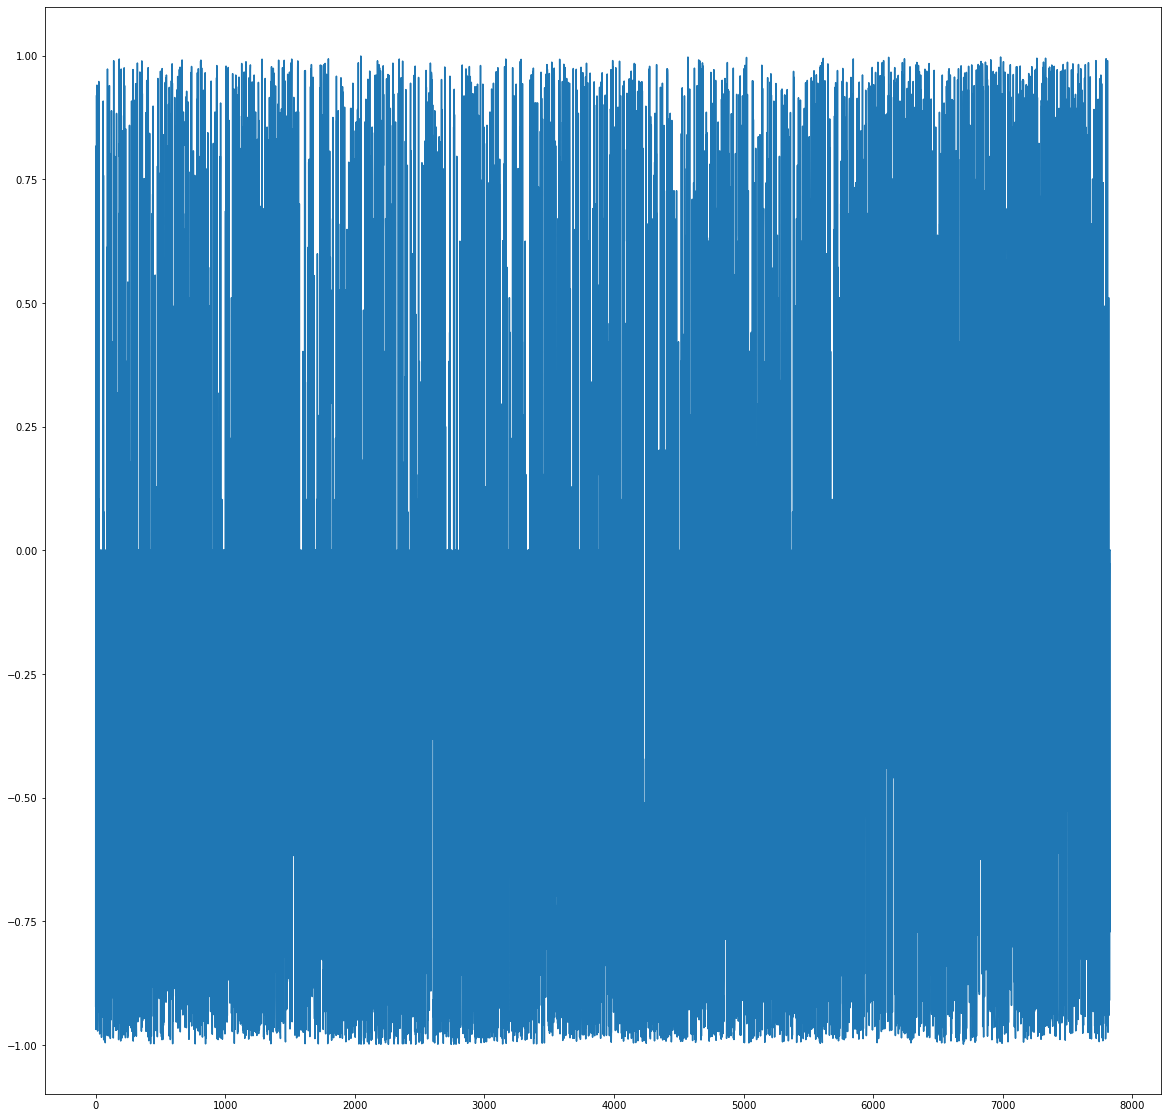

In [268]:
plt.plot(tot_sent_data['Compound'], label = 'Compound')

In [269]:
joinData = pd.merge(data1, tot_sent_data,left_index=True, right_index=True)
joinData

Unnamed: 0                                              title  \
0              0  kherson region head denies reports withdrawal ...   
1              1  zelenskys trip kherson region another imitatio...   
2              2  over 70 munitions fired kiev troops towards dp...   
3              3  kiev troops fire three himars rockets towards ...   
4              4  medvedev says inappropriate talk timeframes sp...   
...          ...                                                ...   
7826        7826                blasts heard kiev mariupol agencies   
7827        7827  ukrainian president declares martial law acros...   
7828        7828  direct attack russia result overthrow potentia...   
7829        7829              putin urges ukrainian military disarm   
7830        7830  decision taken denazification demilitarization...   

                                      link          uploadtime  \
0     https://tass.com/emergencies/1593733       23 MAR, 15:13   
1           https://tass.com/world/1593745       23 MAR, 15:23   
2     https://tass.com/emergencies/1593787       23 MAR, 19:04   
3     https://tass.com/emergencies/1593807       23 MAR, 23:11   
4        https://tass.com/politics/1593819       24 MAR, 00:12   
...                                    ...                 ...   
7826     https://tass.com/politics/1409293  23 FEB 2022, 23:23   
7827        https://tass.com/world/1409273  23 FEB 2022, 23:00   
7828     https://tass.com/politics/1409247  23 FEB 2022, 22:30   
7829     https://tass.com/politics/1409229  23 FEB 2022, 22:20   
7830     https://tass.com/politics/1409189  23 FEB 2022, 22:12   

                                                content  \
0     russia military forces remain novaya kakhovka ...   
1     reports ukraine president vladimir zelenskys v...   
2     the ukraine armed forces fired total 74 muniti...   
3     the ukraine military fired three rockets usmad...   
4     deputy chairman russia security council dmitry...   
...                                                 ...   
7826  sounds similar artillery fire heard ukraine ca...   
7827  martial law across country president vladimir ...   
7828  russia remains one strongest nuclear powers pl...   
7829                                         officetass   
7830                                                      

                                      content_unstemmed  \
0     [russia, military, forces, remain, novaya, kak...   
1     [reports, ukraine, president, vladimir, zelens...   
2     [the, ukraine, armed, forces, fired, total, 74...   
3     [the, ukraine, military, fired, three, rockets...   
4     [deputy, chairman, russia, security, council, ...   
...                                                 ...   
7826  [sounds, similar, artillery, fire, heard, ukra...   
7827  [martial, law, across, country, president, vla...   
7828  [russia, remains, one, strongest, nuclear, pow...   
7829                                       [officetass]   
7830                                                 []   

                                        content_stemmed Day Month  Year Hour  \
0     [russia, militari, forc, remain, novaya, kakho...  23   MAR  2023   15   
1     [report, ukrain, presid, vladimir, zelenski, v...  23   MAR  2023   15   
2     [the, ukrain, arm, forc, fire, total, 74, muni...  23   MAR  2023   19   
3     [the, ukrain, militari, fire, three, rocket, u...  23   MAR  2023   23   
4     [deputi, chairman, russia, secur, council, dmi...  24   MAR  2023   00   
...                                                 ...  ..   ...   ...  ...   
7826  [sound, similar, artilleri, fire, heard, ukrai...  23   FEB  2022   23   
7827  [martial, law, across, countri, presid, vladim...  23   FEB  2022   23   
7828  [russia, remain, one, strongest, nuclear, powe...  23   FEB  2022   22   
7829                                       [officetass]  23   FEB  2022   22   
7830                                                 []  23   

## 6.1 Evaluating Sentiment Analysis on different resolutions

In [270]:
#First remove extra columns from our joinData dataframe
sent = joinData.copy()
sent = sent[['MDate','Category','Negative','Neutral','Positive','Compound']]
sentM = sent.groupby(['MDate']).mean()
sentM.head()
dfi.export(sentM, "MSent.png",table_conversion='matplotlib')

In [271]:
sentM

Negative   Neutral  Positive  Compound
MDate                                            
APR, 2022  0.096339  0.785099  0.089367 -0.122524
AUG, 2022  0.120460  0.778366  0.071069 -0.352227
DEC, 2022  0.113381  0.749232  0.070735 -0.290968
FEB, 2022  0.114979  0.724176  0.085984 -0.283457
FEB, 2023  0.094739  0.683416  0.077287 -0.116590
JAN, 2023  0.101147  0.689184  0.070256 -0.211831
JUL, 2022  0.105789  0.771014  0.067947 -0.237895
JUN, 2022  0.101267  0.779101  0.069143 -0.247876
MAR, 2022  0.091947  0.763119  0.100525 -0.005555
MAR, 2023  0.099339  0.650708  0.056710 -0.246791
MAY, 2022  0.093136  0.770284  0.080021 -0.166131
NOV, 2022  0.122126  0.758789  0.067494 -0.344513
OCT, 2022  0.118001  0.740171  0.071561 -0.318306
SEP, 2022  0.111968  0.771769  0.080353 -0.237632

In [272]:
sentM2 = sentM.copy()
sentM2.reset_index(inplace=True)
sentM2['Cat'] = pd.Categorical(sentM2['MDate'],categories=['FEB, 2022','MAR, 2022','APR, 2022','MAY, 2022','JUN, 2022','JUL, 2022','AUG, 2022','SEP, 2022','OCT, 2022','NOV, 2022','DEC, 2022','JAN, 2023','FEB, 2023','MAR, 2023'],ordered=True)
sentM2 = sentM2.sort_values('Cat')
sentM2.reset_index(inplace=True)
sentM2 = sentM2.set_index('MDate')
sentM2

index  Negative   Neutral  Positive  Compound        Cat
MDate                                                              
FEB, 2022      3  0.114979  0.724176  0.085984 -0.283457  FEB, 2022
MAR, 2022      8  0.091947  0.763119  0.100525 -0.005555  MAR, 2022
APR, 2022      0  0.096339  0.785099  0.089367 -0.122524  APR, 2022
MAY, 2022     10  0.093136  0.770284  0.080021 -0.166131  MAY, 2022
JUN, 2022      7  0.101267  0.779101  0.069143 -0.247876  JUN, 2022
JUL, 2022      6  0.105789  0.771014  0.067947 -0.237895  JUL, 2022
AUG, 2022      1  0.120460  0.778366  0.071069 -0.352227  AUG, 2022
SEP, 2022     13  0.111968  0.771769  0.080353 -0.237632  SEP, 2022
OCT, 2022     12  0.118001  0.740171  0.071561 -0.318306  OCT, 2022
NOV, 2022     11  0.122126  0.758789  0.067494 -0.344513  NOV, 2022
DEC, 2022      2  0.113381  0.749232  0.070735 -0.290968  DEC, 2022
JAN, 2023      5  0.101147  0.689184  0.070256 -0.211831  JAN, 2023
FEB, 2023      4  0.094739  0.683416  0.077287 -0.116590  FEB, 2023
MAR, 2023      9  0.099339  0.650708  0.056710 -0.246791  MAR, 2023

C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\seaborn\relational.py:436: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\seaborn\relational.py:514: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.


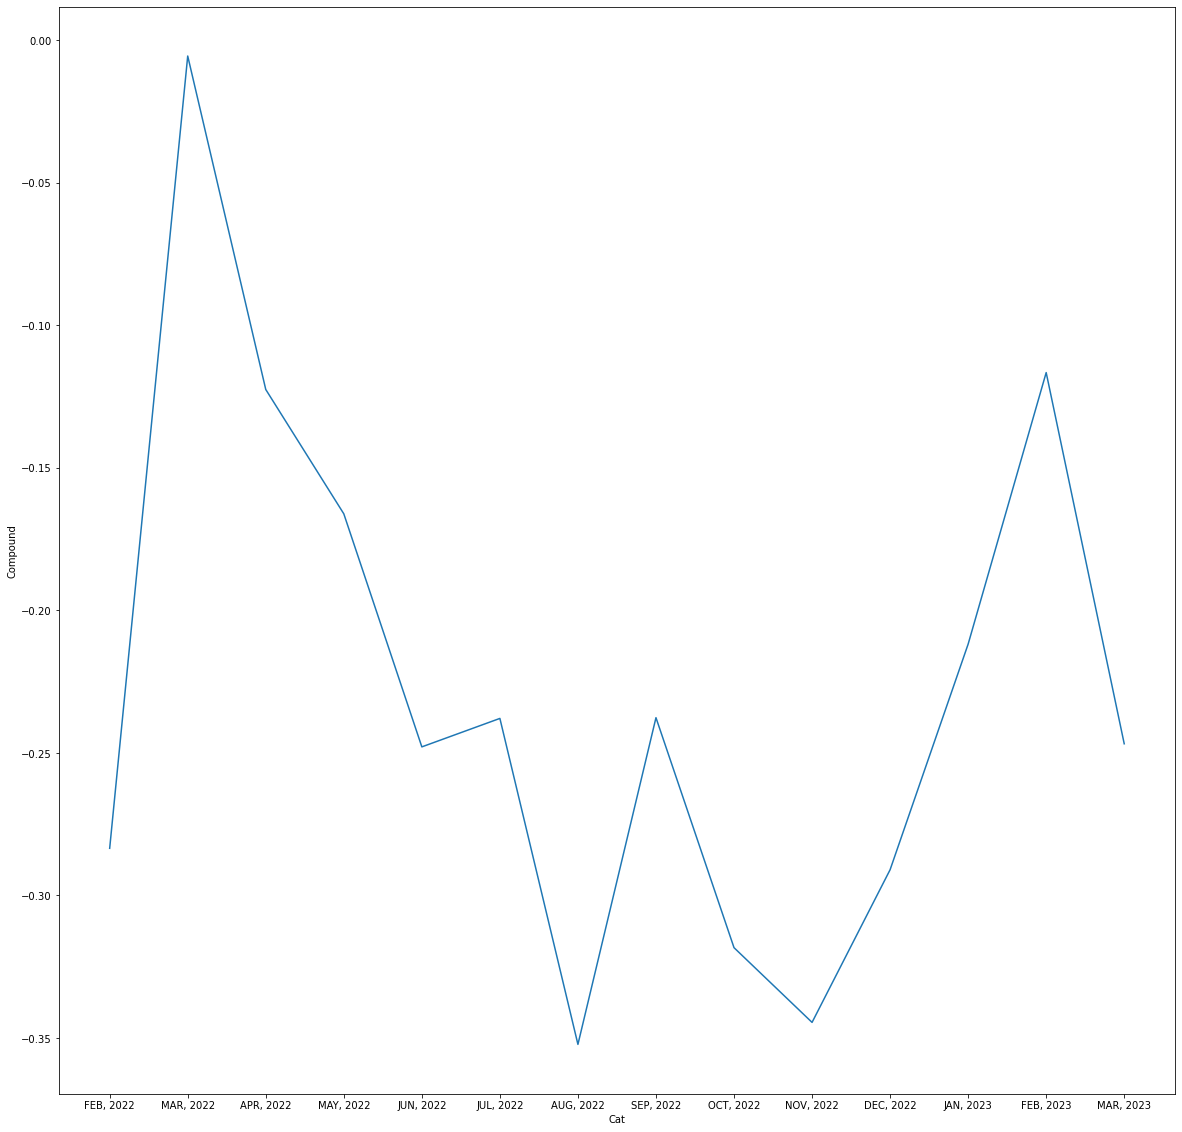

In [273]:
plot1=sns.lineplot(x = 'Cat',y='Compound',data = sentM2)

C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\seaborn\relational.py:436: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\seaborn\relational.py:514: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\seaborn\relational.py:514: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\seaborn\relational.py:514: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 an

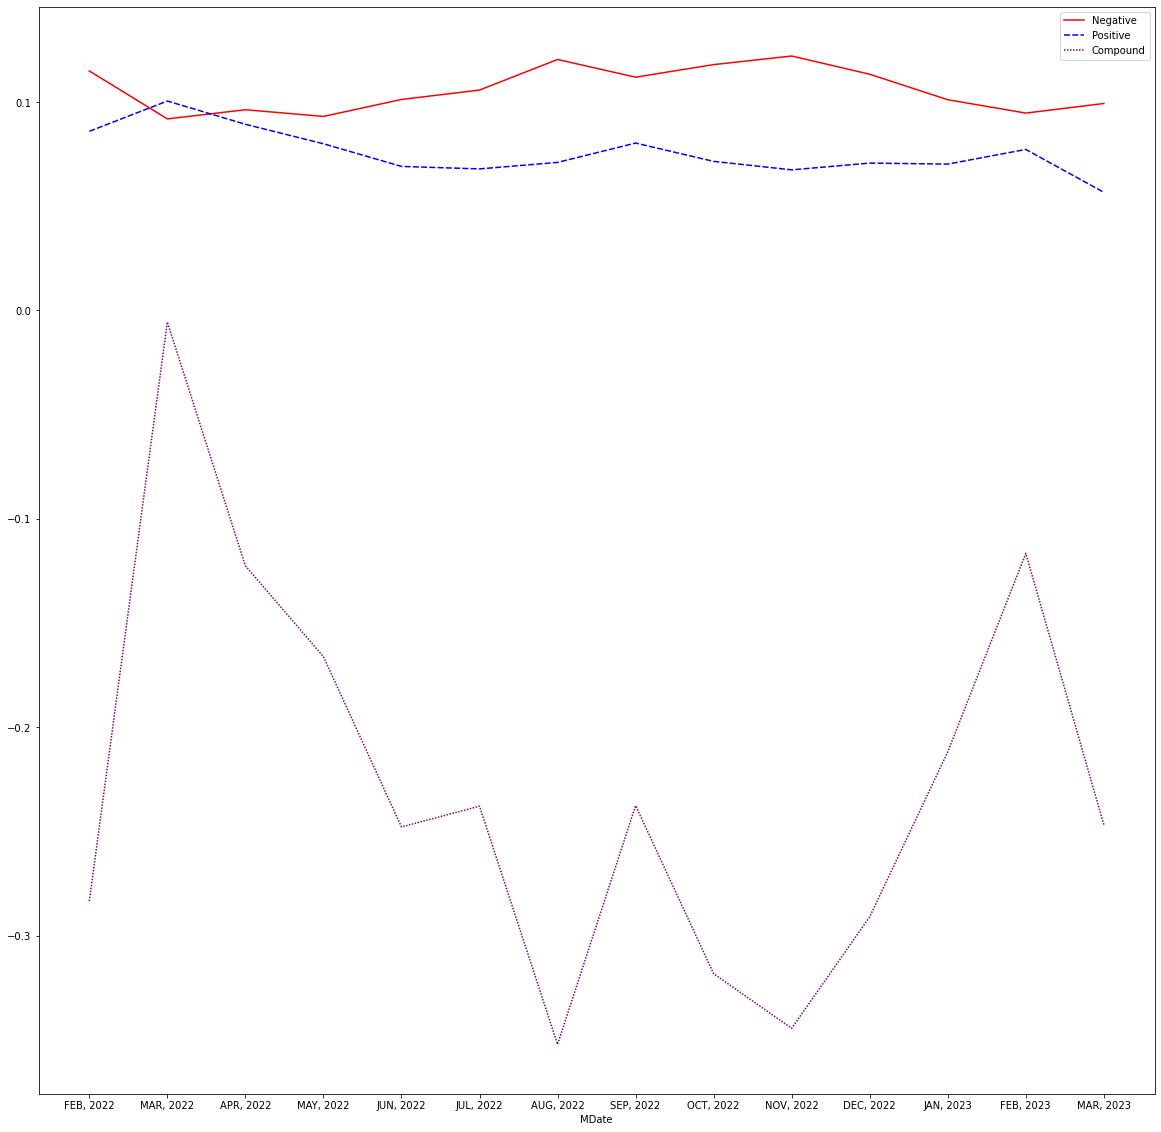

In [274]:
plot2=sns.lineplot(data = sentM2[['Negative','Positive','Compound']],palette=['red', 'blue', 'purple'])

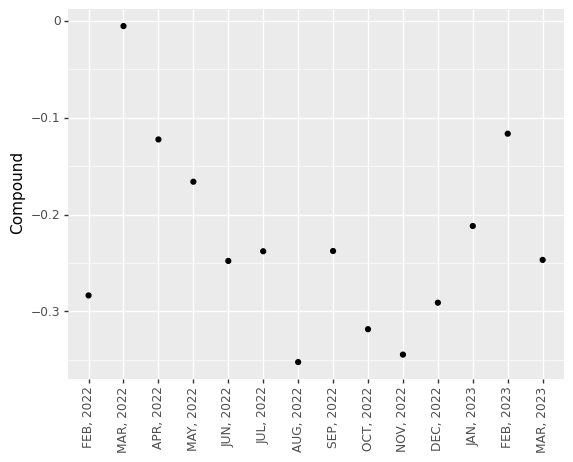

<ggplot: (77344378164)>

In [275]:
ggplot(sentM[['Negative','Positive','Compound']],aes(x=sentM.index))+geom_point(aes(y='Compound'))+scale_x_discrete(limits=order)+theme(axis_text_x = element_text(angle=90))

In [276]:
sent2=sent.copy()
sent2['Cat'] = pd.Categorical(sent2['MDate'],categories=['FEB, 2022','MAR, 2022','APR, 2022','MAY, 2022','JUN, 2022','JUL, 2022','AUG, 2022','SEP, 2022','OCT, 2022','NOV, 2022','DEC, 2022','JAN, 2023','FEB, 2023','MAR, 2023'],ordered=True)
sent2 = sent2.sort_values('Cat')
sent2.reset_index(inplace=True)
sent2 = sent2.set_index('MDate')
sent2

index                       Category  Negative  Neutral  Positive  \
MDate                                                                          
FEB, 2022   7830                       politics     0.000    0.000     0.000   
FEB, 2022   7709                       politics     0.000    1.000     0.000   
FEB, 2022   7708                        economy     0.058    0.846     0.097   
FEB, 2022   7707                       politics     0.093    0.778     0.129   
FEB, 2022   7706                         russia     0.164    0.761     0.075   
...          ...                            ...       ...      ...       ...   
MAR, 2023    301  military-operation-in-ukraine     0.000    0.000     0.000   
MAR, 2023    302                    emergencies     0.247    0.753     0.000   
MAR, 2023    303                          world     0.000    0.784     0.216   
MAR, 2023    292                       politics     0.000    0.946     0.054   
MAR, 2023      0                    emergencies     0.107    0.845     0.048   

           Compound        Cat  
MDate                           
FEB, 2022    0.0000  FEB, 2022  
FEB, 2022    0.0000  FEB, 2022  
FEB, 2022    0.5859  FEB, 2022  
FEB, 2022    0.6377  FEB, 2022  
FEB, 2022   -0.8860  FEB, 2022  
...             ...        ...  
MAR, 2023    0.0000  MAR, 2023  
MAR, 2023   -0.9565  MAR, 2023  
MAR, 2023    0.9100  MAR, 2023  
MAR, 2023    0.2732  MAR, 2023  
MAR, 2023   -0.9217  MAR, 2023  

[7831 rows x 7 columns]

In [277]:
sentCatM = sent2.groupby(['Cat','Category']).mean()
#dfi.export(sentCatM, "CatMSent.png",table_conversion='matplotlib')
sentCatM.head(40)

index  Negative   Neutral  \
Cat       Category                                                         
FEB, 2022 crimea-and-sevastopol                  NaN       NaN       NaN   
          defense                        7742.642857  0.132357  0.692857   
          economy                        7714.500000  0.129000  0.755000   
          emergencies                    7691.000000  0.176000  0.790000   
          military-operation-in-ukraine          NaN       NaN       NaN   
          politics                       7748.946429  0.111330  0.714357   
          russia                         7703.666667  0.113667  0.794667   
          russias-foreign-policy                 NaN       NaN       NaN   
          science                                NaN       NaN       NaN   
          society                        7697.600000  0.185800  0.762200   
          sport                                  NaN       NaN       NaN   
          ukraine                                NaN       NaN       NaN   
          world                          7716.500000  0.108687  0.743917   
MAR, 2022 crimea-and-sevastopol                  NaN       NaN       NaN   
          defense                        7188.783333  0.114033  0.767658   
          economy                        7325.950000  0.045400  0.690400   
          emergencies                    7274.133333  0.187400  0.685867   
          military-operation-in-ukraine          NaN       NaN       NaN   
          politics                       7282.408333  0.093147  0.743503   
          russia                         7000.666667  0.134667  0.844000   
          russias-foreign-policy                 NaN       NaN       NaN   
          science                        7144.000000  0.069000  0.810000   
          society                        7209.938462  0.095462  0.779938   
          sport                                  NaN       NaN       NaN   
          ukraine                                NaN       NaN       NaN   
          world                          7234.617647  0.072745  0.801098   
APR, 2022 crimea-and-sevastopol                  NaN       NaN       NaN   
          defense                        6478.113744  0.105910  0.798346   
          economy                        6601.307692  0.067769  0.725615   
          emergencies                    6529.777778  0.150111  0.827000   
          military-operation-in-ukraine  6600.000000  0.079000  0.903000   
          politics                       6493.887805  0.090166  0.755980   
          russia                         6456.666667  0.131533  0.743200   
          russias-foreign-policy                 NaN       NaN       NaN   
          science                        6790.000000  0.206000  0.669000   
          society                        6481.870370  0.095889  0.822259   
          sport                                  NaN       NaN       NaN   
          ukraine                        6650.000000  0.144000  0.817000   
          world                          6511.956938  0.089115  0.795426   
MAY, 2022 crimea-and-sevastopol                  NaN       NaN       NaN   

                                         Positive  Compound  
Cat       Category                                           
FEB, 2022 crimea-and-sevastopol               NaN       NaN  
          defense                        0.103286 -0.323014  
          economy                        0.116000  0.033200  
          emergencies                    0.034000 -0.877900  
          military-operation-in-ukraine       NaN       NaN  
          politics                       0.085009 -0.297293  
          russia                         0.092000 -0.151233  
          russias-foreign-policy              NaN       NaN  
          science                             NaN       NaN  
          society                        0.052000 -0.791820  
          sport                               NaN       NaN  
          ukraine                             Na

In [278]:
dispCat = sentCatM.copy()
dispCat.reset_index(inplace=True)
dispCat

Cat                       Category        index  Negative  \
0    FEB, 2022          crimea-and-sevastopol          NaN       NaN   
1    FEB, 2022                        defense  7742.642857  0.132357   
2    FEB, 2022                        economy  7714.500000  0.129000   
3    FEB, 2022                    emergencies  7691.000000  0.176000   
4    FEB, 2022  military-operation-in-ukraine          NaN       NaN   
..         ...                            ...          ...       ...   
177  MAR, 2023                        science          NaN       NaN   
178  MAR, 2023                        society   281.875000  0.127000   
179  MAR, 2023                          sport          NaN       NaN   
180  MAR, 2023                        ukraine          NaN       NaN   
181  MAR, 2023                          world   237.127273  0.068055   

      Neutral  Positive  Compound  
0         NaN       NaN       NaN  
1    0.692857  0.103286 -0.323014  
2    0.755000  0.116000  0.033200  
3    0.790000  0.034000 -0.877900  
4         NaN       NaN       NaN  
..        ...       ...       ...  
177       NaN       NaN       NaN  
178  0.755750  0.117375 -0.267912  
179       NaN       NaN       NaN  
180       NaN       NaN       NaN  
181  0.754036  0.105291  0.244107  

[182 rows x 7 columns]

In [279]:
dispCat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Cat       182 non-null    category
 1   Category  182 non-null    object  
 2   index     116 non-null    float64 
 3   Negative  116 non-null    float64 
 4   Neutral   116 non-null    float64 
 5   Positive  116 non-null    float64 
 6   Compound  116 non-null    float64 
dtypes: category(1), float64(5), object(1)
memory usage: 9.5+ KB


C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 66 rows containing missing values.


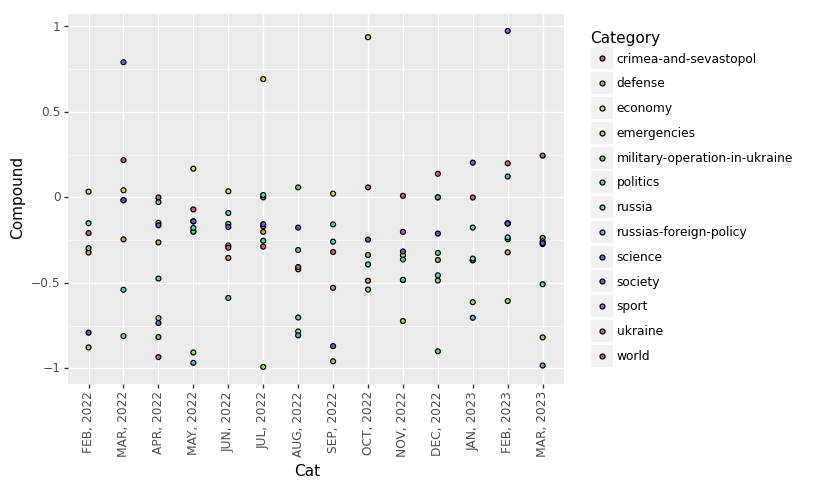

<ggplot: (77344960687)>

In [280]:
ggplot(dispCat,aes(x='Cat'))+geom_point(aes(y='Compound',fill='Category'))+scale_x_discrete(limits=order)+theme(axis_text_x = element_text(angle=90))

C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\seaborn\relational.py:436: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\seaborn\relational.py:514: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\seaborn\relational.py:514: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\seaborn\relational.py:514: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 an

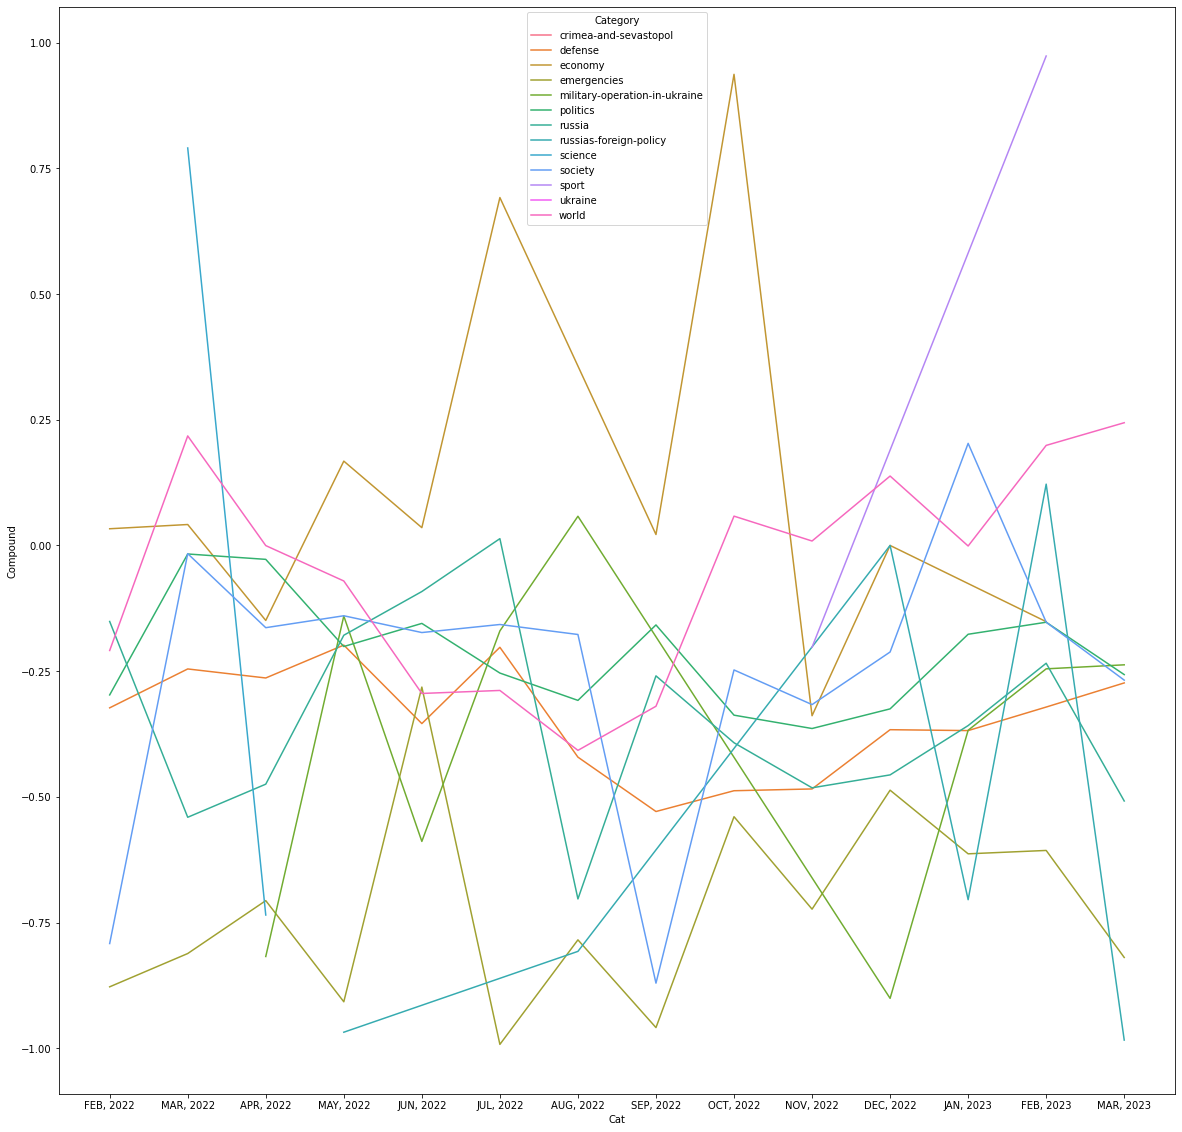

In [281]:
myplot5=sns.lineplot(x = "Cat",y='Compound',hue='Category',data = dispCat,sort=False)

In [282]:
dispCat.reindex(order)
LgQtr = dispCat[(dispCat["Category"] == 'defense') | (dispCat["Category"] == 'politics')|(dispCat['Category']=='world')]
MdQtr1 = dispCat[(dispCat["Category"] == 'russia') | (dispCat["Category"] == 'society')|(dispCat['Category']=='emergencies')]
MdQtr2 = dispCat[(dispCat["Category"] == 'economy') | (dispCat["Category"] == 'russias-foreign-policy')|(dispCat['Category']=='military-operation-in-ukraine')]
LwQtr = dispCat[(dispCat["Category"] == 'crimea-and-sevastopol') | (dispCat["Category"] == 'science')|(dispCat['Category']=='sport')|(dispCat['Category']=='ukraine')]

C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\seaborn\relational.py:436: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\seaborn\relational.py:514: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\seaborn\relational.py:514: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\seaborn\relational.py:514: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 an

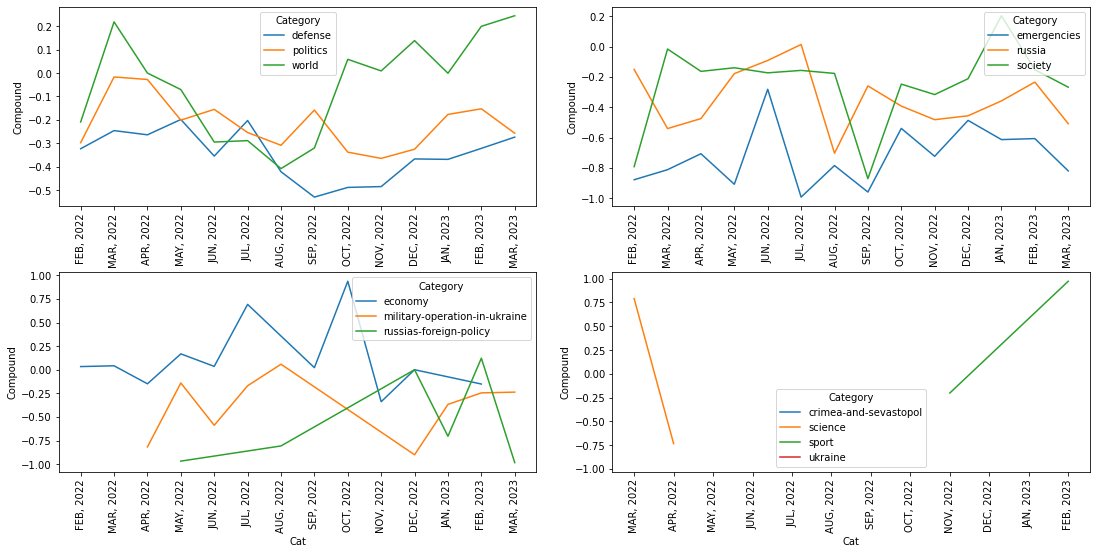

In [283]:
fig, axes = plt.subplots(2,2,  figsize=(16,8))
fig.tight_layout(pad=4.5)
sns.lineplot(ax=axes[0,0],x='Cat',y='Compound',hue='Category',data=LgQtr)
axes[0,0].tick_params(axis='x',rotation=90)
sns.lineplot(ax=axes[0,1],x='Cat',y='Compound',hue='Category',data=MdQtr1)
axes[0,1].tick_params(axis='x',rotation=90)
sns.lineplot(ax=axes[1,0],x='Cat',y='Compound',hue='Category',data=MdQtr2)
axes[1,0].tick_params(axis='x',rotation=90)
sns.lineplot(ax=axes[1,1],x='Cat',y='Compound',hue='Category',data=LwQtr)
axes[1,1].tick_params(axis='x',rotation=90)

# 7. Model Evaluation

In [284]:
from gensim.models import CoherenceModel
from gensim import models, similarities
from gensim.test.utils import common_corpus, common_dictionary
import gensim.corpora as corpora
from gensim.utils import simple_preprocess

In [285]:
def get_Cv(model, df_columnm):
    topics = model.components_

    n_top_words = 20
    texts = [[word for word in doc.split()] for doc in df_columnm]

    # create the dictionary
    dictionary = corpora.Dictionary(texts)
    # Create a gensim dictionary from the word count matrix

    # Create a gensim corpus from the word count matrix
    corpus = [dictionary.doc2bow(text) for text in texts]

    feature_names = [dictionary[i] for i in range(len(dictionary))]

    # Get the top words for each topic from the components_ attribute
    top_words = []
    for topic in topics:
        top_words.append([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])

    coherence_model = CoherenceModel(topics=top_words, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence = coherence_model.get_coherence()
    return coherence

In [286]:
CatDF2=CatDF.copy()
CatDF2

Month Category  Topic Number  \
0     FEB, 2022  defense             0   
1     FEB, 2022  defense             1   
2     FEB, 2022  defense             2   
3     FEB, 2022  defense             3   
4     FEB, 2022  defense             4   
...         ...      ...           ...   
1720  MAR, 2023    world            10   
1721  MAR, 2023    world            11   
1722  MAR, 2023    world            12   
1723  MAR, 2023    world            13   
1724  MAR, 2023    world            14   

                                         Topic Keywords  \
0     [russia, ukraine, lugansk, ministry, weapons, ...   
1     [forces, troops, operation, the, special, mini...   
2     [russia, ukraine, lugansk, ministry, weapons, ...   
3     [february, dpr, military, lugansk, republics, ...   
4     [russia, ukraine, lugansk, ministry, weapons, ...   
...                                                 ...   
1720  [zaluzhny, ap, military, ukraine, decision, st...   
1721  [chinas, chinese, spokesperson, ukraine, would...   
1722  [administration, weapons, we, munitions, accor...   
1723  [the, tass, humanitarian, take, situation, con...   
1724  [zelenskys, president, financial, told, minist...   

                                                Content  
0     7669    kremlin spokesman dmitry peskov redire...  
1     7669    kremlin spokesman dmitry peskov redire...  
2     7669    kremlin spokesman dmitry peskov redire...  
3     7669    kremlin spokesman dmitry peskov redire...  
4     7669    kremlin spokesman dmitry peskov redire...  
...                                                 ...  
1720  1      reports ukraine president vladimir zele...  
1721  1      reports ukraine president vladimir zele...  
1722  1      reports ukraine president vladimir zele...  
1723  1      reports ukraine president vladimir zele...  
1724  1      reports ukraine president vladimir zele...  

[1725 rows x 5 columns]

In [287]:
get_Cv(LDA_model,data1['content'])

0.5830572389206161

In [288]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [289]:
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [290]:
wpt = nltk.WordPunctTokenizer()
cvT = CountVectorizer(max_df=1.0, min_df=0)
lda = LatentDirichletAllocation(n_components=3, max_iter=1000, random_state=0)
evalM = []

def normalize_document(doc):
    doc = doc.strip()
    tokens=wpt.tokenize(doc)
    filtered_tokens=[token for token in tokens if token not in stop_words]
    doc = ' '.join(filtered_tokens)
    return doc

Topic_Coherence=[]
for item in dfGrpMlist:
    if len(item.index) == 0:
        next
    else:
        #print(item)
        tempData = item['content'].values.tolist()
        tempData = np.array(tempData)
        normalize_corpus = np.vectorize(normalize_document)
        norm_corpus = normalize_corpus(tempData)
        cv_matrix=cvT.fit_transform(norm_corpus)
        cv_matrix=cv_matrix.toarray()
        vocab = cv.get_feature_names()
        doc_topic_matrix = lda.fit_transform(cv_matrix)
        
        #Evaluation Metrics
        Log_Likelihood = lda.score(cv_matrix)
        Perplexity = lda.perplexity(cv_matrix)
        
        name = get_df_name(item)
        
        model_eval = {
        'Name':name,
        'Date':item['MDate'],
        'Category':item['Category'],
        'Log Likelihood':Log_Likelihood,
        'Perplexity':Perplexity,
        }
        
        evalM.append(model_eval)
    

C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out inste

C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out inste

C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out inste

C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out inste

In [291]:
TModelEval = pd.DataFrame(evalM)

In [292]:
TModelEval

Name                                               Date  \
0    item  7669    FEB, 2022
7675    FEB, 2022
7677    FE...   
1    item  7647    FEB, 2022
7708    FEB, 2022
7747    FE...   
2    item       7691    FEB, 2022
Name: MDate, dtype: object   
3    item  7645    FEB, 2022
7648    FEB, 2022
7649    FE...   
4    item  7700    FEB, 2022
7705    FEB, 2022
7706    FE...   
..    ...                                                ...   
110  item  4      MAR, 2023
5      MAR, 2023
6      MAR, ...   
111  item  27     MAR, 2023
201    MAR, 2023
202    MAR, ...   
112  item        404    MAR, 2023
Name: MDate, dtype: object   
113  item  94     MAR, 2023
234    MAR, 2023
249    MAR, ...   
114  item  1      MAR, 2023
18     MAR, 2023
23     MAR, ...   

                                              Category  Log Likelihood  \
0    7669    defense
7675    defense
7677    defens...    -8537.697089   
1    7647    economy
7708    economy
7747    econom...    -4032.330706   
2    7691    emergencies
Name: Category, dtype: object     -251.349268   
3    7645    politics
7648    politics
7649    poli...   -67860.941987   
4    7700    russia
7705    russia
7706    russia
N...    -2243.606638   
..                                                 ...             ...   
110  4      politics
5      politics
6      politic...  -114996.660060   
111  27     russia
201    russia
202    russia
205 ...    -3720.777467   
112  404    russias-foreign-policy
Name: Category, ...     -403.919193   
113  94     society
234    society
249    society
2...    -3816.841914   
114  1      world
18     world
23     world
24     ...   -36247.007670   

      Perplexity  
0     424.457958  
1     450.155005  
2      76.218793  
3     815.908093  
4     329.452825  
..           ...  
110  1715.548032  
111   411.856717  
112   137.805575  
113   516.397651  
114  1503.030500  

[115 rows x 5 columns]

<AxesSubplot:xlabel='Perplexity', ylabel='Log Likelihood'>

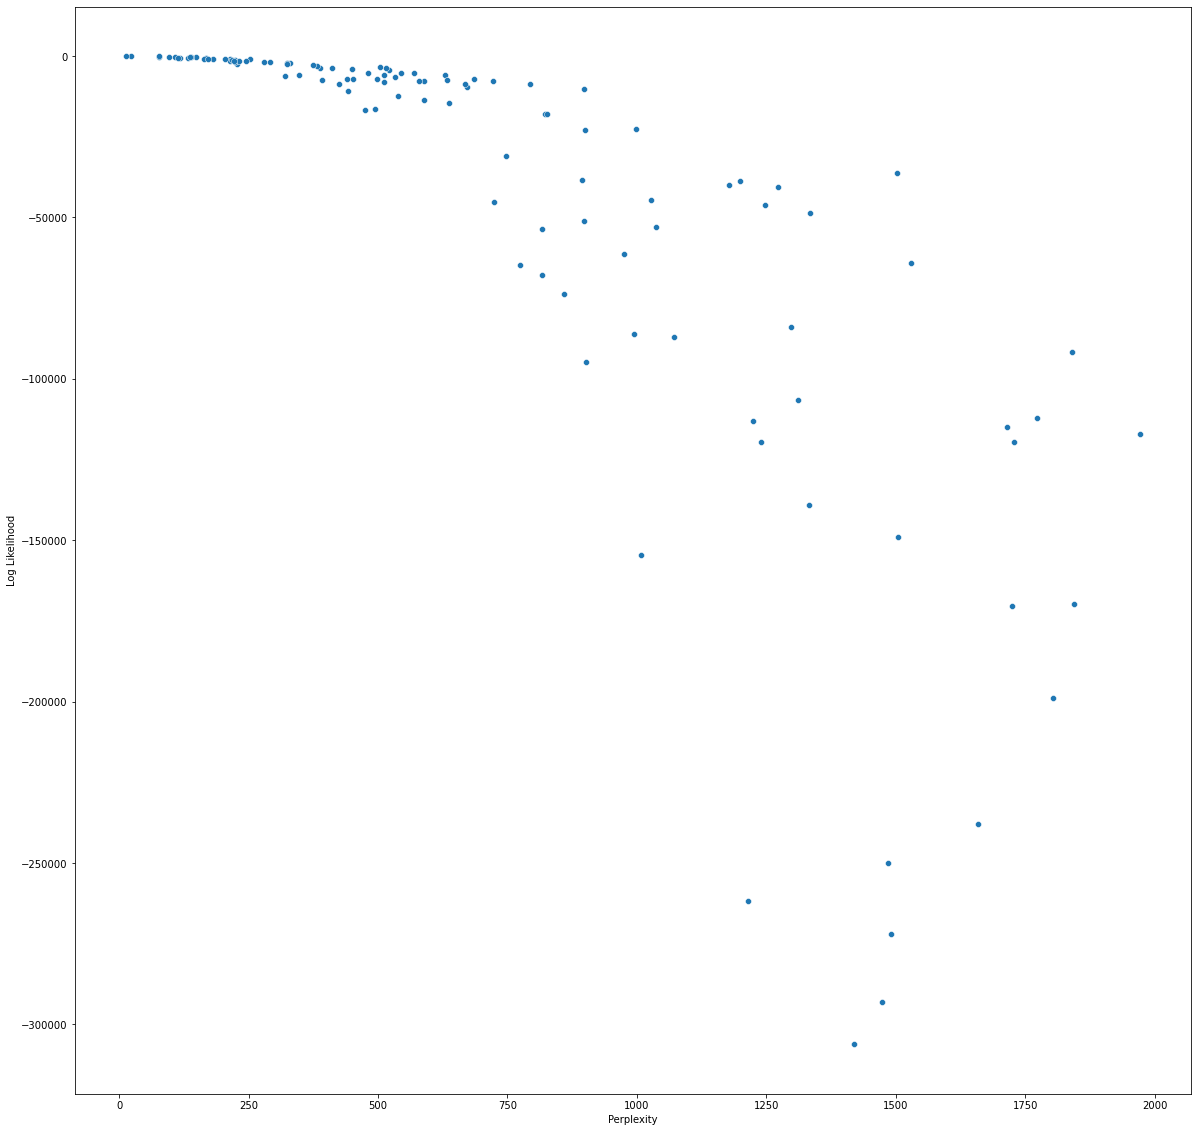

In [293]:
sns.scatterplot(data=TModelEval, x='Perplexity',y='Log Likelihood')

<AxesSubplot:xlabel='Log Likelihood', ylabel='Count'>

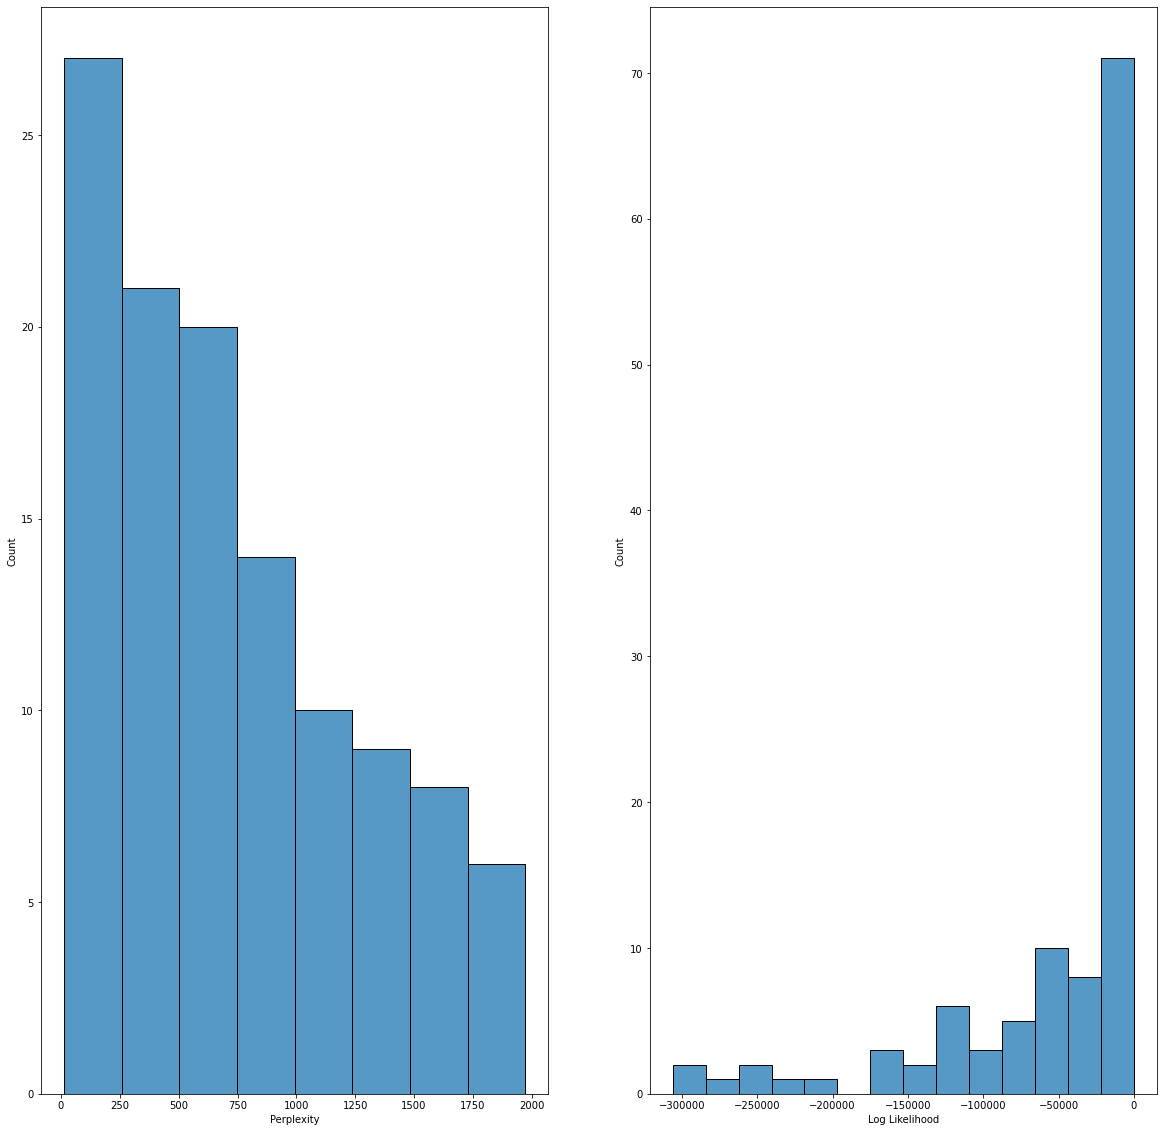

In [294]:
fig, axes = plt.subplots(1,2)
sns.histplot(x=TModelEval["Perplexity"],ax=axes[0])
sns.histplot(x=TModelEval['Log Likelihood'],ax=axes[1])

C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\seaborn\axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\seaborn\axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.


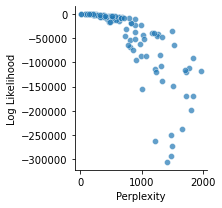

In [295]:
g = sns.FacetGrid(TModelEval)
g.map(sns.scatterplot, "Perplexity", "Log Likelihood", alpha=.7)
g.add_legend()